In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hazm import *
from nltk.tokenize import word_tokenize
import re

In [2]:
# read data
df = pd.read_csv("Task/Topic Modeling/twitter_corona981_full/exportData/corona981/twitter_corona981_full.csv")
df.head()

Unnamed: 0 favorite_count         hashtagField               location  \
0           0            "0"        "ویروس_کرونا"  "جمهوری اسلامی ایران"   
1           1            "0"  "ویروس_کرونا;کرونا"                     ""   
2           2            "3"        "ویروس_کرونا"                     ""   
3           3            "0"                   ""                     ""   
4           4            "0"                   ""                     ""   

        mentionField              ownerId          ownerName  \
0                 ""  1140945568505708544      "Safire_Mehr"   
1                 ""  1221925473900429313  "Jonny_walker666"   
2                 ""  1214838745918259200          "rzRz471"   
3                 ""   866686549722845184  "laleh_wazhegoon"   
4  "seyedmohammadww"  1182218416012312576  "VTPmKSO7wFxM8gZ"   

                postId reply_count retweet_count      retweeted_ownerId  \
0  1221133198379192321         "0"           "0"                    "0"   
1  1223016973975674881         "0"           "0"                    "0"   
2  1220858435044093952         "0"           "1"                    "0"   
3  1220980152122953729         "0"           "0"                    "0"   
4  1220760647232901120         "0"           "0"  "1110607722624573441"   

        retweeted_postId       tagField  \
0                    "0"             ""   
1                    "0"             ""   
2                    "0"  "ویروس کرونا"   
3                    "0"             ""   
4  "1220669177826041856"  "ویروس کرونا"   

                                           textField  \
0     "کرونا داشتیم وقتی کرونا مد نبود #ویروس_کرونا"   
1  "گفتم کرونا ناراحت نشه یه موقع #کرونا #ویروس_ک...   
2  "ویروس کرونا داشتیم وقتی کرونا مد نبود #ویروس_...   
3  "اینجا کرونا آنجا کرونا همه جا کرونا این کرونا...   
4  "RT @seyedmohammadww: اسلام از ویروس کرونا کشن...   

                                    textField_normal          time_jalali  \
0      "کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا"  1398-11-05 21:40:16   
1  "گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا"  1398-11-11 02:25:43   
2  "ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس ک...  1398-11-05 03:28:28   
3  "اینجا کرونا انجا کرونا همه جا کرونا این کرونا...  1398-11-05 11:32:07   
4  "rt seyedmohammadww اسلام از ویروس کرونا کشنده...  1398-11-04 20:59:53   

    timestamp  
0  1579975816  
1  1580424943  
2  1579910308  
3  1579939327  
4  1579886993

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67022 entries, 0 to 67021
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         67022 non-null  int64 
 1   favorite_count     67022 non-null  object
 2   hashtagField       67022 non-null  object
 3   location           67022 non-null  object
 4   mentionField       67022 non-null  object
 5   ownerId            67022 non-null  int64 
 6   ownerName          67022 non-null  object
 7   postId             67022 non-null  int64 
 8   reply_count        67022 non-null  object
 9   retweet_count      67022 non-null  object
 10  retweeted_ownerId  67022 non-null  object
 11  retweeted_postId   67022 non-null  object
 12  tagField           67022 non-null  object
 13  textField          67022 non-null  object
 14  textField_normal   67022 non-null  object
 15  time_jalali        67022 non-null  object
 16  timestamp          67022 non-null  int64

In [4]:
tweets = df['textField_normal']
# drop duplicate texts
tweets = tweets.drop_duplicates().reset_index(drop=True)
# tokenize tweets
tweets = tweets.apply(lambda x: word_tokenize(x))

In [5]:
# remove english words from persian tweets
def remove_english(tw):
    words = [w for w in tw if not re.match(r'[a-zA-Z0-9]+', w)]
    return words
tweets = tweets.apply(lambda x: remove_english(x))  

In [6]:
stopwords = utils.stopwords_list()
stopwords.extend(["''", "``", "ی", "ا", "ها", "های", "یه", "دیگه", "اگه", "ای", "تو", "ان", "اون", "ج"])
# remove stopwords
def remove_stop(tw):
    words = [w for w in tw if w not in stopwords]
    return words
tweets = tweets.apply(lambda x: remove_stop(x))

In [7]:
# lemmatize words
lemmatizer = Lemmatizer()
def lemmatize_words(tw):
    words = [lemmatizer.lemmatize(w) for w in tw]
    return words
tweets = tweets.apply(lambda x: lemmatize_words(x))

In [17]:
# create inputs to LDA topic model
import gensim.corpora as corpora
# create dictionary
id2word = corpora.Dictionary(tweets)
# create corpus
texts = tweets
# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [40]:
import gensim
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

In [41]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.043*"کرونا" + 0.033*"چین" + 0.033*"ویروس" + 0.023*"بیمارستان" + '
  '0.019*"پرواز" + 0.015*"ساخت" + 0.013*"ایران" + 0.013*"دارو" + 0.012*"بیمار" '
  '+ 0.012*"هوا"'),
 (1,
  '0.048*"کرونا" + 0.045*"ویروس" + 0.019*"سال" + 0.019*"اسلام" + '
  '0.017*"جمهوری" + 0.011*"چین" + 0.011*"دولت" + 0.009*"بود#باش" + '
  '0.008*"هزار" + 0.008*"تو"'),
 (2,
  '0.046*"کرونا" + 0.041*"ویروس" + 0.022*"ایران" + 0.017*"امام" + 0.017*"میشه" '
  '+ 0.015*"داره" + 0.014*"فرستاده" + 0.013*"امریکا" + 0.011*"هواپیما" + '
  '0.011*"ماه"'),
 (3,
  '0.036*"کرونا" + 0.024*"اسلام" + 0.020*"خاطر" + 0.019*"طب" + 0.018*"مرگ" + '
  '0.017*"باشه" + 0.016*"تو" + 0.014*"ویروس" + 0.014*"کرد#کن" + '
  '0.013*"گفت#گو"'),
 (4,
  '0.055*"ویروس" + 0.049*"کرونا" + 0.041*"ایران" + 0.031*"بهداشت" + '
  '0.024*"کشور" + 0.021*"چینی" + 0.017*"ورود" + 0.016*"اعلام" + 0.016*"جهانی" '
  '+ 0.015*"بیمار"'),
 (5,
  '0.055*"مهدی" + 0.038*"کرونا" + 0.029*"میلیون" + 0.018*"میکنم" + 0.015*"دست" '
  '+ 0.015*"زمان" + 0.014*"سیل" + 0.0

In [42]:
from gensim.models.coherencemodel import CoherenceModel
# a measure of how good the model is. the lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.394708155094008

Coherence Score:  0.36669732185974213


In [43]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

c:\users\jami\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.065685  0.104631       1        1  20.157229
6      0.096372  0.158537       2        1  15.256229
4     -0.210523 -0.047377       3        1  13.784716
2     -0.027409  0.095701       4        1  11.745448
1     -0.031603  0.077590       5        1  10.064343
7     -0.217872 -0.202513       6        1   7.911597
0     -0.108219 -0.006904       7        1   7.299132
3      0.164698  0.114820       8        1   5.161565
5      0.113497 -0.042465       9        1   4.693208
8      0.286743 -0.252019      10        1   3.926535, topic_info=        Term         Freq         Total Category  logprob  loglift
125      چین  8224.000000   8224.000000  Default  30.0000  30.0000
124      نفر  3556.000000   3556.000000  Default  29.0000  29.0000
260   بهداشت  2150.000000   2150.000000  Default  28.0000  28.0000
754      شهر  1939.000000   1939.000000  Default  27.0000  27.0000
4134    مهدی  1282.000000   1282.000000  Default  26.0000  26.0000
...      ...          ...           ...      ...      ...      ...
276     دارن   288.040106    833.595143  Topic10  -4.2183   2.1748
3      کرونا   478.747396  23392.084778  Topic10  -3.7102  -0.6516
305        ک   154.501267    396.522446  Topic10  -4.8412   2.2949
145       سر   174.289476   1041.254059  Topic10  -4.7207   1.4499
336    میکنم   147.998837    655.369089  Topic10  -4.8842   1.7494

[632 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8         1  0.245486    #هست
8         2  0.453332    #هست
8         4  0.158202    #هست
8         5  0.090012    #هست
8         8  0.037096    #هست
...     ...       ...     ...
575       1  0.067434     یاد
575       5  0.250069     یاد
575       7  0.682774     یاد
5194     10  0.995901  یادمون
578       3  0.994080     یزد

[1258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 5, 3, 2, 8, 1, 4, 6, 9])

In [48]:
doc_lda = lda_model[corpus]
topic_count = []
for i, row_list in enumerate(doc_lda):
    # sort topics based on weights
    print(row_list)
    row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
    # get the dominant topic
    topic_count.append(row[0][0])
# count number of tweets related to each topic
topic_count = {i:topic_count.count(i) for i in topic_count}

[(0, 0.014289906), (1, 0.014290437), (2, 0.014290326), (3, 0.014288915), (4, 0.014290688), (5, 0.014289204), (6, 0.014290679), (7, 0.014290959), (8, 0.42303973), (9, 0.46263912)]
[(0, 0.011115701), (1, 0.7835131), (2, 0.011114731), (3, 0.12757342), (4, 0.011113864), (5, 0.011113314), (6, 0.011113566), (7, 0.011113987), (8, 0.011112561), (9, 0.011115742)]
[(0, 0.012503487), (1, 0.012503978), (2, 0.012503888), (3, 0.012502558), (4, 0.012504261), (5, 0.0125028035), (6, 0.012504052), (7, 0.012504695), (8, 0.33377257), (9, 0.5661977)]
[(0, 0.01111378), (1, 0.011114302), (2, 0.0111145135), (3, 0.011114193), (4, 0.011113978), (5, 0.011113713), (6, 0.011117111), (7, 0.011113875), (8, 0.011116921), (9, 0.8999677)]
[(9, 0.9381403)]
[(8, 0.3054406), (9, 0.63096845)]
[(9, 0.9421044)]
[(0, 0.012502862), (1, 0.8874724), (2, 0.012503455), (3, 0.012501917), (4, 0.012504028), (5, 0.012501975), (6, 0.012502659), (7, 0.012504874), (8, 0.012501056), (9, 0.012504755)]
[(2, 0.13529246), (6, 0.4043968), (9, 

[(0, 0.01429026), (1, 0.014289671), (2, 0.014289932), (3, 0.014288213), (4, 0.014289738), (5, 0.0142892795), (6, 0.6519008), (7, 0.23378325), (8, 0.014288795), (9, 0.0142900655)]
[(0, 0.011113465), (1, 0.011113041), (2, 0.0111129405), (3, 0.011112337), (4, 0.0111130625), (5, 0.011114863), (6, 0.011112663), (7, 0.011115732), (8, 0.01111207), (9, 0.89997977)]
[(0, 0.01667698), (1, 0.016677601), (2, 0.016678307), (3, 0.016676972), (4, 0.016677251), (5, 0.01667914), (6, 0.59842926), (7, 0.2681507), (8, 0.016676031), (9, 0.0166778)]
[(0, 0.02000747), (1, 0.02000988), (2, 0.020007536), (3, 0.47486132), (4, 0.020007676), (5, 0.020006789), (6, 0.020009756), (7, 0.020007085), (8, 0.36507407), (9, 0.020008381)]
[(0, 0.014282288), (1, 0.014283722), (2, 0.014281945), (3, 0.014283286), (4, 0.014282286), (5, 0.014281086), (6, 0.3901831), (7, 0.014281347), (8, 0.014280951), (9, 0.49556)]
[(0, 0.014057613), (1, 0.014062684), (2, 0.014057108), (3, 0.0140627315), (4, 0.0140567245), (5, 0.014057193), (6,

[(0, 0.010369034), (1, 0.01037033), (2, 0.010368901), (3, 0.010368429), (4, 0.01036991), (5, 0.010368652), (6, 0.010369857), (7, 0.010369957), (8, 0.010368281), (9, 0.9066767)]
[(0, 0.012502591), (1, 0.27305114), (2, 0.012502845), (3, 0.012501997), (4, 0.6269281), (5, 0.012502038), (6, 0.01250249), (7, 0.012503638), (8, 0.012501441), (9, 0.012503765)]
[(1, 0.5047757), (6, 0.42247882)]
[(0, 0.014291966), (1, 0.01429188), (2, 0.014292732), (3, 0.014294583), (4, 0.014291925), (5, 0.014291329), (6, 0.0142950965), (7, 0.014291567), (8, 0.014290965), (9, 0.87136793)]
[(9, 0.91814625)]
[(0, 0.014289818), (1, 0.014289875), (2, 0.01429003), (3, 0.014289524), (4, 0.014292715), (5, 0.014289577), (6, 0.0142899165), (7, 0.014289814), (8, 0.014289212), (9, 0.8713895)]
[(0, 0.014291915), (1, 0.014289046), (2, 0.3583591), (3, 0.014287737), (4, 0.014290294), (5, 0.01428779), (6, 0.014288788), (7, 0.014289889), (8, 0.014287013), (9, 0.52732843)]
[(0, 0.014282242), (1, 0.014283678), (2, 0.014281894), (3,

[(0, 0.014288817), (1, 0.014289309), (2, 0.01429098), (3, 0.014288093), (4, 0.37828594), (5, 0.014288146), (6, 0.0142887095), (7, 0.0142902685), (8, 0.014287409), (9, 0.50740236)]
[(1, 0.5650993), (3, 0.27034357), (8, 0.10620473)]
[(8, 0.91805345)]
[(0, 0.010052451), (1, 0.010053961), (2, 0.010052106), (3, 0.010051303), (4, 0.010051437), (5, 0.010051268), (6, 0.010054447), (7, 0.010051532), (8, 0.3671339), (9, 0.5524476)]
[(0, 0.016808294), (1, 0.848727), (2, 0.016809741), (3, 0.016805947), (4, 0.016812902), (5, 0.016807342), (6, 0.016809942), (7, 0.016806472), (8, 0.016805457), (9, 0.016806912)]
[(0, 0.016669648), (1, 0.016669964), (2, 0.016672855), (3, 0.016668903), (4, 0.016669586), (5, 0.3064378), (6, 0.5602024), (7, 0.016669417), (8, 0.016668953), (9, 0.0166704)]
[(0, 0.014289464), (1, 0.8713937), (2, 0.014289658), (3, 0.014288888), (4, 0.014290011), (5, 0.014288944), (6, 0.014289443), (7, 0.014290251), (8, 0.014288327), (9, 0.01429136)]
[(0, 0.010001736), (1, 0.7000769), (2, 0.01

[(0, 0.7749498), (1, 0.025004953), (2, 0.02500796), (3, 0.02500262), (4, 0.025012571), (5, 0.025004579), (6, 0.02500825), (7, 0.025003385), (8, 0.02500189), (9, 0.025004024)]
[(0, 0.033339676), (1, 0.03334031), (2, 0.033340055), (3, 0.03333875), (4, 0.6999432), (5, 0.033338983), (6, 0.033340517), (7, 0.033340044), (8, 0.03333736), (9, 0.033341113)]
[(0, 0.71233934), (1, 0.031962916), (2, 0.03196258), (3, 0.031961292), (4, 0.031963047), (5, 0.031961534), (6, 0.031963073), (7, 0.031962607), (8, 0.03195988), (9, 0.031963713)]
[(0, 0.03334878), (1, 0.0333497), (2, 0.033349365), (3, 0.6998589), (4, 0.033349853), (5, 0.03334782), (6, 0.033349935), (7, 0.03334931), (8, 0.033345565), (9, 0.033350784)]
[(0, 0.033343215), (1, 0.033343792), (2, 0.033343535), (3, 0.033342406), (4, 0.03334392), (5, 0.03334259), (6, 0.03334397), (7, 0.033343546), (8, 0.033341117), (9, 0.6999119)]
[(0, 0.050021533), (1, 0.05002413), (2, 0.050022952), (3, 0.05001784), (4, 0.05002788), (5, 0.050018772), (6, 0.050024837

[(4, 0.4687145), (6, 0.36019263), (8, 0.10744945)]
[(3, 0.5763376), (9, 0.35697564)]
[(0, 0.012503702), (1, 0.012504267), (2, 0.01250443), (3, 0.012503723), (4, 0.012504035), (5, 0.012503554), (6, 0.012504514), (7, 0.012504147), (8, 0.012503045), (9, 0.8874646)]
[(3, 0.1225898), (6, 0.81065774)]
[(0, 0.014289641), (1, 0.014290686), (2, 0.014290316), (3, 0.014288114), (4, 0.014291484), (5, 0.014288193), (6, 0.87138927), (7, 0.014293213), (8, 0.014286865), (9, 0.014292209)]
[(0, 0.27285492), (4, 0.38437605), (9, 0.28437713)]
[(2, 0.20999527), (3, 0.55458355), (6, 0.1229696), (9, 0.091757715)]
[(0, 0.79824674), (4, 0.1350604)]
[(3, 0.9306785)]
[(0, 0.14057639), (1, 0.010002401), (2, 0.010003418), (3, 0.010001835), (4, 0.31091535), (5, 0.17299104), (6, 0.3154994), (7, 0.010002018), (8, 0.01000522), (9, 0.010002963)]
[(6, 0.9181408)]
[(5, 0.16487509), (6, 0.556292), (9, 0.22880939)]
[(0, 0.010003596), (1, 0.010003051), (2, 0.010002281), (3, 0.13450703), (4, 0.010003901), (5, 0.010001563), (

[(1, 0.12770154), (2, 0.62347233), (6, 0.20215185)]
[(4, 0.93074113)]
[(0, 0.010003463), (1, 0.0100056855), (2, 0.010002897), (3, 0.010005406), (4, 0.0100027975), (5, 0.010002792), (6, 0.010004829), (7, 0.010002732), (8, 0.010001994), (9, 0.9099674)]
[(4, 0.086335026), (6, 0.60509306), (9, 0.25853193)]
[(0, 0.010003418), (1, 0.010004029), (2, 0.010002958), (3, 0.010002057), (4, 0.4908029), (5, 0.010002093), (6, 0.010002503), (7, 0.010002661), (8, 0.010001911), (9, 0.42917544)]
[(0, 0.011108521), (1, 0.53864795), (2, 0.011107598), (3, 0.01110671), (4, 0.011108747), (5, 0.011106782), (6, 0.011107135), (7, 0.37249103), (8, 0.011106344), (9, 0.011109174)]
[(0, 0.011063839), (1, 0.011063977), (2, 0.011065994), (3, 0.011063739), (4, 0.011063976), (5, 0.9004202), (6, 0.011064304), (7, 0.011063895), (8, 0.011063409), (9, 0.011066706)]
[(2, 0.18602169), (5, 0.7639631)]
[(0, 0.012502918), (1, 0.0125032505), (2, 0.012503851), (3, 0.012501794), (4, 0.68904763), (5, 0.012501834), (6, 0.21092816), (

[(6, 0.956604)]
[(1, 0.07238353), (2, 0.44529253), (8, 0.17961963), (9, 0.27660635)]
[(0, 0.6849648), (1, 0.076430574), (2, 0.15609264), (6, 0.06063838)]
[(1, 0.05656477), (2, 0.16945699), (4, 0.60582507), (9, 0.15192522)]
[(2, 0.38295835), (4, 0.09565363), (9, 0.49545577)]
[(1, 0.09688953), (4, 0.4422359), (9, 0.41419208)]
[(6, 0.80106), (8, 0.13228635)]
[(3, 0.63544965), (6, 0.3065138)]
[(9, 0.91817886)]
[(3, 0.75440335), (4, 0.17291984)]
[(0, 0.08906601), (2, 0.29997987), (7, 0.08519476), (9, 0.4827585)]
[(1, 0.10284981), (6, 0.8305201)]
[(9, 0.91816795)]
[(0, 0.90714157), (1, 0.010318998), (2, 0.010317614), (3, 0.010316593), (4, 0.010317675), (5, 0.010316544), (6, 0.010318231), (7, 0.010318081), (8, 0.010316325), (9, 0.010318345)]
[(2, 0.43665272), (6, 0.50617814)]
[(6, 0.15036584), (9, 0.79456115)]
[(1, 0.54138947), (2, 0.17673805), (3, 0.21194595)]
[(0, 0.17378272), (4, 0.23089658), (9, 0.5344001)]
[(6, 0.24359068), (9, 0.68368936)]
[(2, 0.5291906), (3, 0.265929), (6, 0.14112258)

[(2, 0.13671829), (3, 0.09469376), (4, 0.42419463), (5, 0.22459388), (8, 0.0840731)]
[(7, 0.13267529), (9, 0.81013966)]
[(3, 0.255556), (5, 0.18104005), (6, 0.20145454), (9, 0.3190804)]
[(2, 0.910002), (5, 0.010005027), (6, 0.010002364)]
[(4, 0.51062346), (6, 0.3797475), (8, 0.059628837)]
[(4, 0.35002333), (9, 0.58843577)]
[(4, 0.8127308), (5, 0.11453098)]
[(4, 0.9357023)]
[(0, 0.3210784), (3, 0.61719203)]
[(2, 0.15581577), (6, 0.60006773), (7, 0.194085)]
[(1, 0.10299815), (7, 0.8588994)]
[(0, 0.011113796), (1, 0.011114119), (2, 0.011113251), (3, 0.011112874), (4, 0.011116257), (5, 0.011113865), (6, 0.7730313), (7, 0.011112634), (8, 0.13805713), (9, 0.011114811)]
[(0, 0.010068531), (1, 0.5168568), (2, 0.01006809), (3, 0.0100692455), (4, 0.010067911), (5, 0.01007368), (6, 0.40259188), (7, 0.010067869), (8, 0.010067732), (9, 0.010068286)]
[(0, 0.014289793), (1, 0.0142909065), (2, 0.014290348), (3, 0.014290995), (4, 0.46340746), (5, 0.014289609), (6, 0.42227054), (7, 0.014289995), (8, 0.0

[(1, 0.5789866), (7, 0.16010158), (9, 0.19722843)]
[(1, 0.16346598), (2, 0.5166772), (6, 0.25615484)]
[(4, 0.12126444), (9, 0.8389041)]
[(0, 0.024874514), (1, 0.0248751), (2, 0.02487484), (3, 0.024873668), (4, 0.024875224), (5, 0.024873883), (6, 0.0248853), (7, 0.024874855), (8, 0.7761168), (9, 0.024875814)]
[(0, 0.020005116), (1, 0.020004448), (2, 0.020007795), (3, 0.2691886), (4, 0.02000801), (5, 0.02000385), (6, 0.5707729), (7, 0.020003246), (8, 0.020002352), (9, 0.020003678)]
[(0, 0.020003516), (1, 0.02000311), (2, 0.020006146), (3, 0.020002067), (4, 0.020005452), (5, 0.020002635), (6, 0.8199706), (7, 0.0200023), (8, 0.02000156), (9, 0.02000265)]
[(0, 0.025009474), (1, 0.025009604), (2, 0.025010247), (3, 0.025005998), (4, 0.02500701), (5, 0.37084395), (6, 0.42909166), (7, 0.02500677), (8, 0.025005167), (9, 0.025010144)]
[(0, 0.020003906), (1, 0.020015463), (2, 0.020004647), (3, 0.020002676), (4, 0.020006746), (5, 0.020004008), (6, 0.8199523), (7, 0.020003049), (8, 0.02000234), (9, 

[(4, 0.09254349), (6, 0.43332016), (8, 0.4241167)]
[(1, 0.60232186), (3, 0.09625306), (6, 0.25474885)]
[(0, 0.016669972), (1, 0.016670339), (2, 0.016671196), (3, 0.016669499), (4, 0.016670382), (5, 0.016669603), (6, 0.3859805), (7, 0.016670167), (8, 0.4806576), (9, 0.016670728)]
[(0, 0.01111365), (1, 0.89997464), (2, 0.01111434), (3, 0.0111139305), (4, 0.011116266), (5, 0.01111288), (6, 0.01111416), (7, 0.011113762), (8, 0.011111885), (9, 0.011114462)]
[(2, 0.21726112), (4, 0.73826605)]
[(2, 0.5978457), (5, 0.14239523), (9, 0.20588902)]
[(4, 0.17456895), (9, 0.7587095)]
[(0, 0.596628), (1, 0.23848604), (5, 0.11106728)]
[(9, 0.9307204)]
[(6, 0.92497694)]
[(0, 0.011117708), (1, 0.011117369), (2, 0.0111170495), (3, 0.011116593), (4, 0.011118316), (5, 0.011116579), (6, 0.0111167915), (7, 0.011120932), (8, 0.011116101), (9, 0.8999426)]
[(2, 0.16103877), (4, 0.8056092)]
[(7, 0.934817), (8, 0.03850756)]
[(4, 0.97096443)]
[(3, 0.050716143), (4, 0.2630558), (6, 0.099302754), (9, 0.5681689)]
[(1

[(6, 0.9356784)]
[(2, 0.1739593), (4, 0.30740538), (6, 0.18829833), (9, 0.27583972)]
[(4, 0.9182271)]
[(4, 0.3500159), (9, 0.58844316)]
[(4, 0.9181709)]
[(0, 0.012502509), (1, 0.0125104375), (2, 0.012502042), (3, 0.01250151), (4, 0.88747346), (5, 0.012501555), (6, 0.012501888), (7, 0.012502693), (8, 0.01250126), (9, 0.012502605)]
[(1, 0.21823952), (6, 0.70177346)]
[(1, 0.22247478), (4, 0.6272137), (5, 0.10453909)]
[(7, 0.93569666)]
[(0, 0.9250642)]
[(2, 0.083123796), (3, 0.2606987), (5, 0.20680343), (9, 0.39940515)]
[(3, 0.0729363), (4, 0.534876), (7, 0.2953803), (8, 0.06150315)]
[(1, 0.21010602), (5, 0.6441346), (8, 0.09189624)]
[(6, 0.103113234), (7, 0.8397516)]
[(0, 0.14027907), (4, 0.6177925), (6, 0.1952497)]
[(0, 0.010003508), (1, 0.62612975), (2, 0.010003684), (3, 0.2938384), (4, 0.010004707), (5, 0.010007869), (6, 0.010002116), (7, 0.010004113), (8, 0.010001347), (9, 0.010004487)]
[(0, 0.16019313), (1, 0.011119367), (2, 0.16778828), (3, 0.011118643), (4, 0.011119949), (5, 0.0111

[(0, 0.01667192), (1, 0.016672049), (2, 0.016671695), (3, 0.8499461), (4, 0.016672995), (5, 0.016678715), (6, 0.01667035), (7, 0.016674085), (8, 0.01666794), (9, 0.016674198)]
[(0, 0.025125049), (1, 0.025125409), (2, 0.39118475), (3, 0.025124531), (4, 0.40781525), (5, 0.025124662), (6, 0.025125515), (7, 0.025125258), (8, 0.025123749), (9, 0.02512585)]
[(0, 0.03333924), (1, 0.033340015), (2, 0.03333974), (3, 0.033342868), (4, 0.033339836), (5, 0.033348486), (6, 0.69992983), (7, 0.033339422), (8, 0.033339836), (9, 0.033340756)]
[(0, 0.774963), (1, 0.0250039), (2, 0.02500381), (3, 0.02500549), (4, 0.025004275), (5, 0.025004866), (6, 0.025004124), (7, 0.025003279), (8, 0.025001856), (9, 0.025005363)]
[(0, 0.020003932), (1, 0.02000455), (2, 0.020004464), (3, 0.020004397), (4, 0.020004788), (5, 0.020004423), (6, 0.34170693), (7, 0.020004101), (8, 0.020003283), (9, 0.4982591)]
[(0, 0.02000426), (1, 0.020005254), (2, 0.020004362), (3, 0.020006374), (4, 0.020004481), (5, 0.020004384), (6, 0.020

[(3, 0.1991517), (4, 0.24110256), (8, 0.08360536), (9, 0.43519434)]
[(2, 0.6266172), (6, 0.22969459), (7, 0.08981783)]
[(6, 0.22849351), (9, 0.70996207)]
[(2, 0.796239), (6, 0.14223886)]
[(2, 0.9249813)]
[(4, 0.9249904)]
[(1, 0.267638), (4, 0.3025783), (6, 0.23734064), (8, 0.14958282)]
[(0, 0.28247753), (2, 0.19611557), (9, 0.45773545)]
[(4, 0.653956), (6, 0.28885713)]
[(4, 0.6065667), (7, 0.32067817)]
[(8, 0.1177715), (9, 0.8351586)]
[(0, 0.2538005), (2, 0.596055), (4, 0.10346063)]
[(6, 0.9437553)]
[(0, 0.090313114), (1, 0.13619491), (3, 0.07415381), (5, 0.06916082), (9, 0.5988803)]
[(5, 0.16178374), (9, 0.79382324)]
[(0, 0.11564647), (2, 0.27572927), (9, 0.5736112)]
[(0, 0.02499337), (1, 0.02499321), (2, 0.024992574), (3, 0.024992788), (4, 0.024992783), (5, 0.024992207), (6, 0.7750644), (7, 0.024993176), (8, 0.02499136), (9, 0.024994142)]
[(0, 0.02500359), (1, 0.025004242), (2, 0.025003787), (3, 0.025003161), (4, 0.77494884), (5, 0.02500327), (6, 0.025003972), (7, 0.025018083), (8, 0

[(0, 0.020003151), (1, 0.020003442), (2, 0.020003933), (3, 0.020001832), (4, 0.819973), (5, 0.020002233), (6, 0.020003382), (7, 0.020004014), (8, 0.020001091), (9, 0.020003946)]
[(0, 0.23416175), (1, 0.016684167), (2, 0.01668481), (3, 0.016683253), (4, 0.016684983), (5, 0.016683314), (6, 0.016684802), (7, 0.016684752), (8, 0.016682744), (9, 0.6323654)]
[(0, 0.024941389), (1, 0.024941793), (2, 0.02494161), (3, 0.7755172), (4, 0.024941877), (5, 0.024940956), (6, 0.02495101), (7, 0.024941623), (8, 0.02493992), (9, 0.024942653)]
[(0, 0.025004081), (1, 0.025003886), (2, 0.025005449), (3, 0.02500265), (4, 0.7749654), (5, 0.025003359), (6, 0.025006015), (7, 0.025003279), (8, 0.025002006), (9, 0.025003815)]
[(0, 0.24234948), (1, 0.020005811), (2, 0.020011006), (3, 0.020005368), (4, 0.020007223), (5, 0.020005435), (6, 0.020009773), (7, 0.020005733), (8, 0.020004973), (9, 0.59759516)]
[(0, 0.025003074), (1, 0.025003685), (2, 0.02500355), (3, 0.025003172), (4, 0.025003433), (5, 0.02500325), (6, 0

[(0, 0.020002577), (1, 0.020003052), (2, 0.020002892), (3, 0.020001879), (4, 0.020004373), (5, 0.020001931), (6, 0.020002475), (7, 0.020003784), (8, 0.020001216), (9, 0.81997585)]
[(0, 0.020006014), (1, 0.020005956), (2, 0.020007228), (3, 0.020003878), (4, 0.3761473), (5, 0.020004796), (6, 0.020006776), (7, 0.020006146), (8, 0.02000311), (9, 0.4638088)]
[(0, 0.014288718), (1, 0.014289018), (2, 0.2234699), (3, 0.014289308), (4, 0.014289353), (5, 0.014287949), (6, 0.014289618), (7, 0.014289187), (8, 0.16888158), (9, 0.50762534)]
[(0, 0.033339754), (1, 0.033340424), (2, 0.69994223), (3, 0.033338748), (4, 0.03334061), (5, 0.033338998), (6, 0.033340625), (7, 0.03334013), (8, 0.033337254), (9, 0.033341266)]
[(0, 0.033406638), (1, 0.033407338), (2, 0.6993401), (3, 0.033405643), (4, 0.033407476), (5, 0.03340589), (6, 0.033407535), (7, 0.033407032), (8, 0.033404134), (9, 0.033408184)]
[(0, 0.016669432), (1, 0.016669648), (2, 0.01666953), (3, 0.8499731), (4, 0.016669592), (5, 0.016669711), (6, 0

[(0, 0.010002707), (1, 0.0100031765), (2, 0.010002983), (3, 0.010002276), (4, 0.0100031085), (5, 0.010005645), (6, 0.90997016), (7, 0.010003528), (8, 0.010002605), (9, 0.010003831)]
[(6, 0.28507578), (9, 0.6615719)]
[(2, 0.1163441), (4, 0.8336222)]
[(2, 0.24623568), (3, 0.22669318), (4, 0.4833098)]
[(1, 0.15703878), (6, 0.3728326), (9, 0.42009428)]
[(2, 0.5450614), (3, 0.13222031), (4, 0.09293959), (6, 0.19226219)]
[(9, 0.94370013)]
[(0, 0.010003166), (1, 0.010002493), (2, 0.01000291), (3, 0.010001745), (4, 0.010005953), (5, 0.01000177), (6, 0.010005189), (7, 0.41633832), (8, 0.010001519), (9, 0.5036369)]
[(1, 0.1681421), (2, 0.4512973), (3, 0.11442177), (5, 0.10115108), (9, 0.1292115)]
[(2, 0.28594908), (3, 0.2755386), (4, 0.06473034), (6, 0.33533984)]
[(4, 0.5255729), (6, 0.3017655), (9, 0.12252693)]
[(1, 0.06531628), (4, 0.42320126), (6, 0.45764795)]
[(4, 0.21691763), (9, 0.71642405)]
[(2, 0.11426242), (3, 0.82432556)]
[(1, 0.044373445), (4, 0.047374167), (5, 0.15345715), (6, 0.7385

[(0, 0.033272512), (1, 0.033273127), (2, 0.033272833), (3, 0.033271596), (4, 0.70054775), (5, 0.03327183), (6, 0.033273328), (7, 0.03327287), (8, 0.033270232), (9, 0.033273883)]
[(0, 0.025002655), (1, 0.025004147), (2, 0.025003487), (3, 0.025002219), (4, 0.77497005), (5, 0.025002332), (6, 0.025003044), (7, 0.02500687), (8, 0.025001705), (9, 0.025003502)]
[(0, 0.016677631), (1, 0.016677504), (2, 0.016675722), (3, 0.016675375), (4, 0.8499116), (5, 0.016675416), (6, 0.016677089), (7, 0.016677095), (8, 0.016675131), (9, 0.016677408)]
[(0, 0.016668793), (1, 0.8499649), (2, 0.016670879), (3, 0.016672242), (4, 0.01666941), (5, 0.016668804), (6, 0.016676072), (7, 0.016669817), (8, 0.016667588), (9, 0.016671479)]
[(0, 0.01666879), (1, 0.016669603), (2, 0.016669981), (3, 0.016668275), (4, 0.8499771), (5, 0.016668681), (6, 0.016669586), (7, 0.016669687), (8, 0.016667789), (9, 0.016670523)]
[(0, 0.025003096), (1, 0.02500342), (2, 0.025003595), (3, 0.025002502), (4, 0.025011195), (5, 0.025002617), 

[(0, 0.020002956), (1, 0.020005051), (2, 0.02000736), (3, 0.020004848), (4, 0.020003125), (5, 0.020004652), (6, 0.51611286), (7, 0.02000284), (8, 0.020002745), (9, 0.32385358)]
[(0, 0.1730716), (1, 0.012502704), (2, 0.012501567), (3, 0.012505154), (4, 0.012503043), (5, 0.72690356), (6, 0.012506108), (7, 0.012501412), (8, 0.012501836), (9, 0.012503056)]
[(0, 0.024531206), (1, 0.024531504), (2, 0.024531353), (3, 0.024530772), (4, 0.024531553), (5, 0.02453089), (6, 0.377469), (7, 0.024531368), (8, 0.024530135), (9, 0.42628217)]
[(0, 0.02500577), (1, 0.025006128), (2, 0.025006002), (3, 0.025007462), (4, 0.025006047), (5, 0.025007473), (6, 0.77494216), (7, 0.025005857), (8, 0.025006047), (9, 0.025007091)]
[(0, 0.0202481), (1, 0.020248288), (2, 0.020248204), (3, 0.21597226), (4, 0.020248327), (5, 0.020247895), (6, 0.020248344), (7, 0.020248208), (8, 0.020247413), (9, 0.622043)]
[(0, 0.016675357), (1, 0.016675713), (2, 0.016675452), (3, 0.016674671), (4, 0.53344697), (5, 0.016674709), (6, 0.0

[(0, 0.025017647), (1, 0.025010057), (2, 0.025007257), (3, 0.025006121), (4, 0.025010724), (5, 0.025006073), (6, 0.77491784), (7, 0.02500657), (8, 0.025005918), (9, 0.025011744)]
[(0, 0.025006581), (1, 0.025008138), (2, 0.025008712), (3, 0.025007404), (4, 0.025006937), (5, 0.025006747), (6, 0.7749338), (7, 0.025006752), (8, 0.025005516), (9, 0.025009364)]
[(0, 0.019991253), (1, 0.019995319), (2, 0.82005805), (3, 0.019990725), (4, 0.0199984), (5, 0.019992635), (6, 0.019991903), (7, 0.019995585), (8, 0.019990977), (9, 0.019995116)]
[(0, 0.016678024), (1, 0.016677914), (2, 0.016678326), (3, 0.22585145), (4, 0.24129866), (5, 0.016678112), (6, 0.016680771), (7, 0.23434575), (8, 0.19843298), (9, 0.016678028)]
[(0, 0.01667405), (1, 0.01667369), (2, 0.016673453), (3, 0.24161054), (4, 0.016674466), (5, 0.016675944), (6, 0.62499243), (7, 0.016675439), (8, 0.016672947), (9, 0.01667705)]
[(0, 0.020006312), (1, 0.020006506), (2, 0.020011697), (3, 0.41833824), (4, 0.020006023), (5, 0.02000549), (6, 

[(0, 0.22568771), (1, 0.016698422), (2, 0.22731516), (3, 0.016698016), (4, 0.016698457), (5, 0.016699133), (6, 0.01669847), (7, 0.016698353), (8, 0.20272839), (9, 0.2440779)]
[(0, 0.016672563), (1, 0.01667291), (2, 0.016674891), (3, 0.016672052), (4, 0.26190025), (5, 0.01667209), (6, 0.016672486), (7, 0.016673446), (8, 0.016671568), (9, 0.60471773)]
[(0, 0.020004964), (1, 0.02001144), (2, 0.02000513), (3, 0.02000409), (4, 0.020007536), (5, 0.020003095), (6, 0.81994593), (7, 0.020007819), (8, 0.02000155), (9, 0.020008473)]
[(0, 0.016671794), (1, 0.016672151), (2, 0.016676161), (3, 0.016669778), (4, 0.016675226), (5, 0.01667029), (6, 0.84994966), (7, 0.016673129), (8, 0.0166689), (9, 0.016672933)]
[(0, 0.016663808), (1, 0.016664602), (2, 0.016664298), (3, 0.016663566), (4, 0.016665088), (5, 0.016663138), (6, 0.8500181), (7, 0.016665982), (8, 0.016665883), (9, 0.0166656)]
[(0, 0.016669488), (1, 0.016669225), (2, 0.016669352), (3, 0.8499756), (4, 0.016669584), (5, 0.016669324), (6, 0.01667

[(0, 0.025011683), (1, 0.02501287), (2, 0.77488995), (3, 0.025009949), (4, 0.02501371), (5, 0.025010051), (6, 0.025011284), (7, 0.025015214), (8, 0.025008386), (9, 0.025016908)]
[(0, 0.0142911365), (1, 0.014291169), (2, 0.59840167), (3, 0.014290723), (4, 0.0142920045), (5, 0.014290861), (6, 0.28726617), (7, 0.0142904455), (8, 0.014290249), (9, 0.014295569)]
[(0, 0.033263057), (1, 0.033264983), (2, 0.033263415), (3, 0.033262115), (4, 0.03326385), (5, 0.03327032), (6, 0.033264402), (7, 0.70062244), (8, 0.033260897), (9, 0.033264555)]
[(0, 0.024984436), (1, 0.024985153), (2, 0.024984645), (3, 0.02498553), (4, 0.024984997), (5, 0.38462007), (6, 0.41549727), (7, 0.024985796), (8, 0.024986286), (9, 0.024985863)]
[(0, 0.024937304), (1, 0.02493791), (2, 0.024937605), (3, 0.43869725), (4, 0.02493795), (5, 0.024936732), (6, 0.024937997), (7, 0.024937617), (8, 0.36180118), (9, 0.024938496)]
[(0, 0.024988769), (1, 0.775093), (2, 0.024988329), (3, 0.024987549), (4, 0.024989597), (5, 0.024990141), (

[(0, 0.27816758), (1, 0.019995365), (2, 0.019993495), (3, 0.019995036), (4, 0.019993545), (5, 0.019994047), (6, 0.5618753), (7, 0.019998347), (8, 0.01999307), (9, 0.019994207)]
[(0, 0.019949952), (1, 0.019951163), (2, 0.01995022), (3, 0.019949634), (4, 0.019950215), (5, 0.8204477), (6, 0.019950235), (7, 0.019950079), (8, 0.019950358), (9, 0.019950492)]
[(0, 0.016676709), (1, 0.016679788), (2, 0.44705737), (3, 0.016675558), (4, 0.016678015), (5, 0.16554761), (6, 0.27065736), (7, 0.016675021), (8, 0.016674424), (9, 0.016678141)]
[(0, 0.024992326), (1, 0.024995226), (2, 0.024993645), (3, 0.02499127), (4, 0.024991885), (5, 0.024991224), (6, 0.77506846), (7, 0.024991712), (8, 0.024991073), (9, 0.024993205)]
[(1, 0.06918047), (2, 0.10193434), (4, 0.13350376), (5, 0.13006432), (6, 0.06576625), (7, 0.18768796), (8, 0.08234562), (9, 0.22157359)]
[(0, 0.2603716), (2, 0.7048375)]
[(0, 0.064099364), (1, 0.15770315), (2, 0.09733644), (5, 0.06920824), (9, 0.5853312)]
[(1, 0.60054743), (4, 0.35944712

[(0, 0.020003837), (1, 0.020003531), (2, 0.020003982), (3, 0.02000208), (4, 0.020007562), (5, 0.02000256), (6, 0.81997013), (7, 0.020002026), (8, 0.020001365), (9, 0.020002915)]
[(0, 0.025005152), (1, 0.025005657), (2, 0.025007647), (3, 0.025002876), (4, 0.7749548), (5, 0.025003567), (6, 0.025005553), (7, 0.02500664), (8, 0.025001595), (9, 0.025006529)]
[(0, 0.016671553), (1, 0.016672807), (2, 0.016672326), (3, 0.508453), (4, 0.016673602), (5, 0.35816482), (6, 0.01667237), (7, 0.01667502), (8, 0.016669588), (9, 0.016674932)]
[(0, 0.014291018), (1, 0.014289671), (2, 0.4532512), (3, 0.23826571), (4, 0.20844916), (5, 0.0142883705), (6, 0.014291835), (7, 0.014287899), (8, 0.014295529), (9, 0.014289615)]
[(0, 0.016662998), (1, 0.016662786), (2, 0.4702189), (3, 0.39647692), (4, 0.016662816), (5, 0.016662529), (6, 0.016664676), (7, 0.016662726), (8, 0.01666212), (9, 0.016663553)]
[(0, 0.02000443), (1, 0.020007186), (2, 0.02000545), (3, 0.02000252), (4, 0.51365244), (5, 0.3263106), (6, 0.02000

[(0, 0.01428842), (1, 0.014288692), (2, 0.014288559), (3, 0.014291862), (4, 0.014288923), (5, 0.014288121), (6, 0.0142885195), (7, 0.67228657), (8, 0.0142908), (9, 0.21339947)]
[(0, 0.025004923), (1, 0.025019113), (2, 0.025005698), (3, 0.7749379), (4, 0.02500545), (5, 0.025004528), (6, 0.025007635), (7, 0.025005156), (8, 0.02500343), (9, 0.025006117)]
[(0, 0.033300437), (1, 0.033301074), (2, 0.03330077), (3, 0.033299528), (4, 0.7002963), (5, 0.033299774), (6, 0.033301264), (7, 0.033300802), (8, 0.03329817), (9, 0.03330189)]
[(0, 0.025013506), (1, 0.3968773), (2, 0.025013704), (3, 0.02501301), (4, 0.025013927), (5, 0.025013136), (6, 0.40301517), (7, 0.02501371), (8, 0.025012258), (9, 0.025014274)]
[(0, 0.014298455), (1, 0.014297932), (2, 0.44475815), (3, 0.014296546), (4, 0.44085887), (5, 0.0142965745), (6, 0.014299475), (7, 0.014299795), (8, 0.014296144), (9, 0.014298022)]
[(0, 0.8199494), (1, 0.020006133), (2, 0.020005845), (3, 0.020004734), (4, 0.020006709), (5, 0.020004172), (6, 0.0

[(0, 0.01667058), (1, 0.2768608), (2, 0.016670475), (3, 0.016669547), (4, 0.01667097), (5, 0.016670618), (6, 0.5897742), (7, 0.016668968), (8, 0.016673967), (9, 0.016669882)]
[(0, 0.020003995), (1, 0.020003239), (2, 0.020005615), (3, 0.020005884), (4, 0.02000275), (5, 0.020009724), (6, 0.020011477), (7, 0.020002665), (8, 0.020001998), (9, 0.8199526)]
[(0, 0.019996818), (1, 0.5928055), (2, 0.019997269), (3, 0.019996487), (4, 0.019998543), (5, 0.019996569), (6, 0.0199971), (7, 0.019996928), (8, 0.24721743), (9, 0.019997321)]
[(0, 0.01428878), (1, 0.014288901), (2, 0.014297758), (3, 0.014291287), (4, 0.014287638), (5, 0.014287419), (6, 0.014292888), (7, 0.014287533), (8, 0.014287415), (9, 0.87139034)]
[(0, 0.016669981), (1, 0.016670877), (2, 0.016670484), (3, 0.016669001), (4, 0.01667037), (5, 0.01666908), (6, 0.016670296), (7, 0.01667135), (8, 0.30123734), (9, 0.5654012)]
[(0, 0.014288609), (1, 0.014287911), (2, 0.014290597), (3, 0.014287545), (4, 0.0142894965), (5, 0.014288464), (6, 0.6

[(0, 0.011112804), (1, 0.011114431), (2, 0.011113504), (3, 0.0111126825), (4, 0.011112929), (5, 0.01111499), (6, 0.14753042), (7, 0.011112852), (8, 0.763562), (9, 0.011113335)]
[(0, 0.014289612), (1, 0.014289923), (2, 0.014290245), (3, 0.014288391), (4, 0.0142915845), (5, 0.014288708), (6, 0.87139255), (7, 0.014290764), (8, 0.014287775), (9, 0.014290466)]
[(0, 0.01666896), (1, 0.016669285), (2, 0.016669162), (3, 0.016668487), (4, 0.016669717), (5, 0.016668528), (6, 0.016668933), (7, 0.58830374), (8, 0.016668014), (9, 0.27834523)]
[(0, 0.014289734), (1, 0.46515712), (2, 0.014288545), (3, 0.4205276), (4, 0.014291717), (5, 0.01428766), (6, 0.014291029), (7, 0.014289238), (8, 0.014287078), (9, 0.014290263)]
[(0, 0.01999665), (1, 0.019996442), (2, 0.020001696), (3, 0.2924595), (4, 0.30004722), (5, 0.019995084), (6, 0.26751643), (7, 0.019995445), (8, 0.019994467), (9, 0.019997036)]
[(0, 0.024953345), (1, 0.024954477), (2, 0.024958747), (3, 0.024952918), (4, 0.02495365), (5, 0.024953108), (6,

[(0, 0.0142901), (1, 0.18197076), (2, 0.0142905265), (3, 0.0142897125), (4, 0.01428997), (5, 0.17489842), (6, 0.5430984), (7, 0.014289905), (8, 0.014291567), (9, 0.014290678)]
[(0, 0.020005409), (1, 0.020005645), (2, 0.020005547), (3, 0.8199508), (4, 0.0200057), (5, 0.020005152), (6, 0.020005716), (7, 0.020005545), (8, 0.020004546), (9, 0.020005936)]
[(0, 0.23428759), (1, 0.0142912995), (2, 0.014292517), (3, 0.01428837), (4, 0.014289015), (5, 0.18790576), (6, 0.47777662), (7, 0.014288403), (8, 0.014290958), (9, 0.014289462)]
[(0, 0.019994844), (1, 0.019994527), (2, 0.019992903), (3, 0.01999257), (4, 0.019993013), (5, 0.019992644), (6, 0.82006115), (7, 0.019992908), (8, 0.019992203), (9, 0.019993255)]
[(0, 0.016672207), (1, 0.016672341), (2, 0.016672282), (3, 0.016672011), (4, 0.01667237), (5, 0.20515127), (6, 0.45142928), (7, 0.016672285), (8, 0.016675597), (9, 0.22671038)]
[(0, 0.01666964), (1, 0.016672619), (2, 0.016669475), (3, 0.016669404), (4, 0.016669802), (5, 0.016668867), (6, 0

[(0, 0.01669934), (1, 0.016699666), (2, 0.016699482), (3, 0.016698001), (4, 0.016700627), (5, 0.016698241), (6, 0.6374383), (7, 0.01669811), (8, 0.016697317), (9, 0.22897089)]
[(0, 0.014289387), (1, 0.0142899), (2, 0.01428913), (3, 0.01428849), (4, 0.66215646), (5, 0.014288674), (6, 0.014288889), (7, 0.22353128), (8, 0.014288134), (9, 0.014289647)]
[(0, 0.23437327), (1, 0.016684117), (2, 0.01668476), (3, 0.016683202), (4, 0.01668493), (5, 0.016683262), (6, 0.016684754), (7, 0.0166847), (8, 0.016682694), (9, 0.6321543)]
[(0, 0.33563894), (1, 0.01666446), (2, 0.531049), (3, 0.01666207), (4, 0.016663704), (5, 0.01666217), (6, 0.016666338), (7, 0.016664531), (8, 0.01666203), (9, 0.016666722)]
[(0, 0.024956526), (1, 0.024956925), (2, 0.024961922), (3, 0.024956003), (4, 0.024956986), (5, 0.44773147), (6, 0.024957009), (7, 0.024956744), (8, 0.024955176), (9, 0.35261118)]
[(0, 0.8500548), (1, 0.016661063), (2, 0.016660495), (3, 0.016660646), (4, 0.016660564), (5, 0.016660275), (6, 0.016660586)

[(0, 0.014296152), (1, 0.25188658), (2, 0.014292667), (3, 0.014292686), (4, 0.014294203), (5, 0.014292817), (6, 0.45738035), (7, 0.014292545), (8, 0.014292226), (9, 0.19067979)]
[(0, 0.016672788), (1, 0.016672922), (2, 0.016673492), (3, 0.016670603), (4, 0.016671035), (5, 0.23346369), (6, 0.3114048), (7, 0.016670913), (8, 0.33842686), (9, 0.016672943)]
[(0, 0.02000391), (1, 0.020004006), (2, 0.020003825), (3, 0.020005446), (4, 0.020003863), (5, 0.020004418), (6, 0.54976326), (7, 0.020003594), (8, 0.020003455), (9, 0.29020426)]
[(0, 0.019993398), (1, 0.01999633), (2, 0.019994028), (3, 0.019998698), (4, 0.32766694), (5, 0.019994501), (6, 0.28065696), (7, 0.019992558), (8, 0.2517098), (9, 0.019996753)]
[(0, 0.016646607), (1, 0.01664704), (2, 0.016646694), (3, 0.016652342), (4, 0.01664669), (5, 0.016650401), (6, 0.016650863), (7, 0.016646288), (8, 0.8501662), (9, 0.01664691)]
[(0, 0.019985195), (1, 0.5067259), (2, 0.019985039), (3, 0.019988103), (4, 0.019984135), (5, 0.01998379), (6, 0.333

[(0, 0.74510133), (1, 0.011921924), (2, 0.011926599), (3, 0.15951847), (4, 0.011921417), (5, 0.01192196), (6, 0.011922924), (7, 0.011921723), (8, 0.011921185), (9, 0.011922405)]
[(0, 0.024998054), (1, 0.025000883), (2, 0.025000114), (3, 0.025002431), (4, 0.024998523), (5, 0.02499971), (6, 0.025002213), (7, 0.024999334), (8, 0.02499484), (9, 0.7750039)]
[(0, 0.01428362), (1, 0.01428266), (2, 0.014282563), (3, 0.014281995), (4, 0.014282546), (5, 0.014282174), (6, 0.014283201), (7, 0.014289248), (8, 0.014281814), (9, 0.8714502)]
[(0, 0.02500459), (1, 0.4311981), (2, 0.025005143), (3, 0.02500374), (4, 0.025006626), (5, 0.025003871), (6, 0.025004748), (7, 0.36876407), (8, 0.025002964), (9, 0.025006175)]
[(0, 0.016669162), (1, 0.016670285), (2, 0.016670423), (3, 0.016669612), (4, 0.016669901), (5, 0.24298039), (6, 0.01666905), (7, 0.016670847), (8, 0.016668009), (9, 0.6236623)]
[(0, 0.014289099), (1, 0.014289418), (2, 0.014289457), (3, 0.014288346), (4, 0.014289577), (5, 0.5160314), (6, 0.01

[(1, 0.41935557), (7, 0.4458932), (9, 0.09974459)]
[(0, 0.26469383), (4, 0.59062165), (9, 0.119676575)]
[(1, 0.07236764), (4, 0.27220014), (8, 0.1016961), (9, 0.5278899)]
[(2, 0.052459486), (4, 0.8495462), (7, 0.0710566)]
[(4, 0.8592758), (9, 0.113127925)]
[(6, 0.42178318), (7, 0.23584577), (9, 0.311928)]
[(2, 0.3652199), (5, 0.050179757), (9, 0.55767095)]
[(1, 0.06297351), (2, 0.35179326), (3, 0.069205046), (4, 0.04740596), (7, 0.20495923), (8, 0.046794176), (9, 0.2071842)]
[(2, 0.16108228), (4, 0.8055657)]
[(4, 0.14847529), (5, 0.10774714), (6, 0.45613453), (7, 0.1172579), (9, 0.14865203)]
[(4, 0.26710945), (6, 0.7007418)]
[(0, 0.08613236), (1, 0.35227287), (2, 0.09829607), (5, 0.058540173), (7, 0.32008013), (9, 0.068675146)]
[(4, 0.858583), (9, 0.11283818)]
[(0, 0.05747089), (2, 0.14266871), (3, 0.09365113), (5, 0.20179155), (6, 0.08105828), (9, 0.40597782)]
[(1, 0.06264872), (7, 0.12131763), (9, 0.78802913)]
[(1, 0.39284232), (7, 0.3827223), (9, 0.19260448)]
[(1, 0.15898554), (2, 0

[(0, 0.016673254), (1, 0.22148396), (2, 0.4386615), (3, 0.016672736), (4, 0.016681261), (5, 0.016672786), (6, 0.22312413), (7, 0.016673008), (8, 0.016672445), (9, 0.016684923)]
[(0, 0.02000444), (1, 0.02000526), (2, 0.30888397), (3, 0.53107166), (4, 0.020004593), (5, 0.020004038), (6, 0.0200103), (7, 0.020004435), (8, 0.02000432), (9, 0.02000696)]
[(0, 0.18521123), (1, 0.4739606), (2, 0.0142842475), (3, 0.01428522), (4, 0.014282904), (5, 0.014288215), (6, 0.2408349), (7, 0.014282693), (8, 0.014286063), (9, 0.014283935)]
[(0, 0.019994881), (1, 0.019994473), (2, 0.019999446), (3, 0.019993434), (4, 0.01999681), (5, 0.019994004), (6, 0.82004637), (7, 0.019993661), (8, 0.01999293), (9, 0.01999401)]
[(0, 0.016670052), (1, 0.6739289), (2, 0.016668994), (3, 0.016670328), (4, 0.016669609), (5, 0.01666817), (6, 0.016668495), (7, 0.19271766), (8, 0.0166674), (9, 0.016670376)]
[(0, 0.020006323), (1, 0.020007243), (2, 0.5363402), (3, 0.020004973), (4, 0.020007892), (5, 0.303605), (6, 0.020005945), 

[(0, 0.06860582), (5, 0.102516145), (6, 0.42188373), (9, 0.3797033)]
[(1, 0.7326052), (7, 0.2140514)]
[(0, 0.11828492), (1, 0.1548189), (4, 0.30863512), (6, 0.36824423)]
[(1, 0.7325004), (7, 0.2141563)]
[(1, 0.26964647), (5, 0.59358656), (9, 0.097844526)]
[(1, 0.7598069), (2, 0.17348821)]
[(1, 0.20631179), (2, 0.17355666), (3, 0.13878259), (6, 0.4527547)]
[(3, 0.23940492), (4, 0.14038898), (6, 0.44403765), (9, 0.13864177)]
[(1, 0.10183274), (2, 0.13449432), (4, 0.22721228), (5, 0.1606571), (6, 0.34453887)]
[(4, 0.31307822), (6, 0.09253898), (7, 0.35203195), (9, 0.20482229)]
[(1, 0.13055864), (5, 0.6246275), (9, 0.20791951)]
[(1, 0.055860765), (2, 0.839988), (9, 0.07226533)]
[(2, 0.18086606), (4, 0.059877835), (9, 0.7203531)]
[(6, 0.94623536)]
[(6, 0.7204945), (9, 0.21801384)]
[(0, 0.014287842), (1, 0.0142879225), (2, 0.01429009), (3, 0.014288371), (4, 0.014288113), (5, 0.014288146), (6, 0.66611725), (7, 0.014287694), (8, 0.21957657), (9, 0.014287969)]
[(0, 0.016591722), (1, 0.44625738)

[(0, 0.016661854), (1, 0.850041), (2, 0.016661998), (3, 0.016661812), (4, 0.016663406), (5, 0.016660478), (6, 0.016662005), (7, 0.016663603), (8, 0.016659604), (9, 0.016664265)]
[(0, 0.019987533), (1, 0.01999138), (2, 0.019990234), (3, 0.019986846), (4, 0.019988326), (5, 0.019987166), (6, 0.019987436), (7, 0.019988736), (8, 0.019991323), (9, 0.820101)]
[(0, 0.43744424), (1, 0.01667166), (2, 0.016671522), (3, 0.016671332), (4, 0.22458702), (5, 0.016671285), (6, 0.016671633), (7, 0.22126377), (8, 0.016670918), (9, 0.016676601)]
[(0, 0.0142898625), (1, 0.014291354), (2, 0.014293091), (3, 0.014294582), (4, 0.34049404), (5, 0.014289487), (6, 0.54517496), (7, 0.014290591), (8, 0.01428846), (9, 0.014293576)]
[(0, 0.019954283), (1, 0.019958926), (2, 0.019955168), (3, 0.019954352), (4, 0.019955054), (5, 0.2948723), (6, 0.019956835), (7, 0.54546964), (8, 0.01996615), (9, 0.019957306)]
[(0, 0.012537752), (1, 0.01253854), (2, 0.15488915), (3, 0.17256232), (4, 0.012537863), (5, 0.012540909), (6, 0.

[(0, 0.020002954), (1, 0.02000414), (2, 0.020006305), (3, 0.020004911), (4, 0.0200024), (5, 0.02000208), (6, 0.8199681), (7, 0.020002432), (8, 0.020001575), (9, 0.020005098)]
[(0, 0.016671805), (1, 0.016671661), (2, 0.016672239), (3, 0.016674476), (4, 0.016671356), (5, 0.016673433), (6, 0.37396896), (7, 0.22671284), (8, 0.2826111), (9, 0.016672151)]
[(0, 0.020002844), (1, 0.020003334), (2, 0.020003334), (3, 0.020002147), (4, 0.02000363), (5, 0.02001024), (6, 0.020005064), (7, 0.02000425), (8, 0.020001484), (9, 0.81996363)]
[(0, 0.016661303), (1, 0.6771804), (2, 0.016660295), (3, 0.01666217), (4, 0.016665881), (5, 0.016662057), (6, 0.016665112), (7, 0.016659932), (8, 0.18951955), (9, 0.016663317)]
[(0, 0.01667267), (1, 0.016673982), (2, 0.016673116), (3, 0.016671961), (4, 0.016673498), (5, 0.01667316), (6, 0.4831073), (7, 0.01667402), (8, 0.016671337), (9, 0.38350895)]
[(0, 0.014293312), (1, 0.1996904), (2, 0.01429109), (3, 0.014291392), (4, 0.014292324), (5, 0.014290524), (6, 0.0142924

[(0, 0.012504515), (1, 0.0125057595), (2, 0.012505817), (3, 0.33107537), (4, 0.012505669), (5, 0.22913791), (6, 0.35224652), (7, 0.012506101), (8, 0.012505733), (9, 0.012506602)]
[(0, 0.01428777), (1, 0.014289314), (2, 0.014288502), (3, 0.014289594), (4, 0.0142901065), (5, 0.014288845), (6, 0.014288994), (7, 0.0142878415), (8, 0.014288029), (9, 0.871401)]
[(0, 0.016672231), (1, 0.016672589), (2, 0.016673433), (3, 0.01667308), (4, 0.016679892), (5, 0.016674593), (6, 0.016673904), (7, 0.016672269), (8, 0.01667184), (9, 0.8499361)]
[(0, 0.020002622), (1, 0.02000311), (2, 0.02000575), (3, 0.020003043), (4, 0.02000349), (5, 0.020002231), (6, 0.020002525), (7, 0.020004557), (8, 0.020006401), (9, 0.81996626)]
[(0, 0.4196203), (1, 0.024961492), (2, 0.024961306), (3, 0.38069004), (4, 0.02496158), (5, 0.024960632), (6, 0.024961615), (7, 0.024961324), (8, 0.024959702), (9, 0.024962004)]
[(0, 0.016673435), (1, 0.24707079), (2, 0.016673548), (3, 0.22248101), (4, 0.016673665), (5, 0.22512951), (6, 0

[(0, 0.01429078), (1, 0.014291426), (2, 0.26288477), (3, 0.01428946), (4, 0.014288861), (5, 0.01429), (6, 0.62279296), (7, 0.0142888045), (8, 0.0142892655), (9, 0.014293715)]
[(0, 0.014837887), (1, 0.014840254), (2, 0.20351993), (3, 0.014837003), (4, 0.014838939), (5, 0.20518044), (6, 0.48743024), (7, 0.014839684), (8, 0.014836275), (9, 0.014839378)]
[(0, 0.014289179), (1, 0.014288675), (2, 0.014288595), (3, 0.01429131), (4, 0.014288271), (5, 0.014288699), (6, 0.3982223), (7, 0.014288114), (8, 0.1802665), (9, 0.3214884)]
[(0, 0.14554197), (1, 0.14054672), (2, 0.011121216), (3, 0.37408298), (4, 0.011121263), (5, 0.011121661), (6, 0.011122741), (7, 0.13948844), (8, 0.1447316), (9, 0.011121406)]
[(0, 0.014296149), (1, 0.0143096205), (2, 0.71716046), (3, 0.014289159), (4, 0.014302193), (5, 0.014289195), (6, 0.014307148), (7, 0.014289354), (8, 0.16845578), (9, 0.014300951)]
[(0, 0.33026153), (1, 0.020005096), (2, 0.0200053), (3, 0.020004302), (4, 0.020007713), (5, 0.020004708), (6, 0.020007

[(0, 0.01667155), (1, 0.33660954), (2, 0.313638), (3, 0.016670695), (4, 0.016672537), (5, 0.23305023), (6, 0.016671328), (7, 0.016673153), (8, 0.016669936), (9, 0.016673021)]
[(0, 0.014306273), (1, 0.36947662), (2, 0.17829224), (3, 0.014306074), (4, 0.0143112), (5, 0.17713696), (6, 0.18925208), (7, 0.014306281), (8, 0.01430585), (9, 0.014306449)]
[(0, 0.033344362), (1, 0.03334577), (2, 0.033345137), (3, 0.033342473), (4, 0.033346184), (5, 0.03334294), (6, 0.033346068), (7, 0.03334516), (8, 0.69989383), (9, 0.033348087)]
[(0, 0.012518121), (1, 0.012518685), (2, 0.25520048), (3, 0.23316467), (4, 0.012517955), (5, 0.17672698), (6, 0.01251921), (7, 0.012519129), (8, 0.25979626), (9, 0.012518483)]
[(0, 0.020003473), (1, 0.020003801), (2, 0.3011599), (3, 0.02000368), (4, 0.020003628), (5, 0.020006405), (6, 0.53880864), (7, 0.020003501), (8, 0.020002685), (9, 0.020004306)]
[(0, 0.012503909), (1, 0.012504208), (2, 0.01250578), (3, 0.0125034265), (4, 0.15290184), (5, 0.012504895), (6, 0.7470624

[(0, 0.18362233), (1, 0.7155197), (2, 0.012606422), (3, 0.012607052), (4, 0.012606856), (5, 0.012606371), (6, 0.012611843), (7, 0.01260591), (8, 0.012606357), (9, 0.012607167)]
[(0, 0.0125054885), (1, 0.012507029), (2, 0.012505549), (3, 0.012506329), (4, 0.012505466), (5, 0.012504508), (6, 0.30292448), (7, 0.0125058), (8, 0.2517732), (9, 0.35776213)]
[(0, 0.01665748), (1, 0.40268874), (2, 0.016657831), (3, 0.016657263), (4, 0.016658254), (5, 0.46404862), (6, 0.016657481), (7, 0.016658995), (8, 0.016655363), (9, 0.016659966)]
[(0, 0.014290191), (1, 0.19289705), (2, 0.0142901745), (3, 0.014290627), (4, 0.014289995), (5, 0.014290294), (6, 0.692779), (7, 0.014289957), (8, 0.014291732), (9, 0.014290993)]
[(0, 0.020003699), (1, 0.81995994), (2, 0.02000585), (3, 0.020002462), (4, 0.020004362), (5, 0.020002443), (6, 0.020004734), (7, 0.02000499), (8, 0.020004809), (9, 0.020006768)]
[(0, 0.016670486), (1, 0.016670806), (2, 0.016670085), (3, 0.016669229), (4, 0.84996855), (5, 0.016669264), (6, 0

[(0, 0.011113611), (1, 0.17223999), (2, 0.011113679), (3, 0.011115842), (4, 0.011113344), (5, 0.011114073), (6, 0.73884904), (7, 0.011113284), (8, 0.011113212), (9, 0.011113973)]
[(0, 0.011111888), (1, 0.011112038), (2, 0.011111974), (3, 0.011111638), (4, 0.899993), (5, 0.011111652), (6, 0.011111813), (7, 0.011112225), (8, 0.011111441), (9, 0.011112348)]
[(0, 0.01250551), (1, 0.012505517), (2, 0.012507663), (3, 0.012505274), (4, 0.012505554), (5, 0.01250544), (6, 0.012509959), (7, 0.29805106), (8, 0.43565366), (9, 0.17875035)]
[(0, 0.012512318), (1, 0.17126721), (2, 0.012511674), (3, 0.012511461), (4, 0.012511918), (5, 0.0125116445), (6, 0.7286389), (7, 0.012511573), (8, 0.012511313), (9, 0.012512026)]
[(0, 0.01664357), (1, 0.016643655), (2, 0.016643768), (3, 0.01664309), (4, 0.016643688), (5, 0.016643172), (6, 0.016643703), (7, 0.016643543), (8, 0.85020775), (9, 0.016644081)]
[(0, 0.01249833), (1, 0.012498717), (2, 0.5498411), (3, 0.17470041), (4, 0.012497406), (5, 0.012496523), (6, 0

[(0, 0.014288275), (1, 0.01428792), (2, 0.014288531), (3, 0.01429276), (4, 0.014287593), (5, 0.014287334), (6, 0.53649133), (7, 0.3492007), (8, 0.014287005), (9, 0.01428851)]
[(0, 0.024967454), (1, 0.02496762), (2, 0.024967497), (3, 0.024966424), (4, 0.024967434), (5, 0.7752925), (6, 0.024968382), (7, 0.024967192), (8, 0.024965573), (9, 0.02496995)]
[(0, 0.0124998735), (1, 0.5044301), (2, 0.012498308), (3, 0.0124968), (4, 0.012500635), (5, 0.01249989), (6, 0.012497125), (7, 0.3955795), (8, 0.01249873), (9, 0.012498954)]
[(0, 0.0125070345), (1, 0.30752337), (2, 0.01250292), (3, 0.012506024), (4, 0.27260107), (5, 0.012501723), (6, 0.012503573), (7, 0.33234861), (8, 0.012501288), (9, 0.012504388)]
[(0, 0.014287768), (1, 0.014289115), (2, 0.8714031), (3, 0.014287442), (4, 0.014288711), (5, 0.01428746), (6, 0.014288567), (7, 0.014291271), (8, 0.014286868), (9, 0.014289745)]
[(0, 0.024997544), (1, 0.024998361), (2, 0.025000036), (3, 0.02499671), (4, 0.02499889), (5, 0.024996433), (6, 0.02500

[(0, 0.02000819), (1, 0.36375767), (2, 0.020008754), (3, 0.0200118), (4, 0.02000805), (5, 0.020008704), (6, 0.47617203), (7, 0.02000776), (8, 0.020007659), (9, 0.020009406)]
[(0, 0.012544676), (1, 0.15610158), (2, 0.45400897), (3, 0.012544579), (4, 0.012544775), (5, 0.012544597), (6, 0.012544767), (7, 0.15512703), (8, 0.012544411), (9, 0.15949462)]
[(0, 0.016841933), (1, 0.016842173), (2, 0.016842036), (3, 0.6253104), (4, 0.01684208), (5, 0.016842397), (6, 0.01684375), (7, 0.01684188), (8, 0.016841667), (9, 0.23995163)]
[(0, 0.04983857), (1, 0.55145323), (2, 0.049840093), (3, 0.049835224), (4, 0.049841367), (5, 0.049836133), (6, 0.04984157), (7, 0.049839947), (8, 0.049830183), (9, 0.04984376)]
[(0, 0.016675428), (1, 0.01667564), (2, 0.016672937), (3, 0.40774184), (4, 0.016676057), (5, 0.24512446), (6, 0.016676106), (7, 0.2304122), (8, 0.016671404), (9, 0.016673902)]
[(0, 0.020003822), (1, 0.020005187), (2, 0.020004027), (3, 0.020003367), (4, 0.02000424), (5, 0.020003514), (6, 0.0200045

[(0, 0.011116855), (1, 0.011113929), (2, 0.011114171), (3, 0.011115717), (4, 0.011113496), (5, 0.0111143375), (6, 0.0111218635), (7, 0.011122189), (8, 0.011113724), (9, 0.89995366)]
[(0, 0.016670514), (1, 0.016669087), (2, 0.016669456), (3, 0.016668038), (4, 0.8499789), (5, 0.0166683), (6, 0.016669273), (7, 0.01666946), (8, 0.016667563), (9, 0.016669419)]
[(0, 0.016681414), (1, 0.26843783), (2, 0.016679103), (3, 0.016677402), (4, 0.016682636), (5, 0.016677465), (6, 0.21869496), (7, 0.01667909), (8, 0.016677182), (9, 0.39611295)]
[(0, 0.016658217), (1, 0.016659504), (2, 0.016659297), (3, 0.01665738), (4, 0.016659915), (5, 0.48741794), (6, 0.37930986), (7, 0.016661234), (8, 0.016655589), (9, 0.01666109)]
[(0, 0.016669763), (1, 0.64319503), (2, 0.01667046), (3, 0.22343552), (4, 0.016670948), (5, 0.016669065), (6, 0.01667588), (7, 0.016672725), (8, 0.016668426), (9, 0.01667216)]
[(0, 0.016670942), (1, 0.016669087), (2, 0.016669454), (3, 0.016668037), (4, 0.84997845), (5, 0.016668297), (6, 

[(0, 0.27491912), (1, 0.016674796), (2, 0.01667827), (3, 0.016673926), (4, 0.016670285), (5, 0.016670026), (6, 0.016675614), (7, 0.01667021), (8, 0.016669719), (9, 0.59169805)]
[(0, 0.016698426), (1, 0.016698653), (2, 0.22196975), (3, 0.016700458), (4, 0.016698502), (5, 0.016699836), (6, 0.6444384), (7, 0.016698336), (8, 0.016698904), (9, 0.016698694)]
[(0, 0.016675973), (1, 0.01667649), (2, 0.016676147), (3, 0.016675565), (4, 0.016675955), (5, 0.01667591), (6, 0.016678562), (7, 0.46572053), (8, 0.40086868), (9, 0.016676197)]
[(0, 0.016680965), (1, 0.016681325), (2, 0.24608396), (3, 0.016680436), (4, 0.016682496), (5, 0.016680475), (6, 0.016680876), (7, 0.016681895), (8, 0.016679943), (9, 0.6204676)]
[(0, 0.024991006), (1, 0.024991333), (2, 0.38244072), (3, 0.02499054), (4, 0.024991397), (5, 0.02499066), (6, 0.024991427), (7, 0.024991196), (8, 0.024989823), (9, 0.4176319)]
[(0, 0.014284226), (1, 0.014284614), (2, 0.01428284), (3, 0.014282115), (4, 0.014282503), (5, 0.014282639), (6, 0.

[(0, 0.02000669), (1, 0.020007338), (2, 0.020008165), (3, 0.020005738), (4, 0.020007772), (5, 0.27999222), (6, 0.020006504), (7, 0.020008398), (8, 0.020004865), (9, 0.5599523)]
[(0, 0.016665), (1, 0.016668238), (2, 0.016663488), (3, 0.016666975), (4, 0.016663473), (5, 0.016664444), (6, 0.652715), (7, 0.21395616), (8, 0.016663611), (9, 0.016673556)]
[(0, 0.012503187), (1, 0.0125027485), (2, 0.012502205), (3, 0.012507762), (4, 0.012501714), (5, 0.012501259), (6, 0.7534946), (7, 0.012502822), (8, 0.1464807), (9, 0.0125029655)]
[(0, 0.020005211), (1, 0.020003064), (2, 0.020002887), (3, 0.020001888), (4, 0.020004362), (5, 0.02000194), (6, 0.020002708), (7, 0.020003796), (8, 0.020001233), (9, 0.81997293)]
[(0, 0.020022506), (1, 0.020023983), (2, 0.020022629), (3, 0.020022206), (4, 0.02002277), (5, 0.5393135), (6, 0.020022795), (7, 0.020022633), (8, 0.02002171), (9, 0.30050522)]
[(0, 0.67559695), (1, 0.012616451), (2, 0.012615751), (3, 0.012615576), (4, 0.012615867), (5, 0.012615655), (6, 0.0

[(0, 0.010399016), (1, 0.010398927), (2, 0.010398993), (3, 0.010399696), (4, 0.0103989355), (5, 0.12270989), (6, 0.44922715), (7, 0.124525286), (8, 0.010399058), (9, 0.24114308)]
[(0, 0.020007374), (1, 0.020007407), (2, 0.30406278), (3, 0.020006604), (4, 0.020007215), (5, 0.535879), (6, 0.020008065), (7, 0.020007066), (8, 0.020006087), (9, 0.020008432)]
[(0, 0.02000568), (1, 0.28008085), (2, 0.5598658), (3, 0.02000479), (4, 0.020005329), (5, 0.020007782), (6, 0.02001153), (7, 0.020005196), (8, 0.02000435), (9, 0.020008655)]
[(0, 0.011112706), (1, 0.011113913), (2, 0.37120697), (3, 0.0111143775), (4, 0.011113995), (5, 0.011113422), (6, 0.011115714), (7, 0.011112621), (8, 0.011112595), (9, 0.5398837)]
[(0, 0.019954983), (1, 0.019955272), (2, 0.3205614), (3, 0.019954572), (4, 0.01995533), (5, 0.019954676), (6, 0.019955361), (7, 0.01995515), (8, 0.5197976), (9, 0.019955635)]
[(0, 0.014288257), (1, 0.014290276), (2, 0.014288039), (3, 0.014290476), (4, 0.014287818), (5, 0.87140006), (6, 0.01

[(0, 0.014278472), (1, 0.014277739), (2, 0.014278368), (3, 0.3600943), (4, 0.014277625), (5, 0.014277624), (6, 0.5256832), (7, 0.014277588), (8, 0.014277181), (9, 0.014277878)]
[(0, 0.7749368), (1, 0.025007779), (2, 0.02500733), (3, 0.025006525), (4, 0.025009083), (5, 0.025003914), (6, 0.02500589), (7, 0.025009837), (8, 0.025001988), (9, 0.025010845)]
[(0, 0.016658083), (1, 0.3228301), (2, 0.016663315), (3, 0.016660502), (4, 0.016658794), (5, 0.26996142), (6, 0.29059), (7, 0.016658206), (8, 0.016659059), (9, 0.01666052)]
[(0, 0.1274684), (1, 0.011113824), (2, 0.011115247), (3, 0.011114946), (4, 0.011114386), (5, 0.011113149), (6, 0.011114351), (7, 0.011113398), (8, 0.011114597), (9, 0.78361773)]
[(0, 0.011116884), (1, 0.011118101), (2, 0.3906508), (3, 0.29290986), (4, 0.011117568), (5, 0.011117186), (6, 0.23861714), (7, 0.011117665), (8, 0.011116603), (9, 0.011118196)]
[(0, 0.87137365), (1, 0.014289829), (2, 0.014288685), (3, 0.01429596), (4, 0.014291439), (5, 0.0142928865), (6, 0.0142

[(1, 0.16697863), (2, 0.10233243), (3, 0.17351182), (4, 0.42395085), (9, 0.10544509)]
[(4, 0.625951), (7, 0.063278265), (9, 0.27742478)]
[(6, 0.10362276), (9, 0.8519192)]
[(1, 0.7396121), (4, 0.21037656)]
[(0, 0.26975152), (4, 0.50029427), (9, 0.16632956)]
[(1, 0.15196078), (4, 0.32549202), (5, 0.058342267), (6, 0.4369098)]
[(2, 0.16076449), (6, 0.7892276)]
[(0, 0.059975695), (2, 0.5838212), (4, 0.08278144), (8, 0.054477386), (9, 0.1951206)]
[(6, 0.36456946), (7, 0.15879302), (9, 0.43540943)]
[(1, 0.08992763), (2, 0.18501943), (3, 0.1602575), (4, 0.41841578), (9, 0.11858815)]
[(1, 0.07260254), (2, 0.24815302), (6, 0.35207987), (7, 0.082481086), (8, 0.09932349), (9, 0.12716739)]
[(0, 0.07115527), (1, 0.17177944), (4, 0.3747543), (6, 0.22441636), (9, 0.13287881)]
[(0, 0.06709731), (3, 0.08251864), (5, 0.18114696), (9, 0.6392179)]
[(0, 0.122596405), (8, 0.11933821), (9, 0.71139574)]
[(1, 0.7391023), (4, 0.2108864)]
[(1, 0.06040766), (6, 0.067029715), (7, 0.7262553), (8, 0.0544119), (9, 0.

[(0, 0.016672483), (1, 0.016670339), (2, 0.8499696), (3, 0.016670648), (4, 0.016670777), (5, 0.016669244), (6, 0.01666947), (7, 0.016668668), (8, 0.016669236), (9, 0.016669508)]
[(0, 0.01995697), (1, 0.39097327), (2, 0.019957397), (3, 0.019955795), (4, 0.44937006), (5, 0.01995589), (6, 0.019956749), (7, 0.019958397), (8, 0.019954935), (9, 0.019960547)]
[(0, 0.7749468), (1, 0.025005296), (2, 0.025008302), (3, 0.025002962), (4, 0.02501281), (5, 0.02500492), (6, 0.025008593), (7, 0.025003728), (8, 0.025002232), (9, 0.025004366)]
[(0, 0.016668301), (1, 0.016667416), (2, 0.016665928), (3, 0.016667413), (4, 0.016665902), (5, 0.016666), (6, 0.29867223), (7, 0.016674597), (8, 0.016665723), (9, 0.5679865)]
[(0, 0.016567925), (1, 0.016568147), (2, 0.016568035), (3, 0.016569626), (4, 0.01656788), (5, 0.29327175), (6, 0.5741799), (7, 0.016567852), (8, 0.01656968), (9, 0.016569221)]
[(0, 0.011112681), (1, 0.19962698), (2, 0.7114573), (3, 0.011119268), (4, 0.01111273), (5, 0.011112454), (6, 0.011113

[(0, 0.016665485), (1, 0.01666932), (2, 0.2917451), (3, 0.016671661), (4, 0.016663523), (5, 0.016667977), (6, 0.016672758), (7, 0.016663294), (8, 0.016667644), (9, 0.57491326)]
[(0, 0.016669469), (1, 0.01666992), (2, 0.8499691), (3, 0.016668815), (4, 0.016670225), (5, 0.016668854), (6, 0.016671674), (7, 0.01667067), (8, 0.016670732), (9, 0.016670555)]
[(0, 0.010208856), (1, 0.20361614), (2, 0.15612683), (3, 0.45524803), (4, 0.0102091255), (5, 0.010208319), (6, 0.12375585), (7, 0.0102094095), (8, 0.010208061), (9, 0.010209415)]
[(0, 0.019988472), (1, 0.019989602), (2, 0.01998924), (3, 0.019986842), (4, 0.019990463), (5, 0.019987095), (6, 0.82009846), (7, 0.019991929), (8, 0.019985477), (9, 0.019992428)]
[(0, 0.014290229), (1, 0.59101367), (2, 0.014289807), (3, 0.014290807), (4, 0.0142929675), (5, 0.014291612), (6, 0.29466182), (7, 0.014289042), (8, 0.014288706), (9, 0.014291316)]
[(0, 0.012496307), (1, 0.012498475), (2, 0.012501096), (3, 0.012495281), (4, 0.012497756), (5, 0.012495518),

[(0, 0.014294346), (1, 0.014296233), (2, 0.17825131), (3, 0.014298614), (4, 0.014294263), (5, 0.106253855), (6, 0.014294697), (7, 0.014294138), (8, 0.014294275), (9, 0.61542827)]
[(0, 0.011112696), (1, 0.011114081), (2, 0.011113097), (3, 0.011114456), (4, 0.011113116), (5, 0.011114935), (6, 0.757165), (7, 0.011112417), (8, 0.15392692), (9, 0.011113316)]
[(0, 0.012496896), (1, 0.012496965), (2, 0.3370469), (3, 0.012496787), (4, 0.01249695), (5, 0.012498222), (6, 0.5629763), (7, 0.012496912), (8, 0.012496651), (9, 0.012497455)]
[(0, 0.011104434), (1, 0.011100984), (2, 0.011100705), (3, 0.0111022955), (4, 0.011101833), (5, 0.36220834), (6, 0.011104179), (7, 0.01110046), (8, 0.011100807), (9, 0.54897594)]
[(0, 0.014289769), (1, 0.014291523), (2, 0.014289197), (3, 0.014287916), (4, 0.014291071), (5, 0.0142882615), (6, 0.0142905135), (7, 0.40401676), (8, 0.014287591), (9, 0.48166743)]
[(0, 0.011114682), (1, 0.011115709), (2, 0.011115744), (3, 0.011115097), (4, 0.13322236), (5, 0.17063628), (

[(0, 0.016656261), (1, 0.016653925), (2, 0.016655805), (3, 0.016658794), (4, 0.21617977), (5, 0.01665175), (6, 0.6505862), (7, 0.016653437), (8, 0.016651396), (9, 0.016652612)]
[(0, 0.014297017), (1, 0.28568885), (2, 0.014296927), (3, 0.014298708), (4, 0.18945515), (5, 0.014296889), (6, 0.42477494), (7, 0.014295896), (8, 0.014299672), (9, 0.014295987)]
[(0, 0.012446496), (1, 0.012447199), (2, 0.012447632), (3, 0.012447674), (4, 0.012446319), (5, 0.012447443), (6, 0.0124502415), (7, 0.012446261), (8, 0.54457134), (9, 0.35584936)]
[(0, 0.03327367), (1, 0.03327432), (2, 0.0332796), (3, 0.033272684), (4, 0.03327447), (5, 0.033272974), (6, 0.033274524), (7, 0.7005314), (8, 0.033271223), (9, 0.03327513)]
[(0, 0.02000651), (1, 0.020006122), (2, 0.020011928), (3, 0.020004617), (4, 0.020005848), (5, 0.02000468), (6, 0.2735528), (7, 0.020004973), (8, 0.020004231), (9, 0.56639826)]
[(0, 0.16133182), (1, 0.3714837), (2, 0.011113729), (3, 0.011113288), (4, 0.38938892), (5, 0.011113228), (6, 0.01111

[(0, 0.011124721), (1, 0.011126377), (2, 0.011125244), (3, 0.01112422), (4, 0.17157479), (5, 0.011124103), (6, 0.011125148), (7, 0.37263376), (8, 0.37791616), (9, 0.0111255385)]
[(0, 0.014278844), (1, 0.014279378), (2, 0.87148213), (3, 0.01428132), (4, 0.014279393), (5, 0.014278683), (6, 0.014281562), (7, 0.014279689), (8, 0.014277976), (9, 0.0142810065)]
[(0, 0.012505956), (1, 0.01250571), (2, 0.012506472), (3, 0.012505353), (4, 0.012507033), (5, 0.012505548), (6, 0.8874477), (7, 0.012505433), (8, 0.01250518), (9, 0.01250555)]
[(0, 0.016669484), (1, 0.016670637), (2, 0.31893808), (3, 0.01666808), (4, 0.016673045), (5, 0.016668715), (6, 0.3875549), (7, 0.17681922), (8, 0.016667785), (9, 0.016670058)]
[(0, 0.012502636), (1, 0.012502781), (2, 0.0125025995), (3, 0.0125026535), (4, 0.012503174), (5, 0.012502188), (6, 0.8874751), (7, 0.012503428), (8, 0.012501496), (9, 0.0125039555)]
[(6, 0.6173149), (8, 0.18344797), (9, 0.13552116)]
[(0, 0.016308526), (1, 0.016308654), (2, 0.016311748), (3

[(0, 0.016673876), (1, 0.016675767), (2, 0.016675089), (3, 0.6543765), (4, 0.016676081), (5, 0.016671669), (6, 0.016674574), (7, 0.016677914), (8, 0.21222058), (9, 0.016677903)]
[(0, 0.016669217), (1, 0.016671285), (2, 0.016669167), (3, 0.016668925), (4, 0.0166713), (5, 0.016670253), (6, 0.016669413), (7, 0.016669758), (8, 0.016668081), (9, 0.8499726)]
[(0, 0.0142940525), (1, 0.014297542), (2, 0.014290252), (3, 0.014298856), (4, 0.64961976), (5, 0.014290802), (6, 0.014296924), (7, 0.0142883845), (8, 0.014289087), (9, 0.23603435)]
[(0, 0.014287492), (1, 0.014287626), (2, 0.014287864), (3, 0.014286887), (4, 0.8714132), (5, 0.014287071), (6, 0.014287602), (7, 0.014287888), (8, 0.014286546), (9, 0.0142878955)]
[(0, 0.012502794), (1, 0.28429306), (2, 0.012505283), (3, 0.012502724), (4, 0.012503133), (5, 0.14897396), (6, 0.012502901), (7, 0.012505246), (8, 0.01250256), (9, 0.47920832)]
[(0, 0.03325701), (1, 0.033257924), (2, 0.033257525), (3, 0.7006847), (4, 0.033258077), (5, 0.03325609), (6

[(0, 0.012503367), (1, 0.012502971), (2, 0.012502095), (3, 0.012505124), (4, 0.16629069), (5, 0.012501701), (6, 0.012504377), (7, 0.012501792), (8, 0.012501558), (9, 0.7336863)]
[(0, 0.012505489), (1, 0.17688265), (2, 0.012501862), (3, 0.012500588), (4, 0.012499636), (5, 0.012499136), (6, 0.58278877), (7, 0.15282075), (8, 0.0125002125), (9, 0.012500913)]
[(0, 0.014287498), (1, 0.014292475), (2, 0.014288322), (3, 0.014290103), (4, 0.5148002), (5, 0.014288679), (6, 0.3708894), (7, 0.014287295), (8, 0.014287217), (9, 0.014288813)]
[(0, 0.02000717), (1, 0.020006804), (2, 0.020006506), (3, 0.020006053), (4, 0.020006767), (5, 0.020006217), (6, 0.020006599), (7, 0.5303898), (8, 0.020005632), (9, 0.30955845)]
[(0, 0.012504149), (1, 0.42428634), (2, 0.28955367), (3, 0.012503023), (4, 0.01250662), (5, 0.012503955), (6, 0.012506024), (7, 0.19862689), (8, 0.012505336), (9, 0.012504001)]
[(1, 0.24998374), (6, 0.67726165)]
[(0, 0.012503455), (1, 0.012511265), (2, 0.15115482), (3, 0.012504443), (4, 0

[(0, 0.34039462), (3, 0.17057756), (8, 0.19714996), (9, 0.2544205)]
[(0, 0.121054016), (1, 0.14666626), (4, 0.37056917), (9, 0.33012256)]
[(0, 0.011113766), (1, 0.011113507), (2, 0.0111141885), (3, 0.011113031), (4, 0.53948253), (5, 0.011113427), (6, 0.01111461), (7, 0.011113328), (8, 0.37160757), (9, 0.011114068)]
[(0, 0.40982798), (1, 0.025007209), (2, 0.025007471), (3, 0.02500619), (4, 0.025007294), (5, 0.39011636), (6, 0.02500733), (7, 0.025007032), (8, 0.02500528), (9, 0.025007864)]
[(0, 0.014237961), (1, 0.014238338), (2, 0.014239583), (3, 0.014239022), (4, 0.014237877), (5, 0.20705274), (6, 0.67903817), (7, 0.01423785), (8, 0.014239715), (9, 0.014238781)]
[(0, 0.019992145), (1, 0.019992756), (2, 0.01999234), (3, 0.26351625), (4, 0.019992232), (5, 0.019994784), (6, 0.019999798), (7, 0.57653457), (8, 0.01999269), (9, 0.01999244)]
[(0, 0.01249975), (1, 0.012499375), (2, 0.012499746), (3, 0.19752224), (4, 0.012500024), (5, 0.01249854), (6, 0.56302094), (7, 0.012498314), (8, 0.012498

[(0, 0.025005715), (1, 0.025006542), (2, 0.025006242), (3, 0.02500451), (4, 0.02500841), (5, 0.025004597), (6, 0.025005542), (7, 0.025007812), (8, 0.025003364), (9, 0.7749473)]
[(0, 0.014289392), (1, 0.22955804), (2, 0.014288932), (3, 0.014287648), (4, 0.6561301), (5, 0.0142875025), (6, 0.014291067), (7, 0.014289866), (8, 0.0142877605), (9, 0.014289686)]
[(0, 0.019986363), (1, 0.019988578), (2, 0.8201115), (3, 0.019988997), (4, 0.019986814), (5, 0.019984744), (6, 0.01999087), (7, 0.01998751), (8, 0.019983787), (9, 0.019990867)]
[(0, 0.010006003), (1, 0.010006389), (2, 0.010005937), (3, 0.010005726), (4, 0.14635332), (5, 0.10626396), (6, 0.01000949), (7, 0.010005779), (8, 0.010004676), (9, 0.6773387)]
[(0, 0.013008192), (1, 0.013008075), (2, 0.4491826), (3, 0.0130063845), (4, 0.013008548), (5, 0.013006797), (6, 0.44675383), (7, 0.013010517), (8, 0.013006129), (9, 0.013008918)]
[(0, 0.016668398), (1, 0.016670633), (2, 0.016671084), (3, 0.016672058), (4, 0.016669666), (5, 0.016669678), (6

[(0, 0.012503245), (1, 0.31133384), (2, 0.012502764), (3, 0.012502286), (4, 0.0125066545), (5, 0.012503336), (6, 0.37750706), (7, 0.012503305), (8, 0.14496808), (9, 0.09116946)]
[(0, 0.011114625), (1, 0.011114841), (2, 0.011116465), (3, 0.011116041), (4, 0.01111358), (5, 0.011119651), (6, 0.28760093), (7, 0.011117443), (8, 0.011113797), (9, 0.6234726)]
[(0, 0.012503262), (1, 0.2862123), (2, 0.01250343), (3, 0.012503679), (4, 0.012502919), (5, 0.012503826), (6, 0.44770744), (7, 0.0125028), (8, 0.012505143), (9, 0.17855516)]
[(0, 0.016223025), (1, 0.016221305), (2, 0.24288622), (3, 0.40637827), (4, 0.016221559), (5, 0.23718517), (6, 0.01622142), (7, 0.01622084), (8, 0.016220188), (9, 0.016222037)]
[(0, 0.016665693), (1, 0.016664099), (2, 0.01666446), (3, 0.23673876), (4, 0.016668327), (5, 0.01666474), (6, 0.3240269), (7, 0.016662749), (8, 0.016662238), (9, 0.32258204)]
[(0, 0.011114417), (1, 0.011115614), (2, 0.26566836), (3, 0.26528004), (4, 0.011115426), (5, 0.011115555), (6, 0.3912454

[(0, 0.18328), (1, 0.11071648), (4, 0.11335676), (6, 0.2882219), (7, 0.27735478)]
[(6, 0.5861736), (9, 0.36380616)]
[(2, 0.18155743), (5, 0.110561706), (7, 0.14919141), (8, 0.23782204), (9, 0.29813066)]
[(4, 0.47169712), (6, 0.3466762), (9, 0.14042208)]
[(5, 0.3354979), (6, 0.36337128), (9, 0.25741917)]
[(0, 0.53439647), (8, 0.07370599), (9, 0.34827673)]
[(4, 0.7101067), (5, 0.06627389), (9, 0.18471979)]
[(2, 0.50157523), (4, 0.2930622), (8, 0.04967997), (9, 0.12958571)]
[(0, 0.10705347), (1, 0.092846416), (7, 0.6260142), (9, 0.14407647)]
[(1, 0.40239552), (2, 0.16275753), (8, 0.19482176), (9, 0.20844704)]
[(2, 0.2383376), (4, 0.6255517), (7, 0.10110841)]
[(1, 0.7382044), (4, 0.2117843)]
[(0, 0.73174363), (3, 0.066861205), (7, 0.16454484)]
[(1, 0.08097826), (2, 0.075949654), (5, 0.17093751), (6, 0.18376799), (9, 0.46055552)]
[(1, 0.084648095), (3, 0.14797306), (4, 0.17897166), (7, 0.40495643), (9, 0.15660994)]
[(0, 0.26314303), (5, 0.3592628), (6, 0.34099445)]
[(0, 0.054671302), (3, 0.

[(0, 0.03331868), (1, 0.0333184), (2, 0.033320513), (3, 0.03331581), (4, 0.7001386), (5, 0.03331732), (6, 0.033320826), (7, 0.03331714), (8, 0.033314444), (9, 0.033318233)]
[(0, 0.012505663), (1, 0.5781822), (2, 0.012506105), (3, 0.0125066275), (4, 0.012506154), (5, 0.012505387), (6, 0.012506241), (7, 0.012506199), (8, 0.012505083), (9, 0.32177034)]
[(0, 0.014288253), (1, 0.014288701), (2, 0.25772086), (3, 0.014287714), (4, 0.62797225), (5, 0.014288324), (6, 0.014288368), (7, 0.014288709), (8, 0.014287205), (9, 0.014289584)]
[(0, 0.011116424), (1, 0.011114823), (2, 0.011116745), (3, 0.011112108), (4, 0.011116311), (5, 0.011114761), (6, 0.89995825), (7, 0.01112298), (8, 0.011112899), (9, 0.011114666)]
[(0, 0.014261561), (1, 0.014264339), (2, 0.014261617), (3, 0.01426252), (4, 0.01426164), (5, 0.014264537), (6, 0.55616206), (7, 0.014261509), (8, 0.014262387), (9, 0.3297378)]
[(0, 0.011101113), (1, 0.35957336), (2, 0.5516209), (3, 0.011104078), (4, 0.011098991), (5, 0.011099822), (6, 0.01

[(0, 0.014289468), (1, 0.014289137), (2, 0.6670665), (3, 0.014287725), (4, 0.014288947), (5, 0.0142881535), (6, 0.014291935), (7, 0.21862072), (8, 0.014287506), (9, 0.014289872)]
[(9, 0.9249563)]
[(0, 0.01665684), (1, 0.016661089), (2, 0.016657086), (3, 0.016657276), (4, 0.016658071), (5, 0.016657015), (6, 0.85008156), (7, 0.01665623), (8, 0.016655996), (9, 0.016658856)]
[(0, 0.010001153), (1, 0.010005825), (2, 0.010003604), (3, 0.010000472), (4, 0.0100021), (5, 0.010000966), (6, 0.30921906), (7, 0.010000055), (8, 0.36808044), (9, 0.25268632)]
[(0, 0.010001282), (1, 0.010003578), (2, 0.0100032035), (3, 0.010001153), (4, 0.010008782), (5, 0.010001195), (6, 0.010001418), (7, 0.010005821), (8, 0.90997183), (9, 0.010001799)]
[(0, 0.01666287), (1, 0.016662732), (2, 0.016663218), (3, 0.016661197), (4, 0.85004), (5, 0.01666147), (6, 0.0166622), (7, 0.0166629), (8, 0.016660715), (9, 0.016662668)]
[(0, 0.1903391), (1, 0.01428702), (2, 0.1890166), (3, 0.01428637), (4, 0.0142862), (5, 0.014285841

[(0, 0.01110103), (1, 0.011102537), (2, 0.0111009525), (3, 0.7609668), (4, 0.011104372), (5, 0.15021956), (6, 0.011100122), (7, 0.0111016305), (8, 0.011099086), (9, 0.011103983)]
[(0, 0.014289789), (1, 0.29841334), (2, 0.0142895635), (3, 0.014288237), (4, 0.014289071), (5, 0.014292276), (6, 0.01428959), (7, 0.2037587), (8, 0.0142878415), (9, 0.3978016)]
[(0, 0.011113684), (1, 0.011117073), (2, 0.011113873), (3, 0.011115819), (4, 0.13904579), (5, 0.011112787), (6, 0.6024106), (7, 0.011122978), (8, 0.18073425), (9, 0.011113183)]
[(0, 0.016652629), (1, 0.016654717), (2, 0.01665169), (3, 0.22121258), (4, 0.016650269), (5, 0.21884564), (6, 0.23001789), (7, 0.23001446), (8, 0.01664947), (9, 0.016650684)]
[(0, 0.012504064), (1, 0.35595906), (2, 0.012503524), (3, 0.012502117), (4, 0.012505177), (5, 0.012502415), (6, 0.012505624), (7, 0.18274169), (8, 0.0125018405), (9, 0.3737745)]
[(0, 0.014289246), (1, 0.38308007), (2, 0.01429139), (3, 0.014285842), (4, 0.014296101), (5, 0.014287836), (6, 0.0

[(0, 0.012501732), (1, 0.012501714), (2, 0.0125022065), (3, 0.012500962), (4, 0.76062566), (5, 0.012501559), (6, 0.012503637), (7, 0.012504185), (8, 0.13935615), (9, 0.012502168)]
[(0, 0.014276975), (1, 0.014276275), (2, 0.4292922), (3, 0.014278429), (4, 0.014275524), (5, 0.2626157), (6, 0.014280997), (7, 0.014275231), (8, 0.20815092), (9, 0.014277757)]
[(0, 0.01112377), (1, 0.011123723), (2, 0.13810274), (3, 0.011123596), (4, 0.011125194), (5, 0.011122676), (6, 0.62351316), (7, 0.16051719), (8, 0.011122633), (9, 0.011125298)]
[(0, 0.011113163), (1, 0.01111566), (2, 0.0111152865), (3, 0.1533055), (4, 0.011120392), (5, 0.01111269), (6, 0.0111136595), (7, 0.08630788), (8, 0.39378935), (9, 0.2999064)]
[(0, 0.011133004), (1, 0.011133654), (2, 0.011133484), (3, 0.011134589), (4, 0.011133209), (5, 0.011133747), (6, 0.37423113), (7, 0.011132903), (8, 0.39399976), (9, 0.15383457)]
[(0, 0.011105915), (1, 0.011106678), (2, 0.011105714), (3, 0.23468201), (4, 0.3546647), (5, 0.01110505), (6, 0.332

[(0, 0.14533982), (1, 0.0112834005), (2, 0.21680836), (3, 0.011283246), (4, 0.011285019), (5, 0.14587416), (6, 0.42427593), (7, 0.011283361), (8, 0.011283191), (9, 0.011283527)]
[(0, 0.15414289), (2, 0.13302782), (5, 0.13559489), (6, 0.15535924), (9, 0.37638754)]
[(0, 0.010001306), (1, 0.5637447), (2, 0.010001091), (3, 0.010001153), (4, 0.010001259), (5, 0.01000219), (6, 0.010003797), (7, 0.010000852), (8, 0.3562412), (9, 0.010002412)]
[(0, 0.016670262), (1, 0.016670588), (2, 0.016670465), (3, 0.016669806), (4, 0.016670838), (5, 0.01666984), (6, 0.016670197), (7, 0.016671155), (8, 0.016669374), (9, 0.8499675)]
[(0, 0.014293663), (1, 0.7022348), (2, 0.014292601), (3, 0.014291239), (4, 0.01429235), (5, 0.18341619), (6, 0.014300594), (7, 0.014292655), (8, 0.014290793), (9, 0.0142950965)]
[(0, 0.01000347), (1, 0.0100029595), (2, 0.010002777), (3, 0.010002287), (4, 0.44794703), (5, 0.010002335), (6, 0.12512961), (7, 0.35690415), (8, 0.010002127), (9, 0.010003213)]
[(0, 0.014293662), (1, 0.7

[(0, 0.012505109), (1, 0.4731295), (2, 0.01250512), (3, 0.0125067225), (4, 0.012504998), (5, 0.42682773), (6, 0.012505374), (7, 0.012504953), (8, 0.012504654), (9, 0.012505848)]
[(1, 0.19545147), (6, 0.117097944), (9, 0.62378526)]
[(0, 0.01111416), (1, 0.15249132), (2, 0.011114315), (3, 0.14004168), (4, 0.4872951), (5, 0.1534834), (6, 0.011117269), (7, 0.011114273), (8, 0.011113191), (9, 0.011115248)]
[(0, 0.1334342), (1, 0.010004087), (2, 0.010003818), (3, 0.010007202), (4, 0.0100025525), (5, 0.010002991), (6, 0.48696628), (7, 0.010002566), (8, 0.010002364), (9, 0.3095739)]
[(0, 0.01666898), (1, 0.016670208), (2, 0.016668972), (3, 0.016668854), (4, 0.01666908), (5, 0.016668754), (6, 0.016670076), (7, 0.27793762), (8, 0.5887068), (9, 0.01667065)]
[(0, 0.02000718), (1, 0.562396), (2, 0.020007284), (3, 0.020006903), (4, 0.27754632), (5, 0.020006973), (6, 0.020007972), (7, 0.02000729), (8, 0.020006485), (9, 0.020007603)]
[(0, 0.011111521), (1, 0.011112021), (2, 0.30196688), (3, 0.11103856

[(0, 0.6979495), (1, 0.012708779), (2, 0.0127086695), (3, 0.012707982), (4, 0.20038202), (5, 0.012708002), (6, 0.012708406), (7, 0.012709144), (8, 0.01270766), (9, 0.012709783)]
[(0, 0.014243801), (1, 0.014244317), (2, 0.01424566), (3, 0.17495088), (4, 0.014243276), (5, 0.014244013), (6, 0.71109617), (7, 0.014243266), (8, 0.014243307), (9, 0.014245354)]
[(0, 0.01652619), (1, 0.016527256), (2, 0.01652687), (3, 0.8512549), (4, 0.01652805), (5, 0.016524684), (6, 0.01652557), (7, 0.016529424), (8, 0.016524257), (9, 0.0165328)]
[(0, 0.016670108), (1, 0.016672168), (2, 0.016671654), (3, 0.016668992), (4, 0.016671337), (5, 0.64218956), (6, 0.016669707), (7, 0.016672216), (8, 0.016668085), (9, 0.22444615)]
[(0, 0.016700178), (1, 0.016700238), (2, 0.016700033), (3, 0.016699389), (4, 0.016700381), (5, 0.016699467), (6, 0.016699819), (7, 0.8497008), (8, 0.016698945), (9, 0.016700704)]
[(1, 0.11611698), (3, 0.104975134), (6, 0.5888026), (7, 0.1354196)]
[(0, 0.31734547), (1, 0.011111144), (2, 0.011

[(0, 0.0125022745), (1, 0.012505115), (2, 0.012503105), (3, 0.012502647), (4, 0.012502431), (5, 0.012504189), (6, 0.284612), (7, 0.012502953), (8, 0.012501478), (9, 0.61536384)]
[(0, 0.16194706), (1, 0.011149487), (2, 0.5965902), (3, 0.011148986), (4, 0.011150743), (5, 0.011149074), (6, 0.011149645), (7, 0.011149627), (8, 0.011148566), (9, 0.1634166)]
[(0, 0.010003358), (1, 0.010002646), (2, 0.36278442), (3, 0.010001581), (4, 0.0100034755), (5, 0.010001891), (6, 0.010004119), (7, 0.010004932), (8, 0.010001604), (9, 0.55719197)]
[(0, 0.025005147), (1, 0.02500565), (2, 0.02500634), (3, 0.02500287), (4, 0.77495617), (5, 0.025003564), (6, 0.025005545), (7, 0.025006633), (8, 0.025001591), (9, 0.02500652)]
[(0, 0.016674789), (1, 0.016674943), (2, 0.016674874), (3, 0.6370567), (4, 0.016674975), (5, 0.016674621), (6, 0.22954452), (7, 0.016674878), (8, 0.016674226), (9, 0.016675519)]
[(0, 0.014291404), (1, 0.014292916), (2, 0.5279756), (3, 0.014291954), (4, 0.35768294), (5, 0.014291816), (6, 0.

[(0, 0.17506911), (1, 0.08077918), (2, 0.08915239), (6, 0.02992467), (7, 0.15962406), (9, 0.45255756)]
[(0, 0.115268186), (1, 0.05863877), (3, 0.04920286), (4, 0.34932092), (9, 0.41037917)]
[(0, 0.27853402), (1, 0.5094697), (3, 0.06171746), (6, 0.12527016)]
[(0, 0.060053866), (1, 0.40117532), (3, 0.05179234), (4, 0.1881092), (6, 0.076854706), (8, 0.0398825), (9, 0.17178649)]
[(0, 0.08407802), (1, 0.04633616), (4, 0.635611), (6, 0.08912973), (7, 0.0742321), (9, 0.05769937)]
[(2, 0.22735463), (3, 0.07874473), (4, 0.630458), (6, 0.044082668)]
[(1, 0.20756754), (2, 0.28973192), (5, 0.038542915), (6, 0.20072196), (9, 0.24779983)]
[(0, 0.1861992), (1, 0.15791719), (3, 0.0440907), (4, 0.0586703), (5, 0.1430327), (6, 0.241526), (9, 0.15702115)]
[(0, 0.1507765), (1, 0.032825507), (2, 0.43056813), (4, 0.06863641), (6, 0.22618723), (9, 0.07670955)]
[(0, 0.074186385), (2, 0.042126894), (4, 0.06695677), (5, 0.037522215), (6, 0.067147225), (9, 0.70094484)]
[(0, 0.44444075), (3, 0.0250839), (4, 0.068

[(0, 0.011114032), (1, 0.011113973), (2, 0.011118363), (3, 0.011113817), (4, 0.01111394), (5, 0.011113833), (6, 0.49043757), (7, 0.011113947), (8, 0.011113718), (9, 0.42064685)]
[(0, 0.014293697), (1, 0.014290316), (2, 0.19409274), (3, 0.014289984), (4, 0.014293599), (5, 0.01429003), (6, 0.23706734), (7, 0.014290244), (8, 0.46880147), (9, 0.014290613)]
[(0, 0.01249896), (1, 0.012499012), (2, 0.012500664), (3, 0.0124989115), (4, 0.012499818), (5, 0.17493981), (6, 0.7250659), (7, 0.012498573), (8, 0.012498609), (9, 0.012499779)]
[(0, 0.014283094), (1, 0.014283174), (2, 0.17980944), (3, 0.014282884), (4, 0.7059261), (5, 0.014282914), (6, 0.014283189), (7, 0.014283056), (8, 0.014282698), (9, 0.01428343)]
[(0, 0.016670777), (1, 0.016671777), (2, 0.016671455), (3, 0.016669314), (4, 0.016672544), (5, 0.52031153), (6, 0.3463173), (7, 0.016673852), (8, 0.01666813), (9, 0.016673293)]
[(0, 0.0100018), (1, 0.010001942), (2, 0.49452397), (3, 0.010002), (4, 0.010003521), (5, 0.010002916), (6, 0.3190

[(5, 0.67597806), (9, 0.2507927)]
[(0, 0.36533067), (1, 0.014302846), (2, 0.3448791), (3, 0.01430438), (4, 0.014301779), (5, 0.014301721), (6, 0.18966743), (7, 0.014301701), (8, 0.0143062845), (9, 0.0143041015)]
[(0, 0.24985428), (1, 0.010102041), (2, 0.01010436), (3, 0.124442), (4, 0.010101585), (5, 0.010102751), (6, 0.21510197), (7, 0.010101526), (8, 0.3499871), (9, 0.010102382)]
[(0, 0.012501923), (1, 0.012502034), (2, 0.16643418), (3, 0.012502877), (4, 0.012501964), (5, 0.012502585), (6, 0.73354775), (7, 0.012501883), (8, 0.012502134), (9, 0.0125027)]
[(0, 0.014278306), (1, 0.014278508), (2, 0.01427815), (3, 0.014277643), (4, 0.2156206), (5, 0.014277764), (6, 0.014277965), (7, 0.6701551), (8, 0.014277312), (9, 0.014278683)]
[(0, 0.016672077), (1, 0.01667116), (2, 0.016671574), (3, 0.20757985), (4, 0.016670235), (5, 0.016675157), (6, 0.6590475), (7, 0.016670676), (8, 0.016669365), (9, 0.016672438)]
[(0, 0.033305846), (1, 0.03330761), (2, 0.033306953), (3, 0.033303265), (4, 0.0333087

[(0, 0.012614608), (1, 0.012614714), (2, 0.88646656), (3, 0.012614436), (4, 0.012615754), (5, 0.012615019), (6, 0.012614916), (7, 0.012614958), (8, 0.012613644), (9, 0.012615379)]
[(0, 0.010003832), (1, 0.010004773), (2, 0.010007512), (3, 0.26738635), (4, 0.010003594), (5, 0.18149266), (6, 0.010005714), (7, 0.0100035425), (8, 0.2869228), (9, 0.20416917)]
[(0, 0.016669499), (1, 0.016671157), (2, 0.016669687), (3, 0.016668221), (4, 0.8499746), (5, 0.016669458), (6, 0.016669191), (7, 0.016670967), (8, 0.016667666), (9, 0.01666958)]
[(3, 0.2399599), (5, 0.06777969), (6, 0.24817751), (8, 0.061007325), (9, 0.35676083)]
[(0, 0.5428496), (2, 0.102263436), (5, 0.09174499), (6, 0.061656475), (7, 0.17208084)]
[(0, 0.20170543), (1, 0.14266966), (4, 0.24550779), (5, 0.13836691), (6, 0.24774511)]
[(2, 0.2658885), (5, 0.4894513), (6, 0.13709347), (7, 0.07226241)]
[(2, 0.24236825), (6, 0.6155539), (9, 0.10318637)]
[(0, 0.15345345), (2, 0.46496764), (5, 0.05100508), (8, 0.18982135), (9, 0.119900405)]
[

[(0, 0.011123611), (1, 0.011125247), (2, 0.011124718), (3, 0.011121909), (4, 0.011123215), (5, 0.15128742), (6, 0.6067901), (7, 0.011121917), (8, 0.011122296), (9, 0.16405956)]
[(0, 0.012497482), (1, 0.01249865), (2, 0.012497836), (3, 0.012500815), (4, 0.012497779), (5, 0.12217993), (6, 0.19041279), (7, 0.0124980835), (8, 0.20700963), (9, 0.40540695)]
[(0, 0.6096985), (1, 0.010099728), (2, 0.010097466), (3, 0.15169017), (4, 0.010102011), (5, 0.010096927), (6, 0.010098334), (7, 0.16791901), (8, 0.010096815), (9, 0.010101043)]
[(0, 0.13346015), (1, 0.24051854), (2, 0.011159916), (3, 0.011159841), (4, 0.011159723), (5, 0.011161073), (6, 0.5479017), (7, 0.011159363), (8, 0.0111592375), (9, 0.011160458)]
[(0, 0.29504147), (1, 0.011114203), (2, 0.011113197), (3, 0.011114956), (4, 0.011113405), (5, 0.011112533), (6, 0.011115127), (7, 0.01111533), (8, 0.011112483), (9, 0.61604726)]
[(0, 0.0111758765), (1, 0.011175794), (2, 0.011176517), (3, 0.011175515), (4, 0.011176496), (5, 0.01117576), (6, 

[(0, 0.016673012), (1, 0.8499327), (2, 0.016674854), (3, 0.0166728), (4, 0.016676556), (5, 0.016673714), (6, 0.016673135), (7, 0.016675219), (8, 0.016672712), (9, 0.016675346)]
[(0, 0.014278484), (1, 0.014279187), (2, 0.014278537), (3, 0.01428131), (4, 0.014278622), (5, 0.014279117), (6, 0.70853096), (7, 0.17723474), (8, 0.014278342), (9, 0.0142807)]
[(0, 0.21420936), (1, 0.483653), (6, 0.23807757)]
[(0, 0.0125036), (1, 0.012503752), (2, 0.012507497), (3, 0.14093478), (4, 0.012503213), (5, 0.012504157), (6, 0.012504892), (7, 0.012503157), (8, 0.36004093), (9, 0.41149405)]
[(0, 0.14011714), (1, 0.011668688), (2, 0.011668651), (3, 0.13919538), (4, 0.46139437), (5, 0.18927458), (6, 0.011668694), (7, 0.011669069), (8, 0.011668377), (9, 0.011675079)]
[(0, 0.02500429), (1, 0.025006032), (2, 0.025004877), (3, 0.025003145), (4, 0.025005573), (5, 0.025003323), (6, 0.025004802), (7, 0.7749597), (8, 0.025001982), (9, 0.025006298)]
[(0, 0.011114012), (1, 0.0111141885), (2, 0.64085406), (3, 0.01111

[(0, 0.011110535), (1, 0.011113012), (2, 0.01111024), (3, 0.011109864), (4, 0.011111342), (5, 0.011109927), (6, 0.34196606), (7, 0.30784556), (8, 0.011109641), (9, 0.27241376)]
[(0, 0.82092285), (1, 0.019897401), (2, 0.019896897), (3, 0.019896392), (4, 0.019897284), (5, 0.019896638), (6, 0.019896947), (7, 0.019901749), (8, 0.01989596), (9, 0.019897895)]
[(0, 0.010002771), (1, 0.010003941), (2, 0.010003645), (3, 0.010004707), (4, 0.68918836), (5, 0.010001753), (6, 0.12528324), (7, 0.010002722), (8, 0.11550463), (9, 0.010004154)]
[(0, 0.011114848), (1, 0.011114277), (2, 0.011115106), (3, 0.01111592), (4, 0.011115177), (5, 0.27209094), (6, 0.6389894), (7, 0.011114079), (8, 0.011114872), (9, 0.011115382)]
[(0, 0.012512842), (1, 0.012522326), (2, 0.0125122685), (3, 0.012516604), (4, 0.21525513), (5, 0.012511359), (6, 0.012514768), (7, 0.15156755), (8, 0.012511202), (9, 0.545576)]
[(2, 0.098897025), (3, 0.7437069), (7, 0.09918001)]
[(0, 0.01000205), (1, 0.5557005), (2, 0.19307038), (3, 0.181

[(0, 0.016661342), (1, 0.24503346), (2, 0.016675556), (3, 0.016661042), (4, 0.016661482), (5, 0.35904652), (6, 0.016664902), (7, 0.01666133), (8, 0.016660733), (9, 0.2792736)]
[(0, 0.010006158), (1, 0.010006071), (2, 0.010006145), (3, 0.15283166), (4, 0.01000608), (5, 0.341919), (6, 0.3105047), (7, 0.0100060515), (8, 0.010005855), (9, 0.1347083)]
[(0, 0.014296674), (1, 0.014296834), (2, 0.014296857), (3, 0.014296592), (4, 0.2940419), (5, 0.20316508), (6, 0.18489383), (7, 0.014296519), (8, 0.014296088), (9, 0.23211963)]
[(0, 0.010004732), (1, 0.12901938), (2, 0.0100048045), (3, 0.01000452), (4, 0.7909429), (5, 0.0100045325), (6, 0.010004667), (7, 0.010005007), (8, 0.010004355), (9, 0.010005083)]
[(0, 0.28037193), (1, 0.011126206), (2, 0.01112528), (3, 0.011125814), (4, 0.011124883), (5, 0.011126098), (6, 0.26316425), (7, 0.01112514), (8, 0.011126451), (9, 0.37858397)]
[(0, 0.016664106), (1, 0.016663317), (2, 0.23164582), (3, 0.40768075), (4, 0.016666846), (5, 0.016662994), (6, 0.2440256

[(0, 0.010014081), (1, 0.010017083), (2, 0.54280186), (3, 0.01001385), (4, 0.010014801), (5, 0.010013621), (6, 0.37708202), (7, 0.010014225), (8, 0.01001325), (9, 0.010015238)]
[(0, 0.020778053), (1, 0.81298715), (2, 0.020778133), (3, 0.020777905), (4, 0.020778215), (5, 0.020778054), (6, 0.020779759), (7, 0.020779347), (8, 0.02078394), (9, 0.020779423)]
[(0, 0.011116179), (1, 0.011110223), (2, 0.01111134), (3, 0.011109974), (4, 0.011109735), (5, 0.011111806), (6, 0.9000004), (7, 0.011109615), (8, 0.011109659), (9, 0.011111139)]
[(0, 0.016670825), (1, 0.01667538), (2, 0.8499333), (3, 0.016670171), (4, 0.016671576), (5, 0.016685758), (6, 0.016670674), (7, 0.016672028), (8, 0.016678099), (9, 0.016672185)]
[(0, 0.011107896), (1, 0.011107813), (2, 0.01110791), (3, 0.13241862), (4, 0.011107812), (5, 0.26805967), (6, 0.011107638), (7, 0.3873005), (8, 0.011107338), (9, 0.14557476)]
[(0, 0.012496261), (1, 0.15550387), (2, 0.01249968), (3, 0.012496381), (4, 0.012495999), (5, 0.15012757), (6, 0.4

[(0, 0.011115802), (1, 0.011119235), (2, 0.01111596), (3, 0.011115759), (4, 0.24795976), (5, 0.25449878), (6, 0.011117377), (7, 0.011115831), (8, 0.011115618), (9, 0.41972592)]
[(0, 0.012470829), (1, 0.012471859), (2, 0.012470855), (3, 0.43842354), (4, 0.012469904), (5, 0.012472268), (6, 0.012479823), (7, 0.1746363), (8, 0.2996332), (9, 0.012471359)]
[(4, 0.11422791), (8, 0.10443749), (9, 0.71757424)]
[(0, 0.012505339), (1, 0.23326583), (2, 0.012502083), (3, 0.012501469), (4, 0.012501663), (5, 0.01250157), (6, 0.41447663), (7, 0.012501585), (8, 0.26474154), (9, 0.012502304)]
[(0, 0.12928191), (2, 0.37573928), (5, 0.2046387), (6, 0.0100013185), (8, 0.23034461)]
[(0, 0.010000274), (1, 0.010000599), (2, 0.010001582), (4, 0.010001221), (6, 0.22915095), (7, 0.010000519), (8, 0.11697765), (9, 0.58386725)]
[(0, 0.011184835), (1, 0.011186643), (2, 0.011184259), (3, 0.011185678), (4, 0.011184891), (5, 0.011186262), (6, 0.54273915), (7, 0.01118342), (8, 0.36777735), (9, 0.011187515)]
[(0, 0.2500

[(0, 0.025007373), (1, 0.025009492), (2, 0.025009222), (3, 0.025005056), (4, 0.025010737), (5, 0.02500826), (6, 0.7749218), (7, 0.025013266), (8, 0.025002064), (9, 0.025012735)]
[(0, 0.011112982), (1, 0.20389757), (2, 0.011114815), (3, 0.01111607), (4, 0.011114063), (5, 0.011113707), (6, 0.011116786), (7, 0.011113408), (8, 0.011112979), (9, 0.7071876)]
[(0, 0.01528876), (1, 0.23509263), (2, 0.015289358), (3, 0.27429998), (4, 0.015288908), (5, 0.015288842), (6, 0.015294748), (7, 0.38357776), (8, 0.015288321), (9, 0.015290711)]
[(0, 0.13365026), (1, 0.33502802), (6, 0.17157453), (9, 0.3051774)]
[(0, 0.16073035), (1, 0.3184535), (2, 0.012563022), (3, 0.012562476), (4, 0.012563037), (5, 0.012562519), (6, 0.012562729), (7, 0.012562662), (8, 0.43287656), (9, 0.012563136)]
[(0, 0.1870257), (1, 0.0111148255), (2, 0.1480885), (3, 0.011115166), (4, 0.011114843), (5, 0.011114258), (6, 0.0111144185), (7, 0.011117525), (8, 0.011113926), (9, 0.5870809)]
[(0, 0.014288537), (1, 0.87139636), (2, 0.0142

[(2, 0.3773345), (3, 0.37940535), (6, 0.17960203)]
[(0, 0.012517045), (1, 0.17654067), (2, 0.012519553), (3, 0.012516864), (4, 0.15738499), (5, 0.012517563), (6, 0.43037197), (7, 0.012516862), (8, 0.16059689), (9, 0.012517566)]
[(0, 0.014317808), (1, 0.14734018), (2, 0.014316337), (3, 0.014315046), (4, 0.01431638), (5, 0.014315079), (6, 0.55361706), (7, 0.014315225), (8, 0.014314854), (9, 0.19883199)]
[(0, 0.012996584), (1, 0.0129967015), (2, 0.012996716), (3, 0.012996361), (4, 0.012996725), (5, 0.012996386), (6, 0.88302994), (7, 0.012996489), (8, 0.012996325), (9, 0.012997731)]
[(0, 0.03334177), (1, 0.033343453), (2, 0.033342812), (3, 0.03333931), (4, 0.033344503), (5, 0.03333954), (6, 0.033341713), (7, 0.6999243), (8, 0.033336814), (9, 0.033345778)]
[(0, 0.012503539), (1, 0.0125048), (2, 0.01250418), (3, 0.012504385), (4, 0.012505003), (5, 0.012502197), (6, 0.38204643), (7, 0.012505955), (8, 0.5179176), (9, 0.012505948)]
[(1, 0.21344739), (3, 0.12460457), (6, 0.40032312), (9, 0.20696

[(0, 0.12789537), (1, 0.16226758), (2, 0.16772588), (5, 0.12014624), (7, 0.05941498), (8, 0.056256205), (9, 0.29208487)]
[(0, 0.107034214), (1, 0.09288106), (7, 0.6259929), (9, 0.14408234)]
[(2, 0.34834528), (7, 0.5945105)]
[(1, 0.104226805), (3, 0.066613905), (4, 0.665993), (6, 0.07090592), (9, 0.067242384)]
[(0, 0.012521502), (1, 0.27593923), (2, 0.012517964), (3, 0.01252106), (4, 0.012517931), (5, 0.012517798), (6, 0.012530117), (7, 0.012517894), (8, 0.01251765), (9, 0.6238988)]
[(0, 0.018511532), (1, 0.28037593), (2, 0.018514274), (3, 0.571521), (4, 0.018512499), (5, 0.01851216), (6, 0.018514745), (7, 0.01851412), (8, 0.018511215), (9, 0.018512579)]
[(0, 0.011114236), (1, 0.01111694), (2, 0.011113856), (3, 0.011113312), (4, 0.38919637), (5, 0.011113576), (6, 0.52188784), (7, 0.011114047), (8, 0.0111128995), (9, 0.0111169)]
[(0, 0.015365986), (1, 0.59577423), (2, 0.015365881), (3, 0.28129742), (4, 0.0153656), (5, 0.015365415), (6, 0.015368288), (7, 0.015365533), (8, 0.015365078), (9

[(0, 0.011117359), (1, 0.011117972), (2, 0.20565945), (3, 0.13173273), (4, 0.011117426), (5, 0.01111746), (6, 0.45203468), (7, 0.14386488), (8, 0.0111171575), (9, 0.011120878)]
[(0, 0.013942468), (1, 0.21781537), (2, 0.013943138), (3, 0.013942429), (4, 0.21386929), (5, 0.013943072), (6, 0.19267328), (7, 0.01394328), (8, 0.013941591), (9, 0.29198608)]
[(0, 0.15395592), (1, 0.15336807), (2, 0.5023889), (3, 0.010025002), (4, 0.13012978), (5, 0.010025208), (6, 0.010025242), (7, 0.01002961), (8, 0.010024902), (9, 0.010027421)]
[(0, 0.11869199), (1, 0.6065833), (4, 0.21074894)]
[(0, 0.014241662), (1, 0.67900187), (2, 0.20705928), (3, 0.014243307), (4, 0.014242171), (5, 0.01424123), (6, 0.014242838), (7, 0.014242485), (8, 0.014242504), (9, 0.01424267)]
[(0, 0.5692957), (1, 0.01667068), (2, 0.29733965), (3, 0.016669333), (4, 0.016671935), (5, 0.016669374), (6, 0.016670113), (7, 0.01667164), (8, 0.016668621), (9, 0.016672933)]
[(0, 0.019994559), (1, 0.019995112), (2, 0.019995583), (3, 0.0199971

[(0, 0.01001994), (1, 0.010020806), (2, 0.1459437), (3, 0.010022428), (4, 0.0100206025), (5, 0.01001958), (6, 0.2759385), (7, 0.010020121), (8, 0.01002412), (9, 0.5079702)]
[(0, 0.019987492), (1, 0.019989247), (2, 0.019989375), (3, 0.019986533), (4, 0.3376129), (5, 0.28300133), (6, 0.0199904), (7, 0.019987015), (8, 0.23946327), (9, 0.019992411)]
[(0, 0.011124774), (1, 0.28818902), (2, 0.011125343), (3, 0.011125692), (4, 0.011124747), (5, 0.0111241015), (6, 0.32304764), (7, 0.011124876), (8, 0.011124015), (9, 0.3108898)]
[(0, 0.014288744), (1, 0.014289741), (2, 0.2995115), (3, 0.20455043), (4, 0.01429047), (5, 0.014288528), (6, 0.014290915), (7, 0.014289606), (8, 0.014287837), (9, 0.39591223)]
[(0, 0.014290656), (1, 0.4659017), (2, 0.4197567), (3, 0.014296256), (4, 0.01429079), (5, 0.014293167), (6, 0.014297491), (7, 0.014290119), (8, 0.014291536), (9, 0.014291545)]
[(0, 0.016663397), (1, 0.016663883), (2, 0.016663875), (3, 0.01666931), (4, 0.016664227), (5, 0.016662963), (6, 0.49965703

[(0, 0.012502965), (1, 0.012503069), (2, 0.55568165), (3, 0.012501878), (4, 0.012504768), (5, 0.012502291), (6, 0.0125036165), (7, 0.0125035085), (8, 0.012501441), (9, 0.34429482)]
[(0, 0.012506395), (1, 0.012507046), (2, 0.012506869), (3, 0.012508072), (4, 0.012507341), (5, 0.012504731), (6, 0.38445637), (7, 0.012504931), (8, 0.012503706), (9, 0.5154945)]
[(0, 0.014390536), (1, 0.7097949), (2, 0.014390094), (3, 0.014391069), (4, 0.014389439), (5, 0.17508164), (6, 0.014391799), (7, 0.014389382), (8, 0.014389001), (9, 0.014392195)]
[(0, 0.014281015), (1, 0.014281585), (2, 0.48180193), (3, 0.014280429), (4, 0.0142817), (5, 0.014280455), (6, 0.40394855), (7, 0.014282156), (8, 0.014279926), (9, 0.014282267)]
[(0, 0.010004253), (1, 0.010003557), (2, 0.34408903), (3, 0.010003107), (4, 0.25905228), (5, 0.0100032855), (6, 0.010006183), (7, 0.010003634), (8, 0.0100029325), (9, 0.32683167)]
[(0, 0.17382306), (1, 0.014290835), (2, 0.36399102), (3, 0.014287867), (4, 0.014287804), (5, 0.014291543),

[(1, 0.07405202), (4, 0.80866265), (6, 0.083946705)]
[(0, 0.05221696), (3, 0.30231336), (6, 0.2183798), (7, 0.057546183), (8, 0.10580496), (9, 0.24778338)]
[(0, 0.059490096), (1, 0.07470121), (2, 0.10287774), (3, 0.166551), (5, 0.13856682), (6, 0.110407494), (9, 0.33582747)]
[(0, 0.1281356), (2, 0.0741158), (3, 0.15848145), (6, 0.43606246), (9, 0.18236043)]
[(2, 0.18950233), (3, 0.08670071), (4, 0.21740837), (6, 0.0827778), (7, 0.08550692), (9, 0.32154614)]
[(2, 0.5107321), (3, 0.10114622), (6, 0.1034433), (9, 0.24935976)]
[(0, 0.23279278), (1, 0.112977296), (4, 0.17387842), (8, 0.13476774), (9, 0.32771927)]
[(0, 0.08599688), (1, 0.16747627), (2, 0.06615475), (3, 0.06729443), (4, 0.16483957), (5, 0.0653937), (6, 0.36705306)]
[(0, 0.6957128), (4, 0.10728505), (6, 0.057188623), (7, 0.11253214)]
[(1, 0.14951506), (2, 0.07144499), (3, 0.12833707), (4, 0.61735535)]
[(0, 0.06885703), (1, 0.69763243), (4, 0.09633987), (6, 0.05865519), (8, 0.05469256)]
[(1, 0.33096865), (2, 0.055798125), (4, 0

[(0, 0.016662963), (1, 0.01666312), (2, 0.22445819), (3, 0.2132644), (4, 0.016663145), (5, 0.016662806), (6, 0.016666077), (7, 0.21153258), (8, 0.016662445), (9, 0.2507643)]
[(0, 0.012505111), (1, 0.012504975), (2, 0.0125081055), (3, 0.012504233), (4, 0.88745433), (5, 0.012504377), (6, 0.012504762), (7, 0.012505128), (8, 0.01250398), (9, 0.012505007)]
[(0, 0.012504325), (1, 0.012503877), (2, 0.012502749), (3, 0.16588911), (4, 0.012502843), (5, 0.012503914), (6, 0.73408407), (7, 0.012502393), (8, 0.012503778), (9, 0.012502915)]
[(0, 0.012502123), (1, 0.012503231), (2, 0.4137722), (3, 0.2486783), (4, 0.25002658), (5, 0.012509747), (6, 0.012503395), (7, 0.012501335), (8, 0.012501191), (9, 0.0125019085)]
[(0, 0.016670711), (1, 0.016669897), (2, 0.016669663), (3, 0.016668912), (4, 0.35438406), (5, 0.016668951), (6, 0.016670056), (7, 0.016674656), (8, 0.016668422), (9, 0.5122547)]
[(0, 0.012487171), (1, 0.4567168), (2, 0.012482887), (3, 0.012482755), (4, 0.012482918), (5, 0.012482778), (6, 0

[(0, 0.014290711), (1, 0.20004977), (2, 0.014291534), (3, 0.014290585), (4, 0.014290994), (5, 0.01429293), (6, 0.32002807), (7, 0.014290761), (8, 0.014290405), (9, 0.37988424)]
[(1, 0.2828091), (2, 0.19931425), (4, 0.10620355), (7, 0.3570967)]
[(0, 0.016655132), (1, 0.01665832), (2, 0.016657911), (3, 0.016658865), (4, 0.01665691), (5, 0.016656613), (6, 0.016656926), (7, 0.46153426), (8, 0.40520728), (9, 0.016657788)]
[(0, 0.02000524), (1, 0.36957818), (2, 0.020006267), (3, 0.020006519), (4, 0.020006374), (5, 0.020004421), (6, 0.020005088), (7, 0.020008156), (8, 0.020003555), (9, 0.4703762)]
[(0, 0.016690185), (1, 0.016690314), (2, 0.40954384), (3, 0.016689012), (4, 0.45693457), (5, 0.016689366), (6, 0.01669032), (7, 0.016690755), (8, 0.016688438), (9, 0.016693208)]
[(0, 0.010003177), (1, 0.16604726), (2, 0.010003466), (3, 0.01000395), (4, 0.010003485), (5, 0.010003323), (6, 0.75392073), (7, 0.010003748), (8, 0.010002658), (9, 0.0100082)]
[(1, 0.25003847), (6, 0.677207)]
[(0, 0.01248992

[(0, 0.014313666), (1, 0.21961746), (2, 0.6658707), (3, 0.014312942), (4, 0.014313985), (5, 0.01431413), (6, 0.014314807), (7, 0.014314318), (8, 0.014312503), (9, 0.014315472)]
[(0, 0.014287427), (1, 0.01429021), (2, 0.4937256), (3, 0.014286951), (4, 0.014288539), (5, 0.014287029), (6, 0.014287304), (7, 0.39197165), (8, 0.014286573), (9, 0.014288708)]
[(0, 0.014289006), (1, 0.29785594), (2, 0.014289816), (3, 0.014288179), (4, 0.014289809), (5, 0.5878289), (6, 0.014288919), (7, 0.014290347), (8, 0.014287397), (9, 0.0142917)]
[(0, 0.012478708), (1, 0.012478806), (2, 0.012478738), (3, 0.2217106), (4, 0.012477935), (5, 0.1954824), (6, 0.012477888), (7, 0.15657283), (8, 0.35136336), (9, 0.01247878)]
[(3, 0.35383505), (6, 0.5734774)]
[(0, 0.01428983), (1, 0.014293213), (2, 0.01428871), (3, 0.014287687), (4, 0.7046869), (5, 0.18099558), (6, 0.014289682), (7, 0.014290649), (8, 0.014287291), (9, 0.014290509)]
[(2, 0.43424), (4, 0.09106786), (6, 0.176565), (9, 0.24808653)]
[(0, 0.12707858), (1, 

[(4, 0.09776501), (9, 0.8294787)]
[(0, 0.011113391), (1, 0.0111171035), (2, 0.01111362), (3, 0.011113104), (4, 0.011113928), (5, 0.01111354), (6, 0.011113787), (7, 0.011113605), (8, 0.011112929), (9, 0.89997494)]
[(0, 0.020002749), (1, 0.020003295), (2, 0.02000329), (3, 0.020001946), (4, 0.81997365), (5, 0.020002004), (6, 0.020002631), (7, 0.020004487), (8, 0.020001201), (9, 0.02000475)]
[(2, 0.21847023), (3, 0.2198838), (4, 0.13374405), (6, 0.37333617)]
[(0, 0.0111104455), (1, 0.011110657), (2, 0.011113928), (3, 0.25836998), (4, 0.01111026), (5, 0.1543003), (6, 0.3605699), (7, 0.011110222), (8, 0.011110411), (9, 0.16009396)]
[(0, 0.014001059), (1, 0.014002031), (2, 0.014001793), (3, 0.014002356), (4, 0.21124588), (5, 0.014001654), (6, 0.014003405), (7, 0.014001165), (8, 0.67673886), (9, 0.014001795)]
[(0, 0.011118432), (1, 0.011120312), (2, 0.011117469), (3, 0.011117286), (4, 0.16805156), (5, 0.011119307), (6, 0.42633405), (7, 0.011118675), (8, 0.011117023), (9, 0.32778588)]
[(0, 0.01

[(0, 0.012503827), (1, 0.547382), (2, 0.012502802), (3, 0.012503836), (4, 0.012504567), (5, 0.01250188), (6, 0.3525902), (7, 0.012505602), (8, 0.012501482), (9, 0.012503814)]
[(0, 0.3652632), (1, 0.011114712), (2, 0.011115316), (3, 0.13287413), (4, 0.011114151), (5, 0.011113657), (6, 0.42406258), (7, 0.0111128995), (8, 0.011114455), (9, 0.011114902)]
[(0, 0.30499777), (1, 0.011110764), (2, 0.60610145), (3, 0.011110074), (4, 0.011111222), (5, 0.011115641), (6, 0.011116703), (7, 0.0111142425), (8, 0.011109794), (9, 0.011112357)]
[(0, 0.014290062), (1, 0.014291758), (2, 0.014290763), (3, 0.0142890215), (4, 0.01429093), (5, 0.19376007), (6, 0.691914), (7, 0.014291686), (8, 0.014288326), (9, 0.014293393)]
[(0, 0.010703666), (1, 0.57369107), (2, 0.010704076), (3, 0.010703262), (4, 0.010704188), (5, 0.010703669), (6, 0.34067255), (7, 0.010707254), (8, 0.010704203), (9, 0.010706078)]
[(0, 0.71067387), (1, 0.014261938), (2, 0.014262541), (3, 0.17522383), (4, 0.0142623605), (5, 0.014262197), (6,

[(0, 0.15281484), (1, 0.012495669), (2, 0.012495657), (3, 0.32575035), (4, 0.012495711), (5, 0.01250184), (6, 0.012495688), (7, 0.01249791), (8, 0.012495551), (9, 0.43395683)]
[(0, 0.54210734), (1, 0.20958418), (2, 0.012497458), (3, 0.012498801), (4, 0.1608197), (5, 0.01249763), (6, 0.01250376), (7, 0.0124967685), (8, 0.01249665), (9, 0.012497764)]
[(0, 0.011126117), (1, 0.3670694), (2, 0.35950595), (3, 0.011121543), (4, 0.011122161), (5, 0.011121761), (6, 0.011123752), (7, 0.011128731), (8, 0.011121435), (9, 0.19555911)]
[(0, 0.22104348), (1, 0.0142903775), (2, 0.0142933605), (3, 0.014293663), (4, 0.18324085), (5, 0.0142954), (6, 0.26394418), (7, 0.014290319), (8, 0.01428991), (9, 0.24601842)]
[(0, 0.014285017), (1, 0.014286038), (2, 0.014285066), (3, 0.014287134), (4, 0.014289021), (5, 0.014285537), (6, 0.2777769), (7, 0.014285071), (8, 0.1680005), (9, 0.4542197)]
[(0, 0.01251954), (1, 0.46301478), (2, 0.19532904), (3, 0.012519856), (4, 0.012518812), (5, 0.012519355), (6, 0.012521122

[(0, 0.2965978), (1, 0.15225329), (2, 0.011106809), (3, 0.011106303), (4, 0.25384632), (5, 0.011106715), (6, 0.011106519), (7, 0.011107052), (8, 0.011106056), (9, 0.23066309)]
[(1, 0.13027841), (2, 0.1515707), (4, 0.20578197), (9, 0.45775005)]
[(0, 0.010008848), (1, 0.11944123), (2, 0.4803927), (3, 0.010006883), (4, 0.010005871), (5, 0.01000593), (6, 0.33011892), (7, 0.010005848), (8, 0.010005673), (9, 0.010008097)]
[(0, 0.011121237), (1, 0.011122952), (2, 0.011121386), (3, 0.011120996), (4, 0.6255895), (5, 0.011121012), (6, 0.15602516), (7, 0.011121663), (8, 0.011120774), (9, 0.14053537)]
[(0, 0.010005371), (1, 0.010005538), (2, 0.010006032), (3, 0.010006261), (4, 0.010007093), (5, 0.010006622), (6, 0.3694292), (7, 0.28107667), (8, 0.010004254), (9, 0.27945298)]
[(0, 0.010002518), (1, 0.6070147), (2, 0.18011378), (3, 0.010002539), (4, 0.010003413), (5, 0.010002329), (6, 0.010003411), (7, 0.14284945), (8, 0.01000213), (9, 0.010005748)]
[(0, 0.014290334), (1, 0.014287833), (2, 0.0142900

[(0, 0.012495099), (1, 0.012495587), (2, 0.8875415), (3, 0.012494097), (4, 0.012495351), (5, 0.012494069), (6, 0.012496549), (7, 0.012495852), (8, 0.012493817), (9, 0.012498106)]
[(5, 0.11357088), (6, 0.5508526), (8, 0.10735751), (9, 0.17364559)]
[(0, 0.025006004), (1, 0.02500517), (2, 0.025003342), (3, 0.025002906), (4, 0.7749613), (5, 0.025002718), (6, 0.025005583), (7, 0.025006903), (8, 0.025001796), (9, 0.025004327)]
[(0, 0.025004588), (1, 0.025005402), (2, 0.025005348), (3, 0.025003113), (4, 0.77495646), (5, 0.02500321), (6, 0.025004264), (7, 0.02500685), (8, 0.02500183), (9, 0.025008932)]
[(0, 0.08246893), (2, 0.16555458), (4, 0.107221104), (5, 0.24128117), (6, 0.069870524), (8, 0.04762175), (9, 0.27297065)]
[(0, 0.2552807), (4, 0.11254759), (5, 0.07210456), (6, 0.5284836)]
[(0, 0.06720487), (2, 0.07169172), (4, 0.4212049), (7, 0.41005373)]
[(2, 0.5586862), (5, 0.039119158), (6, 0.03983292), (7, 0.34235463)]
[(0, 0.3069661), (1, 0.13774188), (6, 0.5202648)]
[(1, 0.96666247)]
[(1,

[(0, 0.012505969), (1, 0.012506618), (2, 0.18371597), (3, 0.012505668), (4, 0.3359057), (5, 0.012505693), (6, 0.012505925), (7, 0.012507404), (8, 0.012505459), (9, 0.3928356)]
[(0, 0.011102924), (1, 0.011103108), (2, 0.011100973), (3, 0.011100905), (4, 0.01110451), (5, 0.011100129), (6, 0.011101951), (7, 0.011106119), (8, 0.4492544), (9, 0.46192494)]
[(0, 0.01111531), (1, 0.011119741), (2, 0.011115236), (3, 0.011113708), (4, 0.011114006), (5, 0.26516497), (6, 0.28291762), (7, 0.011113526), (8, 0.01111875), (9, 0.3741071)]
[(0, 0.012504753), (1, 0.012505358), (2, 0.5542715), (3, 0.012504747), (4, 0.012505306), (5, 0.012504935), (6, 0.21174338), (7, 0.14644939), (8, 0.012504486), (9, 0.012506131)]
[(0, 0.014279405), (1, 0.014280528), (2, 0.24937533), (3, 0.014279885), (4, 0.27033308), (5, 0.014278254), (6, 0.38033688), (7, 0.014279347), (8, 0.014277422), (9, 0.014279857)]
[(5, 0.114494674), (6, 0.71376234), (7, 0.11338845)]
[(0, 0.10477825), (4, 0.19096911), (6, 0.6459021)]
[(0, 0.012529

[(0, 0.010002298), (1, 0.01000208), (2, 0.010006922), (3, 0.01000097), (4, 0.01000168), (5, 0.010001799), (6, 0.010002972), (7, 0.010004183), (8, 0.010001298), (9, 0.9099758)]
[(0, 0.27526343), (2, 0.35681462), (3, 0.30534387)]
[(0, 0.21056575), (1, 0.19741218), (2, 0.50454104), (3, 0.012496471), (4, 0.012497683), (5, 0.012496517), (6, 0.012498592), (7, 0.012496883), (8, 0.01249664), (9, 0.012498244)]
[(0, 0.020003673), (1, 0.02000381), (2, 0.020003175), (3, 0.020001749), (4, 0.81997174), (5, 0.020001804), (6, 0.02000258), (7, 0.020006223), (8, 0.020001004), (9, 0.020004198)]
[(0, 0.0111127), (1, 0.8999745), (2, 0.011114947), (3, 0.011115334), (4, 0.011113271), (5, 0.011112386), (6, 0.011115951), (7, 0.011112974), (8, 0.011112058), (9, 0.011115909)]
[(0, 0.010003132), (1, 0.16237561), (2, 0.01000354), (3, 0.20295295), (4, 0.0100036785), (5, 0.21379925), (6, 0.36085108), (7, 0.010003235), (8, 0.010002052), (9, 0.010005439)]
[(0, 0.011115954), (1, 0.0111161135), (2, 0.4498029), (3, 0.011

[(1, 0.23314945), (2, 0.06890948), (4, 0.23809862), (6, 0.3334264), (9, 0.105567805)]
[(0, 0.09516173), (1, 0.048900165), (4, 0.07785792), (5, 0.045007937), (6, 0.5543822), (7, 0.072282046), (8, 0.09527569)]
[(0, 0.63779837), (2, 0.06618569), (4, 0.18110526), (7, 0.08881804)]
[(2, 0.5581111), (5, 0.03952195), (6, 0.03994716), (7, 0.34241262)]
[(2, 0.5778018), (5, 0.03776434), (6, 0.038421452), (7, 0.32665053)]
[(0, 0.6956249), (4, 0.10718338), (6, 0.057187837), (7, 0.11272259)]
[(3, 0.19229765), (6, 0.14842837), (7, 0.052606676), (8, 0.050985735), (9, 0.53294563)]
[(2, 0.0999397), (4, 0.8680488)]
[(1, 0.052644894), (2, 0.21930757), (4, 0.704708)]
[(0, 0.17482214), (1, 0.66959405), (3, 0.04739778), (6, 0.08817751)]
[(1, 0.12273019), (4, 0.2743602), (7, 0.43088603), (8, 0.0372994), (9, 0.11758572)]
[(4, 0.49699405), (7, 0.47875977)]
[(1, 0.7217745), (3, 0.05179776), (4, 0.115175314), (6, 0.091244034)]
[(0, 0.17181447), (1, 0.118004635), (4, 0.31214103), (7, 0.3765965)]
[(0, 0.02000254), 

[(0, 0.010081549), (1, 0.4363152), (2, 0.010080764), (3, 0.010079623), (4, 0.010081015), (5, 0.010077864), (6, 0.48304763), (7, 0.010078433), (8, 0.010077648), (9, 0.010080236)]
[(0, 0.4397661), (1, 0.01666091), (2, 0.016660895), (3, 0.01665941), (4, 0.016663317), (5, 0.016659463), (6, 0.016659921), (7, 0.42694846), (8, 0.016658874), (9, 0.01666259)]
[(0, 0.010019583), (1, 0.010019713), (2, 0.0100198835), (3, 0.0100192195), (4, 0.12042582), (5, 0.14539033), (6, 0.5401723), (7, 0.010019156), (8, 0.010018974), (9, 0.133895)]
[(0, 0.016671987), (1, 0.016669601), (2, 0.016670004), (3, 0.016667966), (4, 0.64888614), (5, 0.016668472), (6, 0.016669318), (7, 0.2177589), (8, 0.016667452), (9, 0.01667015)]
[(0, 0.011115763), (1, 0.1418227), (2, 0.011120277), (3, 0.3762118), (4, 0.40415084), (5, 0.011115579), (6, 0.011116181), (7, 0.011115776), (8, 0.011115239), (9, 0.011115815)]
[(4, 0.92499155)]
[(0, 0.23783517), (6, 0.45354748), (9, 0.24495481)]
[(0, 0.011109917), (1, 0.72616225), (2, 0.011107

[(2, 0.30707708), (6, 0.16327311), (9, 0.46598753)]
[(0, 0.014295668), (1, 0.014295664), (2, 0.8713336), (3, 0.014294645), (4, 0.014299759), (5, 0.014294969), (6, 0.0142957615), (7, 0.014295965), (8, 0.014294229), (9, 0.014299716)]
[(2, 0.32972193), (6, 0.5903886)]
[(0, 0.011080587), (1, 0.011078554), (2, 0.26916194), (3, 0.011078417), (4, 0.64220756), (5, 0.0110784415), (6, 0.011079054), (7, 0.011078483), (8, 0.011078285), (9, 0.011078613)]
[(0, 0.15551522), (3, 0.11198339), (6, 0.16522026), (9, 0.51725817)]
[(0, 0.35736242), (1, 0.014288536), (2, 0.014289223), (3, 0.014291879), (4, 0.014290123), (5, 0.014287254), (6, 0.014288122), (7, 0.5283261), (8, 0.014286839), (9, 0.014289504)]
[(1, 0.14163543), (2, 0.18639962), (8, 0.6109644)]
[(5, 0.21148767), (6, 0.7217959)]
[(0, 0.011113551), (1, 0.16724074), (2, 0.011113701), (3, 0.011116164), (4, 0.35597917), (5, 0.1614849), (6, 0.2486105), (7, 0.011114042), (8, 0.011113164), (9, 0.011114047)]
[(0, 0.2749726), (1, 0.27130166), (4, 0.1855006

[(0, 0.012502331), (1, 0.2468874), (2, 0.0125056915), (3, 0.012504001), (4, 0.012502141), (5, 0.46169323), (6, 0.20389584), (7, 0.012502134), (8, 0.012502494), (9, 0.012504738)]
[(1, 0.2719454), (4, 0.19679591), (7, 0.2845158), (9, 0.21515691)]
[(0, 0.21182801), (2, 0.24402933), (6, 0.08721778), (7, 0.13083883), (9, 0.29981142)]
[(4, 0.9470527)]
[(2, 0.19614083), (3, 0.08369199), (4, 0.1335158), (5, 0.074856855), (9, 0.48236874)]
[(4, 0.960865)]
[(1, 0.33566272), (3, 0.04589625), (4, 0.13390972), (6, 0.2539107), (9, 0.21138084)]
[(0, 0.1079769), (1, 0.12078437), (5, 0.042342402), (6, 0.33157963), (9, 0.38168198)]
[(0, 0.066398874), (1, 0.05150479), (2, 0.052018188), (3, 0.21047196), (5, 0.10669246), (9, 0.4962407)]
[(0, 0.07278292), (1, 0.12788847), (3, 0.24208662), (6, 0.24589385), (8, 0.04365873), (9, 0.25230595)]
[(0, 0.19524838), (6, 0.5628219), (7, 0.055804253), (9, 0.15753587)]
[(0, 0.20083615), (1, 0.06533571), (4, 0.2799261), (6, 0.32906485), (7, 0.103071086)]
[(2, 0.9678528)]


[(0, 0.010005146), (1, 0.19755228), (2, 0.010005413), (3, 0.010002883), (4, 0.010006835), (5, 0.010003785), (6, 0.14475846), (7, 0.010003834), (8, 0.0100026345), (9, 0.5876587)]
[(0, 0.016914675), (1, 0.61349314), (2, 0.016915), (3, 0.016913928), (4, 0.01691554), (5, 0.016913967), (6, 0.2511885), (7, 0.01691608), (8, 0.016913265), (9, 0.01691591)]
[(0, 0.014285556), (1, 0.45473126), (2, 0.24447107), (3, 0.014287953), (4, 0.014282068), (5, 0.20079593), (6, 0.01428565), (7, 0.014292625), (8, 0.014282302), (9, 0.01428561)]
[(0, 0.012485319), (1, 0.012486154), (2, 0.012486475), (3, 0.24855347), (4, 0.012484684), (5, 0.012486033), (6, 0.51586646), (7, 0.01248458), (8, 0.14818095), (9, 0.012485936)]
[(6, 0.9115159)]
[(0, 0.012503144), (1, 0.012503238), (2, 0.012506079), (3, 0.012503643), (4, 0.012505097), (5, 0.0125045655), (6, 0.47991732), (7, 0.012503447), (8, 0.012505387), (9, 0.42004806)]
[(1, 0.2980822), (2, 0.24385318), (8, 0.19017205), (9, 0.21783984)]
[(0, 0.01000813), (1, 0.27884638

[(0, 0.012487484), (1, 0.38328698), (2, 0.012489207), (3, 0.01248732), (4, 0.012487507), (5, 0.51680255), (6, 0.012488308), (7, 0.012495531), (8, 0.012487116), (9, 0.012488034)]
[(0, 0.01111372), (1, 0.011115855), (2, 0.0111171), (3, 0.011113524), (4, 0.1337799), (5, 0.011113539), (6, 0.011114166), (7, 0.011115886), (8, 0.01111334), (9, 0.777303)]
[(0, 0.012504029), (1, 0.012504091), (2, 0.59570813), (3, 0.012504427), (4, 0.012503948), (5, 0.012504188), (6, 0.3042592), (7, 0.012505033), (8, 0.012502853), (9, 0.012504059)]
[(6, 0.6280756), (9, 0.30363765)]
[(0, 0.011113801), (1, 0.2782732), (2, 0.011114008), (3, 0.011113683), (4, 0.011114526), (5, 0.3492121), (6, 0.2947154), (7, 0.011114995), (8, 0.0111126965), (9, 0.01111556)]
[(0, 0.014271849), (1, 0.014277338), (2, 0.014273371), (3, 0.014271803), (4, 0.014271978), (5, 0.0142717725), (6, 0.014275692), (7, 0.014271903), (8, 0.3274764), (9, 0.55833787)]
[(0, 0.016668264), (1, 0.016668161), (2, 0.016669063), (3, 0.016667703), (4, 0.84998

[(0, 0.01250243), (1, 0.012502821), (2, 0.01250176), (3, 0.012501747), (4, 0.15770428), (5, 0.0125039285), (6, 0.012502129), (7, 0.012501417), (8, 0.7422762), (9, 0.012503293)]
[(0, 0.016669314), (1, 0.016669169), (2, 0.016669035), (3, 0.016667852), (4, 0.016670523), (5, 0.016668048), (6, 0.0166684), (7, 0.8499809), (8, 0.016667414), (9, 0.016669344)]
[(0, 0.011110052), (1, 0.011111481), (2, 0.011112162), (3, 0.13223459), (4, 0.10945649), (5, 0.01110988), (6, 0.24159051), (7, 0.011112657), (8, 0.1352419), (9, 0.32592025)]
[(0, 0.010002518), (1, 0.0100030685), (2, 0.23955713), (3, 0.20348781), (4, 0.0100029465), (5, 0.010003103), (6, 0.36022493), (7, 0.010003268), (8, 0.13671128), (9, 0.010003878)]
[(0, 0.02000305), (1, 0.020003539), (2, 0.020003524), (3, 0.020002196), (4, 0.8199698), (5, 0.020002251), (6, 0.020002872), (7, 0.020004358), (8, 0.020001452), (9, 0.020007033)]
[(1, 0.17406714), (3, 0.100239165), (6, 0.34548405), (9, 0.33019185)]
[(0, 0.2664048), (1, 0.18851763), (2, 0.01249

[(1, 0.1341412), (6, 0.5150558), (8, 0.1389636), (9, 0.16178828)]
[(0, 0.3472922), (1, 0.012502906), (2, 0.012504237), (3, 0.012503005), (4, 0.0125021115), (5, 0.01250296), (6, 0.55268574), (7, 0.012502086), (8, 0.012501814), (9, 0.012502945)]
[(0, 0.5212057), (1, 0.014282508), (2, 0.36453712), (3, 0.014280881), (4, 0.014285036), (5, 0.014280929), (6, 0.014281287), (7, 0.014283157), (8, 0.014280411), (9, 0.014282997)]
[(0, 0.010183524), (1, 0.12100983), (2, 0.010183451), (3, 0.010186387), (4, 0.010183463), (5, 0.010183184), (6, 0.7975189), (7, 0.01018415), (8, 0.010183123), (9, 0.010183993)]
[(0, 0.3912037), (1, 0.011102023), (2, 0.011101536), (3, 0.011103751), (4, 0.011104831), (5, 0.123019695), (6, 0.011104087), (7, 0.011103968), (8, 0.011100819), (9, 0.4080556)]
[(2, 0.78148484), (9, 0.15176456)]
[(9, 0.93072724)]
[(0, 0.015462288), (1, 0.01546237), (2, 0.01546223), (3, 0.015462041), (4, 0.8608399), (5, 0.015462357), (6, 0.01546232), (7, 0.015462114), (8, 0.015461729), (9, 0.0154626

[(0, 0.014289898), (1, 0.46798435), (2, 0.014288255), (3, 0.014290182), (4, 0.014290966), (5, 0.014287276), (6, 0.014289911), (7, 0.0142922), (8, 0.41769817), (9, 0.01428879)]
[(0, 0.011109572), (1, 0.011109698), (2, 0.19740081), (3, 0.24798107), (4, 0.011109916), (5, 0.011109473), (6, 0.47685152), (7, 0.011108685), (8, 0.011110087), (9, 0.011109181)]
[(0, 0.16775863), (1, 0.14902258), (2, 0.010007193), (3, 0.010005921), (4, 0.0100067975), (5, 0.010009047), (6, 0.14384262), (7, 0.010008877), (8, 0.010012315), (9, 0.47932604)]
[(0, 0.011113705), (1, 0.17881572), (2, 0.7322706), (3, 0.011116165), (4, 0.011113712), (5, 0.011114367), (6, 0.011117573), (7, 0.011112273), (8, 0.01111313), (9, 0.01111281)]
[(0, 0.34566388), (1, 0.2754836), (3, 0.14096837), (9, 0.18352863)]
[(0, 0.012495114), (1, 0.14472488), (2, 0.012496132), (3, 0.012495924), (4, 0.012495915), (5, 0.16219328), (6, 0.012495297), (7, 0.012495199), (8, 0.012494894), (9, 0.6056133)]
[(2, 0.4627063), (5, 0.13350251), (7, 0.3401380

[(1, 0.16033624), (4, 0.10735813), (6, 0.2727398), (9, 0.40951115)]
[(0, 0.011106396), (1, 0.60924286), (2, 0.085952275), (3, 0.011110224), (4, 0.0111062415), (5, 0.011106125), (6, 0.011107045), (7, 0.011106202), (8, 0.011107395), (9, 0.22705528)]
[(1, 0.6841785), (7, 0.24301052)]
[(0, 0.014291132), (1, 0.014290286), (2, 0.4687384), (3, 0.014289864), (4, 0.26655892), (5, 0.16466577), (6, 0.014292926), (7, 0.014289328), (8, 0.014289176), (9, 0.01429423)]
[(0, 0.012505377), (1, 0.012502476), (2, 0.012504351), (3, 0.012501996), (4, 0.012503534), (5, 0.0125020165), (6, 0.17759316), (7, 0.2015488), (8, 0.012501726), (9, 0.5333365)]
[(0, 0.014278231), (1, 0.014278957), (2, 0.18822035), (3, 0.014277864), (4, 0.014278135), (5, 0.41052583), (6, 0.30130523), (7, 0.014278063), (8, 0.014277639), (9, 0.014279671)]
[(3, 0.73173505), (9, 0.19004662)]
[(0, 0.13029504), (5, 0.5044902), (6, 0.16622813), (8, 0.15280494)]
[(0, 0.016646042), (1, 0.016649054), (2, 0.4721699), (3, 0.01665081), (4, 0.39466134

[(0, 0.014288193), (1, 0.014292416), (2, 0.014289905), (3, 0.014287502), (4, 0.43757477), (5, 0.014287654), (6, 0.014288594), (7, 0.0142883025), (8, 0.014295269), (9, 0.4481074)]
[(0, 0.016670074), (1, 0.016671438), (2, 0.01667227), (3, 0.016669624), (4, 0.18297781), (5, 0.016669668), (6, 0.01667454), (7, 0.016670898), (8, 0.01666905), (9, 0.6836546)]
[(0, 0.014289294), (1, 0.014290137), (2, 0.014290567), (3, 0.014289328), (4, 0.014291312), (5, 0.19800411), (6, 0.6876748), (7, 0.014290477), (8, 0.014287288), (9, 0.014292717)]
[(0, 0.13305481), (1, 0.010004887), (2, 0.010004559), (3, 0.010008041), (4, 0.01000565), (5, 0.010006561), (6, 0.010010283), (7, 0.010002828), (8, 0.010005038), (9, 0.7868973)]
[(0, 0.014287095), (1, 0.014287425), (2, 0.014287299), (3, 0.014286853), (4, 0.8714127), (5, 0.0142867565), (6, 0.01428704), (7, 0.0142903365), (8, 0.01428639), (9, 0.014288131)]
[(0, 0.013410823), (1, 0.013411412), (2, 0.01340778), (3, 0.013407306), (4, 0.013407994), (5, 0.01340743), (6, 0

[(0, 0.01666968), (1, 0.016669825), (2, 0.8499711), (3, 0.016668377), (4, 0.016671862), (5, 0.016669067), (6, 0.01666996), (7, 0.016670264), (8, 0.016667789), (9, 0.016672058)]
[(1, 0.5110671), (2, 0.40895686), (3, 0.010001077)]
[(1, 0.10917015), (3, 0.41845226), (5, 0.1250525), (9, 0.2927439)]
[(1, 0.11658878), (6, 0.34456766), (7, 0.29989603), (9, 0.18890353)]
[(0, 0.0125025045), (1, 0.0125042265), (2, 0.012503135), (3, 0.012502827), (4, 0.012502864), (5, 0.16835459), (6, 0.012503241), (7, 0.012504104), (8, 0.01250621), (9, 0.7316163)]
[(0, 0.014290859), (1, 0.6117245), (2, 0.01428863), (3, 0.014287804), (4, 0.27395642), (5, 0.014288124), (6, 0.014288212), (7, 0.014297287), (8, 0.014287933), (9, 0.014290231)]
[(0, 0.17557779), (1, 0.012493616), (2, 0.012492534), (3, 0.012492617), (4, 0.1839134), (5, 0.012492219), (6, 0.012494233), (7, 0.5530587), (8, 0.012491841), (9, 0.0124930525)]
[(3, 0.07031918), (8, 0.08061407), (9, 0.7990391)]
[(0, 0.01668967), (1, 0.016685855), (2, 0.016685713

[(5, 0.17563494), (6, 0.5629908), (8, 0.19780459)]
[(0, 0.010002165), (1, 0.010005014), (2, 0.010002638), (3, 0.010001261), (4, 0.25804964), (5, 0.5136664), (6, 0.010002431), (7, 0.1582652), (8, 0.01000102), (9, 0.010004268)]
[(0, 0.4681012), (1, 0.010002738), (2, 0.010005156), (3, 0.010002443), (4, 0.010003547), (5, 0.010001656), (6, 0.010003681), (7, 0.16311787), (8, 0.010000941), (9, 0.29876074)]
[(2, 0.57807124), (6, 0.35522857)]
[(2, 0.12740721), (3, 0.20891741), (4, 0.3355114), (6, 0.27366626)]
[(2, 0.10091037), (4, 0.10421767), (5, 0.22375327), (6, 0.13688186), (7, 0.21508594), (8, 0.087680556), (9, 0.1083678)]
[(0, 0.01000314), (1, 0.12802196), (2, 0.010004493), (3, 0.3509639), (4, 0.010003718), (5, 0.010003726), (6, 0.20027469), (7, 0.010004944), (8, 0.2607156), (9, 0.0100037865)]
[(0, 0.014291455), (1, 0.0142937545), (2, 0.014293096), (3, 0.014294787), (4, 0.014292424), (5, 0.014292745), (6, 0.60558355), (7, 0.28007123), (8, 0.0142917745), (9, 0.014295181)]
[(0, 0.19689466), 

[(0, 0.020003218), (1, 0.020004721), (2, 0.020003516), (3, 0.020004436), (4, 0.020004304), (5, 0.020005904), (6, 0.02000334), (7, 0.020004425), (8, 0.020001857), (9, 0.8199643)]
[(2, 0.11691535), (6, 0.33937103), (9, 0.48000735)]
[(0, 0.012503216), (1, 0.30953914), (2, 0.0125065865), (3, 0.012502645), (4, 0.012503291), (5, 0.012502608), (6, 0.012504671), (7, 0.012503554), (8, 0.14857765), (9, 0.45435664)]
[(0, 0.01250606), (1, 0.01250403), (2, 0.16899557), (3, 0.012503121), (4, 0.55537444), (5, 0.012503364), (6, 0.012503378), (7, 0.18810025), (8, 0.012502836), (9, 0.012506959)]
[(0, 0.011108617), (1, 0.9000189), (2, 0.011108642), (3, 0.011108197), (4, 0.01110919), (5, 0.011108482), (6, 0.011109474), (7, 0.011108879), (8, 0.0111079775), (9, 0.011111665)]
[(0, 0.0100089), (1, 0.0100090215), (2, 0.010009136), (3, 0.010009682), (4, 0.010009528), (5, 0.0100145005), (6, 0.622434), (7, 0.010009098), (8, 0.010008182), (9, 0.29748794)]
[(2, 0.11847361), (5, 0.11979096), (6, 0.11244396), (9, 0.5

[(0, 0.0100042615), (1, 0.010004885), (2, 0.13050078), (3, 0.010004051), (4, 0.6713107), (5, 0.1281529), (6, 0.010004212), (7, 0.010009759), (8, 0.010003868), (9, 0.010004598)]
[(0, 0.011103201), (1, 0.011104748), (2, 0.011103849), (3, 0.13674252), (4, 0.011103084), (5, 0.16466826), (6, 0.49898767), (7, 0.011103041), (8, 0.13297963), (9, 0.011104003)]
[(2, 0.3040641), (6, 0.32883477), (9, 0.30345783)]
[(0, 0.015770849), (1, 0.28304628), (2, 0.3709864), (3, 0.015769966), (4, 0.015771497), (5, 0.015769996), (6, 0.23557179), (7, 0.015772019), (8, 0.015769329), (9, 0.015771851)]
[(0, 0.011125431), (1, 0.011125604), (2, 0.011128737), (3, 0.011125697), (4, 0.01112513), (5, 0.011126058), (6, 0.7559404), (7, 0.0111260945), (8, 0.011125214), (9, 0.15505168)]
[(0, 0.1429678), (4, 0.15050611), (6, 0.6428741)]
[(0, 0.010001371), (1, 0.45334676), (2, 0.010001774), (3, 0.010001603), (4, 0.46664152), (5, 0.010001458), (6, 0.010001982), (7, 0.010001227), (8, 0.010000806), (9, 0.010001524)]
[(0, 0.0100

[(0, 0.012495694), (1, 0.012497847), (2, 0.01249564), (3, 0.012494954), (4, 0.01249599), (5, 0.15900949), (6, 0.5215172), (7, 0.01249638), (8, 0.012494551), (9, 0.23200226)]
[(0, 0.15455757), (1, 0.33641177), (2, 0.121015295), (3, 0.010005902), (4, 0.010003145), (5, 0.010002537), (6, 0.010005093), (7, 0.010005095), (8, 0.010002334), (9, 0.32799125)]
[(0, 0.012505808), (1, 0.012506419), (2, 0.33104402), (3, 0.012506829), (4, 0.01250594), (5, 0.012506173), (6, 0.012509353), (7, 0.17449056), (8, 0.012505576), (9, 0.40691933)]
[(0, 0.025014836), (1, 0.025015244), (2, 0.42834842), (3, 0.37153083), (4, 0.025015332), (5, 0.025014395), (6, 0.025015363), (7, 0.025015073), (8, 0.025013354), (9, 0.02501716)]
[(0, 0.01428794), (1, 0.014288692), (2, 0.19556361), (3, 0.014286928), (4, 0.014287691), (5, 0.014286959), (6, 0.014287828), (7, 0.014287916), (8, 0.014286588), (9, 0.69013584)]
[(0, 0.01000425), (1, 0.01000393), (2, 0.26614928), (3, 0.010002758), (4, 0.27159765), (5, 0.010005851), (6, 0.0100

[(2, 0.12144369), (3, 0.1233994), (7, 0.3920052), (9, 0.31310487)]
[(0, 0.012499397), (1, 0.012498819), (2, 0.16307233), (3, 0.12971534), (4, 0.012501188), (5, 0.2721795), (6, 0.36003658), (7, 0.012498651), (8, 0.012498324), (9, 0.012499863)]
[(0, 0.012502681), (1, 0.012499604), (2, 0.01250187), (3, 0.012498982), (4, 0.25601572), (5, 0.1835914), (6, 0.012501289), (7, 0.012499246), (8, 0.01249871), (9, 0.47289053)]
[(4, 0.3253643), (6, 0.6018722)]
[(0, 0.012501152), (1, 0.012501427), (2, 0.012501073), (3, 0.012500736), (4, 0.012501278), (5, 0.012500778), (6, 0.012501004), (7, 0.88749003), (8, 0.012500505), (9, 0.012502025)]
[(0, 0.14315152), (1, 0.011119431), (2, 0.17909633), (3, 0.011116708), (4, 0.011116503), (5, 0.011117863), (6, 0.16162886), (7, 0.0111163575), (8, 0.12887818), (9, 0.3316582)]
[(0, 0.016602477), (1, 0.016604453), (2, 0.22484124), (3, 0.016601853), (4, 0.016602231), (5, 0.016601905), (6, 0.45813257), (7, 0.01660215), (8, 0.20080873), (9, 0.016602399)]
[(0, 0.010006004

[(0, 0.0100008), (1, 0.6319902), (2, 0.010000368), (4, 0.010001105), (6, 0.2880079), (7, 0.010003548), (9, 0.010001065)]
[(0, 0.14755042), (1, 0.012494014), (2, 0.012492754), (3, 0.30960795), (4, 0.012493029), (5, 0.012492265), (6, 0.012492929), (7, 0.012493267), (8, 0.0124919), (9, 0.45539144)]
[(0, 0.011107161), (1, 0.011108284), (2, 0.18308121), (3, 0.011107226), (4, 0.011107134), (5, 0.011107958), (6, 0.5573286), (7, 0.011107056), (8, 0.011107839), (9, 0.18183751)]
[(0, 0.011113299), (1, 0.011114487), (2, 0.011113816), (3, 0.011113155), (4, 0.011113427), (5, 0.13513196), (6, 0.18301652), (7, 0.011113587), (8, 0.01111269), (9, 0.6040571)]
[(4, 0.17427105), (5, 0.10153154), (6, 0.67033494)]
[(0, 0.012446403), (1, 0.012446559), (2, 0.012446305), (3, 0.15236834), (4, 0.0124465125), (5, 0.012445976), (6, 0.012446216), (7, 0.7480587), (8, 0.012445673), (9, 0.012449325)]
[(0, 0.01666968), (1, 0.016669825), (2, 0.8499711), (3, 0.016668377), (4, 0.016671862), (5, 0.016669067), (6, 0.0166699

[(1, 0.13603379), (4, 0.11942686), (6, 0.10726888), (7, 0.35300815), (9, 0.23878948)]
[(0, 0.25033513), (1, 0.0125154145), (2, 0.012511908), (3, 0.012511765), (4, 0.012511945), (5, 0.01251185), (6, 0.4446975), (7, 0.012512322), (8, 0.01251162), (9, 0.21738055)]
[(1, 0.010000718), (6, 0.7709056), (8, 0.14910242), (9, 0.010000482)]
[(0, 0.21273443), (1, 0.43127418), (5, 0.086282566), (9, 0.2235152)]
[(5, 0.118543245), (7, 0.11154727), (8, 0.10395224), (9, 0.61139435)]
[(1, 0.27418253), (6, 0.65305924)]
[(5, 0.12518099), (6, 0.6939234), (8, 0.11736905)]
[(0, 0.014295668), (1, 0.014295664), (2, 0.87133354), (3, 0.014294645), (4, 0.014299817), (5, 0.014294969), (6, 0.0142957615), (7, 0.014295965), (8, 0.014294231), (9, 0.014299716)]
[(0, 0.016672375), (1, 0.016675292), (2, 0.01667461), (3, 0.016671592), (4, 0.016674472), (5, 0.6557219), (6, 0.016675409), (7, 0.016676288), (8, 0.21088143), (9, 0.016676636)]
[(0, 0.33098912), (1, 0.020006727), (2, 0.020006994), (3, 0.020009317), (4, 0.0200066

[(0, 0.011114924), (1, 0.1554656), (2, 0.18769063), (3, 0.01111513), (4, 0.12032867), (5, 0.13029), (6, 0.011116343), (7, 0.13642251), (8, 0.011114455), (9, 0.2253417)]
[(0, 0.011112498), (1, 0.011112886), (2, 0.011113565), (3, 0.011113523), (4, 0.0111131165), (5, 0.13777982), (6, 0.55224425), (7, 0.011114112), (8, 0.011111822), (9, 0.23218442)]
[(0, 0.2293062), (1, 0.010003082), (2, 0.01000537), (3, 0.010004749), (4, 0.10952932), (5, 0.010002685), (6, 0.010003144), (7, 0.010003546), (8, 0.010003281), (9, 0.5911386)]
[(0, 0.41739142), (1, 0.011081176), (2, 0.011079667), (3, 0.35194275), (4, 0.011081172), (5, 0.011078933), (6, 0.011078765), (7, 0.011078286), (8, 0.15311143), (9, 0.011076369)]
[(0, 0.014278986), (1, 0.014278496), (2, 0.014278819), (3, 0.014278006), (4, 0.20459089), (5, 0.014277916), (6, 0.014278196), (7, 0.014278844), (8, 0.014277559), (9, 0.68118227)]
[(0, 0.010007856), (1, 0.010014308), (2, 0.01000847), (3, 0.010010623), (4, 0.010009242), (5, 0.4591748), (6, 0.01001034

[(0, 0.22791685), (1, 0.010002875), (2, 0.010003789), (3, 0.010001931), (4, 0.2335915), (5, 0.010002482), (6, 0.010003389), (7, 0.34229496), (8, 0.010001839), (9, 0.13618042)]
[(0, 0.010000366), (1, 0.010003579), (2, 0.010000088), (4, 0.010001448), (5, 0.010000111), (6, 0.36634752), (7, 0.13873921), (8, 0.010003814), (9, 0.42490423)]
[(0, 0.010004516), (1, 0.2848173), (2, 0.010003003), (3, 0.010002102), (4, 0.23993115), (5, 0.12905018), (6, 0.010005451), (7, 0.28618053), (8, 0.0100019155), (9, 0.010003876)]
[(0, 0.011914486), (1, 0.011914504), (2, 0.011914845), (3, 0.21876678), (4, 0.011914997), (5, 0.011918122), (6, 0.011919137), (7, 0.0119144255), (8, 0.011914201), (9, 0.6859085)]
[(6, 0.5654282), (8, 0.36795604)]
[(0, 0.020004487), (1, 0.020005623), (2, 0.02000522), (3, 0.020002844), (4, 0.020006502), (5, 0.02000297), (6, 0.8199554), (7, 0.020008082), (8, 0.020001473), (9, 0.020007376)]
[(1, 0.3347258), (4, 0.098652035), (6, 0.37068218), (8, 0.14973395)]
[(0, 0.011102728), (1, 0.142

[(0, 0.57714343), (1, 0.012496654), (2, 0.012495116), (3, 0.012500871), (4, 0.012495007), (5, 0.0124944085), (6, 0.3228868), (7, 0.012495334), (8, 0.012495874), (9, 0.012496451)]
[(2, 0.5665676), (5, 0.10568954), (9, 0.26409164)]
[(0, 0.011111473), (1, 0.011115131), (2, 0.011111701), (3, 0.011111186), (4, 0.011112008), (5, 0.011111623), (6, 0.011111867), (7, 0.011111687), (8, 0.011111012), (9, 0.89999235)]
[(2, 0.35948688), (6, 0.20117638), (7, 0.1245131), (9, 0.26025963)]
[(0, 0.19701977), (1, 0.0100032715), (2, 0.17849204), (3, 0.010002179), (4, 0.24264471), (5, 0.010002421), (6, 0.010002945), (7, 0.3218275), (8, 0.010001907), (9, 0.010003312)]
[(2, 0.112424105), (6, 0.5056631), (9, 0.33186457)]
[(0, 0.5069502), (1, 0.014292339), (2, 0.01429504), (3, 0.19544274), (4, 0.014294432), (5, 0.19755869), (6, 0.014290941), (7, 0.01429319), (8, 0.014289759), (9, 0.014292659)]
[(0, 0.24540739), (1, 0.01248587), (2, 0.42726493), (3, 0.2399382), (4, 0.012482367), (5, 0.01248231), (6, 0.012485821

[(0, 0.26492146), (1, 0.016681215), (2, 0.016678859), (3, 0.01667782), (4, 0.016679378), (5, 0.01667786), (6, 0.24844112), (7, 0.016679896), (8, 0.016677167), (9, 0.3698852)]
[(1, 0.16114624), (8, 0.14032994), (9, 0.63979894)]
[(0, 0.014289092), (1, 0.0142893065), (2, 0.014289212), (3, 0.014287807), (4, 0.6830985), (5, 0.20258866), (6, 0.014289315), (7, 0.014289866), (8, 0.014287586), (9, 0.014290665)]
[(0, 0.012496809), (1, 0.012496959), (2, 0.16537334), (3, 0.42612672), (4, 0.012496897), (5, 0.17587347), (6, 0.01249799), (7, 0.01249677), (8, 0.15764405), (9, 0.012496992)]
[(0, 0.10127365), (5, 0.2752922), (8, 0.10285141), (9, 0.47056928)]
[(0, 0.0111128595), (1, 0.8999776), (2, 0.011113336), (3, 0.011114425), (4, 0.011113445), (5, 0.011112204), (6, 0.011113796), (7, 0.011114571), (8, 0.011113232), (9, 0.011114515)]
[(0, 0.014327322), (1, 0.87105256), (2, 0.014327472), (3, 0.014326862), (4, 0.014327775), (5, 0.014326888), (6, 0.014327197), (7, 0.014328067), (8, 0.014326475), (9, 0.014

[(0, 0.011115304), (1, 0.01111741), (2, 0.011117468), (3, 0.0111139435), (4, 0.011115198), (5, 0.0111140795), (6, 0.17335066), (7, 0.011117811), (8, 0.011113746), (9, 0.73772436)]
[(2, 0.17179263), (4, 0.13087764), (5, 0.19052897), (6, 0.28352165), (7, 0.18159121)]
[(0, 0.7564645), (9, 0.17078345)]
[(0, 0.012504536), (1, 0.012502637), (2, 0.012503082), (3, 0.012501885), (4, 0.3532341), (5, 0.16644739), (6, 0.012505171), (7, 0.39279687), (8, 0.012501598), (9, 0.0125027)]
[(0, 0.08671579), (3, 0.100006), (5, 0.15394835), (6, 0.06850109), (9, 0.55502987)]
[(0, 0.17973095), (2, 0.5505719), (4, 0.10007475), (6, 0.119593024)]
[(0, 0.6660007), (1, 0.016360957), (2, 0.016361322), (3, 0.01636285), (4, 0.016361257), (5, 0.01636096), (6, 0.20310943), (7, 0.01636143), (8, 0.016359318), (9, 0.016361767)]
[(0, 0.01667102), (1, 0.016670415), (2, 0.2519842), (3, 0.016669454), (4, 0.6146536), (5, 0.01666979), (6, 0.016670497), (7, 0.016670106), (8, 0.016669184), (9, 0.016671741)]
[(1, 0.18916298), (2, 

[(0, 0.19831936), (5, 0.13353631), (7, 0.25473198), (9, 0.3633875)]
[(2, 0.7499868), (3, 0.1772595)]
[(0, 0.012487029), (1, 0.012491346), (2, 0.012486923), (3, 0.30965874), (4, 0.012485872), (5, 0.012485075), (6, 0.16668795), (7, 0.012486136), (8, 0.012490595), (9, 0.43624035)]
[(1, 0.12106118), (2, 0.3938194), (3, 0.111218214), (5, 0.09715701), (6, 0.23125675)]
[(6, 0.23133336), (7, 0.12303093), (8, 0.09370467), (9, 0.5019149)]
[(1, 0.20315759), (5, 0.100951925), (6, 0.38755357), (8, 0.09512951), (9, 0.17151494)]
[(0, 0.010003406), (1, 0.6242901), (2, 0.010003469), (3, 0.010003196), (4, 0.010003603), (5, 0.010003208), (6, 0.010003976), (7, 0.13816215), (8, 0.010003018), (9, 0.16752389)]
[(0, 0.12739271), (3, 0.124536425), (6, 0.21958973), (9, 0.48227233)]
[(0, 0.39144444), (2, 0.3858187), (9, 0.17270601)]
[(1, 0.13527976), (5, 0.38287786), (9, 0.43181226)]
[(0, 0.010004585), (1, 0.010007036), (2, 0.64545155), (3, 0.010004017), (4, 0.14695418), (5, 0.13755858), (6, 0.010005551), (7, 0.

[(0, 0.011115019), (1, 0.47073582), (2, 0.011117596), (3, 0.011116814), (4, 0.44032842), (5, 0.011114851), (6, 0.011119407), (7, 0.011121771), (8, 0.011114812), (9, 0.011115497)]
[(0, 0.12868352), (2, 0.12009411), (4, 0.2372499), (6, 0.36104235), (7, 0.11125463)]
[(0, 0.58212674), (1, 0.014796998), (2, 0.014797544), (3, 0.014796479), (4, 0.29949775), (5, 0.014796859), (6, 0.014797809), (7, 0.014796691), (8, 0.014796265), (9, 0.014796868)]
[(1, 0.3575707), (3, 0.16424601), (5, 0.21973638), (9, 0.21558325)]
[(0, 0.016669434), (1, 0.28474095), (2, 0.016670097), (3, 0.016668586), (4, 0.5818972), (5, 0.016668625), (6, 0.016669095), (7, 0.016675737), (8, 0.01666804), (9, 0.016672209)]
[(1, 0.41144627), (4, 0.18634431), (5, 0.12332297), (6, 0.22461028)]
[(0, 0.073239826), (3, 0.09497037), (4, 0.092402324), (6, 0.120555334), (7, 0.09187089), (9, 0.49815893)]
[(0, 0.37265724), (1, 0.17502864), (2, 0.22980845), (6, 0.16757372)]
[(4, 0.96400005)]
[(1, 0.0910982), (3, 0.1800655), (4, 0.09594621), 

[(0, 0.011112771), (1, 0.011116162), (2, 0.011115858), (3, 0.011112668), (4, 0.25981525), (5, 0.011112699), (6, 0.0111155175), (7, 0.011114477), (8, 0.011112573), (9, 0.651272)]
[(4, 0.92499155)]
[(0, 0.010000669), (1, 0.010000756), (2, 0.010000733), (3, 0.010000448), (4, 0.909994), (5, 0.010000459), (6, 0.0100005865), (7, 0.010000906), (8, 0.010000291), (9, 0.0100011155)]
[(1, 0.6499093), (3, 0.16306402), (5, 0.12335797)]
[(0, 0.011121455), (1, 0.011120779), (2, 0.011126261), (3, 0.011120524), (4, 0.42401007), (5, 0.011120705), (6, 0.011120587), (7, 0.011126344), (8, 0.0111202095), (9, 0.48701304)]
[(0, 0.02000383), (1, 0.02000453), (2, 0.020003948), (3, 0.26368716), (4, 0.02000409), (5, 0.020003598), (6, 0.020004334), (7, 0.57628113), (8, 0.020003043), (9, 0.020004319)]
[(0, 0.010007696), (1, 0.5658487), (2, 0.010008085), (3, 0.010007694), (4, 0.010007787), (5, 0.0100092925), (6, 0.216321), (7, 0.010007718), (8, 0.010011162), (9, 0.14777079)]
[(0, 0.1715076), (1, 0.0111568235), (2, 0

[(0, 0.010007033), (1, 0.36647558), (2, 0.0100050075), (3, 0.010004193), (4, 0.010006125), (5, 0.010004715), (6, 0.44873822), (7, 0.010011993), (8, 0.11474099), (9, 0.010006204)]
[(1, 0.4865377), (2, 0.22657816), (3, 0.22320999)]
[(0, 0.012473051), (1, 0.012472823), (2, 0.21385422), (3, 0.012472449), (4, 0.2026579), (5, 0.012472615), (6, 0.49617898), (7, 0.012472513), (8, 0.012472253), (9, 0.012473197)]
[(0, 0.17733935), (1, 0.014306612), (2, 0.01430651), (3, 0.0143116), (4, 0.24892968), (5, 0.014305956), (6, 0.014311299), (7, 0.014307049), (8, 0.014305545), (9, 0.4735764)]
[(2, 0.329214), (6, 0.37395903), (8, 0.22685489)]
[(0, 0.17750482), (6, 0.24064252), (9, 0.51187885)]
[(0, 0.014277683), (1, 0.014276247), (2, 0.21318369), (3, 0.014275476), (4, 0.014278879), (5, 0.014275524), (6, 0.014277336), (7, 0.014276452), (8, 0.16906413), (9, 0.5178146)]
[(3, 0.08616789), (6, 0.4790846), (7, 0.20808175), (8, 0.18313585)]
[(0, 0.01000211), (1, 0.010002657), (2, 0.16323139), (3, 0.12806366), (4

[(0, 0.016662784), (1, 0.016661962), (2, 0.016662393), (3, 0.016660715), (4, 0.3151728), (5, 0.016661098), (6, 0.016666422), (7, 0.55152935), (8, 0.016660219), (9, 0.016662238)]
[(0, 0.5014138), (1, 0.010002528), (2, 0.01000604), (3, 0.010005217), (4, 0.0100024305), (5, 0.010001729), (6, 0.010003855), (7, 0.010002271), (8, 0.010001536), (9, 0.41856053)]
[(0, 0.01111968), (1, 0.011117147), (2, 0.011119192), (3, 0.011115788), (4, 0.011121539), (5, 0.011113685), (6, 0.011117664), (7, 0.011115684), (8, 0.32950905), (9, 0.58155054)]
[(0, 0.17343727), (6, 0.26675913), (9, 0.5014426)]
[(0, 0.35534465), (2, 0.13574834), (6, 0.44524458)]
[(0, 0.17405204), (1, 0.19880189), (2, 0.012500039), (3, 0.012500108), (4, 0.012495897), (5, 0.012496532), (6, 0.29917112), (7, 0.012495844), (8, 0.01249764), (9, 0.25298893)]
[(2, 0.13715358), (6, 0.26465756), (9, 0.5345392)]
[(0, 0.011113063), (1, 0.011117765), (2, 0.42198), (3, 0.011113357), (4, 0.011112328), (5, 0.011115461), (6, 0.4891039), (7, 0.011117158

[(3, 0.09913592), (7, 0.14120522), (9, 0.7012569)]
[(0, 0.010002638), (1, 0.010001491), (2, 0.010001375), (3, 0.010001814), (4, 0.010001792), (5, 0.010000929), (6, 0.81182086), (7, 0.10816593), (8, 0.01000103), (9, 0.01000221)]
[(0, 0.1144187), (1, 0.2622291), (2, 0.13028172), (5, 0.13415013), (6, 0.09403387), (7, 0.23408885)]
[(0, 0.016669711), (1, 0.6195817), (2, 0.016671091), (3, 0.01666884), (4, 0.016675284), (5, 0.01666889), (6, 0.2470502), (7, 0.016674016), (8, 0.016668431), (9, 0.0166718)]
[(1, 0.4596139), (6, 0.15942612), (9, 0.31732002)]
[(6, 0.54271483), (8, 0.13520399), (9, 0.26366052)]
[(1, 0.11913079), (2, 0.19089578), (4, 0.3349626), (7, 0.30498683)]
[(6, 0.37407756), (8, 0.4560721), (9, 0.12010309)]
[(1, 0.41090813), (6, 0.3239594), (8, 0.20153232)]
[(0, 0.011114537), (1, 0.01111399), (2, 0.011114736), (3, 0.13285807), (4, 0.011113985), (5, 0.011113428), (6, 0.011115875), (7, 0.011117525), (8, 0.011113102), (9, 0.7782247)]
[(3, 0.12352917), (6, 0.22914614), (9, 0.5928681

[(0, 0.12902896), (1, 0.47435552), (2, 0.010008911), (3, 0.010008346), (4, 0.010008528), (5, 0.0100082), (6, 0.13189071), (7, 0.010008679), (8, 0.010007854), (9, 0.20467429)]
[(2, 0.20759006), (3, 0.107610166), (4, 0.12049052), (9, 0.50973684)]
[(0, 0.016670667), (1, 0.8499615), (2, 0.016670879), (3, 0.016670018), (4, 0.016671307), (5, 0.016670056), (6, 0.016670492), (7, 0.016671719), (8, 0.01666947), (9, 0.016673902)]
[(4, 0.5421909), (6, 0.25357285), (9, 0.14590813)]
[(0, 0.020003697), (1, 0.81995535), (2, 0.020005303), (3, 0.02000276), (4, 0.02001021), (5, 0.020002829), (6, 0.020003514), (7, 0.020008717), (8, 0.02000217), (9, 0.020005453)]
[(0, 0.011110345), (1, 0.011109803), (2, 0.011110446), (3, 0.011110856), (4, 0.011108723), (5, 0.011110381), (6, 0.011110934), (7, 0.011108697), (8, 0.011108527), (9, 0.9000113)]
[(1, 0.18278928), (2, 0.12795791), (3, 0.23757733), (9, 0.39710265)]
[(0, 0.011114921), (1, 0.01111315), (2, 0.8999709), (3, 0.011113205), (4, 0.011118538), (5, 0.0111143

[(0, 0.011114003), (1, 0.01111229), (2, 0.20752433), (3, 0.13388209), (4, 0.011115125), (5, 0.011111765), (6, 0.011112187), (7, 0.011112396), (8, 0.011111532), (9, 0.5808042)]
[(0, 0.010004006), (1, 0.15608175), (2, 0.010004493), (3, 0.010004008), (4, 0.010007099), (5, 0.010004355), (6, 0.6182064), (7, 0.15567656), (8, 0.010006542), (9, 0.01000483)]
[(0, 0.011107485), (1, 0.011108138), (2, 0.011107946), (3, 0.011108111), (4, 0.19813405), (5, 0.01110753), (6, 0.38999853), (7, 0.011112845), (8, 0.12854427), (9, 0.21667112)]
[(2, 0.106047936), (3, 0.09486015), (4, 0.636904), (9, 0.122155696)]
[(0, 0.12937538), (1, 0.14763819), (2, 0.010002629), (3, 0.010003496), (4, 0.010002064), (5, 0.010002738), (6, 0.5375887), (7, 0.010001956), (8, 0.010002284), (9, 0.12538251)]
[(0, 0.011135275), (1, 0.23776495), (2, 0.39052162), (3, 0.011136075), (4, 0.17256203), (5, 0.011135195), (6, 0.0111360615), (7, 0.01113535), (8, 0.13233754), (9, 0.011135877)]
[(0, 0.016656253), (1, 0.016651385), (2, 0.0166513

[(2, 0.33388805), (6, 0.59941787)]
[(0, 0.15165688), (1, 0.012514347), (2, 0.012514317), (3, 0.012514183), (4, 0.012514361), (5, 0.0125142075), (6, 0.14029042), (7, 0.14973031), (8, 0.012514036), (9, 0.4832369)]
[(0, 0.014239925), (1, 0.014241486), (2, 0.8718309), (3, 0.0142405), (4, 0.014243222), (5, 0.014239945), (6, 0.014241257), (7, 0.014241932), (8, 0.014239699), (9, 0.014241169)]
[(6, 0.7850745), (8, 0.14737982)]
[(0, 0.13576691), (1, 0.0111046955), (2, 0.011106209), (3, 0.5040822), (4, 0.14350699), (5, 0.011104484), (6, 0.15001377), (7, 0.011104263), (8, 0.011105121), (9, 0.0111053875)]
[(0, 0.010006935), (1, 0.40539125), (2, 0.2263396), (3, 0.010007661), (4, 0.010008109), (5, 0.010006569), (6, 0.16061169), (7, 0.010006936), (8, 0.010006071), (9, 0.14761518)]
[(1, 0.16943572), (2, 0.08554436), (3, 0.13581873), (6, 0.29622665), (7, 0.18178523), (9, 0.10255308)]
[(1, 0.18466468), (4, 0.664912), (5, 0.092093885)]
[(0, 0.014289986), (1, 0.014290761), (2, 0.014290918), (3, 0.37808323

[(1, 0.23193857), (4, 0.010000762), (6, 0.010002345), (7, 0.2090638), (9, 0.48900345)]
[(0, 0.011115131), (1, 0.5523413), (2, 0.17164342), (3, 0.13747293), (4, 0.01111436), (5, 0.01111367), (6, 0.011116252), (7, 0.011114593), (8, 0.07185213), (9, 0.011116206)]
[(0, 0.22273785), (1, 0.012502009), (2, 0.2765714), (3, 0.012501363), (4, 0.012501584), (5, 0.2791073), (6, 0.012502917), (7, 0.012501532), (8, 0.14657062), (9, 0.012503397)]
[(6, 0.28639814), (9, 0.6337721)]
[(1, 0.2935754), (6, 0.6448577)]
[(0, 0.01250428), (1, 0.012504711), (2, 0.36130068), (3, 0.01250465), (4, 0.012509545), (5, 0.012505452), (6, 0.5386493), (7, 0.012503983), (8, 0.012505042), (9, 0.01251237)]
[(0, 0.010015628), (1, 0.20735061), (2, 0.01001514), (3, 0.58175373), (4, 0.010016416), (5, 0.0100145275), (6, 0.0100167105), (7, 0.14078638), (8, 0.010014299), (9, 0.0100165475)]
[(0, 0.011114638), (1, 0.011114831), (2, 0.011114498), (3, 0.011114093), (4, 0.011116649), (5, 0.011122269), (6, 0.45647362), (7, 0.01111472),

[(0, 0.014287994), (1, 0.014287741), (2, 0.71503186), (3, 0.014286851), (4, 0.014288021), (5, 0.17066562), (6, 0.014288333), (7, 0.01428905), (8, 0.01428662), (9, 0.014287948)]
[(0, 0.01666968), (1, 0.016669825), (2, 0.8499706), (3, 0.016668377), (4, 0.016671864), (5, 0.016669067), (6, 0.01666996), (7, 0.016670266), (8, 0.01666779), (9, 0.016672572)]
[(0, 0.01666968), (1, 0.016669825), (2, 0.8499713), (3, 0.01666838), (4, 0.016671864), (5, 0.016669068), (6, 0.01666996), (7, 0.016670266), (8, 0.01666779), (9, 0.016671926)]
[(0, 0.010241347), (1, 0.010241266), (2, 0.01024148), (3, 0.01024001), (4, 0.67791796), (5, 0.24015532), (6, 0.010240424), (7, 0.010240508), (8, 0.010241094), (9, 0.010240577)]
[(0, 0.012698256), (1, 0.012702457), (2, 0.21061319), (3, 0.012697313), (4, 0.2787803), (5, 0.4217145), (6, 0.012699863), (7, 0.012697105), (8, 0.012696841), (9, 0.012700187)]
[(0, 0.28458226), (1, 0.010007394), (2, 0.23559846), (3, 0.010006786), (4, 0.0100043025), (5, 0.010003598), (6, 0.01000

[(0, 0.44605675), (1, 0.012525722), (2, 0.012526708), (3, 0.012524628), (4, 0.012528777), (5, 0.012525612), (6, 0.012526741), (7, 0.30695495), (8, 0.012524476), (9, 0.15930563)]
[(0, 0.01429106), (1, 0.014291281), (2, 0.014290792), (3, 0.0142900925), (4, 0.6618263), (5, 0.014290277), (6, 0.014290492), (7, 0.22384827), (8, 0.014289737), (9, 0.014291673)]
[(1, 0.14268105), (6, 0.78351015)]
[(5, 0.11224418), (7, 0.12118444), (9, 0.7029301)]
[(3, 0.10326788), (6, 0.39655465), (8, 0.20255396), (9, 0.25172594)]
[(3, 0.1171601), (6, 0.5354476), (8, 0.2837702)]
[(0, 0.010019745), (1, 0.13666943), (2, 0.010022837), (3, 0.010020112), (4, 0.27815545), (5, 0.12314028), (6, 0.29165253), (7, 0.1202792), (8, 0.010019574), (9, 0.010020817)]
[(1, 0.17336698), (3, 0.14177956), (6, 0.61493695)]
[(2, 0.4993929), (6, 0.43395248)]
[(0, 0.22541034), (3, 0.14435287), (5, 0.17472027), (7, 0.054947548), (9, 0.3693001)]
[(4, 0.93999356)]
[(0, 0.21210767), (1, 0.014288751), (2, 0.014289198), (3, 0.014287694), (4,

[(0, 0.40383825), (1, 0.011108456), (2, 0.50728184), (3, 0.011107086), (4, 0.011111689), (5, 0.011107329), (6, 0.011112042), (7, 0.011109389), (8, 0.011107171), (9, 0.011116704)]
[(0, 0.011113393), (1, 0.011118345), (2, 0.011113622), (3, 0.011113105), (4, 0.011113929), (5, 0.011113541), (6, 0.011113788), (7, 0.011113607), (8, 0.01111293), (9, 0.8999737)]
[(0, 0.024986347), (1, 0.02498759), (2, 0.024987135), (3, 0.024984526), (4, 0.024988465), (5, 0.024984626), (6, 0.02498588), (7, 0.7751224), (8, 0.024982903), (9, 0.024990072)]
[(1, 0.22308372), (4, 0.29150388), (8, 0.22460192), (9, 0.21080384)]
[(2, 0.18706371), (6, 0.23365961), (9, 0.5254139)]
[(2, 0.12506522), (6, 0.5153141), (9, 0.3095986)]
[(1, 0.13682531), (2, 0.7964664)]
[(0, 0.014265661), (1, 0.22985889), (2, 0.014265199), (3, 0.3455742), (4, 0.01426622), (5, 0.014265201), (6, 0.014265653), (7, 0.014264926), (8, 0.32470846), (9, 0.014265589)]
[(0, 0.01120567), (1, 0.01120593), (2, 0.0112062525), (3, 0.011205358), (4, 0.01120612

[(6, 0.4422555), (9, 0.49617952)]
[(0, 0.011119464), (1, 0.011119825), (2, 0.011119675), (3, 0.69526935), (4, 0.011119931), (5, 0.011119808), (6, 0.011120834), (7, 0.011120229), (8, 0.011119128), (9, 0.21577175)]
[(0, 0.0124740545), (1, 0.012474118), (2, 0.012474489), (3, 0.012474323), (4, 0.01247413), (5, 0.14967263), (6, 0.60521984), (7, 0.012474092), (8, 0.012473825), (9, 0.15778841)]
[(0, 0.016672278), (1, 0.016672378), (2, 0.016672857), (3, 0.016671186), (4, 0.5702705), (5, 0.016671576), (6, 0.016672542), (7, 0.016672675), (8, 0.016670682), (9, 0.29635328)]
[(4, 0.10292032), (6, 0.8437254)]
[(1, 0.29043955), (2, 0.13962433), (4, 0.14833452), (5, 0.10992985), (6, 0.12864012), (7, 0.14307013)]
[(0, 0.010001145), (1, 0.2590872), (3, 0.27376), (6, 0.39716202)]
[(0, 0.010002199), (1, 0.01000357), (2, 0.13341893), (3, 0.010001745), (4, 0.5692343), (5, 0.010001828), (6, 0.22732697), (7, 0.010006167), (8, 0.010001823), (9, 0.010002483)]
[(0, 0.010009693), (1, 0.3853514), (2, 0.12935434), 

[(2, 0.50379145), (5, 0.18983454), (6, 0.24270098)]
[(0, 0.20411466), (2, 0.20400284), (3, 0.09151242), (6, 0.2035598), (7, 0.13947576), (9, 0.12654884)]
[(0, 0.014290194), (1, 0.014290543), (2, 0.014290926), (3, 0.01428867), (4, 0.23321982), (5, 0.014289031), (6, 0.01429069), (7, 0.01429007), (8, 0.014287779), (9, 0.65246224)]
[(3, 0.116287805), (6, 0.6760281), (9, 0.13772945)]
[(1, 0.29180124), (5, 0.09977767), (7, 0.22005914), (9, 0.33834377)]
[(0, 0.37011322), (4, 0.15926604), (6, 0.21589816), (7, 0.20013663)]
[(1, 0.24660993), (2, 0.36390373), (8, 0.20283961), (9, 0.13206026)]
[(1, 0.44229013), (3, 0.49659598)]
[(1, 0.17143539), (2, 0.21954308), (5, 0.1453063), (9, 0.40903112)]
[(0, 0.10976843), (1, 0.11585222), (2, 0.25488454), (3, 0.1117393), (4, 0.11722147), (8, 0.14209762), (9, 0.12342577)]
[(0, 0.010007111), (1, 0.010007448), (2, 0.11901266), (3, 0.010007064), (4, 0.010007169), (5, 0.21974875), (6, 0.010011889), (7, 0.010008758), (8, 0.010006971), (9, 0.59118223)]
[(0, 0.0125

[(1, 0.1883515), (3, 0.10198851), (5, 0.22610949), (6, 0.43353966)]
[(0, 0.020007744), (1, 0.3653859), (2, 0.020008113), (3, 0.020006882), (4, 0.020008717), (5, 0.020006942), (6, 0.020007603), (7, 0.020009262), (8, 0.020006077), (9, 0.47455275)]
[(6, 0.7048612), (7, 0.12671395), (8, 0.11003757)]
[(0, 0.010001345), (1, 0.50915307), (2, 0.010002269), (3, 0.010002249), (4, 0.010001855), (5, 0.010001202), (6, 0.010003198), (7, 0.010001473), (8, 0.010000815), (9, 0.4108325)]
[(0, 0.010000367), (1, 0.010001389), (2, 0.31294194), (4, 0.010004195), (5, 0.2436337), (6, 0.010000456), (7, 0.010002963), (8, 0.12088216), (9, 0.26253304)]
[(0, 0.12073409), (2, 0.55645984), (4, 0.2644366)]
[(0, 0.0903254), (1, 0.19936083), (3, 0.187796), (6, 0.39018753), (9, 0.09383406)]
[(0, 0.01428256), (1, 0.21512054), (2, 0.37819523), (3, 0.014284818), (4, 0.014282706), (5, 0.014283911), (6, 0.30670094), (7, 0.01428453), (8, 0.014281905), (9, 0.014282841)]
[(1, 0.106082425), (6, 0.23890585), (7, 0.12838525), (9, 

[(0, 0.010002843), (1, 0.010002691), (2, 0.010002795), (3, 0.010001073), (4, 0.0100039905), (5, 0.7747255), (6, 0.010002368), (7, 0.14525557), (8, 0.01000076), (9, 0.0100024855)]
[(2, 0.5769818), (4, 0.0851004), (5, 0.0827217), (9, 0.2122332)]
[(0, 0.12425811), (6, 0.80301124)]
[(0, 0.08649635), (1, 0.14080977), (6, 0.31629327), (8, 0.18741566), (9, 0.230527)]
[(0, 0.011117447), (1, 0.011117967), (2, 0.011117706), (3, 0.5542072), (4, 0.011117993), (5, 0.011116715), (6, 0.3568517), (7, 0.01111863), (8, 0.011116216), (9, 0.011118429)]
[(0, 0.26792794), (1, 0.016677583), (2, 0.016674884), (3, 0.016673757), (4, 0.35984716), (5, 0.0166738), (6, 0.25549734), (7, 0.01667631), (8, 0.016673053), (9, 0.016678145)]
[(0, 0.25095886), (5, 0.28431535), (7, 0.26901647), (9, 0.1456572)]
[(2, 0.2395126), (6, 0.4859526), (9, 0.21046628)]
[(1, 0.18557003), (3, 0.18636447), (6, 0.19182816), (7, 0.098329805), (9, 0.2962159)]
[(0, 0.012505553), (1, 0.012505992), (2, 0.19762495), (3, 0.01250467), (4, 0.01250

[(0, 0.010010444), (1, 0.15530689), (2, 0.010013087), (3, 0.1685243), (4, 0.01001063), (5, 0.010009859), (6, 0.2456899), (7, 0.010010725), (8, 0.13872209), (9, 0.2417021)]
[(0, 0.010183541), (1, 0.121015295), (2, 0.0101834675), (3, 0.0101865055), (4, 0.01018348), (5, 0.010183202), (6, 0.79751325), (7, 0.010184168), (8, 0.01018314), (9, 0.0101840105)]
[(0, 0.4717401), (1, 0.014274772), (2, 0.4140613), (3, 0.014273869), (4, 0.014275525), (5, 0.0142739), (6, 0.014274267), (7, 0.014277287), (8, 0.014273392), (9, 0.014275595)]
[(0, 0.016668264), (1, 0.016668823), (2, 0.016668452), (3, 0.016667828), (4, 0.01666884), (5, 0.016667929), (6, 0.01666825), (7, 0.84998524), (8, 0.016667388), (9, 0.016669003)]
[(1, 0.46747747), (2, 0.3241697), (5, 0.14999728)]
[(0, 0.82009846), (1, 0.019988764), (2, 0.019987507), (3, 0.019987572), (4, 0.01999386), (5, 0.019991653), (6, 0.019988257), (7, 0.019987117), (8, 0.019986369), (9, 0.01999041)]
[(3, 0.17589398), (5, 0.103639156), (6, 0.5854025), (8, 0.0888995

[(0, 0.025005007), (1, 0.025005829), (2, 0.025005523), (3, 0.025003802), (4, 0.02500873), (5, 0.02500389), (6, 0.025007907), (7, 0.025007093), (8, 0.025002658), (9, 0.77494955)]
[(0, 0.012484089), (1, 0.012484643), (2, 0.012484463), (3, 0.0124853505), (4, 0.012484711), (5, 0.012483653), (6, 0.012485512), (7, 0.012485082), (8, 0.52224416), (9, 0.37787834)]
[(0, 0.014262361), (1, 0.014266295), (2, 0.014262173), (3, 0.39836618), (4, 0.014262167), (5, 0.014266168), (6, 0.014267142), (7, 0.014261998), (8, 0.014264703), (9, 0.4875208)]
[(0, 0.47304705), (1, 0.3349113), (5, 0.122063935)]
[(2, 0.5136079), (9, 0.41386265)]
[(0, 0.0100023355), (1, 0.010002544), (2, 0.010003361), (3, 0.010001945), (4, 0.5130844), (5, 0.24520245), (6, 0.010002166), (7, 0.01000306), (8, 0.010003931), (9, 0.17169379)]
[(0, 0.6725083), (7, 0.14728603), (8, 0.11220846)]
[(0, 0.17728993), (1, 0.011113368), (2, 0.40390193), (3, 0.011112552), (4, 0.20443459), (5, 0.011112767), (6, 0.14769422), (7, 0.011114789), (8, 0.011

[(0, 0.010006697), (1, 0.28809908), (2, 0.1600855), (3, 0.0100056855), (4, 0.010006745), (5, 0.16360839), (6, 0.17090644), (7, 0.1672682), (8, 0.01000576), (9, 0.010007505)]
[(0, 0.01666905), (1, 0.01666926), (2, 0.016669435), (3, 0.016672846), (4, 0.6781736), (5, 0.016670773), (6, 0.18846865), (7, 0.016668456), (8, 0.01666913), (9, 0.016668815)]
[(1, 0.3443352), (4, 0.101729475), (6, 0.35187286), (9, 0.1520453)]
[(0, 0.5131144), (2, 0.10439169), (4, 0.10247257), (9, 0.23253919)]
[(0, 0.011088243), (1, 0.011089063), (2, 0.48260003), (3, 0.13872032), (4, 0.011089324), (5, 0.011091584), (6, 0.011090645), (7, 0.18194416), (8, 0.13019736), (9, 0.011089225)]
[(0, 0.011102796), (1, 0.011102774), (2, 0.011104928), (3, 0.13533664), (4, 0.29188156), (5, 0.011102586), (6, 0.011106326), (7, 0.011104733), (8, 0.01110196), (9, 0.49505565)]
[(2, 0.117640644), (5, 0.093264915), (6, 0.7350504)]
[(0, 0.123945355), (6, 0.59223557), (8, 0.21382935)]
[(1, 0.30417275), (5, 0.09686985), (6, 0.20349304), (8,

[(0, 0.014287123), (1, 0.014287371), (2, 0.01428739), (3, 0.014286759), (4, 0.87141544), (5, 0.014286785), (6, 0.01428707), (7, 0.014287787), (8, 0.0142864175), (9, 0.014287819)]
[(0, 0.014282661), (1, 0.0142816985), (2, 0.014282055), (3, 0.014281559), (4, 0.014284314), (5, 0.014280907), (6, 0.014288111), (7, 0.0142866), (8, 0.014281295), (9, 0.8714508)]
[(0, 0.11065131), (6, 0.31442422), (8, 0.29050252), (9, 0.24440868)]
[(0, 0.0251653), (1, 0.025170168), (2, 0.38568255), (3, 0.025164783), (4, 0.025165731), (5, 0.025164913), (6, 0.41298944), (7, 0.025165506), (8, 0.025164003), (9, 0.025167597)]
[(0, 0.25752205), (2, 0.26606554), (8, 0.11418699), (9, 0.30225962)]
[(0, 0.40764084), (1, 0.01429803), (2, 0.014297755), (3, 0.014292272), (4, 0.014292547), (5, 0.014292949), (6, 0.014293775), (7, 0.014292502), (8, 0.014292087), (9, 0.47800726)]
[(0, 0.6195412), (1, 0.29152295), (2, 0.011121016), (3, 0.011115508), (4, 0.011116166), (5, 0.011115585), (6, 0.011117934), (7, 0.01111646), (8, 0.011

[(0, 0.12233758), (1, 0.010009466), (2, 0.010009558), (3, 0.19159439), (4, 0.13373622), (5, 0.122708745), (6, 0.010008399), (7, 0.0100082895), (8, 0.010012604), (9, 0.37957472)]
[(0, 0.016668577), (1, 0.016668843), (2, 0.016668439), (3, 0.016667785), (4, 0.01666888), (5, 0.016667925), (6, 0.016668215), (7, 0.8499849), (8, 0.016667346), (9, 0.016669106)]
[(0, 0.010049492), (1, 0.010048623), (2, 0.010048571), (3, 0.010048276), (4, 0.9095625), (5, 0.010048385), (6, 0.010048425), (7, 0.010048687), (8, 0.010048078), (9, 0.010048955)]
[(0, 0.0166526), (1, 0.016653167), (2, 0.016655106), (3, 0.016653968), (4, 0.44067374), (5, 0.01665289), (6, 0.016652742), (7, 0.016654745), (8, 0.016652178), (9, 0.42609885)]
[(0, 0.0142920865), (1, 0.014294176), (2, 0.29570928), (3, 0.014290863), (4, 0.29622266), (5, 0.014290898), (6, 0.014291351), (7, 0.014292745), (8, 0.30802292), (9, 0.014293041)]
[(3, 0.34204972), (4, 0.20759024), (6, 0.3964869)]
[(2, 0.64252555), (4, 0.22094972), (7, 0.07816615)]
[(0, 0.

[(0, 0.010004323), (1, 0.26908535), (2, 0.6508883), (3, 0.010002586), (4, 0.010002162), (5, 0.010001312), (6, 0.01000164), (7, 0.010008907), (8, 0.010000672), (9, 0.010004708)]
[(3, 0.11515265), (4, 0.12991168), (6, 0.4905926), (8, 0.21432056)]
[(1, 0.18900914), (3, 0.09404199), (5, 0.13029408), (6, 0.33801237), (8, 0.09506633), (9, 0.12021161)]
[(1, 0.13064398), (2, 0.10675742), (5, 0.09272047), (7, 0.44691592), (9, 0.18447903)]
[(0, 0.082054384), (1, 0.28804225), (6, 0.2924122), (8, 0.1664982), (9, 0.14135598)]
[(1, 0.34077203), (2, 0.188393), (3, 0.11203582), (8, 0.30437273)]
[(0, 0.085298315), (4, 0.083260015), (6, 0.64794916), (9, 0.14060807)]
[(4, 0.22141355), (5, 0.23037358), (6, 0.4189338), (8, 0.08312799)]
[(1, 0.27460605), (7, 0.08243872), (8, 0.08068642), (9, 0.5193681)]
[(2, 0.178988), (4, 0.27276367), (6, 0.24764466), (9, 0.25058568)]
[(1, 0.24821103), (2, 0.13059898), (3, 0.30628315), (9, 0.26873183)]
[(0, 0.3669251), (1, 0.55316776)]
[(0, 0.2470457), (1, 0.012504849), (2

[(0, 0.010009583), (1, 0.010009737), (2, 0.13155136), (3, 0.23629816), (4, 0.01000984), (5, 0.010009372), (6, 0.12616676), (7, 0.010009994), (8, 0.010014755), (9, 0.4459204)]
[(0, 0.37347883), (6, 0.21383242), (9, 0.35876057)]
[(3, 0.13823934), (4, 0.22269247), (6, 0.25972298), (7, 0.24187925), (9, 0.10173233)]
[(0, 0.12492735), (1, 0.25749785), (2, 0.14569741), (3, 0.010000773), (4, 0.41186842), (5, 0.010000918), (6, 0.010002671), (7, 0.010000946), (8, 0.010000685), (9, 0.010002999)]
[(0, 0.4050067), (2, 0.38115337), (4, 0.15024437)]
[(1, 0.24490356), (6, 0.4934793), (9, 0.21160349)]
[(3, 0.091442235), (6, 0.41010445), (7, 0.08967496), (9, 0.36261702)]
[(1, 0.11858194), (3, 0.15630832), (6, 0.33804402), (8, 0.11498128), (9, 0.22662699)]
[(0, 0.25284195), (1, 0.1093868), (2, 0.099920034), (4, 0.19253547), (6, 0.30958986)]
[(1, 0.4114878), (4, 0.18634601), (5, 0.12332862), (6, 0.22456147)]
[(1, 0.9189595)]
[(0, 0.13497432), (3, 0.1779221), (4, 0.07969694), (5, 0.13709803), (6, 0.1667103

[(2, 0.9181666)]
[(1, 0.1699382), (2, 0.14811237), (9, 0.61929667)]
[(2, 0.17424151), (3, 0.082090326), (4, 0.09514663), (6, 0.08015404), (7, 0.5326417)]
[(0, 0.014291606), (1, 0.014293854), (2, 0.014292807), (3, 0.01429074), (4, 0.014292644), (5, 0.19376382), (6, 0.6918944), (7, 0.014293404), (8, 0.014293478), (9, 0.014293194)]
[(0, 0.31127575), (1, 0.49359512), (9, 0.13149987)]
[(2, 0.2101128), (3, 0.09447157), (4, 0.26209506), (6, 0.3036696), (7, 0.09838463)]
[(2, 0.23089428), (5, 0.20300719), (6, 0.2468421), (9, 0.27306175)]
[(1, 0.010000867), (3, 0.48672032), (6, 0.28144237), (9, 0.16185616)]
[(1, 0.27811298), (8, 0.1289134), (9, 0.52300847)]
[(0, 0.18355727), (2, 0.62866783), (5, 0.1377092)]
[(3, 0.23733607), (6, 0.37415692), (9, 0.32488868)]
[(0, 0.12543754), (1, 0.12746158), (5, 0.010000223), (6, 0.4088296), (8, 0.11511015), (9, 0.17316328)]
[(3, 0.48535082), (6, 0.16484328), (9, 0.29593614)]
[(2, 0.61433536), (3, 0.3056785), (7, 0.010000037)]
[(6, 0.78506595), (8, 0.14738838)]

[(1, 0.106510766), (2, 0.36365372), (4, 0.2905033), (8, 0.19820073)]
[(1, 0.63673764), (5, 0.22334881), (8, 0.081539676)]
[(2, 0.24099791), (5, 0.26921988), (9, 0.43143177)]
[(1, 0.0100002345), (6, 0.33966076), (9, 0.58034474)]
[(0, 0.01110686), (1, 0.28476727), (2, 0.011108878), (3, 0.1606059), (4, 0.011110316), (5, 0.011108009), (6, 0.011107996), (7, 0.011105232), (8, 0.4768716), (9, 0.011107884)]
[(3, 0.26128644), (6, 0.6659915)]
[(0, 0.3009386), (1, 0.39604318), (3, 0.17904764), (8, 0.08110819)]
[(1, 0.2703103), (7, 0.3100251), (9, 0.36133227)]
[(0, 0.41854906), (1, 0.011117533), (2, 0.011115815), (3, 0.011114775), (4, 0.36035353), (5, 0.14328788), (6, 0.011115648), (7, 0.011115638), (8, 0.01111451), (9, 0.011115587)]
[(4, 0.49930158), (5, 0.21856074), (7, 0.21848978)]
[(1, 0.010000801), (2, 0.615702), (4, 0.119741425), (6, 0.010002414), (9, 0.19456317)]
[(1, 0.36458486), (4, 0.09072722), (5, 0.40318522), (8, 0.0953208)]
[(1, 0.12932338), (6, 0.7538837), (8, 0.072999634)]
[(1, 0.11

[(2, 0.037969228), (4, 0.7237199), (5, 0.03430729), (7, 0.18637049)]
[(0, 0.051146425), (1, 0.08651193), (4, 0.59170794), (7, 0.21456331), (9, 0.040913027)]
[(2, 0.06672857), (4, 0.36805806), (7, 0.53477263)]
[(0, 0.0881398), (1, 0.1511768), (4, 0.10450354), (7, 0.4137557), (9, 0.21609792)]
[(1, 0.1037671), (2, 0.10416768), (5, 0.17730293), (6, 0.4927704), (7, 0.047437336), (9, 0.05974568)]
[(0, 0.04291199), (3, 0.038877506), (4, 0.79713905), (9, 0.101062596)]
[(0, 0.065667), (1, 0.14542063), (2, 0.045682963), (3, 0.12854384), (5, 0.20052603), (6, 0.07082467), (8, 0.14214405), (9, 0.19434348)]
[(1, 0.120151766), (3, 0.08052309), (4, 0.27060834), (6, 0.168679), (7, 0.057778392), (8, 0.07943501), (9, 0.21248056)]
[(1, 0.066842794), (4, 0.7215936), (6, 0.07623755), (8, 0.057840567), (9, 0.06310985)]
[(1, 0.0827445), (3, 0.048106533), (5, 0.11900204), (6, 0.3305064), (7, 0.12888536), (8, 0.08994129), (9, 0.19009326)]
[(0, 0.21582097), (2, 0.18861383), (3, 0.06282069), (4, 0.23431465), (5, 

[(1, 0.18278529), (6, 0.2467883), (9, 0.506752)]
[(2, 0.56558996), (9, 0.37287426)]
[(9, 0.91114163)]
[(4, 0.11458756), (6, 0.5218331), (8, 0.30524954)]
[(0, 0.014314178), (1, 0.8711859), (2, 0.014312547), (3, 0.01431086), (4, 0.014315429), (5, 0.014310898), (6, 0.014311195), (7, 0.01431313), (8, 0.0143105155), (9, 0.014315319)]
[(1, 0.2562289), (7, 0.545971), (9, 0.13417773)]
[(0, 0.094332166), (2, 0.231271), (3, 0.080705695), (4, 0.07806159), (9, 0.484374)]
[(4, 0.14405935), (5, 0.23240672), (6, 0.12881984), (8, 0.11627748), (9, 0.32848486)]
[(0, 0.011108607), (1, 0.011108375), (2, 0.2668097), (3, 0.13642797), (4, 0.011108342), (5, 0.1490384), (6, 0.0111084385), (7, 0.011108513), (8, 0.011107686), (9, 0.381074)]
[(0, 0.010089288), (1, 0.2676026), (2, 0.010089216), (3, 0.010095228), (4, 0.1275859), (5, 0.010088926), (6, 0.26349437), (7, 0.010089528), (8, 0.010088694), (9, 0.2807763)]
[(1, 0.45589676), (2, 0.37817562), (5, 0.107708395)]
[(0, 0.1174102), (1, 0.11635296), (2, 0.3028679),

[(6, 0.74824095), (7, 0.18507296)]
[(0, 0.014287835), (1, 0.01428774), (2, 0.014287531), (3, 0.01428698), (4, 0.44698784), (5, 0.014287065), (6, 0.0142873125), (7, 0.4387123), (8, 0.014286633), (9, 0.014288758)]
[(0, 0.081817344), (3, 0.15195262), (4, 0.6428643), (5, 0.0833515)]
[(0, 0.30090424), (1, 0.011117488), (2, 0.22310951), (3, 0.011118813), (4, 0.011117334), (5, 0.011117959), (6, 0.3981552), (7, 0.011117295), (8, 0.01112386), (9, 0.011118287)]
[(0, 0.011114635), (1, 0.17164546), (2, 0.011115266), (3, 0.011114256), (4, 0.49296966), (5, 0.011114672), (6, 0.0111150285), (7, 0.011114795), (8, 0.011113963), (9, 0.25758222)]
[(6, 0.683724), (9, 0.24353209)]
[(0, 0.17605917), (1, 0.014297682), (2, 0.014298906), (3, 0.014297055), (4, 0.014299193), (5, 0.014297743), (6, 0.014301201), (7, 0.13179195), (8, 0.014296869), (9, 0.59206027)]
[(0, 0.011119704), (1, 0.18420903), (2, 0.011119915), (3, 0.4931146), (4, 0.011119492), (5, 0.011119037), (6, 0.011120902), (7, 0.01111967), (8, 0.0111188

[(3, 0.07209558), (4, 0.26256433), (6, 0.042060964), (7, 0.10108885), (9, 0.50432587)]
[(1, 0.1580669), (4, 0.4722777), (5, 0.056493424), (7, 0.2845952)]
[(2, 0.18248649), (4, 0.5179445), (5, 0.041162133), (6, 0.23770541)]
[(0, 0.05404193), (4, 0.32694), (7, 0.5885856)]
[(0, 0.10600723), (2, 0.17344472), (4, 0.18057887), (5, 0.047782607), (7, 0.2268215), (9, 0.24936402)]
[(2, 0.12082619), (4, 0.4047865), (6, 0.07628319), (9, 0.37409386)]
[(0, 0.7605995), (5, 0.04824669), (9, 0.16700576)]
[(0, 0.0676113), (2, 0.18803713), (6, 0.11370436), (8, 0.139047), (9, 0.47158608)]
[(1, 0.046402708), (2, 0.04707003), (5, 0.13676296), (7, 0.055746518), (8, 0.4046714), (9, 0.29603723)]
[(0, 0.05118798), (1, 0.08651382), (4, 0.59167033), (7, 0.2145658), (9, 0.040904667)]
[(0, 0.04871164), (2, 0.064849876), (3, 0.09423099), (5, 0.17258084), (6, 0.24815965), (8, 0.038539305), (9, 0.32322848)]
[(2, 0.056390937), (4, 0.9102618)]
[(1, 0.24134806), (2, 0.11205996), (3, 0.046065785), (7, 0.39133787), (9, 0.1

[(0, 0.11764761), (1, 0.27482232), (4, 0.15260896), (6, 0.15914378), (7, 0.17708854), (8, 0.08792641)]
[(2, 0.4231792), (3, 0.089671314), (4, 0.1014539), (6, 0.12058284), (9, 0.22656538)]
[(0, 0.09404012), (1, 0.10069496), (5, 0.11352978), (6, 0.45002142), (8, 0.095368154), (9, 0.11295873)]
[(0, 0.21716015), (1, 0.077632494), (3, 0.0944635), (5, 0.10875897), (9, 0.47254342)]
[(0, 0.10183498), (1, 0.36462933), (2, 0.32142317), (9, 0.16593933)]
[(0, 0.15523301), (1, 0.012513882), (2, 0.01251226), (3, 0.1517759), (4, 0.31304783), (5, 0.1530266), (6, 0.012511141), (7, 0.012511083), (8, 0.012510743), (9, 0.16435757)]
[(0, 0.0100014), (1, 0.010007087), (2, 0.010002928), (3, 0.010001705), (4, 0.010002003), (5, 0.010001244), (6, 0.010002543), (7, 0.010001364), (8, 0.010000822), (9, 0.90997887)]
[(2, 0.1473573), (5, 0.294762), (9, 0.49977612)]
[(3, 0.11874285), (5, 0.49087092), (6, 0.12148009), (9, 0.22289793)]
[(0, 0.11163146), (2, 0.095451236), (6, 0.26692855), (9, 0.4831107)]
[(0, 0.01095701

[(2, 0.29211187), (3, 0.11204845), (4, 0.11188166), (6, 0.35524255), (8, 0.09023239)]
[(2, 0.42792678), (8, 0.4993243)]
[(3, 0.110607415), (5, 0.5682976), (9, 0.26276305)]
[(4, 0.38474125), (6, 0.082997896), (7, 0.46860918)]
[(0, 0.011118301), (1, 0.011119035), (2, 0.011119308), (3, 0.011118032), (4, 0.18077528), (5, 0.16334045), (6, 0.120996326), (7, 0.2987462), (8, 0.011117781), (9, 0.1805493)]
[(0, 0.011114037), (1, 0.011114585), (2, 0.0111148385), (3, 0.011113439), (4, 0.248696), (5, 0.011113676), (6, 0.3176152), (7, 0.011114179), (8, 0.011114876), (9, 0.3558892)]
[(0, 0.12364947), (6, 0.44885325), (9, 0.36384273)]
[(3, 0.2252075), (4, 0.4444373), (7, 0.10486814), (8, 0.17933752)]
[(2, 0.3536114), (3, 0.1142922), (9, 0.46843725)]
[(1, 0.3518521), (2, 0.27344844), (4, 0.22989987), (8, 0.09481493)]
[(0, 0.13481131), (1, 0.23888147), (2, 0.23112957), (5, 0.111804605), (7, 0.2382814)]
[(2, 0.50483096), (4, 0.2587743), (6, 0.18637572)]
[(0, 0.0124813635), (1, 0.012480588), (2, 0.0124808

[(1, 0.18702886), (2, 0.26264557), (3, 0.08440481), (4, 0.14766423), (6, 0.11972751), (9, 0.1699394)]
[(0, 0.49684146), (3, 0.088739), (4, 0.21161616), (6, 0.15662023)]
[(0, 0.01000402), (1, 0.010004213), (2, 0.010004098), (3, 0.010003839), (4, 0.01000424), (5, 0.120286524), (6, 0.13414195), (7, 0.43809134), (8, 0.010004548), (9, 0.24745527)]
[(0, 0.16089699), (1, 0.5197314), (2, 0.12986492), (9, 0.14658935)]
[(1, 0.27826), (4, 0.44749224), (5, 0.10631086), (6, 0.12176783)]
[(0, 0.41859195), (1, 0.011117532), (2, 0.011115815), (3, 0.011114775), (4, 0.3603093), (5, 0.14328924), (6, 0.011115648), (7, 0.011115638), (8, 0.01111451), (9, 0.011115587)]
[(0, 0.0100009795), (1, 0.010001026), (2, 0.010001149), (3, 0.010000667), (4, 0.785912), (5, 0.010000763), (6, 0.010001365), (7, 0.010001142), (8, 0.010000507), (9, 0.13408047)]
[(3, 0.09715178), (7, 0.3176439), (9, 0.52683955)]
[(2, 0.38646248), (9, 0.5635018)]
[(0, 0.1309166), (2, 0.4954664), (5, 0.09936204), (7, 0.114548005), (9, 0.11799205

[(1, 0.3018137), (6, 0.35483637), (7, 0.13290793), (8, 0.15975906)]
[(1, 0.20777081), (2, 0.40631235), (4, 0.09319329), (6, 0.24984652)]
[(0, 0.010003747), (1, 0.1406404), (2, 0.010003909), (3, 0.010003039), (4, 0.010004699), (5, 0.010002975), (6, 0.35287035), (7, 0.010008194), (8, 0.010002778), (9, 0.43645987)]
[(0, 0.19135253), (1, 0.010001619), (2, 0.0100017), (3, 0.010000723), (4, 0.010000814), (5, 0.010000537), (6, 0.157841), (7, 0.13849787), (8, 0.01000212), (9, 0.45230108)]
[(0, 0.014287788), (1, 0.014287873), (2, 0.014288158), (3, 0.014287974), (4, 0.6973306), (5, 0.18836617), (6, 0.014287841), (7, 0.014288194), (8, 0.014286597), (9, 0.014288846)]
[(0, 0.15740159), (1, 0.010003375), (2, 0.010004413), (3, 0.0100044655), (4, 0.010002886), (5, 0.010002183), (6, 0.45090163), (7, 0.010003442), (8, 0.32167205), (9, 0.0100039225)]
[(1, 0.11762191), (2, 0.64239115), (9, 0.1763222)]
[(0, 0.012502002), (1, 0.012502919), (2, 0.012502158), (3, 0.012501716), (4, 0.88747233), (5, 0.012502052

[(0, 0.14493072), (2, 0.13350165), (4, 0.40413508), (9, 0.26740882)]
[(6, 0.5117995), (7, 0.13239591), (8, 0.2974544)]
[(0, 0.08154623), (2, 0.25242296), (3, 0.13893485), (4, 0.24027391), (5, 0.073698625), (8, 0.074175216), (9, 0.12009324)]
[(0, 0.14463499), (1, 0.010002819), (2, 0.010002041), (3, 0.0100017665), (4, 0.01000617), (5, 0.01000247), (6, 0.010001451), (7, 0.27069142), (8, 0.010000697), (9, 0.5146562)]
[(1, 0.44664276), (3, 0.010000427), (5, 0.01000113), (6, 0.010001973), (9, 0.4733584)]
[(0, 0.07329364), (1, 0.15878193), (2, 0.13884254), (8, 0.39944884), (9, 0.19004181)]
[(0, 0.020004803), (1, 0.57814384), (2, 0.02000389), (3, 0.020003099), (4, 0.020004706), (5, 0.26182216), (6, 0.020005846), (7, 0.020003516), (8, 0.02000265), (9, 0.020005476)]
[(2, 0.67659897), (6, 0.2506738)]
[(1, 0.20221297), (3, 0.37783003), (5, 0.36099496)]
[(2, 0.23720051), (3, 0.22463734), (6, 0.40408835), (8, 0.08789976)]
[(6, 0.3731959), (8, 0.21692666), (9, 0.35148978)]
[(0, 0.08237034), (6, 0.469

[(0, 0.014283429), (1, 0.014284003), (2, 0.014284159), (3, 0.014283446), (4, 0.0142833255), (5, 0.014284868), (6, 0.53375137), (7, 0.3519735), (8, 0.014286693), (9, 0.014285164)]
[(0, 0.010000717), (1, 0.010000412), (2, 0.5179789), (3, 0.010005904), (4, 0.010000205), (5, 0.2053359), (6, 0.010005714), (7, 0.09841771), (8, 0.11825297), (9, 0.010001507)]
[(0, 0.078443326), (1, 0.24123576), (2, 0.25564542), (7, 0.26958704), (9, 0.12383737)]
[(1, 0.27898213), (4, 0.24281298), (6, 0.41986904)]
[(1, 0.283408), (5, 0.15960628), (6, 0.3962435), (9, 0.11463607)]
[(0, 0.012504434), (1, 0.012504875), (2, 0.47203824), (3, 0.012507106), (4, 0.27682427), (5, 0.16360238), (6, 0.012504163), (7, 0.0125057865), (8, 0.012503242), (9, 0.012505526)]
[(1, 0.35916832), (2, 0.2062007), (3, 0.09907109), (5, 0.09282824), (6, 0.2071203)]
[(5, 0.35586828), (6, 0.47797346), (8, 0.10576349)]
[(1, 0.12645338), (4, 0.113479204), (6, 0.32991892), (7, 0.37559983)]
[(0, 0.011125919), (1, 0.011126236), (2, 0.30107316), (3

[(4, 0.15722388), (6, 0.1810764), (8, 0.10759205), (9, 0.4995124)]
[(0, 0.011118972), (1, 0.011116735), (2, 0.011118679), (3, 0.16166243), (4, 0.26600552), (5, 0.011116403), (6, 0.49451172), (7, 0.011116489), (8, 0.011116271), (9, 0.011116826)]
[(0, 0.14165309), (2, 0.14689168), (7, 0.23188892), (9, 0.44425902)]
[(2, 0.55791515), (9, 0.38491374)]
[(0, 0.15282296), (1, 0.23325749), (3, 0.1308696), (5, 0.12982234), (6, 0.3077887)]
[(0, 0.49067098), (1, 0.13362499), (4, 0.07218691), (6, 0.26820773)]
[(0, 0.30296877), (1, 0.2862079), (4, 0.3641548)]
[(0, 0.017897533), (1, 0.39840677), (2, 0.01790217), (3, 0.017897284), (4, 0.017897744), (5, 0.017897347), (6, 0.017897759), (7, 0.017897636), (8, 0.21737398), (9, 0.25893182)]
[(0, 0.16872656), (1, 0.011095157), (2, 0.5859697), (3, 0.011100838), (4, 0.011093013), (5, 0.011092432), (6, 0.011094037), (7, 0.16763742), (8, 0.011094918), (9, 0.011095951)]
[(0, 0.011112119), (1, 0.011113452), (2, 0.011112222), (3, 0.011111806), (4, 0.011114568), (5,

[(0, 0.30539915), (1, 0.23273773), (3, 0.12210045), (4, 0.09515071), (9, 0.2273573)]
[(0, 0.08224488), (2, 0.529989), (5, 0.03420753), (6, 0.051215235), (7, 0.28763008)]
[(0, 0.2343811), (4, 0.24222644), (7, 0.14701779), (8, 0.19864827), (9, 0.16159075)]
[(1, 0.40624017), (7, 0.4684176), (9, 0.096165426)]
[(0, 0.05954753), (2, 0.12378096), (4, 0.33883044), (5, 0.044413995), (7, 0.23166776), (9, 0.1870298)]
[(1, 0.13566434), (2, 0.34802002), (3, 0.050084457), (4, 0.14090692), (5, 0.04639625), (6, 0.10908682), (7, 0.07146597), (8, 0.09149188)]
[(1, 0.3434629), (3, 0.10246572), (4, 0.043708753), (5, 0.21491162), (6, 0.06773091), (9, 0.21102846)]
[(2, 0.09784293), (4, 0.17613225), (5, 0.08809385), (6, 0.5102222), (8, 0.08921753)]
[(2, 0.26514786), (3, 0.1973242), (4, 0.4174253), (9, 0.08257551)]
[(0, 0.20761895), (1, 0.011112949), (2, 0.011113231), (3, 0.011112227), (4, 0.011114368), (5, 0.011112274), (6, 0.011113204), (7, 0.5230886), (8, 0.011112032), (9, 0.19150217)]
[(1, 0.1961539), (2,

[(0, 0.011128457), (1, 0.011128631), (2, 0.011129027), (3, 0.011128008), (4, 0.011129973), (5, 0.011128472), (6, 0.40630364), (7, 0.011128517), (8, 0.011127591), (9, 0.5046677)]
[(0, 0.073391706), (1, 0.108674906), (2, 0.32588375), (3, 0.19340375), (5, 0.17342685), (8, 0.09417852)]
[(0, 0.012505766), (1, 0.012503969), (2, 0.48428383), (3, 0.012503925), (4, 0.012503746), (5, 0.012503593), (6, 0.41568363), (7, 0.0125037), (8, 0.012503429), (9, 0.012504378)]
[(2, 0.2663819), (4, 0.27480692), (5, 0.11246312), (7, 0.29940975)]
[(0, 0.37135804), (1, 0.01111316), (2, 0.2245681), (3, 0.011110614), (4, 0.011113978), (5, 0.011113107), (6, 0.32628706), (7, 0.011110359), (8, 0.011110165), (9, 0.011115384)]
[(0, 0.016668268), (1, 0.016669136), (2, 0.016668461), (3, 0.016667828), (4, 0.016668973), (5, 0.01666793), (6, 0.016668255), (7, 0.84998465), (8, 0.01666739), (9, 0.016669085)]
[(0, 0.16937245), (1, 0.0125012), (2, 0.19993356), (3, 0.012500099), (4, 0.012501463), (5, 0.01250017), (6, 0.01250054

[(1, 0.036951292), (2, 0.29364753), (4, 0.6100279), (9, 0.042220164)]
[(0, 0.057380434), (1, 0.22879761), (2, 0.13768962), (4, 0.2533842), (5, 0.1002272), (7, 0.15072954), (9, 0.060672376)]
[(0, 0.12549785), (1, 0.07252918), (2, 0.24863486), (3, 0.028765028), (4, 0.2453477), (5, 0.054949723), (6, 0.039148856), (8, 0.10740499), (9, 0.073554344)]
[(2, 0.040110365), (4, 0.19114725), (5, 0.03781022), (7, 0.044067718), (8, 0.03505271), (9, 0.6393042)]
[(0, 0.0715939), (1, 0.19820745), (6, 0.53178024), (9, 0.17618628)]
[(2, 0.07842466), (4, 0.55271685), (5, 0.068900526), (6, 0.28176752)]
[(3, 0.09223494), (4, 0.42890328), (5, 0.047887944), (7, 0.12643938), (9, 0.28404084)]
[(4, 0.669581), (8, 0.034853797), (9, 0.2736605)]
[(1, 0.33949766), (2, 0.08530974), (3, 0.15500149), (4, 0.20955946), (6, 0.13697429), (9, 0.061502706)]
[(1, 0.6235571), (9, 0.33833456)]
[(1, 0.06814402), (4, 0.8873979)]
[(4, 0.85889894), (6, 0.1152913)]
[(4, 0.106524505), (5, 0.03778966), (6, 0.041164782), (7, 0.08827338

[(0, 0.19518264), (2, 0.4070382), (9, 0.3434338)]
[(0, 0.54214114), (4, 0.27421114), (6, 0.12529494)]
[(0, 0.24329114), (1, 0.012503048), (2, 0.012502762), (3, 0.0125017185), (4, 0.01250359), (5, 0.012501736), (6, 0.012502609), (7, 0.012503139), (8, 0.012501325), (9, 0.6566889)]
[(1, 0.37853768), (2, 0.21391416), (4, 0.1335811), (9, 0.22393103)]
[(0, 0.014243689), (1, 0.014243121), (2, 0.014243312), (3, 0.014242518), (4, 0.87181234), (5, 0.014242545), (6, 0.014242898), (7, 0.014243504), (8, 0.014242182), (9, 0.01424393)]
[(0, 0.43605265), (1, 0.014275767), (2, 0.014275775), (3, 0.01427439), (4, 0.014277131), (5, 0.014273309), (6, 0.4497432), (7, 0.014275701), (8, 0.014274469), (9, 0.014277595)]
[(0, 0.010774334), (1, 0.14799318), (2, 0.010774614), (3, 0.010774222), (4, 0.34436598), (5, 0.010774458), (6, 0.2744943), (7, 0.010774809), (8, 0.010773836), (9, 0.1685003)]
[(2, 0.6808953), (9, 0.24634938)]
[(6, 0.36561504), (9, 0.56163055)]
[(0, 0.12222356), (2, 0.21537936), (6, 0.24396123), 

[(1, 0.36053643), (9, 0.5667122)]
[(0, 0.08176143), (1, 0.29422957), (4, 0.09142187), (5, 0.0531261), (6, 0.33824268), (9, 0.115508206)]
[(0, 0.1426212), (3, 0.2680018), (6, 0.33680508), (8, 0.19895774)]
[(6, 0.62126786), (9, 0.31713083)]
[(6, 0.5742864), (7, 0.15039925), (8, 0.21170704)]
[(1, 0.15203223), (3, 0.12216008), (4, 0.30729204), (9, 0.3724132)]
[(2, 0.6635441), (4, 0.17592897), (9, 0.10665575)]
[(0, 0.01428965), (1, 0.014288362), (2, 0.0142884245), (3, 0.014287237), (4, 0.6575298), (5, 0.014287452), (6, 0.22816539), (7, 0.014288446), (8, 0.014286852), (9, 0.014288407)]
[(1, 0.3708173), (2, 0.30502245), (5, 0.0892535), (6, 0.18874554)]
[(0, 0.011108166), (1, 0.011108435), (2, 0.49732932), (3, 0.011107818), (4, 0.011108602), (5, 0.4137948), (6, 0.011116811), (7, 0.011108878), (8, 0.01110748), (9, 0.011109672)]
[(2, 0.20476538), (6, 0.14237942), (8, 0.086944774), (9, 0.51974773)]
[(1, 0.14351413), (8, 0.1432733), (9, 0.6665341)]
[(0, 0.1970766), (1, 0.14373547), (2, 0.39632112)

[(2, 0.08232471), (5, 0.08210459), (7, 0.116198145), (8, 0.37771606), (9, 0.31036198)]
[(0, 0.014287935), (1, 0.014287971), (2, 0.014287629), (3, 0.014287097), (4, 0.014288099), (5, 0.01428728), (6, 0.014288223), (7, 0.40443206), (8, 0.01428677), (9, 0.48126695)]
[(1, 0.13069291), (2, 0.10675853), (5, 0.09272142), (7, 0.44696453), (9, 0.18437943)]
[(0, 0.012494967), (1, 0.012498044), (2, 0.012495481), (3, 0.012496483), (4, 0.012495401), (5, 0.01249534), (6, 0.012496415), (7, 0.17564213), (8, 0.012494487), (9, 0.7243912)]
[(3, 0.19786704), (5, 0.14516239), (6, 0.4188377), (9, 0.18812375)]
[(1, 0.29666114), (4, 0.23969753), (6, 0.40004104)]
[(0, 0.2307187), (1, 0.2933524), (5, 0.08522446), (6, 0.096444756), (7, 0.05235564), (9, 0.21689314)]
[(1, 0.2745692), (7, 0.08244083), (8, 0.08068709), (9, 0.5194017)]
[(1, 0.11384755), (2, 0.19670938), (5, 0.109664515), (6, 0.5336029)]
[(3, 0.38589326), (6, 0.18356442), (9, 0.37219423)]
[(0, 0.0100008305), (1, 0.010000943), (2, 0.0100008985), (3, 0.

[(0, 0.61124325), (1, 0.098978415), (4, 0.13269699), (5, 0.107060224)]
[(0, 0.36537617), (1, 0.02000428), (2, 0.020005962), (3, 0.020002946), (4, 0.47459188), (5, 0.020002635), (6, 0.020003393), (7, 0.020005746), (8, 0.020001635), (9, 0.020005323)]
[(0, 0.22654884), (6, 0.61036015), (8, 0.09943659)]
[(1, 0.10039252), (3, 0.24968286), (4, 0.29053912), (5, 0.11573969), (8, 0.09438237), (9, 0.11834559)]
[(1, 0.18916), (4, 0.10494579), (6, 0.19707271), (7, 0.20996077), (9, 0.26548892)]
[(1, 0.19409452), (5, 0.08471436), (6, 0.47544405), (9, 0.2028654)]
[(0, 0.010004485), (1, 0.32103828), (2, 0.0100033395), (3, 0.010003935), (4, 0.010003909), (5, 0.13327149), (6, 0.010003617), (7, 0.0100033935), (8, 0.010002895), (9, 0.47566465)]
[(0, 0.1823869), (2, 0.1602663), (4, 0.15300426), (6, 0.44435325), (9, 0.010000534)]
[(0, 0.122241974), (1, 0.07808805), (6, 0.39989743), (7, 0.19368498), (8, 0.16757591)]
[(0, 0.27592295), (1, 0.08560397), (4, 0.14665307), (5, 0.095617846), (6, 0.35773528)]
[(0, 0

[(3, 0.22916016), (6, 0.2186418), (7, 0.16200665), (8, 0.23846488), (9, 0.11600422)]
[(1, 0.12022621), (2, 0.41393524), (6, 0.33242399), (8, 0.087283604)]
[(0, 0.094413236), (2, 0.21129039), (5, 0.082780115), (6, 0.2623128), (9, 0.31583565)]
[(1, 0.31104594), (6, 0.43521962), (7, 0.09595534), (9, 0.114862554)]
[(0, 0.08593807), (2, 0.3999994), (7, 0.37014416), (9, 0.10096108)]
[(0, 0.012511935), (1, 0.21559158), (2, 0.012511241), (3, 0.012510525), (4, 0.012511719), (5, 0.16363324), (6, 0.35125598), (7, 0.19445002), (8, 0.01251013), (9, 0.01251363)]
[(0, 0.27458107), (1, 0.26535505), (2, 0.21596044), (4, 0.11635812), (9, 0.08922854)]
[(4, 0.22138529), (5, 0.23036739), (6, 0.41896966), (8, 0.08312656)]
[(0, 0.011099646), (1, 0.011099481), (2, 0.011104698), (3, 0.01109907), (4, 0.22400533), (5, 0.4242833), (6, 0.011100011), (7, 0.011099192), (8, 0.011099383), (9, 0.27400988)]
[(0, 0.2834491), (1, 0.011113935), (2, 0.011113324), (3, 0.011112646), (4, 0.16712241), (5, 0.011112706), (6, 0.01

[(0, 0.011113874), (1, 0.16044922), (2, 0.011113715), (3, 0.01111331), (4, 0.7506411), (5, 0.011113326), (6, 0.011113547), (7, 0.011114607), (8, 0.011113102), (9, 0.011114157)]
[(0, 0.012478339), (1, 0.012479642), (2, 0.012479922), (3, 0.012478244), (4, 0.012478569), (5, 0.012479335), (6, 0.5753295), (7, 0.012478375), (8, 0.15406045), (9, 0.18325762)]
[(1, 0.78759354), (9, 0.13965146)]
[(0, 0.11109941), (1, 0.4238172), (4, 0.10101743), (6, 0.22235534), (7, 0.103218816)]
[(0, 0.010005004), (1, 0.010005273), (2, 0.010005118), (3, 0.010004719), (4, 0.15438072), (5, 0.0100047495), (6, 0.010004884), (7, 0.76557976), (8, 0.010004595), (9, 0.010005212)]
[(1, 0.5689808), (4, 0.25157973), (9, 0.12553492)]
[(0, 0.07178796), (1, 0.09940087), (3, 0.112617955), (6, 0.41881755), (9, 0.26396644)]
[(0, 0.01651609), (1, 0.016516536), (2, 0.016518427), (3, 0.016515926), (4, 0.016516227), (5, 0.01651597), (6, 0.64656913), (7, 0.016516156), (8, 0.016515676), (9, 0.22129984)]
[(0, 0.41867432), (1, 0.011117

[(0, 0.052551694), (2, 0.37143114), (3, 0.03924281), (4, 0.51859236)]
[(0, 0.2431624), (1, 0.08697391), (2, 0.03965534), (3, 0.109244324), (4, 0.06031133), (6, 0.19212782), (7, 0.1537387), (9, 0.108898915)]
[(1, 0.07327577), (2, 0.25969973), (4, 0.28109995), (7, 0.21593241), (9, 0.15482806)]
[(2, 0.07771518), (3, 0.11314092), (4, 0.28117034), (5, 0.09218496), (6, 0.18975374), (7, 0.23064658)]
[(0, 0.05947347), (1, 0.15308002), (4, 0.099712595), (6, 0.24099852), (7, 0.055975735), (9, 0.3742053)]
[(6, 0.8037359), (8, 0.11652434)]
[(0, 0.28960308), (3, 0.19795786), (7, 0.27316302), (8, 0.201761)]
[(0, 0.07408754), (5, 0.15394373), (6, 0.26704228), (9, 0.46734452)]
[(1, 0.311792), (2, 0.08800987), (3, 0.13790716), (5, 0.08252127), (6, 0.26473936), (9, 0.08831991)]
[(2, 0.41907904), (9, 0.51421344)]
[(2, 0.27452022), (4, 0.11591184), (6, 0.2102726), (7, 0.12131915), (8, 0.16558881), (9, 0.08157905)]
[(2, 0.25437266), (3, 0.19164489), (6, 0.23173441), (9, 0.26225516)]
[(0, 0.2324486), (1, 0.

[(0, 0.016658401), (1, 0.016658548), (2, 0.22013983), (3, 0.37099782), (4, 0.016658634), (5, 0.016658245), (6, 0.016658632), (7, 0.016658485), (8, 0.016658261), (9, 0.2922532)]
[(0, 0.25136667), (2, 0.49958724), (6, 0.17905656), (9, 0.010000029)]
[(0, 0.21284552), (1, 0.012504666), (2, 0.012502795), (3, 0.012502095), (4, 0.54305375), (5, 0.15658087), (6, 0.012502415), (7, 0.012503093), (8, 0.012501768), (9, 0.012503054)]
[(0, 0.35534567), (2, 0.13573433), (6, 0.4452576)]
[(1, 0.106865525), (4, 0.26510948), (6, 0.15059543), (7, 0.190084), (9, 0.25607738)]
[(1, 0.18241824), (6, 0.28377357), (8, 0.07524664), (9, 0.41844618)]
[(1, 0.120567285), (2, 0.5146607), (3, 0.16678295), (8, 0.15184422)]
[(0, 0.010009155), (1, 0.47968093), (2, 0.010009198), (3, 0.2981736), (4, 0.010009236), (5, 0.010008731), (6, 0.010009001), (7, 0.010009389), (8, 0.010008469), (9, 0.1520823)]
[(2, 0.12543154), (5, 0.16600443), (6, 0.2897276), (9, 0.36426526)]
[(1, 0.1667753), (4, 0.47833705), (5, 0.07746378), (8, 0.

[(2, 0.07292511), (4, 0.38180783), (9, 0.520255)]
[(0, 0.11505446), (1, 0.20531443), (2, 0.061117124), (5, 0.25422716), (6, 0.07858052), (9, 0.27142778)]
[(1, 0.051157758), (2, 0.22038211), (3, 0.102885865), (6, 0.1252019), (7, 0.10944216), (8, 0.052568633), (9, 0.329534)]
[(0, 0.28505212), (2, 0.059555456), (4, 0.08343729), (6, 0.12746689), (7, 0.14029868), (9, 0.28990477)]
[(0, 0.20269005), (4, 0.20592237), (6, 0.053954154), (7, 0.51520705)]
[(0, 0.35785446), (9, 0.61929995)]
[(2, 0.102470405), (4, 0.38879433), (7, 0.28402072), (9, 0.20595843)]
[(0, 0.100010365), (2, 0.079384126), (4, 0.23744847), (6, 0.05150316), (8, 0.094153255), (9, 0.4237)]
[(0, 0.061297957), (1, 0.059720866), (4, 0.3409795), (5, 0.054475907), (7, 0.293388), (9, 0.17274156)]
[(1, 0.09180893), (2, 0.15888318), (4, 0.17519747), (7, 0.48111388), (9, 0.07026454)]
[(0, 0.075374976), (2, 0.27600643), (5, 0.052795645), (6, 0.17536806), (7, 0.2580808), (9, 0.14755194)]
[(2, 0.03951217), (3, 0.03651885), (4, 0.7700964), (

[(0, 0.10312268), (3, 0.29721898), (4, 0.10165403), (5, 0.10467523), (6, 0.20024881), (9, 0.15970117)]
[(1, 0.16975012), (2, 0.5000203), (8, 0.27187628)]
[(0, 0.09520023), (4, 0.10932485), (6, 0.611339), (9, 0.13795744)]
[(1, 0.3383875), (6, 0.46401364), (9, 0.13379405)]
[(3, 0.21105263), (5, 0.19109005), (6, 0.41431677), (8, 0.13744627)]
[(1, 0.23829567), (6, 0.31121355), (8, 0.19507709), (9, 0.20542824)]
[(1, 0.22423533), (3, 0.1258011), (5, 0.13318458), (6, 0.36188102), (8, 0.10947867)]
[(0, 0.10166313), (1, 0.18892281), (6, 0.13902634), (9, 0.5203534)]
[(3, 0.08616867), (6, 0.4790745), (7, 0.20808028), (8, 0.18314676)]
[(0, 0.016677681), (1, 0.016670112), (2, 0.01666917), (3, 0.016668508), (4, 0.01667012), (5, 0.016668541), (6, 0.016671138), (7, 0.016669756), (8, 0.016668076), (9, 0.84996694)]
[(0, 0.07469117), (1, 0.08770655), (3, 0.16230217), (4, 0.14193437), (6, 0.08006183), (7, 0.4297633)]
[(4, 0.106303856), (6, 0.40091777), (9, 0.44609863)]
[(2, 0.1250006), (6, 0.5152619), (9,

[(0, 0.010024721), (1, 0.010025003), (2, 0.23136312), (3, 0.010024576), (4, 0.010024681), (5, 0.010024881), (6, 0.54345423), (7, 0.010024654), (8, 0.010024494), (9, 0.15500964)]
[(0, 0.011108879), (1, 0.73899233), (2, 0.17212382), (3, 0.011109289), (4, 0.011109507), (5, 0.011109358), (6, 0.011110953), (7, 0.011115911), (8, 0.011110005), (9, 0.011109991)]
[(0, 0.6135815), (4, 0.31979504)]
[(0, 0.3593047), (4, 0.13396695), (5, 0.09344492), (8, 0.13383222), (9, 0.24374916)]
[(2, 0.12664144), (6, 0.3384936), (8, 0.289052), (9, 0.19576944)]
[(0, 0.43110126), (2, 0.21182796), (4, 0.17511716), (9, 0.14193326)]
[(0, 0.2856474), (1, 0.0100015905), (2, 0.010001486), (3, 0.010001146), (4, 0.010001775), (5, 0.010001201), (6, 0.010001313), (7, 0.49615076), (8, 0.010000977), (9, 0.14819235)]
[(0, 0.24327344), (3, 0.10470232), (4, 0.1488597), (6, 0.094364725), (7, 0.27477288), (9, 0.10730921)]
[(4, 0.19941896), (6, 0.11933599), (9, 0.62738246)]
[(1, 0.08470175), (4, 0.4956886), (6, 0.188563), (9, 0.1

[(0, 0.10192902), (3, 0.46156666), (6, 0.19251694), (7, 0.09885432), (9, 0.10353012)]
[(0, 0.101929694), (3, 0.46178833), (6, 0.19229047), (7, 0.09885571), (9, 0.103532836)]
[(0, 0.010003026), (1, 0.1618144), (2, 0.010000152), (3, 0.010000951), (4, 0.29093346), (6, 0.010000023), (7, 0.14964423), (9, 0.3376048)]
[(0, 0.08133479), (5, 0.08849866), (6, 0.18682642), (8, 0.07043695), (9, 0.54161584)]
[(1, 0.36045426), (4, 0.40629268), (9, 0.18948658)]
[(4, 0.9249866)]
[(1, 0.11891274), (3, 0.10639796), (6, 0.41228884), (9, 0.31628415)]
[(4, 0.7295413), (7, 0.08817106), (9, 0.13227728)]
[(0, 0.15260792), (1, 0.3018578), (2, 0.011114905), (3, 0.011115882), (4, 0.31879878), (5, 0.16004431), (6, 0.011115702), (7, 0.011115207), (8, 0.011114557), (9, 0.011114903)]
[(0, 0.08117528), (3, 0.07679404), (4, 0.17891756), (5, 0.24372268), (9, 0.38603288)]
[(3, 0.13735011), (4, 0.48621914), (5, 0.20803149), (9, 0.13089198)]
[(0, 0.11845185), (2, 0.1809585), (6, 0.5219072), (7, 0.1241585)]
[(1, 0.11626136

[(0, 0.011102162), (1, 0.011101484), (2, 0.24579579), (3, 0.33860597), (4, 0.011101589), (5, 0.011101628), (6, 0.011101529), (7, 0.011101315), (8, 0.011101141), (9, 0.3378874)]
[(2, 0.12766947), (3, 0.07561258), (4, 0.20831499), (5, 0.07949131), (6, 0.12115946), (8, 0.36040604)]
[(1, 0.119669415), (4, 0.11973265), (7, 0.69695187)]
[(2, 0.5568318), (5, 0.06700473), (6, 0.12419409), (9, 0.20908725)]
[(3, 0.084730834), (4, 0.2808022), (5, 0.08766379), (6, 0.10743469), (7, 0.1624284), (9, 0.24835785)]
[(0, 0.07043049), (4, 0.112426005), (5, 0.45027384), (7, 0.06746877), (9, 0.27006105)]
[(0, 0.025003836), (1, 0.77495795), (2, 0.025003867), (3, 0.02500289), (4, 0.025003396), (5, 0.025005687), (6, 0.025005948), (7, 0.0250032), (8, 0.02500786), (9, 0.025005355)]
[(2, 0.13169129), (6, 0.4594969), (7, 0.35878217)]
[(2, 0.20536496), (3, 0.120001025), (6, 0.12449949), (8, 0.010001889), (9, 0.49015108)]
[(1, 0.3025073), (2, 0.1919902), (5, 0.08873575), (6, 0.13115302), (9, 0.24984938)]
[(0, 0.0992

[(1, 0.13587712), (4, 0.28556824), (5, 0.08925274), (6, 0.36703956), (9, 0.09099867)]
[(0, 0.0956774), (1, 0.58436346), (3, 0.111503474), (9, 0.1655941)]
[(3, 0.14660327), (4, 0.32218474), (9, 0.46198687)]
[(0, 0.15323728), (1, 0.26549894), (2, 0.20972204), (8, 0.07233982), (9, 0.2679243)]
[(0, 0.26349458), (1, 0.24651419), (2, 0.10724451), (3, 0.15766549), (6, 0.1938199)]
[(0, 0.14166829), (3, 0.17551169), (8, 0.083157055), (9, 0.55348784)]
[(0, 0.012494748), (1, 0.17966308), (2, 0.012495129), (3, 0.15534644), (4, 0.012494339), (5, 0.012494197), (6, 0.01249477), (7, 0.15394041), (8, 0.012494019), (9, 0.43608287)]
[(0, 0.0657379), (2, 0.17460617), (3, 0.09109254), (5, 0.2833353), (6, 0.15974455), (9, 0.20362344)]
[(4, 0.7003469), (6, 0.22693752)]
[(0, 0.08855074), (2, 0.19012843), (4, 0.08606672), (5, 0.08890409), (6, 0.5106583)]
[(0, 0.39772195), (1, 0.011085289), (2, 0.011085093), (3, 0.011083725), (4, 0.0110853), (5, 0.011083736), (6, 0.51359993), (7, 0.011085964), (8, 0.011083184),

[(0, 0.05979086), (1, 0.06074305), (3, 0.04697578), (4, 0.10479117), (5, 0.27236497), (6, 0.12513973), (7, 0.19036973), (9, 0.13213351)]
[(1, 0.12504028), (2, 0.19529562), (3, 0.110604316), (4, 0.09158432), (6, 0.27604663), (9, 0.1885162)]
[(1, 0.15598418), (2, 0.08399394), (3, 0.06403129), (4, 0.099077635), (6, 0.15984522), (8, 0.07044195), (9, 0.35509232)]
[(1, 0.11172494), (2, 0.118600264), (4, 0.20285998), (5, 0.050168503), (7, 0.20710994), (8, 0.041727547), (9, 0.25675443)]
[(0, 0.37423024), (1, 0.07906737), (4, 0.115475945), (5, 0.03717911), (6, 0.0945016), (9, 0.28826746)]
[(0, 0.18465395), (1, 0.19513363), (4, 0.05958336), (5, 0.040153503), (6, 0.10463699), (7, 0.16161315), (9, 0.2442173)]
[(2, 0.28264785), (3, 0.07941918), (5, 0.0705098), (6, 0.16953582), (7, 0.15050946), (8, 0.04357674), (9, 0.1922624)]
[(0, 0.04232967), (4, 0.21003786), (6, 0.04049011), (7, 0.381317), (9, 0.30855933)]
[(0, 0.10229298), (1, 0.23767821), (2, 0.10556126), (3, 0.055765655), (8, 0.07492756), (9, 

[(1, 0.17653912), (5, 0.62114936), (7, 0.13819906)]
[(0, 0.014288376), (1, 0.014288975), (2, 0.014288718), (3, 0.014298091), (4, 0.87137663), (5, 0.014292785), (6, 0.014301075), (7, 0.014287251), (8, 0.014289956), (9, 0.014288161)]
[(3, 0.34883046), (4, 0.3201577), (7, 0.21083008), (8, 0.07415295)]
[(0, 0.10830427), (1, 0.46174183), (2, 0.11295378), (6, 0.15583247), (9, 0.122606464)]
[(1, 0.15230338), (2, 0.229888), (3, 0.18648933), (9, 0.3812902)]
[(2, 0.38226476), (5, 0.14572966), (6, 0.2559057), (9, 0.1760726)]
[(4, 0.11381453), (6, 0.7254219), (9, 0.11698717)]
[(4, 0.3500966), (5, 0.17943154), (6, 0.11847403), (7, 0.16185929), (9, 0.15678942)]
[(0, 0.33498198), (6, 0.15220383), (7, 0.12257055), (9, 0.3549324)]
[(1, 0.31435862), (2, 0.3031617), (4, 0.200498), (9, 0.14198965)]
[(2, 0.11699259), (9, 0.8163037)]
[(0, 0.10894994), (1, 0.19257675), (6, 0.6401005)]
[(0, 0.011119072), (1, 0.011119071), (2, 0.14496067), (3, 0.01111961), (4, 0.011119808), (5, 0.0111187035), (6, 0.011118856),

[(0, 0.010016397), (1, 0.010007355), (2, 0.23670353), (3, 0.010006778), (4, 0.6832162), (5, 0.010013373), (6, 0.010015094), (7, 0.01000743), (8, 0.010006639), (9, 0.010007231)]
[(0, 0.18771842), (6, 0.21641432), (8, 0.12074608), (9, 0.43464446)]
[(2, 0.101795316), (3, 0.12014074), (6, 0.14288875), (7, 0.5890061)]
[(0, 0.012505837), (1, 0.17079166), (2, 0.012506568), (3, 0.012506164), (4, 0.0125059225), (5, 0.2836622), (6, 0.458002), (7, 0.012505878), (8, 0.012505579), (9, 0.012508194)]
[(2, 0.42794892), (5, 0.06541824), (6, 0.066333175), (7, 0.4069524)]
[(3, 0.08196318), (6, 0.1063817), (7, 0.5686657), (8, 0.08791874), (9, 0.11658244)]
[(0, 0.07719608), (1, 0.3461204), (2, 0.15805453), (3, 0.112192556), (6, 0.19356893), (9, 0.090619564)]
[(1, 0.19716804), (3, 0.07233295), (6, 0.4304429), (9, 0.2625315)]
[(0, 0.012573785), (1, 0.012574181), (2, 0.0125746075), (3, 0.012572904), (4, 0.012575252), (5, 0.012573222), (6, 0.67207617), (7, 0.22733325), (8, 0.01257254), (9, 0.012574111)]
[(0, 0

[(1, 0.2696597), (2, 0.09883612), (6, 0.39967895), (7, 0.10539623), (8, 0.08792366)]
[(2, 0.09750743), (4, 0.83557487)]
[(1, 0.15372409), (2, 0.14744277), (3, 0.091174215), (6, 0.46959668), (8, 0.09638741)]
[(0, 0.10877484), (4, 0.10626288), (5, 0.10344011), (9, 0.6274542)]
[(1, 0.12059186), (2, 0.106513105), (3, 0.31270128), (6, 0.11196996), (7, 0.20010811), (9, 0.113063775)]
[(3, 0.16425747), (6, 0.34729668), (9, 0.4384116)]
[(5, 0.48277247), (7, 0.46007216)]
[(0, 0.020003885), (1, 0.02000416), (2, 0.020004038), (3, 0.02000349), (4, 0.020004217), (5, 0.5837025), (6, 0.02000424), (7, 0.020004045), (8, 0.25626495), (9, 0.020004492)]
[(0, 0.42903352), (1, 0.011127416), (2, 0.20472336), (3, 0.011125629), (4, 0.011124964), (5, 0.28836176), (6, 0.0111251995), (7, 0.011125266), (8, 0.011123775), (9, 0.0111291325)]
[(1, 0.2361643), (2, 0.25156724), (3, 0.06603251), (5, 0.07050234), (8, 0.11023941), (9, 0.24548668)]
[(1, 0.15014818), (3, 0.2406535), (4, 0.13750386), (5, 0.066103145), (6, 0.32

[(1, 0.26934668), (5, 0.17822151), (8, 0.18338326), (9, 0.32204306)]
[(1, 0.48000845), (4, 0.44738236)]
[(0, 0.31891662), (4, 0.40409455), (9, 0.23031081)]
[(0, 0.11230322), (4, 0.31000322), (6, 0.3208274), (9, 0.20234084)]
[(2, 0.13599926), (6, 0.531384), (8, 0.083745524), (9, 0.20598221)]
[(2, 0.20595306), (8, 0.06543299), (9, 0.687428)]
[(2, 0.9113837)]
[(0, 0.011112419), (1, 0.011112608), (2, 0.011112936), (3, 0.13378887), (4, 0.01111266), (5, 0.011112119), (6, 0.011112281), (7, 0.7773114), (8, 0.011111858), (9, 0.011112919)]
[(0, 0.14073576), (4, 0.010002262), (6, 0.13850097), (7, 0.31220007), (9, 0.3485718)]
[(0, 0.2283586), (1, 0.34835145), (2, 0.12266948), (5, 0.06728949), (6, 0.20698781)]
[(1, 0.10760179), (4, 0.11771246), (8, 0.10368671), (9, 0.6164464)]
[(2, 0.70591694), (6, 0.1358919), (8, 0.09984359)]
[(5, 0.0844586), (6, 0.4642704), (9, 0.4045937)]
[(3, 0.08717356), (6, 0.48841485), (8, 0.08409886), (9, 0.29748434)]
[(0, 0.10114396), (4, 0.18075244), (8, 0.13366884), (9, 

[(0, 0.19149487), (2, 0.27284357), (6, 0.3107924), (9, 0.171194)]
[(2, 0.5184155), (3, 0.24595848), (8, 0.1889956)]
[(0, 0.23233837), (3, 0.1001388), (9, 0.60951895)]
[(0, 0.34955385), (1, 0.011113664), (2, 0.011113662), (3, 0.01111209), (4, 0.12396557), (5, 0.18303493), (6, 0.011114594), (7, 0.2767649), (8, 0.011111814), (9, 0.011114944)]
[(3, 0.1984318), (6, 0.7288583)]
[(0, 0.27930453), (2, 0.13469698), (5, 0.121646814), (9, 0.4181963)]
[(0, 0.16257556), (2, 0.2566248), (4, 0.31601462), (5, 0.1141401), (8, 0.10513901)]
[(1, 0.09527251), (4, 0.7036983), (6, 0.14268109)]
[(2, 0.45436528), (4, 0.47289082)]
[(0, 0.29995787), (2, 0.17770626), (4, 0.46846414)]
[(1, 0.290822), (2, 0.08487968), (7, 0.5776129)]
[(0, 0.014290663), (1, 0.2997147), (2, 0.014289216), (3, 0.01428837), (4, 0.014291951), (5, 0.014288396), (6, 0.014288959), (7, 0.014293257), (8, 0.014288022), (9, 0.5859664)]
[(0, 0.011105413), (1, 0.2897883), (2, 0.011103823), (3, 0.011103173), (4, 0.15797941), (5, 0.0111031905), (6

[(0, 0.012503049), (1, 0.012503245), (2, 0.012503601), (3, 0.012502761), (4, 0.012503686), (5, 0.15531792), (6, 0.01250556), (7, 0.13375664), (8, 0.01250249), (9, 0.62340105)]
[(0, 0.49025857), (5, 0.17135221), (7, 0.075467385), (9, 0.2254131)]
[(0, 0.014290484), (1, 0.014289044), (2, 0.014288782), (3, 0.014287275), (4, 0.014290169), (5, 0.014287297), (6, 0.87140006), (7, 0.014289794), (8, 0.014286658), (9, 0.014290447)]
[(0, 0.49023846), (5, 0.17134301), (7, 0.07548673), (9, 0.22542305)]
[(1, 0.29656845), (2, 0.11777807), (3, 0.074556775), (4, 0.07666922), (7, 0.11789327), (9, 0.28979468)]
[(0, 0.60279185), (1, 0.011113391), (2, 0.011114476), (3, 0.01111294), (4, 0.011114959), (5, 0.011112955), (6, 0.011114706), (7, 0.011113704), (8, 0.0111174425), (9, 0.30829364)]
[(0, 0.011107205), (1, 0.01110741), (2, 0.011107063), (3, 0.011106582), (4, 0.2275211), (5, 0.011106685), (6, 0.011106803), (7, 0.6836234), (8, 0.011106423), (9, 0.011107285)]
[(0, 0.13182738), (1, 0.40967882), (6, 0.266838

[(0, 0.10835132), (1, 0.28325927), (6, 0.25324804), (7, 0.09029337), (9, 0.22633334)]
[(1, 0.43708184), (2, 0.10980564), (3, 0.090767875), (6, 0.2069115), (7, 0.11692451)]
[(2, 0.26384354), (6, 0.1400298), (9, 0.5461193)]
[(1, 0.6323667), (7, 0.3104754)]
[(0, 0.09140244), (1, 0.19162601), (2, 0.20000032), (6, 0.22976159), (9, 0.2514507)]
[(0, 0.55005723), (3, 0.20866248), (9, 0.19462289)]
[(0, 0.3140436), (6, 0.5547323), (9, 0.084518895)]
[(0, 0.22840354), (4, 0.24525951), (7, 0.11012429), (9, 0.36584485)]
[(3, 0.09006404), (6, 0.3923892), (8, 0.20766856), (9, 0.2723533)]
[(0, 0.12076711), (1, 0.13439657), (2, 0.12437658), (3, 0.17174429), (8, 0.114303224), (9, 0.2979965)]
[(3, 0.0820044), (6, 0.106366225), (7, 0.5686025), (8, 0.08791862), (9, 0.116619974)]
[(1, 0.74541354), (2, 0.17589186)]
[(2, 0.12572454), (4, 0.25657195), (5, 0.07964028), (7, 0.17492343), (9, 0.32147884)]
[(6, 0.12519893), (9, 0.83031595)]
[(0, 0.0100007), (1, 0.010002825), (2, 0.5515715), (3, 0.010004524), (4, 0.0

[(1, 0.15496638), (2, 0.054189984), (3, 0.09205436), (4, 0.07766155), (5, 0.10612489), (9, 0.5020737)]
[(0, 0.08640877), (1, 0.4569323), (3, 0.07766996), (4, 0.05784323), (6, 0.0851696), (7, 0.07856835), (9, 0.14706016)]
[(0, 0.08236893), (1, 0.06642787), (4, 0.14455217), (5, 0.03872038), (7, 0.31541094), (9, 0.3391794)]
[(2, 0.20087318), (4, 0.44054335), (7, 0.31968543)]
[(2, 0.11962227), (4, 0.14466739), (5, 0.14128648), (7, 0.41894567), (9, 0.15824187)]
[(0, 0.1645874), (4, 0.19496967), (5, 0.050196044), (6, 0.1523684), (7, 0.2655565), (8, 0.06502522), (9, 0.09527281)]
[(2, 0.16990748), (5, 0.106553905), (6, 0.48140705), (7, 0.15333343), (8, 0.06515908)]
[(2, 0.13552076), (3, 0.13119565), (4, 0.70527637)]
[(2, 0.53781813), (5, 0.061694883), (6, 0.03752455), (7, 0.3447731)]
[(1, 0.115187414), (2, 0.055034082), (4, 0.14475507), (6, 0.053155225), (8, 0.2470211), (9, 0.3694375)]
[(0, 0.15697666), (4, 0.34448397), (6, 0.25074202), (8, 0.038011935), (9, 0.19309562)]
[(3, 0.082125515), (5,

[(1, 0.1527783), (4, 0.58726853), (9, 0.23660995)]
[(0, 0.42619863), (3, 0.024735656), (4, 0.050958518), (6, 0.10221901), (7, 0.14754298), (9, 0.23657244)]
[(0, 0.11305051), (2, 0.095438585), (4, 0.12463248), (7, 0.3039994), (9, 0.34364882)]
[(0, 0.028958311), (2, 0.079055615), (3, 0.10871072), (4, 0.051188786), (5, 0.14504647), (6, 0.11581653), (7, 0.31901264), (9, 0.14631389)]
[(0, 0.04599506), (2, 0.060015723), (3, 0.04584268), (4, 0.21268128), (6, 0.05190354), (7, 0.04996265), (9, 0.5228783)]
[(0, 0.1329059), (2, 0.07800594), (3, 0.04936928), (4, 0.2155711), (6, 0.13479334), (7, 0.045755126), (8, 0.069741175), (9, 0.267405)]
[(1, 0.18583897), (2, 0.3316143), (3, 0.13430218), (4, 0.19107729), (9, 0.14050196)]
[(2, 0.16245429), (6, 0.06068573), (7, 0.11506795), (9, 0.63725823)]
[(2, 0.37095717), (3, 0.05015325), (4, 0.06762778), (7, 0.059844766), (9, 0.43235338)]
[(1, 0.1266497), (2, 0.2057822), (4, 0.18099983), (6, 0.18507448), (8, 0.10870774), (9, 0.1781294)]
[(1, 0.30225363), (2, 

[(4, 0.7262155), (7, 0.11213428), (9, 0.13120894)]
[(0, 0.14522511), (2, 0.04538988), (4, 0.5402775), (5, 0.045769487), (6, 0.0485833), (7, 0.11506968), (9, 0.049676284)]
[(1, 0.12089132), (3, 0.05393332), (4, 0.043905508), (5, 0.5588107), (6, 0.13311446), (7, 0.07757233)]
[(0, 0.12539321), (1, 0.14108579), (2, 0.18208447), (4, 0.07910603), (6, 0.20798089), (7, 0.052770916), (9, 0.20220523)]
[(0, 0.09691304), (1, 0.1488143), (3, 0.23798582), (4, 0.15848479), (5, 0.103119135), (6, 0.09722186), (9, 0.14745915)]
[(2, 0.23323904), (4, 0.08855472), (7, 0.20203176), (9, 0.4539988)]
[(0, 0.12791318), (1, 0.03781023), (4, 0.16095193), (5, 0.041326288), (6, 0.08364247), (7, 0.40870905), (9, 0.12993436)]
[(0, 0.07261581), (1, 0.23063722), (2, 0.13735434), (4, 0.10583793), (5, 0.07417175), (6, 0.03809665), (7, 0.20888142), (9, 0.1265187)]
[(1, 0.044077992), (2, 0.1795477), (3, 0.04106298), (4, 0.4925622), (7, 0.1283739), (9, 0.1002251)]
[(2, 0.08087154), (4, 0.13422722), (5, 0.1260662), (7, 0.267

[(0, 0.010011701), (1, 0.12800358), (2, 0.010011528), (3, 0.11773617), (4, 0.010011573), (5, 0.010011258), (6, 0.13184795), (7, 0.4523833), (8, 0.010011016), (9, 0.11997187)]
[(0, 0.014287701), (1, 0.014288278), (2, 0.014289042), (3, 0.014287276), (4, 0.40197673), (5, 0.2693686), (6, 0.014287482), (7, 0.2286396), (8, 0.014286434), (9, 0.014288907)]
[(1, 0.33269745), (6, 0.23825502), (7, 0.2969307), (8, 0.08922803)]
[(1, 0.16915064), (9, 0.7801776)]
[(0, 0.4492334), (2, 0.096258305), (4, 0.40064886)]
[(5, 0.6673781), (7, 0.1633583), (8, 0.105649084)]
[(0, 0.076161265), (3, 0.10048511), (4, 0.07546257), (5, 0.2670167), (6, 0.26034865), (9, 0.19448982)]
[(1, 0.122537576), (3, 0.10965406), (6, 0.17747076), (9, 0.54033047)]
[(1, 0.44164708), (4, 0.12730688), (8, 0.056562934), (9, 0.34419006)]
[(1, 0.5165776), (4, 0.21620199), (5, 0.058140915), (7, 0.16638577)]
[(0, 0.20368241), (1, 0.35453564), (4, 0.14403112), (5, 0.24318376)]
[(5, 0.1770267), (6, 0.6503155), (8, 0.109046616)]
[(0, 0.22983

[(2, 0.19622658), (5, 0.113656566), (6, 0.4787253), (8, 0.09031966), (9, 0.089810915)]
[(1, 0.06699475), (4, 0.8859454)]
[(4, 0.5204461), (9, 0.4262225)]
[(0, 0.2182385), (1, 0.4318762), (5, 0.16594294), (6, 0.13774149)]
[(0, 0.012499123), (1, 0.0124974055), (2, 0.012498916), (3, 0.0124979), (4, 0.30143976), (5, 0.012496799), (6, 0.4333343), (7, 0.012498107), (8, 0.012496635), (9, 0.17774104)]
[(1, 0.19246788), (4, 0.5266549), (5, 0.08263252), (7, 0.15823735)]
[(1, 0.40451166), (4, 0.06976707), (9, 0.4868107)]
[(1, 0.11517661), (4, 0.6184089), (6, 0.20956956)]
[(1, 0.11282286), (2, 0.26841164), (7, 0.059510324), (9, 0.51309013)]
[(1, 0.0992941), (4, 0.09821882), (7, 0.66885215), (8, 0.08746957)]
[(0, 0.44681248), (5, 0.14689147), (6, 0.21341307), (8, 0.14820838)]
[(1, 0.15493244), (2, 0.4142068), (5, 0.20677705), (6, 0.17408149)]
[(1, 0.09927803), (4, 0.09826588), (7, 0.6688216), (8, 0.08746924)]
[(0, 0.080378056), (1, 0.44425133), (3, 0.07773527), (5, 0.07696578), (6, 0.089930125), (9

[(1, 0.1332595), (2, 0.107471354), (8, 0.16815849), (9, 0.5436107)]
[(0, 0.085195035), (1, 0.17698751), (6, 0.10474001), (7, 0.07603519), (8, 0.0908074), (9, 0.43952334)]
[(1, 0.18012387), (2, 0.280357), (3, 0.16309403), (8, 0.12391507), (9, 0.22472604)]
[(0, 0.3539623), (2, 0.11361366), (4, 0.26374882), (5, 0.100019366), (7, 0.13018617)]
[(1, 0.085292585), (2, 0.08494916), (3, 0.15422629), (4, 0.25279036), (5, 0.22245099), (7, 0.17362075)]
[(1, 0.34008265), (2, 0.13387492), (4, 0.335133), (7, 0.15339254)]
[(0, 0.012523221), (1, 0.012523912), (2, 0.012523549), (3, 0.15302351), (4, 0.56618935), (5, 0.012522827), (6, 0.012524716), (7, 0.19312078), (8, 0.012522316), (9, 0.012525829)]
[(1, 0.38827145), (5, 0.10386018), (8, 0.29183143), (9, 0.18080805)]
[(0, 0.07388529), (1, 0.121428944), (3, 0.06455625), (5, 0.08450004), (6, 0.37283987), (8, 0.26017413)]
[(1, 0.10925945), (5, 0.40373993), (6, 0.3718928), (8, 0.07509026)]
[(6, 0.5102586), (9, 0.43259972)]
[(3, 0.53400284), (6, 0.39324808)]


[(0, 0.19238158), (1, 0.012498132), (2, 0.1788697), (3, 0.012497181), (4, 0.012499661), (5, 0.012497238), (6, 0.012497508), (7, 0.5412639), (8, 0.0124969), (9, 0.012498219)]
[(0, 0.014247156), (1, 0.014247527), (2, 0.0142478645), (3, 0.014246612), (4, 0.014247795), (5, 0.014246638), (6, 0.59028643), (7, 0.014248222), (8, 0.014246145), (9, 0.29573557)]
[(9, 0.9401406)]
[(2, 0.30332446), (7, 0.20764557), (9, 0.4355711)]
[(0, 0.07671136), (2, 0.08478648), (3, 0.074050136), (4, 0.21151401), (5, 0.2566577), (6, 0.27127025)]
[(0, 0.010002144), (1, 0.010001463), (2, 0.01000135), (3, 0.010000584), (4, 0.6522849), (5, 0.010000831), (6, 0.010001575), (7, 0.26770535), (8, 0.010000345), (9, 0.010001413)]
[(0, 0.4078811), (7, 0.12229693), (8, 0.087710164), (9, 0.3359432)]
[(2, 0.6810359), (9, 0.24620908)]
[(9, 0.9437427)]
[(4, 0.22981995), (7, 0.3402114), (9, 0.37161902)]
[(2, 0.31622818), (4, 0.5318559), (6, 0.09750326)]
[(2, 0.075360134), (8, 0.28301433), (9, 0.60273874)]
[(0, 0.111606084), (2, 0

[(3, 0.24625319), (6, 0.4046225), (9, 0.2855661)]
[(0, 0.012518738), (1, 0.012519031), (2, 0.012517706), (3, 0.012518443), (4, 0.01251961), (5, 0.012516675), (6, 0.012517261), (7, 0.012520787), (8, 0.14016107), (9, 0.7596907)]
[(0, 0.013581457), (1, 0.013582269), (2, 0.32565784), (3, 0.013581359), (4, 0.013581539), (5, 0.013583157), (6, 0.013582443), (7, 0.013581497), (8, 0.013581202), (9, 0.56568724)]
[(6, 0.16037484), (7, 0.086408526), (9, 0.7032617)]
[(0, 0.097657315), (1, 0.7249983), (3, 0.1234892)]
[(1, 0.31179294), (2, 0.20812567), (5, 0.10232502), (7, 0.2590514), (8, 0.087437965)]
[(5, 0.14304209), (9, 0.806945)]
[(3, 0.086681776), (4, 0.3758155), (9, 0.48364094)]
[(3, 0.06490591), (4, 0.28847083), (5, 0.067304894), (6, 0.38571116), (9, 0.16978261)]
[(2, 0.5836798), (4, 0.21357056), (7, 0.08212381), (9, 0.083124496)]
[(0, 0.24039696), (1, 0.100302085), (4, 0.3159938), (9, 0.3032703)]
[(0, 0.095738254), (1, 0.113533385), (6, 0.28348404), (7, 0.14144963), (9, 0.32732403)]
[(1, 0.2

[(4, 0.1823988), (6, 0.35334483), (7, 0.19440463), (9, 0.22984034)]
[(4, 0.20137618), (6, 0.51597303), (7, 0.07917962), (9, 0.16596977)]
[(0, 0.32662386), (3, 0.15457802), (9, 0.4604557)]
[(0, 0.18715952), (6, 0.32821855), (7, 0.31113413), (9, 0.13061418)]
[(3, 0.12952307), (4, 0.11054963), (7, 0.25883582), (8, 0.07544827), (9, 0.3922898)]
[(0, 0.3808476), (4, 0.110975556), (9, 0.44150776)]
[(0, 0.31242058), (2, 0.30140406), (4, 0.07999173), (5, 0.26865512)]
[(0, 0.4187562), (2, 0.10460534), (5, 0.096825294), (6, 0.24508844), (9, 0.09900476)]
[(3, 0.094256215), (4, 0.08129888), (6, 0.21698448), (9, 0.5699474)]
[(0, 0.011113618), (1, 0.011113852), (2, 0.011114593), (3, 0.01111387), (4, 0.011118788), (5, 0.2700814), (6, 0.011113434), (7, 0.6410029), (8, 0.011112963), (9, 0.011114591)]
[(1, 0.32393244), (4, 0.10002501), (9, 0.5176946)]
[(5, 0.84311336), (7, 0.09020097)]
[(2, 0.24652335), (4, 0.20776497), (5, 0.21940613), (8, 0.28348798)]
[(0, 0.11247761), (2, 0.26131013), (4, 0.30865386),

[(0, 0.49031422), (5, 0.17138717), (7, 0.07539056), (9, 0.22539932)]
[(0, 0.31826326), (4, 0.14260967), (7, 0.39946094), (9, 0.09964734)]
[(0, 0.30891636), (1, 0.13936336), (2, 0.15649065), (4, 0.12434468), (7, 0.07427853), (9, 0.1755366)]
[(4, 0.74720526), (6, 0.19125046)]
[(0, 0.011116303), (1, 0.011116855), (2, 0.011116641), (3, 0.01111627), (4, 0.011117401), (5, 0.0111158695), (6, 0.5391735), (7, 0.011117602), (8, 0.011115188), (9, 0.37189442)]
[(4, 0.75157934), (7, 0.18687275)]
[(2, 0.43367422), (5, 0.08885097), (6, 0.23207377), (7, 0.19924393)]
[(1, 0.23855956), (3, 0.22819322), (6, 0.37075874), (7, 0.10806792)]
[(0, 0.24354503), (1, 0.0125030475), (2, 0.012502761), (3, 0.0125017185), (4, 0.0125035895), (5, 0.012501735), (6, 0.012502608), (7, 0.012503139), (8, 0.0125013245), (9, 0.656435)]
[(0, 0.010916045), (1, 0.010918249), (2, 0.5297855), (3, 0.0109174345), (4, 0.01091541), (5, 0.010923484), (6, 0.38286883), (7, 0.0109153725), (8, 0.01092324), (9, 0.0109164575)]
[(0, 0.0111081

[(2, 0.11887986), (3, 0.11166515), (6, 0.3126128), (9, 0.4168314)]
[(0, 0.3582793), (1, 0.34796137), (2, 0.010002058), (3, 0.22374311), (4, 0.010001727), (5, 0.010002541), (6, 0.010004182), (7, 0.010001878), (8, 0.010001784), (9, 0.010002086)]
[(4, 0.27746508), (7, 0.66543055)]
[(4, 0.40020397), (5, 0.15381937), (6, 0.3190979), (9, 0.08681344)]
[(1, 0.094331495), (2, 0.24300827), (6, 0.26421613), (9, 0.35837582)]
[(0, 0.092170395), (1, 0.085632026), (6, 0.10721927), (7, 0.15086584), (9, 0.5328771)]
[(0, 0.07090654), (1, 0.30660024), (4, 0.084104314), (6, 0.28064695), (9, 0.22830515)]
[(0, 0.07289637), (2, 0.19382323), (3, 0.08588418), (6, 0.48616898), (9, 0.13342816)]
[(0, 0.21697636), (2, 0.11360572), (9, 0.6055851)]
[(0, 0.1333982), (2, 0.20612758), (4, 0.42919448), (7, 0.10778802), (9, 0.090145044)]
[(0, 0.011113703), (1, 0.011113767), (2, 0.011113747), (3, 0.137565), (4, 0.773526), (5, 0.011113254), (6, 0.011113927), (7, 0.011113988), (8, 0.011112885), (9, 0.0111137675)]
[(2, 0.090

[(1, 0.46725383), (6, 0.24823296), (7, 0.102772824), (9, 0.1442784)]
[(4, 0.47508013), (6, 0.31842494), (9, 0.15981708)]
[(1, 0.10243142), (4, 0.107552335), (6, 0.5206435), (7, 0.15847185), (8, 0.0775512)]
[(2, 0.30919787), (3, 0.08849178), (4, 0.4045589), (6, 0.15158257)]
[(0, 0.011113391), (1, 0.011117443), (2, 0.011113621), (3, 0.011113104), (4, 0.011113928), (5, 0.01111354), (6, 0.011113787), (7, 0.011113605), (8, 0.011112929), (9, 0.89997464)]
[(0, 0.12301078), (6, 0.37346786), (7, 0.3165849), (9, 0.132365)]
[(0, 0.07956905), (5, 0.16922173), (7, 0.21046242), (8, 0.19273722), (9, 0.31858468)]
[(0, 0.12056543), (1, 0.09430796), (4, 0.09571408), (5, 0.09008398), (9, 0.56082493)]
[(2, 0.6709304), (4, 0.19998649), (5, 0.082397215)]
[(1, 0.0827923), (2, 0.17788106), (7, 0.20340551), (9, 0.49841848)]
[(0, 0.0853618), (2, 0.49708685), (3, 0.15107137), (4, 0.14620574), (5, 0.08901388)]
[(1, 0.2570967), (2, 0.106388964), (4, 0.19901657), (7, 0.3974823)]
[(0, 0.20198524), (1, 0.1698619), (2

[(0, 0.10712741), (1, 0.3274485), (2, 0.010224236), (3, 0.010224338), (4, 0.010226567), (5, 0.010222872), (6, 0.49385694), (7, 0.010223342), (8, 0.010222211), (9, 0.01022361)]
[(0, 0.37144476), (2, 0.14281389), (9, 0.43582508)]
[(4, 0.40160897), (5, 0.109148), (7, 0.31526226), (9, 0.13394679)]
[(0, 0.103699386), (4, 0.14251572), (7, 0.33976692), (9, 0.3740064)]
[(0, 0.5317392), (1, 0.014000263), (2, 0.19641645), (3, 0.17384237), (4, 0.014001432), (5, 0.013999781), (6, 0.013999991), (7, 0.014000349), (8, 0.01399954), (9, 0.014000671)]
[(0, 0.012504538), (1, 0.012502637), (2, 0.012503082), (3, 0.012501885), (4, 0.35313824), (5, 0.16646758), (6, 0.012505174), (7, 0.39287254), (8, 0.012501598), (9, 0.0125027)]
[(0, 0.15245526), (4, 0.29569218), (6, 0.16968854), (7, 0.12585336), (9, 0.2205111)]
[(4, 0.8536504), (7, 0.08919646)]
[(3, 0.116603896), (9, 0.81840867)]
[(1, 0.12240034), (4, 0.12588696), (5, 0.1595585), (6, 0.12061909), (8, 0.30344772), (9, 0.13469623)]
[(0, 0.2655497), (5, 0.0966

[(0, 0.09674949), (4, 0.12766653), (9, 0.72169393)]
[(0, 0.108541474), (1, 0.13891678), (2, 0.091190815), (6, 0.04950449), (9, 0.5784786)]
[(4, 0.91816187)]
[(0, 0.31416884), (1, 0.011109974), (2, 0.33667222), (3, 0.011110151), (4, 0.011109862), (5, 0.011109749), (6, 0.14707589), (7, 0.13542022), (8, 0.0111119645), (9, 0.011111092)]
[(6, 0.07986471), (7, 0.61376566), (8, 0.18795839), (9, 0.08299274)]
[(2, 0.49779922), (3, 0.16573192), (4, 0.18847169), (9, 0.10512661)]
[(1, 0.10437899), (3, 0.19946486), (6, 0.3234925), (8, 0.09322255), (9, 0.25164333)]
[(2, 0.20353764), (4, 0.64836395), (6, 0.094176434)]
[(0, 0.011385322), (1, 0.011385356), (2, 0.011385507), (3, 0.1373917), (4, 0.011387346), (5, 0.011384326), (6, 0.011384796), (7, 0.21552283), (8, 0.011384092), (9, 0.56738865)]
[(3, 0.10929723), (7, 0.2667442), (9, 0.5590345)]
[(1, 0.20908824), (2, 0.09364597), (4, 0.29284984), (5, 0.07042843), (7, 0.30620027)]
[(1, 0.26766968), (2, 0.16999121), (6, 0.20320486), (9, 0.3189682)]
[(1, 0.0

[(2, 0.22867693), (5, 0.108536884), (7, 0.1508387), (9, 0.45737594)]
[(2, 0.33101162), (5, 0.07661374), (7, 0.11362243), (9, 0.43863344)]
[(2, 0.10103362), (4, 0.20040773), (7, 0.6402152)]
[(0, 0.014296032), (1, 0.01429568), (2, 0.014295126), (3, 0.014294186), (4, 0.6135312), (5, 0.0142942155), (6, 0.0142946085), (7, 0.014297457), (8, 0.014293842), (9, 0.27210766)]
[(0, 0.08692279), (2, 0.23945469), (3, 0.13235544), (4, 0.21394794), (5, 0.1366626), (6, 0.1656391)]
[(0, 0.012504186), (1, 0.01250441), (2, 0.012505543), (3, 0.012503857), (4, 0.012505138), (5, 0.15356493), (6, 0.20654395), (7, 0.0125047825), (8, 0.012503557), (9, 0.55235964)]
[(2, 0.16575287), (3, 0.39931434), (6, 0.14111462), (8, 0.07396347), (9, 0.18860331)]
[(4, 0.64922184), (6, 0.11168932), (9, 0.18073556)]
[(0, 0.09765537), (1, 0.7250284), (3, 0.123461016)]
[(5, 0.6802893), (7, 0.26255348)]
[(1, 0.39798257), (5, 0.06968653), (7, 0.20028928), (9, 0.29675967)]
[(0, 0.11035327), (2, 0.10922486), (4, 0.0868638), (5, 0.058

[(3, 0.16228251), (5, 0.10237344), (6, 0.28186333), (9, 0.403622)]
[(0, 0.0790841), (4, 0.5334141), (6, 0.07725919), (7, 0.1293669), (9, 0.14959894)]
[(0, 0.15886146), (2, 0.23894261), (6, 0.46001926), (7, 0.10216216)]
[(0, 0.011113128), (1, 0.011114258), (2, 0.011113145), (3, 0.011112709), (4, 0.7558712), (5, 0.011113199), (6, 0.011112872), (7, 0.011114753), (8, 0.011112496), (9, 0.15522227)]
[(0, 0.010003212), (1, 0.010003556), (2, 0.3319027), (3, 0.010002799), (4, 0.010004173), (5, 0.010002679), (6, 0.588067), (7, 0.010003693), (8, 0.010004399), (9, 0.010005775)]
[(0, 0.010004652), (1, 0.010003344), (2, 0.18212435), (3, 0.010003074), (4, 0.0100045875), (5, 0.010001946), (6, 0.010002292), (7, 0.22173041), (8, 0.010001565), (9, 0.5261238)]
[(0, 0.17481667), (1, 0.18415807), (2, 0.09004344), (5, 0.07213409), (6, 0.29265362), (9, 0.1626568)]
[(2, 0.13120162), (3, 0.21268651), (4, 0.084218025), (6, 0.3130306), (9, 0.22313333)]
[(1, 0.18005921), (3, 0.17498486), (8, 0.069784105), (9, 0.53

[(0, 0.19771346), (1, 0.13423508), (3, 0.079852715), (4, 0.0799241), (6, 0.3341348), (7, 0.092614114), (8, 0.06484408)]
[(6, 0.052592196), (7, 0.6794569), (8, 0.07784319), (9, 0.15674964)]
[(1, 0.36800215), (4, 0.49552852), (8, 0.08261034)]
[(3, 0.1253955), (6, 0.6395684), (9, 0.17664379)]
[(1, 0.14523442), (6, 0.5118069), (8, 0.11531228), (9, 0.1901629)]
[(1, 0.13035968), (4, 0.4144201), (7, 0.29910082), (9, 0.1099533)]
[(1, 0.11194094), (3, 0.09607195), (6, 0.27012068), (7, 0.15196103), (9, 0.33144778)]
[(0, 0.18792215), (5, 0.47003233), (6, 0.2920833)]
[(0, 0.010005004), (1, 0.010005273), (2, 0.010005118), (3, 0.010004719), (4, 0.15425274), (5, 0.0100047495), (6, 0.010004884), (7, 0.76570773), (8, 0.010004595), (9, 0.010005212)]
[(4, 0.20044665), (6, 0.28548852), (8, 0.13575114), (9, 0.32840487)]
[(1, 0.41885874), (6, 0.5126084)]
[(0, 0.25904834), (2, 0.38399434), (6, 0.21196027), (9, 0.098844565)]
[(0, 0.011084803), (1, 0.011085401), (2, 0.33113676), (3, 0.011083008), (4, 0.0110840

[(3, 0.11259313), (5, 0.14890642), (6, 0.31868026), (9, 0.38231006)]
[(4, 0.515923), (5, 0.10840755), (7, 0.085123934), (9, 0.24903378)]
[(4, 0.19688064), (6, 0.35793677), (7, 0.1962222), (9, 0.21146777)]
[(0, 0.08498787), (2, 0.4247674), (3, 0.07348631), (8, 0.07072258), (9, 0.31474477)]
[(1, 0.3694956), (2, 0.32382685), (6, 0.26002085)]
[(1, 0.20313498), (4, 0.51917404), (7, 0.1259236), (9, 0.11429986)]
[(0, 0.07757471), (1, 0.1210217), (2, 0.15367013), (5, 0.24461831), (6, 0.37365255)]
[(2, 0.25544187), (4, 0.5425717), (7, 0.07376028), (9, 0.09089037)]
[(1, 0.10191348), (5, 0.10147557), (6, 0.6134961), (8, 0.14298517)]
[(2, 0.14043117), (4, 0.7556024), (6, 0.06506692)]
[(1, 0.14721729), (2, 0.12916416), (4, 0.47847074), (9, 0.20763884)]
[(1, 0.15368354), (2, 0.19318429), (5, 0.106943525), (6, 0.40640348), (7, 0.09809795)]
[(1, 0.10681066), (2, 0.1044587), (3, 0.11463283), (4, 0.052328456), (5, 0.03902454), (6, 0.32162407), (8, 0.24861369)]
[(0, 0.20005675), (1, 0.07040664), (3, 0.06

[(0, 0.18432258), (1, 0.0926103), (2, 0.11679868), (8, 0.070310995), (9, 0.50024116)]
[(1, 0.2922669), (2, 0.14936516), (6, 0.25743812), (9, 0.25094086)]
[(2, 0.4779291), (3, 0.123341806), (8, 0.10501147), (9, 0.23928756)]
[(1, 0.15788905), (4, 0.5453858), (7, 0.25296885)]
[(1, 0.2905662), (6, 0.6594395)]
[(0, 0.1715165), (1, 0.25554973), (2, 0.087380886), (6, 0.11820854), (9, 0.33606008)]
[(1, 0.49683204), (2, 0.4232507)]
[(0, 0.09715276), (1, 0.099171884), (2, 0.44415444), (3, 0.09354075), (6, 0.22748862)]
[(0, 0.011101936), (1, 0.011100362), (2, 0.011100777), (3, 0.011099292), (4, 0.6018576), (5, 0.14256574), (6, 0.011099477), (7, 0.17787556), (8, 0.01109908), (9, 0.01110016)]
[(0, 0.25521332), (1, 0.4323411), (9, 0.26868573)]
[(2, 0.256355), (3, 0.35034013), (9, 0.34665176)]
[(2, 0.09138787), (7, 0.16586438), (8, 0.3150946), (9, 0.3871679)]
[(0, 0.30509865), (3, 0.09783751), (8, 0.24596405), (9, 0.3047477)]
[(1, 0.19117275), (2, 0.14061835), (6, 0.20439175), (9, 0.4262914)]
[(2, 0.

[(1, 0.07666272), (2, 0.32618305), (3, 0.24080755), (4, 0.2385854), (9, 0.086495705)]
[(2, 0.28703743), (4, 0.3937751), (7, 0.21690126), (9, 0.073702335)]
[(0, 0.9357027)]
[(0, 0.011330708), (1, 0.0113337375), (2, 0.34953687), (3, 0.011332001), (4, 0.011332782), (5, 0.011335347), (6, 0.011331799), (7, 0.011330404), (8, 0.011330324), (9, 0.559806)]
[(0, 0.088444635), (3, 0.07970038), (4, 0.5289914), (7, 0.099867314), (9, 0.16964342)]
[(0, 0.085970394), (6, 0.09044517), (7, 0.1334653), (8, 0.1809956), (9, 0.4778508)]
[(4, 0.8052818), (8, 0.14137106)]
[(2, 0.48318613), (3, 0.30149236), (4, 0.16137947)]
[(9, 0.94703287)]
[(0, 0.08329118), (4, 0.5509029), (8, 0.12491218), (9, 0.20336567)]
[(2, 0.17149952), (4, 0.09195031), (5, 0.064803556), (6, 0.09373963), (8, 0.32681093), (9, 0.22456086)]
[(0, 0.010004884), (1, 0.010003686), (2, 0.010003347), (3, 0.010006225), (4, 0.01000288), (5, 0.010002145), (6, 0.01000681), (7, 0.362851), (8, 0.0100024715), (9, 0.5571166)]
[(1, 0.1420508), (6, 0.30653

[(1, 0.08004154), (4, 0.34552157), (7, 0.24014907), (9, 0.29677677)]
[(1, 0.2208738), (2, 0.09956274), (5, 0.1370093), (6, 0.50503254)]
[(0, 0.012502892), (1, 0.012500832), (2, 0.012500734), (3, 0.012499581), (4, 0.37742215), (5, 0.01249977), (6, 0.012499911), (7, 0.012505007), (8, 0.012499328), (9, 0.5225698)]
[(1, 0.522442), (2, 0.20102543), (3, 0.10085257), (6, 0.12967116)]
[(1, 0.1429375), (4, 0.32474586), (6, 0.058025237), (7, 0.4442835)]
[(2, 0.16715203), (3, 0.06402804), (4, 0.36411196), (6, 0.14838386), (9, 0.22851166)]
[(2, 0.1378491), (5, 0.27279437), (6, 0.3522789), (9, 0.19391932)]
[(0, 0.10276473), (3, 0.16562998), (4, 0.11434443), (5, 0.23220731), (9, 0.3493469)]
[(2, 0.559352), (4, 0.19215807), (6, 0.20788544)]
[(0, 0.0772705), (2, 0.13306782), (4, 0.74848014)]
[(4, 0.12903515), (6, 0.17516777), (9, 0.6491106)]
[(1, 0.44890204), (3, 0.16286696), (4, 0.079061896), (9, 0.27168745)]
[(0, 0.29638517), (2, 0.3787259), (5, 0.095107876), (9, 0.19226222)]
[(2, 0.46782753), (4, 0

[(5, 0.8430488), (7, 0.0902655)]
[(0, 0.2584889), (1, 0.09512144), (4, 0.07988425), (9, 0.5289795)]
[(0, 0.28454858), (3, 0.3383019), (4, 0.12052054), (6, 0.2104886)]
[(1, 0.2540235), (4, 0.42636785), (7, 0.25602967)]
[(1, 0.06706468), (2, 0.18705532), (4, 0.37861994), (7, 0.22484973), (8, 0.112988785)]
[(0, 0.010001443), (1, 0.010002002), (2, 0.010001929), (3, 0.010000916), (4, 0.010001951), (5, 0.010001411), (6, 0.010003212), (7, 0.4423609), (8, 0.010000706), (9, 0.47762552)]
[(2, 0.24022728), (3, 0.17413442), (4, 0.12854984), (5, 0.12472973), (7, 0.13187484), (9, 0.16408974)]
[(2, 0.07405813), (4, 0.42778295), (6, 0.07530201), (7, 0.13707289), (9, 0.25635892)]
[(9, 0.9590837)]
[(1, 0.7387948), (4, 0.13878581), (7, 0.078648746)]
[(2, 0.42870325), (5, 0.15791596), (9, 0.37220156)]
[(2, 0.6051921), (4, 0.1658809), (5, 0.16529143)]
[(4, 0.8304958), (9, 0.10795945)]
[(6, 0.07311384), (9, 0.87686944)]
[(1, 0.1470827), (2, 0.23841129), (4, 0.5733206)]
[(2, 0.34597036), (4, 0.35008997), (9,

[(2, 0.18929617), (3, 0.10311546), (4, 0.19167966), (6, 0.33755332), (8, 0.082859166), (9, 0.0668986)]
[(2, 0.23630291), (4, 0.08704903), (6, 0.13843654), (7, 0.50075835)]
[(4, 0.9437456)]
[(2, 0.11898486), (3, 0.11163177), (6, 0.31254888), (9, 0.41682374)]
[(0, 0.118946455), (1, 0.26838338), (6, 0.555913)]
[(0, 0.010009321), (1, 0.010009422), (2, 0.12432166), (3, 0.010009171), (4, 0.010009484), (5, 0.010009185), (6, 0.010009315), (7, 0.7956039), (8, 0.0100090215), (9, 0.010009564)]
[(0, 0.7041185), (1, 0.012502785), (2, 0.01250619), (3, 0.012502121), (4, 0.19585225), (5, 0.012502143), (6, 0.012502418), (7, 0.012507972), (8, 0.012501769), (9, 0.012503901)]
[(3, 0.23076874), (4, 0.3856594), (6, 0.33947995)]
[(0, 0.19771242), (1, 0.01248002), (2, 0.012480369), (3, 0.46257603), (4, 0.012480198), (5, 0.012478431), (6, 0.01247884), (7, 0.01248005), (8, 0.012477939), (9, 0.25235572)]
[(0, 0.18061437), (1, 0.23261632), (3, 0.06114745), (7, 0.069218874), (9, 0.42862338)]
[(4, 0.3968615), (7, 0

[(0, 0.09339529), (1, 0.32838628), (3, 0.08426566), (4, 0.08876168), (6, 0.09471422), (8, 0.06790933), (9, 0.22491167)]
[(0, 0.07306233), (2, 0.29418668), (3, 0.08870543), (5, 0.22491162), (9, 0.2913562)]
[(1, 0.09981571), (4, 0.11773756), (6, 0.12066865), (9, 0.6189341)]
[(1, 0.24494435), (2, 0.26666585), (6, 0.17759597), (7, 0.26080278)]
[(0, 0.25445828), (4, 0.26007402), (7, 0.21418177), (9, 0.23132457)]
[(0, 0.34462637), (2, 0.3191344), (5, 0.28248936)]
[(6, 0.07321296), (9, 0.87676084)]
[(3, 0.17336693), (9, 0.75413835)]
[(0, 0.08416324), (2, 0.21066949), (4, 0.3994368), (9, 0.2659327)]
[(0, 0.16145608), (2, 0.116833314), (9, 0.6750321)]
[(1, 0.112108275), (2, 0.07092096), (3, 0.06569598), (5, 0.065600984), (8, 0.1637125), (9, 0.50087905)]
[(1, 0.13652699), (2, 0.57089996), (6, 0.08237788), (7, 0.176975)]
[(1, 0.17358194), (2, 0.20289117), (5, 0.08689948), (6, 0.25455707), (9, 0.24872525)]
[(0, 0.089236066), (1, 0.62047344), (2, 0.076484874), (4, 0.097874366), (9, 0.086502746)]
[(

[(0, 0.014292885), (1, 0.014289854), (2, 0.3868913), (3, 0.014288086), (4, 0.49877584), (5, 0.014288637), (6, 0.014288431), (7, 0.014302526), (8, 0.014287883), (9, 0.01429458)]
[(0, 0.3115553), (3, 0.12243942), (6, 0.17005971), (7, 0.09871924), (8, 0.06233678), (9, 0.21382377)]
[(0, 0.0785346), (2, 0.1819495), (5, 0.092863), (9, 0.6066232)]
[(4, 0.064117655), (8, 0.57580525), (9, 0.3204389)]
[(0, 0.01111269), (1, 0.16460626), (2, 0.011112519), (3, 0.011112067), (4, 0.2691097), (5, 0.011112128), (6, 0.011112302), (7, 0.48849708), (8, 0.011111862), (9, 0.011113422)]
[(1, 0.12277643), (2, 0.09279539), (4, 0.48428297), (6, 0.08718029), (7, 0.1772416)]
[(0, 0.09349446), (4, 0.28910145), (9, 0.5736368)]
[(0, 0.10906183), (1, 0.0841703), (2, 0.30833966), (4, 0.18001434), (8, 0.07434763), (9, 0.21781772)]
[(3, 0.25533158), (4, 0.21488273), (5, 0.0965323), (6, 0.38708153)]
[(0, 0.66754204), (4, 0.1434527), (9, 0.13509655)]
[(1, 0.127655), (2, 0.13419436), (3, 0.18249813), (6, 0.08482208), (8, 0

[(0, 0.13556616), (1, 0.01001808), (2, 0.010015049), (3, 0.12279067), (4, 0.14217404), (5, 0.5393761), (6, 0.010015232), (7, 0.010015065), (8, 0.01001425), (9, 0.010015376)]
[(0, 0.16605812), (1, 0.085671075), (2, 0.20439886), (3, 0.17779757), (5, 0.07444247), (7, 0.14980307), (9, 0.12418096)]
[(4, 0.6754179), (6, 0.13027616), (9, 0.15311255)]
[(0, 0.14378455), (4, 0.07481858), (5, 0.18062523), (6, 0.17091355), (7, 0.07206016), (9, 0.3327867)]
[(1, 0.35492602), (5, 0.09022059), (7, 0.13613169), (9, 0.37588644)]
[(5, 0.084061995), (8, 0.13509794), (9, 0.7372014)]
[(1, 0.3082172), (4, 0.51628214), (9, 0.11715222)]
[(2, 0.2223743), (3, 0.16259575), (4, 0.348696), (5, 0.15697877), (9, 0.08152854)]
[(0, 0.09450834), (4, 0.31432453), (8, 0.23766287), (9, 0.3073621)]
[(2, 0.1425234), (6, 0.30230558), (7, 0.081217155), (8, 0.066394314), (9, 0.3781303)]
[(2, 0.076649874), (9, 0.8661801)]
[(0, 0.09188395), (4, 0.8547768)]
[(2, 0.19209747), (4, 0.16050471), (5, 0.069741555), (6, 0.54013675)]
[(3,

[(2, 0.3363223), (6, 0.36492214), (7, 0.15580802), (8, 0.10300091)]
[(1, 0.5536054), (6, 0.3901618)]
[(0, 0.098255455), (2, 0.53659797), (4, 0.3239609)]
[(2, 0.15954968), (5, 0.31202734), (8, 0.028648982), (9, 0.4697566)]
[(1, 0.11029586), (2, 0.4625151), (3, 0.21568947), (4, 0.16862749)]
[(0, 0.08684669), (1, 0.10080321), (2, 0.20596246), (3, 0.083980426), (5, 0.102384984), (9, 0.39335826)]
[(1, 0.11426876), (2, 0.1264205), (5, 0.14499635), (6, 0.5742975)]
[(0, 0.0776868), (2, 0.22808129), (4, 0.31569305), (6, 0.18269975), (8, 0.16641732)]
[(0, 0.55798656), (2, 0.12324555), (9, 0.27208626)]
[(2, 0.32699874), (3, 0.16513279), (7, 0.11096293), (9, 0.34691966)]
[(0, 0.0962892), (1, 0.3726872), (3, 0.07012888), (9, 0.42559385)]
[(1, 0.22921626), (5, 0.1702231), (6, 0.3420724), (9, 0.21977305)]
[(0, 0.1939478), (2, 0.36538863), (4, 0.30525962), (5, 0.09539849)]
[(1, 0.3856623), (2, 0.0797922), (3, 0.14820628), (4, 0.2223414), (8, 0.13899833)]
[(1, 0.2417492), (3, 0.16916315), (7, 0.0741654

[(1, 0.13606836), (2, 0.22618467), (9, 0.58807755)]
[(0, 0.09147151), (1, 0.40954036), (2, 0.08025577), (6, 0.38125482)]
[(0, 0.09414782), (1, 0.5807962), (3, 0.16351113), (5, 0.11866775)]
[(2, 0.31134394), (4, 0.17455956), (6, 0.20617008), (9, 0.26176146)]
[(1, 0.16860421), (3, 0.27949935), (4, 0.19654062), (6, 0.32009962)]
[(0, 0.1922985), (4, 0.3200587), (6, 0.20956133), (9, 0.23191854)]
[(4, 0.8529908), (7, 0.09998046)]
[(1, 0.2722643), (4, 0.19677418), (6, 0.40991825), (8, 0.08104031)]
[(5, 0.1741093), (9, 0.7644322)]
[(2, 0.16167757), (4, 0.44535065), (6, 0.18100053), (9, 0.17274892)]
[(1, 0.202309), (6, 0.27442458), (7, 0.46943724)]
[(8, 0.22205663), (9, 0.7379184)]
[(2, 0.25179198), (6, 0.28853306), (7, 0.14265047), (9, 0.2770194)]
[(2, 0.09757338), (6, 0.75159836), (9, 0.101137996)]
[(3, 0.24933705), (5, 0.44485503), (7, 0.24745671)]
[(4, 0.07766858), (6, 0.49649712), (7, 0.077425525), (8, 0.20050734), (9, 0.11459647)]
[(0, 0.46457312), (4, 0.21913065), (7, 0.22549738), (8, 0.

[(4, 0.28534177), (5, 0.16695128), (6, 0.0823474), (7, 0.42533737)]
[(1, 0.3468834), (2, 0.1052679), (4, 0.16467571), (9, 0.33708888)]
[(0, 0.23315267), (4, 0.1651592), (6, 0.35121092), (9, 0.2151474)]
[(0, 0.18550704), (4, 0.11895742), (6, 0.15506561), (7, 0.42416054), (8, 0.08058733)]
[(0, 0.19110669), (1, 0.24013022), (2, 0.3916021), (9, 0.13718235)]
[(2, 0.5927351), (4, 0.2780802), (6, 0.08542055)]
[(2, 0.09009038), (4, 0.13396572), (7, 0.1752696), (9, 0.5606433)]
[(0, 0.93998927)]
[(0, 0.07658889), (1, 0.07790226), (8, 0.07327669), (9, 0.7332385)]
[(0, 0.011112201), (1, 0.011112948), (2, 0.011111968), (3, 0.011111672), (4, 0.01111294), (5, 0.011112053), (6, 0.01111186), (7, 0.89999074), (8, 0.011111472), (9, 0.011112195)]
[(1, 0.15877572), (2, 0.26185122), (8, 0.07809092), (9, 0.46597692)]
[(0, 0.11726164), (2, 0.10943353), (6, 0.10235351), (9, 0.6209995)]
[(0, 0.089665376), (2, 0.15912092), (3, 0.1664129), (6, 0.48225564), (8, 0.07130098)]
[(2, 0.6909694), (8, 0.103283554), (9, 0

[(0, 0.580055), (1, 0.010002537), (2, 0.16374709), (3, 0.010001414), (4, 0.010003383), (5, 0.010001628), (6, 0.010001856), (7, 0.010005594), (8, 0.0100012), (9, 0.18618032)]
[(2, 0.45146045), (4, 0.1846186), (6, 0.11962632), (8, 0.2014503)]
[(4, 0.55930895), (8, 0.16372484), (9, 0.22311161)]
[(0, 0.15160121), (4, 0.70530266), (6, 0.09307172)]
[(1, 0.085298166), (3, 0.15172541), (4, 0.6153698), (9, 0.10758126)]
[(2, 0.59096897), (5, 0.1871805), (6, 0.16800036)]
[(0, 0.2225931), (2, 0.31447953), (6, 0.19463174), (9, 0.21840675)]
[(0, 0.10387934), (1, 0.49446765), (7, 0.17863625), (8, 0.07548287), (9, 0.11418671)]
[(3, 0.32668728), (4, 0.077858746), (6, 0.34155732), (7, 0.21394691)]
[(3, 0.13515204), (6, 0.4843798), (8, 0.0673292), (9, 0.27979514)]
[(0, 0.30890146), (1, 0.13934673), (2, 0.1564884), (4, 0.12438078), (7, 0.07427733), (9, 0.17553554)]
[(1, 0.2905154), (4, 0.12262999), (6, 0.3201635), (8, 0.15275846), (9, 0.08615246)]
[(3, 0.20788248), (6, 0.6700679), (8, 0.07827562)]
[(0, 0.

[(2, 0.42849684), (9, 0.5049402)]
[(1, 0.1879334), (5, 0.16577077), (7, 0.596285)]
[(0, 0.106434785), (2, 0.16125241), (4, 0.13748363), (6, 0.2771036), (9, 0.28830263)]
[(1, 0.09827109), (2, 0.17826606), (3, 0.094262175), (5, 0.10791225), (6, 0.48282355)]
[(1, 0.18039249), (2, 0.13300294), (3, 0.2166391), (5, 0.089629374), (7, 0.34460527)]
[(2, 0.33097285), (5, 0.07661398), (7, 0.11360248), (9, 0.43869188)]
[(0, 0.056726653), (2, 0.13785794), (4, 0.49496046), (9, 0.27710867)]
[(7, 0.34300092), (9, 0.60366523)]
[(0, 0.106598295), (2, 0.22151959), (6, 0.1743544), (8, 0.11408554), (9, 0.35010347)]
[(3, 0.109289266), (4, 0.69946223), (6, 0.1279735)]
[(1, 0.094354615), (4, 0.34890312), (6, 0.1589903), (7, 0.114185), (9, 0.2502251)]
[(0, 0.18817885), (1, 0.24305363), (6, 0.17277843), (7, 0.08733386), (9, 0.27922872)]
[(0, 0.26354975), (5, 0.106283866), (6, 0.44880268), (9, 0.12680973)]
[(2, 0.08406668), (4, 0.102971874), (5, 0.059258565), (6, 0.13715442), (9, 0.5837633)]
[(0, 0.17156641), (1

[(0, 0.066788025), (1, 0.09367476), (3, 0.06995651), (5, 0.15689883), (6, 0.36558992), (7, 0.17377883), (8, 0.056893665)]
[(0, 0.26838133), (2, 0.26008248), (5, 0.29639468), (9, 0.13513418)]
[(0, 0.07372404), (1, 0.14582725), (2, 0.17572838), (4, 0.23241182), (6, 0.16382231), (9, 0.18492448)]
[(4, 0.36870268), (7, 0.56464934)]
[(2, 0.2936168), (3, 0.18802722), (4, 0.4547394)]
[(1, 0.9549873)]
[(7, 0.24885559), (9, 0.69011235)]
[(3, 0.10286483), (4, 0.13974035), (8, 0.45346954), (9, 0.2535004)]
[(0, 0.30637428), (1, 0.3661744), (3, 0.1629338), (6, 0.12164722)]
[(6, 0.16754459), (7, 0.4603571), (9, 0.32534394)]
[(0, 0.09063063), (1, 0.09500324), (6, 0.47267985), (9, 0.2988156)]
[(2, 0.2221599), (4, 0.35963544), (6, 0.28191963), (7, 0.09029906)]
[(0, 0.32160503), (4, 0.318762), (5, 0.08629211), (8, 0.15644503), (9, 0.085563324)]
[(9, 0.9549939)]
[(0, 0.116920725), (1, 0.089624874), (2, 0.28361273), (4, 0.103554875), (6, 0.21240099), (7, 0.1652939)]
[(4, 0.87408745), (9, 0.0758996)]
[(1, 0

[(0, 0.27240306), (2, 0.18686928), (5, 0.071750626), (6, 0.1990915), (7, 0.06820917), (9, 0.18062302)]
[(1, 0.32843086), (6, 0.18785845), (8, 0.10716474), (9, 0.34284335)]
[(0, 0.3165308), (1, 0.13912843), (2, 0.1287544), (9, 0.36107156)]
[(2, 0.1307394), (3, 0.16045162), (4, 0.1444378), (9, 0.5268448)]
[(2, 0.33587208), (4, 0.121368505), (5, 0.08183185), (6, 0.33216837), (9, 0.09361772)]
[(0, 0.22090727), (1, 0.35744965), (2, 0.16076763), (4, 0.2147153)]
[(5, 0.1591328), (6, 0.41029656), (9, 0.38055944)]
[(9, 0.95908386)]
[(2, 0.4161756), (3, 0.2482029), (5, 0.14729345), (7, 0.07757364), (8, 0.08133736)]
[(1, 0.10037682), (2, 0.11256197), (3, 0.08019029), (4, 0.3576808), (9, 0.31581354)]
[(0, 0.01110988), (1, 0.011110048), (2, 0.01111008), (3, 0.14108405), (4, 0.011109968), (5, 0.011109862), (6, 0.011110804), (7, 0.01111065), (8, 0.1278671), (9, 0.6532776)]
[(0, 0.09047779), (6, 0.4118696), (8, 0.18796471), (9, 0.2668774)]
[(0, 0.12916084), (1, 0.40792367), (5, 0.08553807), (6, 0.2179

[(0, 0.07334965), (1, 0.08129898), (4, 0.16944124), (7, 0.4161559), (9, 0.22849007)]
[(2, 0.2264539), (3, 0.068024926), (5, 0.06261964), (6, 0.37684816), (9, 0.23971441)]
[(1, 0.10654719), (2, 0.074347146), (3, 0.07062718), (5, 0.06166376), (8, 0.15463372), (9, 0.51215416)]
[(4, 0.2680692), (6, 0.58232105), (8, 0.110723004)]
[(1, 0.52642214), (4, 0.101526625), (9, 0.32500768)]
[(1, 0.11837223), (2, 0.2632674), (3, 0.07735399), (4, 0.20125055), (7, 0.30644864)]
[(1, 0.109455645), (3, 0.19408476), (5, 0.08147748), (6, 0.504215), (7, 0.07741972)]
[(3, 0.10726189), (5, 0.24492429), (6, 0.22086948), (9, 0.39493966)]
[(1, 0.098889224), (3, 0.26746768), (6, 0.57945055)]
[(0, 0.6040397), (2, 0.09568062), (4, 0.19344005), (6, 0.073492825)]
[(1, 0.09929212), (4, 0.09822664), (7, 0.66884667), (8, 0.08746926)]
[(2, 0.20164211), (6, 0.18409859), (7, 0.4277658), (9, 0.13644865)]
[(1, 0.18341422), (6, 0.41804323), (8, 0.24004081), (9, 0.1123279)]
[(0, 0.14878374), (1, 0.19028693), (4, 0.09188755), (6

[(2, 0.22573772), (4, 0.17384954), (6, 0.26973885), (9, 0.29100123)]
[(1, 0.17528215), (4, 0.0922255), (6, 0.15593411), (7, 0.5365416)]
[(2, 0.13658395), (4, 0.3076633), (7, 0.17700441), (9, 0.33590606)]
[(0, 0.088196196), (1, 0.16634268), (7, 0.29668537), (8, 0.087031215), (9, 0.32745227)]
[(0, 0.11907905), (1, 0.255317), (9, 0.5756012)]
[(0, 0.35808286), (1, 0.3479604), (2, 0.010002058), (3, 0.22394043), (4, 0.010001727), (5, 0.0100025395), (6, 0.01000418), (7, 0.010001878), (8, 0.010001783), (9, 0.010002086)]
[(0, 0.15092708), (6, 0.28283578), (7, 0.0725876), (9, 0.45834336)]
[(0, 0.07115089), (2, 0.071672134), (4, 0.27987188), (6, 0.54194534)]
[(4, 0.91816944)]
[(0, 0.21472667), (8, 0.06809793), (9, 0.6633415)]
[(5, 0.2836562), (6, 0.56259626), (8, 0.097390786)]
[(2, 0.1760541), (3, 0.08081178), (4, 0.5533669), (7, 0.15446371)]
[(4, 0.08182427), (5, 0.06989502), (6, 0.1253087), (9, 0.68962616)]
[(0, 0.13006283), (4, 0.21185945), (5, 0.06264866), (9, 0.5654136)]
[(1, 0.24216297), (2

[(0, 0.14592718), (1, 0.1250142), (2, 0.17075679), (3, 0.06744452), (4, 0.08454886), (6, 0.09267235), (7, 0.044356976), (9, 0.2592666)]
[(0, 0.2020105), (1, 0.2713223), (2, 0.13132183), (6, 0.21581103), (9, 0.13895386)]
[(1, 0.11061346), (2, 0.15139918), (3, 0.10450503), (4, 0.10892534), (9, 0.48608324)]
[(0, 0.16100018), (1, 0.12403961), (4, 0.23133779), (9, 0.44074166)]
[(1, 0.20739752), (3, 0.07638125), (4, 0.28594935), (6, 0.27498353), (7, 0.12194054)]
[(2, 0.32980952), (6, 0.16788918), (8, 0.08193876), (9, 0.38701615)]
[(1, 0.16739865), (6, 0.6986813), (9, 0.09705469)]
[(3, 0.09881306), (4, 0.22779256), (5, 0.61957693)]
[(1, 0.26834655), (4, 0.14188984), (5, 0.112455375), (9, 0.42599988)]
[(2, 0.2826595), (4, 0.27050713), (9, 0.40016547)]
[(0, 0.14620838), (1, 0.16135558), (3, 0.062485415), (4, 0.09140402), (5, 0.13589852), (6, 0.12504146), (8, 0.064123444), (9, 0.20293352)]
[(2, 0.48734853), (3, 0.052178193), (7, 0.08821187), (8, 0.05994572), (9, 0.2856914)]
[(0, 0.20197715), (1,

[(2, 0.18243195), (3, 0.19707508), (5, 0.41034663), (6, 0.105731234), (7, 0.07499259)]
[(1, 0.28559077), (2, 0.1931885), (4, 0.09844038), (8, 0.095036745), (9, 0.2861071)]
[(0, 0.17035575), (3, 0.13287005), (6, 0.6267892)]
[(2, 0.19823083), (4, 0.17173842), (6, 0.08676369), (7, 0.35377988), (9, 0.15377103)]
[(0, 0.13329625), (2, 0.38677198), (6, 0.14034328), (7, 0.289574)]
[(1, 0.068201005), (2, 0.22755842), (5, 0.48457012), (6, 0.115891755), (7, 0.07251681)]
[(0, 0.11789071), (1, 0.36494687), (6, 0.10994469), (7, 0.3572042)]
[(6, 0.35570654), (7, 0.30105627), (9, 0.3020466)]
[(0, 0.08619877), (1, 0.28996676), (2, 0.32942286), (4, 0.16364907), (6, 0.09527312)]
[(0, 0.10647282), (1, 0.20274007), (2, 0.099697895), (4, 0.12913379), (5, 0.10769968), (8, 0.12080659), (9, 0.21062018)]
[(0, 0.08086688), (9, 0.86908907)]
[(0, 0.06316023), (4, 0.11441928), (5, 0.07121719), (6, 0.233805), (8, 0.4924056)]
[(0, 0.08014831), (3, 0.0666278), (4, 0.40179512), (6, 0.37018657), (8, 0.058502063)]
[(2, 0

[(0, 0.104986295), (1, 0.48608035), (3, 0.16464584), (4, 0.15957035), (5, 0.048994455)]
[(2, 0.083303005), (3, 0.14738572), (6, 0.36181343), (8, 0.11797371), (9, 0.26570493)]
[(3, 0.03695811), (4, 0.12632413), (5, 0.11651737), (7, 0.097490266), (9, 0.60657984)]
[(1, 0.09280769), (2, 0.07770261), (4, 0.1677555), (5, 0.082879506), (7, 0.35221604), (9, 0.21124989)]
[(2, 0.52533114), (4, 0.07231872), (5, 0.034093205), (6, 0.047910288), (7, 0.13152356), (9, 0.17771111)]
[(0, 0.04403661), (4, 0.43490312), (7, 0.09719654), (8, 0.03751027), (9, 0.3696758)]
[(0, 0.047426138), (1, 0.21825121), (2, 0.24692634), (5, 0.05521527), (6, 0.17094645), (9, 0.24584205)]
[(2, 0.1950148), (4, 0.75164515)]
[(1, 0.1267316), (2, 0.14334667), (4, 0.16750683), (5, 0.13637437), (6, 0.4010877)]
[(0, 0.10444642), (1, 0.11836018), (2, 0.21578984), (6, 0.3456907), (7, 0.17407455)]
[(2, 0.7996242), (3, 0.120505296)]
[(1, 0.094872355), (4, 0.0850585), (5, 0.07840415), (7, 0.57827955), (8, 0.13051903)]
[(1, 0.08805919),

[(2, 0.13559854), (3, 0.09712908), (4, 0.31027314), (5, 0.14179519), (6, 0.13180658), (9, 0.16116191)]
[(2, 0.18993558), (3, 0.30749255), (6, 0.19548069), (8, 0.058213625), (9, 0.22387291)]
[(0, 0.014293165), (1, 0.1852392), (2, 0.014293554), (3, 0.014292936), (4, 0.014293764), (5, 0.014293065), (6, 0.014296451), (7, 0.29504704), (8, 0.014292743), (9, 0.4196581)]
[(0, 0.175399), (1, 0.16297421), (2, 0.12940253), (4, 0.24129073), (5, 0.14624321), (8, 0.11132993)]
[(6, 0.16617146), (7, 0.27683058), (9, 0.49349058)]
[(0, 0.07301118), (2, 0.22233047), (4, 0.34669068), (8, 0.06605571), (9, 0.26261973)]
[(1, 0.15785645), (4, 0.28338486), (6, 0.5198688)]
[(0, 0.19993761), (5, 0.13583493), (7, 0.098288484), (9, 0.5325955)]
[(0, 0.17563683), (2, 0.16235013), (6, 0.11165958), (8, 0.059118953), (9, 0.46488032)]
[(0, 0.36710423), (1, 0.09211278), (2, 0.2342994), (5, 0.069304265), (8, 0.12560275), (9, 0.089355916)]
[(3, 0.31188512), (4, 0.08873465), (6, 0.15253672), (9, 0.4115379)]
[(0, 0.6904873),

[(0, 0.12291055), (2, 0.124166474), (6, 0.16648361), (9, 0.5464571)]
[(0, 0.08113804), (2, 0.29691094), (4, 0.09641755), (7, 0.11916628), (9, 0.3759461)]
[(0, 0.12705709), (1, 0.08004579), (2, 0.23473586), (4, 0.11054504), (6, 0.24276026), (7, 0.17817469)]
[(1, 0.10456914), (2, 0.0828718), (4, 0.49662676), (7, 0.19621105), (9, 0.08845766)]
[(0, 0.076580554), (1, 0.15915175), (2, 0.14677443), (3, 0.3172084), (5, 0.06914617), (9, 0.2089179)]
[(0, 0.077850714), (4, 0.40602866), (6, 0.09505899), (8, 0.07041985), (9, 0.31938025)]
[(0, 0.3607), (4, 0.4808025), (9, 0.11481277)]
[(0, 0.047029007), (1, 0.1258282), (4, 0.23943284), (6, 0.25297287), (7, 0.18613137), (9, 0.1285848)]
[(2, 0.14540054), (4, 0.31585696), (5, 0.14143261), (6, 0.24248315), (9, 0.12148465)]
[(1, 0.25026697), (5, 0.13599366), (6, 0.519099), (8, 0.06125762)]
[(1, 0.070380285), (2, 0.1693538), (4, 0.06071945), (6, 0.45559973), (9, 0.21445882)]
[(0, 0.18907912), (3, 0.088929236), (4, 0.12389368), (6, 0.45245913), (9, 0.10717

[(0, 0.09733621), (2, 0.08243321), (4, 0.17317067), (5, 0.048896294), (6, 0.40970036), (7, 0.09724675), (9, 0.0754264)]
[(1, 0.2806578), (8, 0.09362942), (9, 0.58680457)]
[(0, 0.09906394), (1, 0.5474055), (3, 0.08508073), (6, 0.088410005), (8, 0.1467384)]
[(0, 0.010002805), (1, 0.010005378), (2, 0.010003964), (3, 0.010002651), (4, 0.0100048855), (5, 0.10639451), (6, 0.33960128), (7, 0.14617655), (8, 0.0100014), (9, 0.34780657)]
[(2, 0.1904295), (3, 0.100798845), (4, 0.09841713), (6, 0.20973985), (7, 0.17223997), (8, 0.097269684), (9, 0.10801561)]
[(1, 0.21402), (3, 0.218408), (4, 0.20245093), (9, 0.32765144)]
[(0, 0.09150099), (5, 0.17670324), (7, 0.50395304), (9, 0.18496126)]
[(2, 0.640549), (3, 0.28670213)]
[(4, 0.30581126), (5, 0.16304559), (6, 0.23992935), (8, 0.114256226), (9, 0.14918628)]
[(1, 0.19883402), (4, 0.4193508), (6, 0.33515817)]
[(7, 0.18568738), (9, 0.7476454)]
[(2, 0.32151863), (6, 0.55300695), (8, 0.088641986)]
[(4, 0.23610227), (6, 0.1784641), (7, 0.531573)]
[(1, 0.

[(2, 0.15568572), (3, 0.4012477), (6, 0.40620682)]
[(2, 0.079611436), (3, 0.070465274), (6, 0.17641863), (8, 0.10582474), (9, 0.538273)]
[(0, 0.10108271), (1, 0.09851378), (2, 0.10413), (6, 0.47200322), (7, 0.19301677)]
[(2, 0.30039507), (4, 0.17668137), (6, 0.27841523), (8, 0.20922074)]
[(0, 0.15761459), (3, 0.18992393), (6, 0.12573625), (9, 0.4947785)]
[(1, 0.12916565), (4, 0.42033228), (7, 0.26834506), (9, 0.13610137)]
[(0, 0.10338485), (1, 0.16677414), (4, 0.0772282), (6, 0.2987858), (7, 0.1525417), (9, 0.17583078)]
[(0, 0.08557651), (3, 0.07504667), (4, 0.21202938), (6, 0.48753923), (9, 0.10644882)]
[(4, 0.21436906), (5, 0.073573336), (6, 0.27398998), (9, 0.40278238)]
[(0, 0.053191856), (5, 0.065791115), (6, 0.51979584), (7, 0.1042624), (9, 0.23373453)]
[(6, 0.9307596)]
[(0, 0.08478313), (4, 0.35341802), (8, 0.14608112), (9, 0.3757239)]
[(4, 0.2234453), (6, 0.30729237), (7, 0.41924968)]
[(1, 0.23744974), (2, 0.14124139), (9, 0.577537)]
[(1, 0.11826052), (2, 0.103145696), (4, 0.103

[(0, 0.94999194)]
[(0, 0.014246471), (1, 0.014246896), (2, 0.014249097), (3, 0.014249055), (4, 0.014246854), (5, 0.0142481765), (6, 0.35149845), (7, 0.01424703), (8, 0.014246932), (9, 0.53452104)]
[(0, 0.56600475), (1, 0.17396697), (9, 0.22112985)]
[(1, 0.08438848), (4, 0.19816622), (6, 0.12872157), (9, 0.5486999)]
[(4, 0.24165925), (7, 0.69166666)]
[(3, 0.14655733), (4, 0.28548717), (5, 0.13840759), (7, 0.116312295), (8, 0.15233657), (9, 0.13424079)]
[(1, 0.17849703), (5, 0.053560168), (6, 0.567532), (8, 0.10662687), (9, 0.07104401)]
[(0, 0.11320409), (1, 0.08129618), (2, 0.30163744), (6, 0.24617837), (9, 0.23145838)]
[(0, 0.15285103), (1, 0.27421328), (6, 0.23843303), (7, 0.06473481), (9, 0.24341549)]
[(0, 0.03334177), (1, 0.033343453), (2, 0.033342812), (3, 0.03333931), (4, 0.03334445), (5, 0.03333954), (6, 0.033341713), (7, 0.69992435), (8, 0.033336814), (9, 0.033345815)]
[(1, 0.14013304), (2, 0.1757968), (3, 0.117445104), (5, 0.15093502), (7, 0.114551954), (8, 0.061131764), (9, 0.

[(2, 0.09232398), (4, 0.08827913), (5, 0.10284019), (9, 0.67370045)]
[(1, 0.27028063), (5, 0.100614265), (6, 0.26824152), (8, 0.049284413), (9, 0.28982303)]
[(1, 0.34516802), (4, 0.09170288), (5, 0.07897984), (6, 0.08517775), (7, 0.28029093), (9, 0.09200622)]
[(1, 0.1882071), (2, 0.2914856), (4, 0.10724849), (7, 0.27183744), (9, 0.11457607)]
[(1, 0.10152012), (2, 0.23575236), (3, 0.17094474), (6, 0.1073339), (7, 0.11639633), (9, 0.24703705)]
[(1, 0.08851655), (3, 0.077068195), (4, 0.12208619), (7, 0.6723085)]
[(1, 0.06415221), (2, 0.13530442), (4, 0.10503252), (6, 0.060623936), (7, 0.06907622), (9, 0.54491323)]
[(1, 0.14960802), (2, 0.1785889), (4, 0.07020054), (5, 0.10870844), (6, 0.20250413), (9, 0.268234)]
[(3, 0.057044126), (4, 0.36803886), (5, 0.17877224), (6, 0.3136653), (8, 0.0574613)]
[(2, 0.105306156), (7, 0.2794355), (8, 0.1285107), (9, 0.45144388)]
[(0, 0.097044244), (3, 0.083403155), (4, 0.11567527), (7, 0.08552843), (8, 0.080942206), (9, 0.50882757)]
[(0, 0.12105647), (2, 

[(0, 0.40480405), (1, 0.078870445), (3, 0.078938805), (6, 0.09614281), (7, 0.089377336), (9, 0.22876683)]
[(0, 0.060124088), (1, 0.07071587), (2, 0.12900387), (3, 0.07683687), (5, 0.0929842), (6, 0.06005329), (7, 0.10633952), (8, 0.120190136), (9, 0.2787521)]
[(0, 0.18351738), (3, 0.4233082), (5, 0.21682124), (6, 0.1335056)]
[(4, 0.6554973), (6, 0.2646865)]
[(0, 0.064620174), (1, 0.07152761), (2, 0.4814013), (3, 0.06635644), (6, 0.11398792), (9, 0.18210278)]
[(5, 0.07322957), (7, 0.20415622), (9, 0.6788442)]
[(0, 0.29608345), (1, 0.27210733), (2, 0.11848633), (5, 0.13182814), (6, 0.15371285)]
[(0, 0.09259867), (1, 0.2600608), (2, 0.22405246), (3, 0.08227391), (4, 0.23076604), (8, 0.081715986)]
[(2, 0.2478057), (3, 0.072010204), (5, 0.072382316), (6, 0.18715207), (9, 0.38941196)]
[(0, 0.056200653), (2, 0.23967905), (4, 0.15222538), (5, 0.05922677), (6, 0.25903195), (7, 0.078177005), (8, 0.064867325), (9, 0.081491396)]
[(0, 0.23560569), (2, 0.22769949), (6, 0.08021463), (9, 0.41360676)]


[(0, 0.081167184), (3, 0.06501367), (4, 0.27493304), (6, 0.15918335), (9, 0.39586747)]
[(0, 0.0980131), (1, 0.28798357), (2, 0.083429255), (6, 0.16701551), (8, 0.11066926), (9, 0.23288639)]
[(0, 0.08752344), (1, 0.18299025), (6, 0.124319695), (9, 0.5630672)]
[(1, 0.0817644), (6, 0.17971066), (9, 0.69460994)]
[(1, 0.26100722), (2, 0.12990922), (4, 0.17548816), (8, 0.047008585), (9, 0.35712603)]
[(6, 0.5126761), (9, 0.42576787)]
[(2, 0.35715225), (4, 0.0965735), (5, 0.15893878), (9, 0.34945232)]
[(0, 0.17813294), (1, 0.14615166), (2, 0.25952488), (3, 0.08678538), (6, 0.2145188), (9, 0.09382107)]
[(0, 0.011112099), (1, 0.011112335), (2, 0.011112094), (3, 0.011111674), (4, 0.011112502), (5, 0.011111753), (6, 0.011111885), (7, 0.8999916), (8, 0.011111424), (9, 0.01111269)]
[(0, 0.14504066), (1, 0.19243535), (2, 0.078749426), (4, 0.11727214), (5, 0.28483537), (6, 0.08385665), (9, 0.08003033)]
[(0, 0.06499069), (1, 0.13452266), (5, 0.2394311), (7, 0.06395686), (8, 0.2197366), (9, 0.25511482)]

[(2, 0.3704637), (3, 0.07700198), (6, 0.23329769), (7, 0.20149964), (9, 0.08399395)]
[(6, 0.10844487), (7, 0.818808)]
[(1, 0.049349178), (5, 0.7558968), (6, 0.16556855)]
[(1, 0.07295656), (2, 0.066966265), (4, 0.757728), (6, 0.06899557)]
[(0, 0.17160273), (1, 0.08243956), (4, 0.08195727), (5, 0.1580955), (6, 0.32868844), (7, 0.07930621), (8, 0.07748169)]
[(4, 0.5847649), (6, 0.3232579), (9, 0.055126574)]
[(2, 0.30575192), (7, 0.41915384), (8, 0.09564706), (9, 0.12976219)]
[(0, 0.083619684), (2, 0.14679858), (4, 0.6456725), (7, 0.08639558)]
[(1, 0.11024908), (2, 0.24089907), (4, 0.38167265), (5, 0.053051706), (6, 0.19328158)]
[(0, 0.08179122), (2, 0.1967391), (3, 0.13133892), (5, 0.07205278), (6, 0.23288755), (8, 0.2602062)]
[(3, 0.328554), (6, 0.24959594), (9, 0.38498983)]
[(0, 0.11840114), (2, 0.09366923), (5, 0.18723002), (6, 0.15781549), (7, 0.13457261), (9, 0.28830582)]
[(0, 0.10521921), (4, 0.30292183), (9, 0.54189146)]
[(2, 0.12630649), (6, 0.3535386), (8, 0.27533776), (9, 0.1947

[(0, 0.27624246), (2, 0.4761673), (4, 0.1975351)]
[(2, 0.26298317), (6, 0.63115823), (8, 0.06697679)]
[(1, 0.056795046), (2, 0.19380717), (6, 0.62698334), (7, 0.082397394)]
[(3, 0.08980986), (4, 0.38004708), (7, 0.3558032), (9, 0.1281767)]
[(0, 0.15111153), (2, 0.2526772), (6, 0.2602331), (9, 0.29846492)]
[(2, 0.18354984), (3, 0.122185), (6, 0.55464125), (8, 0.099603266)]
[(0, 0.122740805), (1, 0.1590412), (6, 0.33900672), (7, 0.26706052), (9, 0.084346265)]
[(0, 0.2163099), (2, 0.22220668), (3, 0.3880383), (7, 0.12342389)]
[(0, 0.19352566), (2, 0.15498592), (3, 0.08682382), (4, 0.16191658), (6, 0.086441636), (8, 0.08343898), (9, 0.21411131)]
[(2, 0.17760035), (4, 0.54196334), (6, 0.10445281), (9, 0.13601707)]
[(0, 0.151426), (2, 0.21287328), (3, 0.08144287), (4, 0.065648325), (6, 0.07235874), (7, 0.11327317), (8, 0.0519074), (9, 0.24237055)]
[(1, 0.15909353), (2, 0.39273027), (3, 0.073350206), (4, 0.17451312), (7, 0.110280685), (8, 0.06646551)]
[(5, 0.84300894), (7, 0.09030539)]
[(1, 0

[(0, 0.14307633), (2, 0.35537127), (4, 0.13205408), (6, 0.16823095), (9, 0.18124646)]
[(3, 0.0719161), (4, 0.6163034), (5, 0.057989687), (6, 0.22395831)]
[(1, 0.11017069), (3, 0.17013207), (6, 0.52766234), (9, 0.15673706)]
[(0, 0.0964187), (4, 0.079640865), (5, 0.09215489), (6, 0.26463044), (9, 0.4393286)]
[(1, 0.13122354), (2, 0.12558019), (3, 0.29407609), (5, 0.09179981), (6, 0.15979038), (9, 0.17490019)]
[(0, 0.19109152), (2, 0.10952584), (4, 0.40869528), (9, 0.25317055)]
[(0, 0.74632), (1, 0.14820297), (8, 0.055497568)]
[(0, 0.12248742), (1, 0.18940414), (2, 0.081516325), (3, 0.14035496), (4, 0.16263121), (6, 0.20756689), (7, 0.08173205)]
[(0, 0.26567605), (1, 0.12370709), (2, 0.19707383), (3, 0.0785006), (5, 0.07427803), (6, 0.14253533), (9, 0.099510625)]
[(2, 0.21512654), (4, 0.20071003), (7, 0.10014153), (8, 0.17908895), (9, 0.27994516)]
[(0, 0.08329404), (1, 0.1203708), (2, 0.19945194), (4, 0.19241591), (5, 0.08895503), (7, 0.120175205), (8, 0.06573401), (9, 0.1178335)]
[(1, 0.

[(1, 0.1236656), (3, 0.13413845), (4, 0.18168585), (9, 0.5205046)]
[(0, 0.13825531), (6, 0.2544505), (8, 0.4257204), (9, 0.14400479)]
[(0, 0.0964074), (1, 0.083744876), (3, 0.15688653), (4, 0.054729737), (5, 0.093906574), (6, 0.3207982), (7, 0.111665346), (8, 0.07314837)]
[(2, 0.50328535), (4, 0.28093296), (8, 0.17689857)]
[(0, 0.09023956), (1, 0.12560329), (6, 0.3228479), (7, 0.072039545), (8, 0.08363087), (9, 0.28062022)]
[(2, 0.32135317), (7, 0.06741477), (9, 0.5700473)]
[(1, 0.07335636), (4, 0.20687528), (9, 0.6804264)]
[(2, 0.3421921), (3, 0.28034148), (5, 0.06027952), (6, 0.1700948), (7, 0.12210044)]
[(0, 0.16540432), (2, 0.08184093), (6, 0.30738303), (8, 0.13003036), (9, 0.2859266)]
[(1, 0.41694444), (2, 0.08618976), (4, 0.096528575), (5, 0.13597779), (6, 0.23661432)]
[(0, 0.18116577), (2, 0.22177696), (6, 0.48375157), (9, 0.075708605)]
[(0, 0.11465816), (2, 0.44397175), (5, 0.09301402), (8, 0.10678968), (9, 0.20633592)]
[(0, 0.19106826), (3, 0.109554015), (6, 0.5521769), (7, 0.

[(1, 0.1458403), (2, 0.11752313), (6, 0.30495155), (9, 0.38553327)]
[(2, 0.37708217), (4, 0.09815248), (6, 0.21742034), (8, 0.059470914), (9, 0.22007737)]
[(1, 0.09685045), (2, 0.08767544), (3, 0.16624206), (4, 0.3034189), (9, 0.31763667)]
[(0, 0.20142895), (4, 0.09641551), (6, 0.25995615), (7, 0.40689173)]
[(0, 0.072899215), (2, 0.24325806), (4, 0.07253352), (5, 0.10787595), (8, 0.079216264), (9, 0.40065423)]
[(0, 0.08353517), (2, 0.08303783), (4, 0.32249013), (6, 0.07923638), (7, 0.31746227), (9, 0.08755728)]
[(4, 0.3642776), (6, 0.4187546), (8, 0.17324641)]
[(1, 0.21619555), (3, 0.23582065), (4, 0.17848042), (5, 0.2606731), (8, 0.08250969)]
[(7, 0.8987952), (8, 0.059081618)]
[(1, 0.12806316), (2, 0.07943403), (3, 0.26697785), (5, 0.04825358), (6, 0.109787576), (7, 0.047281835), (9, 0.30764586)]
[(4, 0.6010091), (7, 0.32625595)]
[(0, 0.34629053), (1, 0.29333237), (2, 0.2352209), (7, 0.082572415)]
[(1, 0.17459567), (2, 0.35548982), (7, 0.34403038), (9, 0.09057426)]
[(2, 0.28924453), (

[(1, 0.09731243), (5, 0.14662881), (6, 0.20572738), (8, 0.063768536), (9, 0.45533773)]
[(0, 0.0697056), (1, 0.1331595), (2, 0.1940247), (4, 0.3356479), (7, 0.23967658)]
[(6, 0.08928367), (7, 0.3357248), (8, 0.070607476), (9, 0.46682078)]
[(1, 0.528012), (7, 0.3451565), (9, 0.08793274)]
[(0, 0.010001046), (1, 0.43206882), (2, 0.010001988), (3, 0.010001985), (4, 0.010002275), (5, 0.010002528), (6, 0.010003331), (7, 0.48791507), (8, 0.010001232), (9, 0.010001739)]
[(0, 0.09521885), (2, 0.085343495), (3, 0.075992025), (4, 0.0979492), (5, 0.09413326), (6, 0.28036445), (7, 0.06945348), (9, 0.18977113)]
[(1, 0.096388884), (2, 0.2839188), (4, 0.13388467), (7, 0.34457576), (9, 0.11343711)]
[(2, 0.25461057), (3, 0.120990925), (5, 0.12738752), (6, 0.18070322), (9, 0.28066525)]
[(0, 0.2043454), (1, 0.3011564), (2, 0.11369856), (4, 0.27650103), (6, 0.07567629)]
[(1, 0.1141953), (2, 0.081434034), (3, 0.18560773), (6, 0.3341897), (9, 0.26074895)]
[(0, 0.06693035), (1, 0.15332745), (2, 0.1751436), (3,

[(1, 0.07432547), (2, 0.5591939), (5, 0.058350474), (6, 0.07500823), (7, 0.0746052), (9, 0.13849294)]
[(1, 0.38777176), (2, 0.14568396), (5, 0.091050506), (8, 0.07380365), (9, 0.27041596)]
[(1, 0.22951475), (2, 0.20356837), (4, 0.18188274), (5, 0.2003164), (6, 0.15838096)]
[(1, 0.07679504), (2, 0.195379), (3, 0.073264815), (5, 0.09798703), (6, 0.21946487), (8, 0.12681769), (9, 0.19265418)]
[(0, 0.16740511), (1, 0.12857361), (3, 0.06753113), (4, 0.1445779), (9, 0.46248505)]
[(0, 0.1244684), (1, 0.39391243), (2, 0.13271992), (3, 0.064710885), (4, 0.0779854), (5, 0.042261172), (6, 0.08663446), (7, 0.06717614)]
[(1, 0.06988777), (2, 0.09616084), (3, 0.25370106), (9, 0.5427429)]
[(0, 0.19927767), (2, 0.45332527), (5, 0.22619283), (9, 0.08961792)]
[(0, 0.0600671), (1, 0.5861894), (3, 0.26199344), (7, 0.06174259)]
[(0, 0.012454547), (1, 0.012451408), (2, 0.012452831), (3, 0.012452217), (4, 0.012452419), (5, 0.012452026), (6, 0.6002376), (7, 0.0124508105), (8, 0.30014473), (9, 0.012451354)]
[(

[(0, 0.13066731), (3, 0.28161433), (5, 0.26235798), (6, 0.2235109), (8, 0.07245505)]
[(2, 0.07949857), (3, 0.28314942), (4, 0.549022), (6, 0.05673835)]
[(1, 0.08500107), (4, 0.0950953), (5, 0.061111312), (6, 0.24832653), (8, 0.20493832), (9, 0.28197467)]
[(4, 0.93570065)]
[(0, 0.16131105), (1, 0.13958043), (4, 0.08559965), (6, 0.105093345), (7, 0.056769397), (8, 0.1119748), (9, 0.32465386)]
[(0, 0.059556205), (1, 0.17686087), (4, 0.53344584), (7, 0.13334158), (9, 0.07405503)]
[(0, 0.17883886), (2, 0.2678055), (3, 0.073125854), (4, 0.32373533), (9, 0.1270714)]
[(0, 0.1326605), (1, 0.28702605), (2, 0.35930377), (4, 0.063087024), (5, 0.062335245), (9, 0.07739813)]
[(1, 0.06778213), (3, 0.06852093), (4, 0.4608206), (6, 0.12767315), (7, 0.06648085), (9, 0.1886907)]
[(1, 0.4727753), (3, 0.2370931), (9, 0.25124717)]
[(1, 0.12767476), (4, 0.054567654), (6, 0.25394577), (7, 0.10032396), (8, 0.19585145), (9, 0.24857649)]
[(0, 0.18623117), (2, 0.08643597), (3, 0.06447145), (4, 0.2504965), (6, 0.0

[(0, 0.08473324), (1, 0.074163124), (4, 0.20002162), (6, 0.5061555), (7, 0.10860134)]
[(2, 0.500269), (9, 0.46636578)]
[(1, 0.21849565), (2, 0.24733134), (5, 0.054827653), (6, 0.17430884), (7, 0.16579), (8, 0.05292873), (9, 0.07217035)]
[(7, 0.48063326), (8, 0.20146644), (9, 0.25424087)]
[(1, 0.28821847), (2, 0.07041463), (6, 0.2285235), (8, 0.13927633), (9, 0.24414444)]
[(0, 0.07492606), (2, 0.07270751), (3, 0.12679519), (4, 0.15426755), (6, 0.25178993), (8, 0.1491495), (9, 0.1536907)]
[(1, 0.09006762), (2, 0.28047776), (4, 0.16815554), (7, 0.061449204), (8, 0.19575623), (9, 0.18589728)]
[(0, 0.10985907), (1, 0.13321401), (2, 0.17106362), (3, 0.087972105), (4, 0.15995187), (6, 0.19857499), (9, 0.1243424)]
[(0, 0.14345759), (1, 0.204407), (4, 0.18596135), (6, 0.14885186), (8, 0.15531701), (9, 0.14294896)]
[(1, 0.0758903), (3, 0.13734865), (6, 0.22900614), (9, 0.52917814)]
[(1, 0.05072143), (2, 0.32105723), (4, 0.08224799), (9, 0.51738036)]
[(2, 0.20785242), (7, 0.26096568), (8, 0.10382

[(0, 0.50512064), (4, 0.2836335), (6, 0.103258334), (8, 0.07049223)]
[(1, 0.63437825), (9, 0.32357207)]
[(0, 0.061206482), (1, 0.12518775), (2, 0.19121984), (3, 0.22334562), (4, 0.255463), (7, 0.12355516)]
[(1, 0.08853529), (3, 0.053994812), (4, 0.1717344), (5, 0.05411161), (6, 0.4906537), (9, 0.12357237)]
[(0, 0.057529323), (1, 0.17957854), (4, 0.062372953), (6, 0.10839069), (8, 0.3536855), (9, 0.21498619)]
[(2, 0.20341462), (4, 0.31084967), (7, 0.3239294), (9, 0.12179359)]
[(0, 0.16075951), (2, 0.24723034), (4, 0.21373776), (6, 0.17484531), (7, 0.17711157)]
[(0, 0.05567845), (4, 0.32154804), (5, 0.15149917), (9, 0.44517404)]
[(2, 0.1936583), (3, 0.22342333), (6, 0.38762718), (7, 0.08808179), (8, 0.079459526)]
[(2, 0.47082174), (6, 0.48215112)]
[(2, 0.2899526), (3, 0.09458593), (5, 0.12834726), (9, 0.45710522)]
[(0, 0.08801656), (4, 0.34672982), (6, 0.45212603), (9, 0.079772994)]
[(1, 0.11054089), (3, 0.06062876), (4, 0.06240965), (6, 0.15103057), (7, 0.10503175), (8, 0.046689596), (9

[(0, 0.06498585), (1, 0.18643133), (3, 0.15528607), (4, 0.09134145), (5, 0.07176955), (6, 0.24822988), (9, 0.16615261)]
[(2, 0.0976226), (3, 0.15484875), (5, 0.10593641), (6, 0.3864504), (7, 0.0894629), (9, 0.14566715)]
[(2, 0.070841596), (4, 0.39290985), (7, 0.3540533), (9, 0.14692672)]
[(0, 0.13156807), (1, 0.089082286), (2, 0.32749516), (3, 0.17332385), (5, 0.08715371), (7, 0.16280045)]
[(0, 0.07940942), (2, 0.6444833), (5, 0.048156675), (6, 0.14886294), (9, 0.060941473)]
[(0, 0.13488771), (3, 0.15913734), (4, 0.1423437), (9, 0.53203684)]
[(0, 0.12606189), (2, 0.267036), (3, 0.07611956), (5, 0.050227087), (6, 0.27407184), (8, 0.059563372), (9, 0.13440803)]
[(1, 0.15117933), (5, 0.13775775), (6, 0.1784095), (7, 0.10380598), (9, 0.39766803)]
[(1, 0.49461466), (2, 0.463255)]
[(4, 0.14464316), (9, 0.80198735)]
[(0, 0.12495508), (2, 0.390496), (7, 0.42625678)]
[(0, 0.24597725), (2, 0.17278634), (3, 0.067166045), (6, 0.20248239), (8, 0.07456279), (9, 0.21599673)]
[(1, 0.48442402), (4, 0.0

[(3, 0.086685), (4, 0.31788522), (6, 0.14263198), (9, 0.4211677)]
[(1, 0.18717285), (2, 0.28440136), (3, 0.092239186), (6, 0.40460473)]
[(0, 0.102494605), (3, 0.08906272), (4, 0.3440472), (7, 0.23663355), (9, 0.1944277)]
[(0, 0.10899301), (2, 0.063921), (4, 0.12942152), (5, 0.09131428), (6, 0.21272641), (8, 0.3097925), (9, 0.07078655)]
[(0, 0.051486477), (1, 0.21199794), (2, 0.32559943), (5, 0.050540734), (6, 0.055341445), (8, 0.04929778), (9, 0.24270836)]
[(0, 0.34178197), (1, 0.15366152), (6, 0.46078965)]
[(0, 0.16131204), (2, 0.1482563), (4, 0.39629716), (7, 0.26254606)]
[(0, 0.1974857), (2, 0.39048803), (5, 0.2909701), (9, 0.08948119)]
[(1, 0.9624966)]
[(0, 0.27823085), (1, 0.10796802), (2, 0.1502465), (6, 0.4374589)]
[(0, 0.33024392), (2, 0.092704006), (3, 0.14987618), (4, 0.3165717), (6, 0.08281424)]
[(0, 0.07325271), (2, 0.24310783), (3, 0.12366204), (6, 0.3831072), (9, 0.1518571)]
[(2, 0.4438558), (4, 0.05384226), (7, 0.2448452), (9, 0.23244716)]
[(1, 0.30999625), (2, 0.0529737

[(0, 0.23790981), (2, 0.29150298), (6, 0.42690328)]
[(0, 0.3182698), (3, 0.09412323), (4, 0.09397931), (6, 0.45610702)]
[(0, 0.24806324), (1, 0.13135828), (3, 0.11825182), (4, 0.20818932), (6, 0.12586546), (7, 0.12827514), (9, 0.0100003)]
[(1, 0.06534102), (2, 0.27041516), (6, 0.26310244), (9, 0.37805778)]
[(3, 0.3442574), (4, 0.3157619), (6, 0.05939779), (7, 0.19049701), (9, 0.0673567)]
[(1, 0.0666576), (4, 0.59799343), (8, 0.05598867), (9, 0.24934922)]
[(0, 0.06659103), (1, 0.13122177), (4, 0.18343091), (6, 0.08002252), (7, 0.15308177), (8, 0.07503063), (9, 0.2948161)]
[(0, 0.21025285), (2, 0.07783619), (4, 0.08748348), (6, 0.084768444), (7, 0.106768616), (9, 0.4079235)]
[(1, 0.14780064), (2, 0.07519423), (4, 0.08139792), (5, 0.050261613), (6, 0.3787314), (9, 0.2492519)]
[(0, 0.092765555), (1, 0.14518806), (3, 0.25851223), (6, 0.07106729), (7, 0.15584466), (8, 0.17639093), (9, 0.08594588)]
[(2, 0.103106864), (8, 0.07517632), (9, 0.7750264)]
[(0, 0.074344486), (1, 0.14857547), (3, 0.1

[(1, 0.056648538), (2, 0.23841795), (5, 0.06471397), (6, 0.19038315), (9, 0.4280731)]
[(1, 0.06708174), (2, 0.0882853), (3, 0.24969603), (5, 0.06691583), (6, 0.239756), (9, 0.26824188)]
[(1, 0.11570889), (2, 0.11489811), (4, 0.2701428), (6, 0.37252587), (8, 0.04706626), (9, 0.061464626)]
[(0, 0.1381572), (1, 0.059407555), (2, 0.36801624), (4, 0.058340535), (5, 0.056583665), (9, 0.3020927)]
[(0, 0.08994328), (1, 0.08834816), (2, 0.13126145), (3, 0.073518075), (6, 0.289744), (9, 0.31178793)]
[(1, 0.14677948), (2, 0.30549517), (5, 0.35524544), (6, 0.0980685), (7, 0.06662569)]
[(1, 0.10024441), (5, 0.064613245), (6, 0.19548427), (9, 0.60440904)]
[(1, 0.069822855), (2, 0.27910763), (5, 0.42687058), (6, 0.11601049), (7, 0.0769267)]
[(1, 0.085554816), (4, 0.084407136), (7, 0.5742342), (8, 0.21579455)]
[(1, 0.1467713), (2, 0.30556035), (5, 0.35524055), (6, 0.09801789), (7, 0.06662428)]
[(0, 0.14501381), (1, 0.19796771), (2, 0.1386915), (5, 0.11134072), (6, 0.11186185), (9, 0.27157855)]
[(1, 0.

[(2, 0.23961791), (4, 0.13411437), (7, 0.5824968)]
[(0, 0.25500023), (2, 0.07106514), (3, 0.06819632), (4, 0.15223491), (6, 0.16226393), (9, 0.27383983)]
[(1, 0.07059716), (4, 0.32038254), (6, 0.10208679), (9, 0.47964975)]
[(0, 0.2129893), (2, 0.3172103), (4, 0.18055165), (5, 0.049314413), (6, 0.15140049), (9, 0.071476154)]
[(0, 0.064261), (1, 0.111094914), (2, 0.5229547), (6, 0.15576808), (7, 0.05167317), (9, 0.07318227)]
[(0, 0.08777079), (1, 0.10052651), (2, 0.13078964), (4, 0.273924), (6, 0.079629935), (7, 0.12758522), (9, 0.18671109)]
[(0, 0.10143946), (1, 0.50009495), (2, 0.05204669), (3, 0.22574176), (5, 0.050180554), (7, 0.05307675)]
[(1, 0.22635953), (2, 0.3198155), (6, 0.14920568), (8, 0.27504596)]
[(2, 0.08102638), (5, 0.1447277), (6, 0.4601869), (9, 0.28081354)]
[(0, 0.19972746), (2, 0.33125046), (5, 0.34847352), (9, 0.08870266)]
[(2, 0.57023346), (5, 0.11891817), (6, 0.18686453), (9, 0.092391536)]
[(0, 0.1359388), (1, 0.15642676), (2, 0.21895726), (5, 0.123377055), (6, 0.2

[(1, 0.220229), (2, 0.12454914), (3, 0.13243566), (4, 0.094826594), (5, 0.24330305), (6, 0.163589)]
[(0, 0.13879003), (2, 0.30101007), (7, 0.20142144), (9, 0.31596112)]
[(0, 0.1460959), (1, 0.057332903), (3, 0.050194733), (5, 0.10617262), (6, 0.27981138), (7, 0.0463671), (8, 0.0640013), (9, 0.24232662)]
[(0, 0.1328089), (2, 0.121024296), (4, 0.10797711), (5, 0.14805633), (6, 0.11338774), (7, 0.24008259), (9, 0.11522391)]
[(1, 0.09168963), (2, 0.0781419), (3, 0.23234192), (6, 0.23978552), (8, 0.12753786), (9, 0.2092551)]
[(2, 0.09883366), (4, 0.14430554), (5, 0.24205859), (7, 0.0920026), (9, 0.39899412)]
[(1, 0.12838808), (2, 0.06939387), (3, 0.18546599), (6, 0.4744115), (7, 0.054158494), (9, 0.069106616)]
[(1, 0.16764154), (3, 0.06784786), (6, 0.34347174), (7, 0.16401485), (9, 0.23527326)]
[(0, 0.08063142), (1, 0.42847705), (2, 0.2030788), (5, 0.09616966), (6, 0.17496909)]
[(0, 0.22812554), (1, 0.09700074), (3, 0.088578604), (7, 0.5409341)]
[(2, 0.24650049), (3, 0.06368208), (4, 0.0545

[(3, 0.1491335), (6, 0.40739602), (8, 0.19682835), (9, 0.2180966)]
[(0, 0.27171674), (2, 0.1401801), (4, 0.16406366), (6, 0.17392035), (7, 0.22836863)]
[(0, 0.12937704), (1, 0.24976611), (2, 0.3008268), (7, 0.08762499), (9, 0.21147995)]
[(0, 0.4084639), (2, 0.12899972), (9, 0.4321514)]
[(0, 0.0916276), (1, 0.09741403), (2, 0.29318455), (4, 0.194468), (6, 0.06826893), (7, 0.07050476), (9, 0.17202544)]
[(0, 0.15800807), (1, 0.18794575), (3, 0.16686758), (6, 0.17420584), (7, 0.111819565), (9, 0.18010388)]
[(0, 0.17213346), (2, 0.12714198), (3, 0.07291274), (4, 0.10248818), (6, 0.08392489), (7, 0.3770082), (8, 0.05133797)]
[(1, 0.32703108), (2, 0.12518254), (5, 0.24501158), (6, 0.19516486), (8, 0.07982762)]
[(1, 0.09038212), (2, 0.38374215), (4, 0.11327638), (5, 0.11243391), (7, 0.15762822), (9, 0.12348281)]
[(1, 0.07009575), (2, 0.27902472), (5, 0.42684922), (6, 0.115842305), (7, 0.076926336)]
[(3, 0.23778807), (4, 0.2211916), (6, 0.07865263), (9, 0.43063328)]
[(2, 0.12966967), (7, 0.4147

[(0, 0.07428415), (4, 0.18406516), (5, 0.051351726), (6, 0.11517871), (8, 0.03595576), (9, 0.52176666)]
[(0, 0.09961895), (3, 0.1544394), (5, 0.053495333), (6, 0.2773313), (7, 0.060030084), (8, 0.0983049), (9, 0.242488)]
[(4, 0.6771358), (6, 0.10666454), (7, 0.17729783)]
[(0, 0.14965057), (2, 0.058157127), (3, 0.05422937), (4, 0.053918682), (5, 0.13822296), (6, 0.2881932), (7, 0.06968509), (9, 0.17960519)]
[(1, 0.10158234), (3, 0.061377883), (4, 0.1497385), (6, 0.3183896), (8, 0.08209639), (9, 0.27014512)]
[(0, 0.3940402), (4, 0.3963491), (5, 0.08329227), (9, 0.08880594)]
[(0, 0.14557907), (4, 0.26459724), (5, 0.1314901), (6, 0.19839613), (9, 0.23860316)]
[(0, 0.12351572), (1, 0.47799233), (3, 0.19346477), (9, 0.17644168)]
[(1, 0.066506065), (3, 0.1699894), (4, 0.48945028), (8, 0.04749306), (9, 0.20530367)]
[(2, 0.07719002), (3, 0.17484955), (4, 0.072312236), (5, 0.1286904), (6, 0.4202287), (8, 0.10177651)]
[(0, 0.12577781), (1, 0.1000152), (2, 0.11958912), (4, 0.22660504), (6, 0.09860

[(3, 0.35989103), (6, 0.3442511), (9, 0.26883966)]
[(0, 0.14624265), (1, 0.2782137), (6, 0.3006865), (7, 0.10739933), (8, 0.058165945), (9, 0.089274295)]
[(0, 0.15004195), (1, 0.059623964), (2, 0.3497399), (4, 0.13625604), (5, 0.061869327), (6, 0.117407285), (9, 0.11259398)]
[(0, 0.26162404), (1, 0.1163704), (2, 0.05443354), (3, 0.045289587), (6, 0.10817829), (7, 0.088630304), (8, 0.14166741), (9, 0.17665203)]
[(2, 0.48445362), (4, 0.14750823), (9, 0.33088627)]
[(0, 0.20297624), (2, 0.43608978), (3, 0.077729486), (4, 0.07871264), (5, 0.06482899), (6, 0.11972095)]
[(1, 0.0598742), (3, 0.088852435), (4, 0.08544914), (6, 0.104408816), (8, 0.052848324), (9, 0.58949995)]
[(3, 0.12842849), (4, 0.4895642), (9, 0.32367572)]
[(0, 0.20902622), (1, 0.10097347), (2, 0.08773956), (3, 0.07670434), (4, 0.24992329), (6, 0.07632057), (7, 0.06884282), (9, 0.1213731)]
[(0, 0.07603091), (1, 0.5419106), (2, 0.17913297), (5, 0.17566465)]
[(0, 0.09053199), (2, 0.2042639), (3, 0.12529029), (7, 0.082025714), (

[(0, 0.12451754), (1, 0.43667912), (2, 0.05165802), (3, 0.19593318), (9, 0.16736087)]
[(0, 0.046967793), (1, 0.49034756), (3, 0.2695833), (7, 0.04934909), (9, 0.12374585)]
[(0, 0.19024907), (1, 0.17952652), (7, 0.59688324)]
[(1, 0.26032603), (3, 0.073730215), (6, 0.56958437), (9, 0.07237444)]
[(2, 0.121011496), (3, 0.19275683), (5, 0.08429253), (7, 0.071743086), (9, 0.5063932)]
[(1, 0.06359783), (2, 0.2750335), (4, 0.19130336), (6, 0.07930276), (7, 0.06331262), (9, 0.3063798)]
[(0, 0.04431418), (1, 0.061312303), (2, 0.07102122), (3, 0.13465357), (5, 0.14808159), (6, 0.25183547), (9, 0.27910784)]
[(1, 0.20161426), (2, 0.17884088), (3, 0.12208177), (6, 0.34913966), (9, 0.11889568)]
[(0, 0.05887524), (1, 0.10722222), (4, 0.09515531), (5, 0.050828733), (6, 0.3179127), (8, 0.120679334), (9, 0.2372913)]
[(0, 0.056145445), (2, 0.0885022), (3, 0.072357945), (4, 0.09387548), (5, 0.18949863), (9, 0.48122337)]
[(1, 0.09260957), (2, 0.3565351), (5, 0.3345016), (6, 0.092522845), (7, 0.08810409)]
[(

[(0, 0.082471356), (2, 0.2264684), (4, 0.08745623), (7, 0.34099644), (9, 0.23878415)]
[(1, 0.09127637), (4, 0.43872854), (7, 0.18290731), (8, 0.05325041), (9, 0.21002214)]
[(0, 0.09039675), (2, 0.21719994), (4, 0.59960353), (5, 0.06421946)]
[(2, 0.33580545), (3, 0.19566655), (5, 0.078921065), (8, 0.06368992), (9, 0.30084914)]
[(2, 0.18539356), (6, 0.2233914), (8, 0.110811524), (9, 0.4504101)]
[(0, 0.054864537), (1, 0.3586311), (3, 0.062442623), (4, 0.14569028), (7, 0.07990097), (9, 0.28245306)]
[(2, 0.11193053), (3, 0.122658975), (5, 0.124838166), (6, 0.45227098), (9, 0.16333306)]
[(0, 0.04341641), (2, 0.19880441), (3, 0.04589466), (4, 0.11430099), (6, 0.4315817), (7, 0.039036427), (9, 0.116950795)]
[(1, 0.07097162), (4, 0.1871955), (5, 0.18467388), (6, 0.2677106), (7, 0.047191605), (9, 0.22559421)]
[(0, 0.05166642), (4, 0.051926102), (5, 0.17192239), (6, 0.21797635), (7, 0.05166711), (8, 0.16666697), (9, 0.2745247)]
[(1, 0.09582519), (2, 0.058181725), (4, 0.10615137), (6, 0.16029353),

[(4, 0.6856784), (5, 0.1016163), (7, 0.0945627), (8, 0.09204583)]
[(3, 0.20488122), (4, 0.10477175), (6, 0.35199744), (7, 0.05448589), (9, 0.2621208)]
[(0, 0.06386548), (2, 0.20440216), (4, 0.14573263), (5, 0.059592158), (6, 0.20237528), (8, 0.061549533), (9, 0.24819407)]
[(0, 0.16219646), (1, 0.07582122), (2, 0.12375224), (3, 0.09969241), (4, 0.17860402), (6, 0.27782935), (8, 0.071711555)]
[(2, 0.28263852), (4, 0.46664232), (8, 0.08609071), (9, 0.13734579)]
[(0, 0.07986145), (1, 0.057933982), (2, 0.13163522), (3, 0.08112668), (4, 0.32041305), (6, 0.14738734), (9, 0.16987969)]
[(0, 0.07767938), (1, 0.08645511), (2, 0.1526646), (3, 0.056051046), (5, 0.059655994), (9, 0.54843944)]
[(2, 0.09363643), (4, 0.18507439), (7, 0.12336392), (9, 0.56635076)]
[(2, 0.16945593), (7, 0.3644745), (8, 0.09478859), (9, 0.32126182)]
[(0, 0.26495156), (1, 0.19875717), (2, 0.1982259), (3, 0.09526721), (4, 0.08405949), (9, 0.13798313)]
[(0, 0.042683035), (1, 0.08111906), (2, 0.099623986), (4, 0.20665903), (5

[(1, 0.21771426), (3, 0.060074966), (5, 0.11466364), (6, 0.36474904), (9, 0.21779393)]
[(1, 0.07051561), (2, 0.12628643), (3, 0.094756864), (4, 0.11924771), (5, 0.041364655), (6, 0.19383147), (7, 0.041659247), (9, 0.3049214)]
[(1, 0.29382065), (3, 0.0469199), (4, 0.11729783), (6, 0.37372383), (9, 0.15039973)]
[(0, 0.14927062), (1, 0.106394306), (2, 0.28836912), (4, 0.13891988), (5, 0.1260853), (8, 0.08896216), (9, 0.08618955)]
[(0, 0.107641876), (2, 0.088359185), (4, 0.05805781), (6, 0.12383816), (9, 0.6021012)]
[(3, 0.07756705), (5, 0.063384205), (6, 0.14204584), (7, 0.075784236), (8, 0.059088618), (9, 0.56106585)]
[(1, 0.1089238), (2, 0.18061315), (5, 0.13809134), (7, 0.53252226)]
[(0, 0.0818506), (1, 0.08590563), (3, 0.073495194), (4, 0.5673238), (8, 0.0541149), (9, 0.11229668)]
[(1, 0.16123441), (2, 0.104609914), (3, 0.12735137), (4, 0.07190053), (6, 0.32340923), (9, 0.1924501)]
[(1, 0.14003773), (2, 0.06213346), (3, 0.06367168), (5, 0.08387804), (7, 0.04202812), (9, 0.5934919)]
[(

[(0, 0.16486351), (1, 0.082204565), (2, 0.23322845), (4, 0.19424447), (5, 0.055708773), (6, 0.18339117), (9, 0.07464172)]
[(0, 0.07912265), (4, 0.3492057), (5, 0.08568815), (6, 0.19437626), (8, 0.11931777), (9, 0.15689555)]
[(1, 0.12867512), (3, 0.11516823), (4, 0.59505653), (7, 0.060770273), (9, 0.079482)]
[(1, 0.18177038), (2, 0.17923866), (6, 0.09377183), (7, 0.22364987), (9, 0.29599985)]
[(2, 0.063233756), (3, 0.22463357), (6, 0.4016798), (8, 0.056578476), (9, 0.22897895)]
[(0, 0.16463326), (1, 0.20296735), (2, 0.059099764), (4, 0.07465451), (5, 0.12845615), (6, 0.15171899), (9, 0.20345905)]
[(4, 0.6288657), (6, 0.27707222), (8, 0.057256024)]
[(0, 0.05068359), (6, 0.26522857), (7, 0.11803174), (9, 0.54355466)]
[(0, 0.05999282), (1, 0.06714308), (4, 0.09294941), (5, 0.15891467), (6, 0.08430561), (8, 0.14140108), (9, 0.3827954)]
[(0, 0.07325597), (1, 0.18986547), (5, 0.13492572), (6, 0.33836046), (7, 0.120753065), (9, 0.12904423)]
[(0, 0.06720653), (1, 0.08972515), (4, 0.075341195), 

[(1, 0.0833097), (2, 0.10049357), (5, 0.08686689), (6, 0.095132135), (7, 0.17066497), (8, 0.06284403), (9, 0.38401005)]
[(0, 0.4236104), (1, 0.074288495), (4, 0.17051663), (9, 0.30160442)]
[(0, 0.06044898), (1, 0.13822417), (3, 0.055232868), (4, 0.3046624), (5, 0.17555079), (6, 0.13451658), (7, 0.11707371)]
[(1, 0.7157365), (6, 0.2446375)]
[(1, 0.19918966), (4, 0.39673555), (7, 0.3573946)]
[(1, 0.32597065), (2, 0.13114373), (3, 0.06900828), (6, 0.14793776), (7, 0.05623114), (9, 0.250658)]
[(0, 0.53107965), (2, 0.09413391), (4, 0.13098061), (9, 0.21191625)]
[(2, 0.07008154), (4, 0.4942569), (6, 0.08122114), (7, 0.062008686), (8, 0.056033302), (9, 0.21638387)]
[(2, 0.14946589), (3, 0.3555025), (5, 0.047103398), (6, 0.22175573), (7, 0.07843756), (8, 0.041693278), (9, 0.09491152)]
[(0, 0.14816852), (1, 0.1424604), (4, 0.087044604), (6, 0.31207836), (9, 0.2825203)]
[(0, 0.23860295), (4, 0.21393907), (6, 0.12174613), (7, 0.068271555), (8, 0.054840147), (9, 0.28831577)]
[(2, 0.07139614), (4, 

[(0, 0.13468954), (4, 0.2966442), (7, 0.5336578)]
[(0, 0.22627343), (1, 0.20674206), (2, 0.16566287), (6, 0.2855472), (9, 0.099638306)]
[(1, 0.06767272), (2, 0.053530805), (3, 0.103182845), (4, 0.21580821), (5, 0.074859776), (6, 0.3121901), (9, 0.15970288)]
[(1, 0.112180166), (3, 0.057034563), (4, 0.6057721), (6, 0.06376818), (9, 0.1412387)]
[(0, 0.12648627), (2, 0.16312881), (3, 0.09714462), (4, 0.19052358), (6, 0.2301657), (7, 0.16911656)]
[(1, 0.28799576), (2, 0.086025216), (4, 0.30117086), (5, 0.11616876), (9, 0.17921999)]
[(1, 0.12788865), (2, 0.46295106), (3, 0.05538952), (5, 0.051786445), (6, 0.1014575), (8, 0.10277382), (9, 0.0861711)]
[(0, 0.1777766), (1, 0.09594574), (4, 0.26098642), (6, 0.08978616), (9, 0.35465777)]
[(2, 0.07291862), (3, 0.07530726), (4, 0.04076375), (6, 0.16007665), (7, 0.20892017), (9, 0.42867887)]
[(0, 0.11407503), (1, 0.13243307), (2, 0.07805812), (4, 0.047774415), (5, 0.05285134), (6, 0.504635), (9, 0.058172815)]
[(0, 0.15955633), (1, 0.04349478), (2, 0

[(0, 0.0495302), (1, 0.15285778), (2, 0.04649836), (3, 0.13446136), (5, 0.06778538), (6, 0.33680233), (7, 0.07308422), (8, 0.13155918)]
[(0, 0.04597125), (1, 0.18194176), (2, 0.24197839), (5, 0.04657244), (6, 0.14675327), (7, 0.041151907), (9, 0.2845098)]
[(1, 0.2456123), (2, 0.24856244), (5, 0.11171941), (6, 0.22548366), (7, 0.04823329), (8, 0.10658899)]
[(4, 0.30365607), (7, 0.6492774)]
[(0, 0.057730623), (1, 0.21517833), (2, 0.12282836), (3, 0.08138416), (4, 0.101638205), (5, 0.16183333), (6, 0.2052398), (7, 0.046464536)]
[(2, 0.41857985), (3, 0.08860762), (6, 0.21445692), (8, 0.05683327), (9, 0.19773363)]
[(3, 0.13932486), (6, 0.43949065), (7, 0.09178787), (8, 0.12075972), (9, 0.1894123)]
[(2, 0.07971624), (5, 0.18206808), (7, 0.16303833), (8, 0.1645079), (9, 0.38567337)]
[(0, 0.05229678), (2, 0.105171345), (3, 0.16289468), (4, 0.11495458), (6, 0.19974847), (7, 0.09308145), (9, 0.2602519)]
[(0, 0.2787444), (1, 0.12246684), (4, 0.06920557), (5, 0.055388175), (6, 0.18036342), (7, 0.1

[(3, 0.08896291), (6, 0.04660035), (7, 0.40699258), (8, 0.04456026), (9, 0.39296246)]
[(1, 0.16549829), (6, 0.47550046), (9, 0.3271809)]
[(0, 0.07581199), (1, 0.14789416), (2, 0.21988739), (5, 0.12424429), (6, 0.3104638), (9, 0.10350367)]
[(4, 0.73782516), (6, 0.15474465), (9, 0.08327854)]
[(0, 0.28459734), (2, 0.32627755), (6, 0.090393975), (7, 0.08491776), (9, 0.1945723)]
[(0, 0.0470829), (1, 0.20917961), (2, 0.049033713), (4, 0.26569876), (5, 0.08723939), (7, 0.20204733), (8, 0.038272083), (9, 0.09430457)]
[(0, 0.066589855), (1, 0.16796595), (2, 0.22212783), (4, 0.082562625), (5, 0.19196302), (9, 0.25210923)]
[(0, 0.053849246), (4, 0.86032635), (9, 0.05781651)]
[(1, 0.32777935), (2, 0.21488638), (7, 0.30485752), (9, 0.11743251)]
[(1, 0.079874165), (2, 0.22698534), (3, 0.09463031), (4, 0.16898447), (5, 0.04960492), (7, 0.36264524)]
[(0, 0.12427052), (1, 0.08154118), (4, 0.04854756), (5, 0.08613983), (6, 0.2490061), (8, 0.049630344), (9, 0.3493085)]
[(1, 0.1407608), (4, 0.04421596), (

[(1, 0.23312742), (2, 0.102699466), (4, 0.10985574), (6, 0.47920206), (9, 0.052444886)]
[(1, 0.20084494), (2, 0.26438507), (4, 0.10649766), (5, 0.05703793), (6, 0.20873746), (9, 0.14648728)]
[(0, 0.12977202), (2, 0.054385096), (4, 0.15946853), (5, 0.049919616), (6, 0.26064742), (7, 0.13325794), (9, 0.19949427)]
[(0, 0.08448215), (5, 0.04398685), (6, 0.13854136), (7, 0.04324578), (8, 0.14229749), (9, 0.5327219)]
[(1, 0.052857872), (2, 0.1730073), (3, 0.047346946), (5, 0.057739705), (6, 0.21947637), (8, 0.069056295), (9, 0.3694066)]
[(1, 0.26501364), (2, 0.12035704), (3, 0.15092464), (4, 0.25090384), (8, 0.047373377), (9, 0.1487649)]
[(0, 0.06506679), (3, 0.20623042), (6, 0.31765786), (8, 0.098579496), (9, 0.2939527)]
[(0, 0.05542224), (1, 0.09068426), (2, 0.42524374), (3, 0.05492046), (5, 0.067823626), (7, 0.22928455), (9, 0.06507913)]
[(0, 0.24329157), (1, 0.066154554), (2, 0.11110692), (4, 0.09503636), (5, 0.04445), (6, 0.26179412), (9, 0.16664217)]
[(0, 0.22172274), (1, 0.20596503), 

[(0, 0.067168914), (1, 0.28409022), (3, 0.104185015), (4, 0.11381818), (5, 0.0826255), (6, 0.23626535), (9, 0.09774005)]
[(1, 0.16999863), (2, 0.336399), (3, 0.103855945), (5, 0.057406455), (6, 0.17961928), (7, 0.13594064)]
[(0, 0.24297561), (4, 0.31013465), (5, 0.12958229), (8, 0.28405407)]
[(1, 0.07332571), (2, 0.11465685), (3, 0.066749185), (4, 0.6542639), (9, 0.068412736)]
[(0, 0.046237312), (2, 0.32938984), (4, 0.04056602), (5, 0.10888718), (6, 0.073968835), (7, 0.18597862), (9, 0.2049263)]
[(1, 0.115676135), (2, 0.16848646), (4, 0.05194864), (5, 0.052236114), (6, 0.17196847), (7, 0.29678473), (8, 0.13093297)]
[(0, 0.05937556), (1, 0.075753495), (2, 0.23144503), (4, 0.19840945), (5, 0.033597324), (6, 0.21978067), (9, 0.17306054)]
[(2, 0.31757507), (3, 0.07061397), (4, 0.15826893), (5, 0.09572371), (6, 0.118985265), (9, 0.222154)]
[(6, 0.0918607), (7, 0.24921496), (8, 0.08039713), (9, 0.5558461)]
[(0, 0.042002957), (1, 0.05820079), (2, 0.16902724), (3, 0.15177917), (4, 0.10093729),

[(1, 0.27331212), (2, 0.29290006), (3, 0.09566556), (4, 0.039051093), (5, 0.0425849), (6, 0.24399512)]
[(0, 0.11035996), (2, 0.11632768), (3, 0.049002755), (4, 0.06198767), (7, 0.08053729), (8, 0.0791024), (9, 0.49155712)]
[(0, 0.1744828), (1, 0.42436892), (6, 0.100174084), (9, 0.27098256)]
[(0, 0.16372493), (1, 0.1864788), (2, 0.32590744), (6, 0.06947299), (8, 0.07185389), (9, 0.16587879)]
[(1, 0.18983197), (2, 0.06920877), (4, 0.09370774), (6, 0.18982142), (8, 0.07404818), (9, 0.3685627)]
[(1, 0.15581296), (4, 0.07870722), (6, 0.122524165), (7, 0.6113644)]
[(0, 0.12389394), (1, 0.10551371), (2, 0.20793334), (5, 0.10367878), (6, 0.2592512), (9, 0.18489188)]
[(0, 0.143284), (6, 0.1910581), (9, 0.6323154)]
[(1, 0.275486), (4, 0.44555444), (7, 0.12218181), (9, 0.13329902)]
[(0, 0.12000357), (1, 0.114848845), (2, 0.11775083), (4, 0.3681327), (7, 0.25653479)]
[(1, 0.19050078), (2, 0.15368105), (3, 0.122352794), (4, 0.16724944), (5, 0.14857739), (6, 0.099815235), (9, 0.10747342)]
[(1, 0.047

[(1, 0.07963666), (2, 0.08035975), (3, 0.072977506), (6, 0.62898505), (9, 0.11308149)]
[(0, 0.17183949), (3, 0.054199465), (4, 0.33836403), (7, 0.40701866)]
[(0, 0.51794183), (4, 0.12898664), (5, 0.06633736), (6, 0.057750296), (7, 0.17790753), (9, 0.038930792)]
[(0, 0.063656285), (1, 0.1537353), (2, 0.06660413), (3, 0.0627645), (4, 0.27935454), (7, 0.27664125), (9, 0.08292579)]
[(2, 0.10136971), (3, 0.121923685), (4, 0.17992684), (6, 0.25564513), (7, 0.07287706), (8, 0.24918996)]
[(0, 0.09481594), (2, 0.061680593), (4, 0.08815234), (5, 0.049511556), (6, 0.45899454), (9, 0.23081534)]
[(0, 0.11897433), (1, 0.19251184), (2, 0.16440871), (3, 0.10824004), (4, 0.083197065), (5, 0.04723327), (6, 0.12490505), (9, 0.15323518)]
[(1, 0.29859003), (2, 0.10550863), (3, 0.083422825), (8, 0.03626075), (9, 0.46007854)]
[(0, 0.07163772), (2, 0.11043201), (3, 0.045956664), (4, 0.16049875), (5, 0.134419), (7, 0.3615544), (8, 0.103508055)]
[(0, 0.10063409), (1, 0.072656475), (3, 0.14246131), (4, 0.3035628

[(1, 0.15252197), (2, 0.07549145), (3, 0.06261774), (5, 0.060085524), (6, 0.31171206), (7, 0.13144137), (9, 0.19112524)]
[(0, 0.069242306), (1, 0.2776776), (2, 0.08314439), (4, 0.089938745), (5, 0.08510354), (6, 0.25909457), (7, 0.11912621)]
[(0, 0.08261287), (1, 0.09316361), (2, 0.5728552), (3, 0.052659985), (4, 0.059089124), (7, 0.055163275), (9, 0.071402855)]
[(1, 0.17764148), (2, 0.23306407), (4, 0.20148857), (5, 0.052565824), (7, 0.082122065), (9, 0.23711191)]
[(1, 0.06659782), (2, 0.08999573), (3, 0.0619894), (4, 0.11514306), (6, 0.06521916), (7, 0.40445465), (9, 0.18208578)]
[(0, 0.36633012), (1, 0.15226234), (2, 0.056279108), (4, 0.06472072), (6, 0.058559414), (7, 0.07546107), (9, 0.21353337)]
[(2, 0.18309611), (4, 0.6243205), (7, 0.101682596), (9, 0.066461384)]
[(0, 0.057138097), (1, 0.29276347), (2, 0.39109936), (7, 0.23399693)]
[(2, 0.2228987), (5, 0.08150007), (6, 0.25132298), (8, 0.069768615), (9, 0.3578424)]
[(1, 0.08228571), (2, 0.15675013), (4, 0.29450306), (5, 0.132031

[(0, 0.1562731), (1, 0.16891827), (5, 0.053609386), (6, 0.33760783), (9, 0.26357365)]
[(0, 0.15958971), (2, 0.17920005), (4, 0.111905985), (5, 0.046019126), (6, 0.20449024), (7, 0.2839687)]
[(1, 0.13759366), (2, 0.28619024), (4, 0.43396452), (9, 0.117233634)]
[(1, 0.08945776), (2, 0.13496658), (4, 0.5016871), (6, 0.039795123), (7, 0.061453898), (9, 0.15750441)]
[(1, 0.3162394), (4, 0.42927578), (6, 0.11421125), (9, 0.114180826)]
[(0, 0.14908476), (2, 0.043275405), (3, 0.074322335), (4, 0.14961465), (5, 0.078332976), (6, 0.29382515), (7, 0.1299947), (8, 0.0738592)]
[(1, 0.13326894), (2, 0.11491747), (3, 0.17094561), (4, 0.1474124), (5, 0.047425415), (6, 0.19378117), (8, 0.045297764), (9, 0.13887912)]
[(0, 0.049086213), (2, 0.098981775), (3, 0.06173437), (4, 0.09631496), (5, 0.25790238), (7, 0.10518695), (8, 0.11568926), (9, 0.20794219)]
[(0, 0.06608148), (1, 0.1443232), (2, 0.046005543), (3, 0.12962075), (5, 0.20128429), (6, 0.0703075), (8, 0.14441898), (9, 0.19086798)]
[(0, 0.08442384)

[(0, 0.08939086), (1, 0.14264737), (2, 0.076092616), (3, 0.07129832), (4, 0.44752008), (5, 0.05068428), (7, 0.10922049)]
[(0, 0.058509886), (1, 0.07599017), (2, 0.16845143), (4, 0.15131065), (5, 0.24289267), (7, 0.07781452), (8, 0.07354441), (9, 0.14239337)]
[(1, 0.21128969), (3, 0.052188944), (4, 0.45292825), (6, 0.16042191), (7, 0.10232223)]
[(1, 0.22821185), (2, 0.047273453), (3, 0.11499913), (5, 0.18211447), (6, 0.15232658), (9, 0.26169422)]
[(0, 0.06300727), (1, 0.07502652), (2, 0.25712603), (3, 0.061761625), (4, 0.068150744), (5, 0.15897243), (6, 0.09028663), (9, 0.21523345)]
[(0, 0.08574872), (1, 0.11725895), (2, 0.14200814), (3, 0.2683421), (6, 0.18575948), (9, 0.18487985)]
[(0, 0.05820821), (1, 0.06690333), (2, 0.43282703), (4, 0.051791687), (5, 0.059349913), (6, 0.12299093), (7, 0.101767406), (8, 0.09706682)]
[(1, 0.18171948), (2, 0.14620091), (4, 0.30014732), (5, 0.10704546), (6, 0.22911821)]
[(1, 0.08519883), (2, 0.12110032), (4, 0.19716762), (5, 0.050379235), (6, 0.0767693

[(0, 0.21288548), (2, 0.21032679), (3, 0.10209153), (6, 0.091982104), (7, 0.20495069), (9, 0.1663343)]
[(0, 0.08191417), (2, 0.17972125), (3, 0.27397397), (6, 0.38739422), (8, 0.059133433)]
[(0, 0.15164188), (2, 0.15581767), (3, 0.11675262), (4, 0.13937095), (5, 0.07307216), (8, 0.0699066), (9, 0.27764004)]
[(0, 0.078521594), (2, 0.59697217), (4, 0.038554426), (6, 0.12386035), (9, 0.14690368)]
[(0, 0.07008737), (2, 0.1998176), (4, 0.13932472), (8, 0.11108211), (9, 0.45789993)]
[(0, 0.15381196), (1, 0.31647792), (2, 0.19442162), (4, 0.08030608), (6, 0.23574494)]
[(2, 0.14767052), (3, 0.07587059), (4, 0.14676274), (5, 0.051469617), (6, 0.23245248), (7, 0.18442623), (9, 0.14269075)]
[(0, 0.07011123), (2, 0.31959483), (3, 0.072795056), (4, 0.18511672), (8, 0.15369585), (9, 0.18058026)]
[(4, 0.85291153), (6, 0.07520679), (7, 0.050001845)]
[(1, 0.19310498), (3, 0.10451639), (5, 0.052185588), (6, 0.3018648), (9, 0.32659543)]
[(1, 0.20307045), (2, 0.24505617), (6, 0.19812134), (7, 0.08956749),

[(0, 0.18975094), (1, 0.05497344), (2, 0.11824726), (3, 0.05159443), (4, 0.0514205), (5, 0.12447647), (8, 0.14474963), (9, 0.2556355)]
[(0, 0.17929468), (1, 0.19589408), (2, 0.14839245), (4, 0.235785), (5, 0.10145566), (9, 0.12251419)]
[(2, 0.19225796), (3, 0.06097827), (4, 0.13136989), (5, 0.05513073), (6, 0.2389005), (7, 0.051322307), (9, 0.2593192)]
[(0, 0.0994371), (1, 0.05164777), (2, 0.13301907), (3, 0.049670912), (4, 0.18366924), (7, 0.043849874), (9, 0.42759013)]
[(1, 0.070718385), (2, 0.22634931), (4, 0.05669612), (6, 0.05670395), (7, 0.080055915), (9, 0.4956744)]
[(0, 0.049930245), (1, 0.22868668), (2, 0.10832746), (3, 0.18259797), (5, 0.091098405), (6, 0.1493136), (9, 0.17804591)]
[(4, 0.5815616), (9, 0.37632102)]
[(0, 0.05597708), (1, 0.059467524), (3, 0.04215054), (4, 0.0631264), (5, 0.077962406), (6, 0.19404106), (7, 0.06133695), (8, 0.038741447), (9, 0.40362445)]
[(0, 0.21051972), (1, 0.07749605), (2, 0.09397975), (6, 0.24910197), (9, 0.3398158)]
[(0, 0.09909429), (1, 0.

[(1, 0.11161951), (4, 0.78184354), (7, 0.078532085)]
[(0, 0.12611607), (1, 0.1892048), (4, 0.5148097), (6, 0.050270587), (9, 0.101732574)]
[(0, 0.104558036), (2, 0.056939524), (3, 0.09038493), (4, 0.110098965), (5, 0.32272613), (8, 0.055962246), (9, 0.24441478)]
[(0, 0.08010026), (2, 0.19707763), (4, 0.2373081), (5, 0.044779465), (6, 0.20760101), (9, 0.21831512)]
[(0, 0.068378106), (2, 0.10265506), (4, 0.47184253), (9, 0.33311704)]
[(0, 0.11864068), (3, 0.24545676), (4, 0.2611748), (5, 0.041363783), (6, 0.17961912), (9, 0.1408409)]
[(0, 0.0691702), (2, 0.43275738), (3, 0.06780989), (5, 0.16189195), (6, 0.12673925), (9, 0.12681524)]
[(0, 0.051483262), (1, 0.15211028), (3, 0.19714466), (4, 0.06666445), (5, 0.07732917), (6, 0.21842834), (7, 0.07407894), (8, 0.115018494), (9, 0.044165697)]
[(0, 0.05757688), (1, 0.26070958), (2, 0.09843684), (4, 0.28750917), (5, 0.09457003), (6, 0.18690737)]
[(2, 0.1631776), (3, 0.045852695), (4, 0.23884158), (6, 0.1568182), (7, 0.07120745), (8, 0.11753829)

[(0, 0.038092222), (2, 0.16871606), (3, 0.19844952), (6, 0.3373709), (7, 0.041999873), (8, 0.07713543), (9, 0.12886108)]
[(0, 0.087470025), (1, 0.11581706), (6, 0.29361352), (7, 0.03593509), (8, 0.0354899), (9, 0.4187654)]
[(0, 0.06487498), (1, 0.047705803), (3, 0.045423433), (4, 0.15445064), (5, 0.051618915), (6, 0.051483903), (7, 0.11292466), (9, 0.46351662)]
[(0, 0.112780504), (2, 0.16090919), (4, 0.20658924), (8, 0.056098584), (9, 0.4386237)]
[(2, 0.19002214), (4, 0.053866945), (5, 0.053238235), (6, 0.5339086), (9, 0.14876255)]
[(1, 0.13327795), (3, 0.044522233), (4, 0.0497868), (5, 0.04189734), (6, 0.3475463), (8, 0.09083226), (9, 0.28215596)]
[(0, 0.15858892), (2, 0.21897541), (3, 0.15908375), (6, 0.16150108), (7, 0.09130822), (9, 0.19322644)]
[(0, 0.057243366), (1, 0.22920497), (2, 0.16433161), (4, 0.33918932), (9, 0.19239046)]
[(0, 0.056597892), (1, 0.10477026), (2, 0.088870116), (5, 0.06039255), (6, 0.2791536), (9, 0.39281657)]
[(0, 0.14085439), (1, 0.16497818), (4, 0.23956981

[(0, 0.12313626), (2, 0.0828018), (3, 0.1000483), (4, 0.35685658), (6, 0.087555476), (7, 0.1364427), (8, 0.05280804), (9, 0.052006684)]
[(0, 0.13841757), (1, 0.11990531), (2, 0.05937566), (4, 0.10940493), (5, 0.06478834), (6, 0.1345179), (7, 0.050199497), (8, 0.049646344), (9, 0.26957008)]
[(0, 0.09981124), (1, 0.15335895), (3, 0.09321085), (4, 0.04529327), (6, 0.1506131), (8, 0.050322235), (9, 0.39540586)]
[(0, 0.05248291), (1, 0.2201278), (2, 0.19592014), (5, 0.048268), (7, 0.19243333), (9, 0.2744617)]
[(1, 0.14686978), (2, 0.16237882), (3, 0.09383566), (4, 0.20839377), (6, 0.10713011), (7, 0.06584294), (9, 0.20349169)]
[(0, 0.048950605), (2, 0.1322636), (4, 0.07001127), (5, 0.14337711), (6, 0.22135769), (7, 0.18956518), (9, 0.18293154)]
[(2, 0.09756718), (3, 0.090880916), (4, 0.22031818), (7, 0.16278237), (9, 0.4076219)]
[(1, 0.22198893), (2, 0.3025871), (3, 0.06385425), (4, 0.13373311), (7, 0.21091706), (9, 0.050912976)]
[(2, 0.090029664), (3, 0.03835263), (4, 0.25919202), (6, 0.13

[(1, 0.31639433), (4, 0.24035898), (5, 0.060926605), (7, 0.27993262), (9, 0.07608753)]
[(1, 0.13589838), (2, 0.23195173), (4, 0.60714424)]
[(1, 0.16533738), (3, 0.16289985), (5, 0.08181274), (6, 0.14046788), (8, 0.20083699), (9, 0.23071004)]
[(1, 0.13915862), (2, 0.13063212), (3, 0.12554738), (5, 0.05751996), (7, 0.14061904), (9, 0.390963)]
[(0, 0.047092024), (1, 0.23353), (2, 0.066048555), (3, 0.06674879), (5, 0.1485831), (6, 0.26941064), (8, 0.06329904), (9, 0.097285606)]
[(0, 0.08447745), (1, 0.04866996), (4, 0.57350606), (7, 0.17280853), (9, 0.10042909)]
[(2, 0.109776616), (4, 0.72655946), (7, 0.09902969), (9, 0.044634283)]
[(1, 0.21543415), (2, 0.041497987), (3, 0.06070798), (4, 0.054801207), (6, 0.24471709), (9, 0.36856335)]
[(4, 0.29678187), (5, 0.04262996), (6, 0.146814), (7, 0.0442379), (8, 0.046862397), (9, 0.4083655)]
[(2, 0.056406643), (4, 0.75438935), (6, 0.042739365), (7, 0.05492471), (9, 0.07428084)]
[(1, 0.12687074), (2, 0.0660028), (3, 0.048635516), (4, 0.09287611), (5

[(0, 0.058431614), (1, 0.06843976), (3, 0.03333536), (4, 0.6629258), (5, 0.06087141), (7, 0.10487954)]
[(0, 0.09724561), (2, 0.23053811), (4, 0.21624617), (6, 0.06637481), (8, 0.046511833), (9, 0.3264172)]
[(0, 0.25287327), (1, 0.031771854), (2, 0.17070381), (3, 0.14960015), (6, 0.21265446), (8, 0.057202466), (9, 0.117379755)]
[(0, 0.14061798), (2, 0.26520547), (4, 0.14144057), (7, 0.08215647), (9, 0.35405582)]
[(1, 0.14731303), (2, 0.16575857), (4, 0.5180279), (6, 0.09946082), (7, 0.050218523)]
[(2, 0.27533484), (4, 0.14933531), (6, 0.20840245), (9, 0.33965498)]
[(1, 0.06291564), (2, 0.05300378), (4, 0.2910877), (7, 0.5680043)]
[(0, 0.12460315), (1, 0.066559575), (4, 0.6683771), (9, 0.11902659)]
[(0, 0.077689685), (1, 0.13045818), (3, 0.09717386), (4, 0.08266802), (5, 0.07413174), (6, 0.18143357), (7, 0.14818631), (8, 0.033496812), (9, 0.17181921)]
[(0, 0.082494974), (2, 0.06475667), (6, 0.3033037), (7, 0.09548298), (9, 0.43384406)]
[(1, 0.05279652), (2, 0.2693056), (3, 0.043046754), 

[(0, 0.14158003), (2, 0.11255082), (4, 0.07635287), (5, 0.039573763), (6, 0.0680268), (7, 0.04077757), (9, 0.5111623)]
[(0, 0.0967607), (1, 0.10889057), (4, 0.24803603), (6, 0.3322135), (7, 0.102779135), (8, 0.09470015)]
[(0, 0.24707371), (1, 0.12403156), (3, 0.12116762), (4, 0.1429151), (5, 0.04602885), (6, 0.18577181), (9, 0.120914385)]
[(0, 0.16321689), (1, 0.2295872), (2, 0.12882352), (3, 0.12358186), (4, 0.08631582), (8, 0.048951656), (9, 0.2064255)]
[(4, 0.41918197), (6, 0.4200026), (8, 0.1382515)]
[(1, 0.051518172), (2, 0.2521358), (3, 0.120187484), (4, 0.3044002), (5, 0.046004076), (8, 0.15831517), (9, 0.05590722)]
[(0, 0.07331522), (1, 0.116677456), (2, 0.16718903), (3, 0.2145063), (6, 0.16544153), (9, 0.24996415)]
[(0, 0.115768574), (1, 0.098137364), (2, 0.24513684), (3, 0.12521726), (4, 0.05791794), (6, 0.08031129), (7, 0.057539564), (9, 0.2130807)]
[(0, 0.20127854), (1, 0.06715399), (2, 0.21227007), (4, 0.070405595), (9, 0.43373632)]
[(0, 0.0792889), (1, 0.17904332), (3, 0.

[(0, 0.040695395), (2, 0.19623598), (4, 0.13185093), (5, 0.06136962), (6, 0.28240117), (7, 0.11505882), (9, 0.16427514)]
[(0, 0.11584721), (2, 0.05859957), (3, 0.0412087), (4, 0.14539072), (6, 0.3208358), (9, 0.30599484)]
[(2, 0.19349147), (3, 0.054721247), (4, 0.120565124), (5, 0.039524384), (6, 0.13450487), (7, 0.14573723), (9, 0.30072737)]
[(0, 0.05972559), (2, 0.16884908), (4, 0.12205008), (6, 0.31742963), (7, 0.10574606), (9, 0.21012229)]
[(0, 0.057075936), (2, 0.15459113), (4, 0.11315806), (6, 0.35672545), (7, 0.09928563), (9, 0.20370406)]
[(0, 0.05528161), (1, 0.13500777), (3, 0.065077566), (4, 0.14431997), (6, 0.06576568), (7, 0.1390006), (9, 0.38354364)]
[(0, 0.10099614), (1, 0.058886975), (4, 0.47813177), (5, 0.039995912), (6, 0.12743278), (7, 0.053174663), (9, 0.1317315)]
[(0, 0.093467176), (1, 0.19225335), (2, 0.20978223), (3, 0.083915316), (7, 0.096225604), (9, 0.3110177)]
[(1, 0.091776684), (2, 0.36564878), (4, 0.3289618), (5, 0.04579802), (7, 0.059988234), (9, 0.09570537

[(0, 0.11228611), (2, 0.13365184), (3, 0.043465823), (4, 0.17244148), (7, 0.046362784), (9, 0.47876447)]
[(1, 0.18979877), (2, 0.14553852), (3, 0.18784778), (5, 0.029940158), (6, 0.19221878), (8, 0.06202489), (9, 0.18324661)]
[(0, 0.12039695), (1, 0.09908437), (2, 0.24563386), (4, 0.05162014), (6, 0.05874507), (7, 0.15207472), (8, 0.03745062), (9, 0.22832249)]
[(0, 0.27474678), (1, 0.15260647), (4, 0.24907696), (5, 0.04036191), (6, 0.12148771), (7, 0.14881587)]
[(1, 0.1682863), (2, 0.38250586), (4, 0.08659962), (6, 0.053434256), (8, 0.080853984), (9, 0.21403228)]
[(4, 0.12570037), (6, 0.32003832), (8, 0.14498803), (9, 0.39259154)]
[(0, 0.12803864), (1, 0.08602003), (2, 0.21498178), (3, 0.05176377), (4, 0.11447372), (6, 0.32824302), (9, 0.06575511)]
[(1, 0.041733664), (2, 0.16341358), (4, 0.6684384), (9, 0.10571815)]
[(1, 0.30592975), (2, 0.19287275), (3, 0.059122782), (6, 0.28042883), (7, 0.14168072)]
[(1, 0.11904389), (3, 0.3151057), (6, 0.10674522), (7, 0.039189752), (9, 0.40366453)]

[(0, 0.21325338), (1, 0.07506983), (2, 0.042479027), (3, 0.032566782), (4, 0.108513735), (6, 0.18295747), (9, 0.33633432)]
[(0, 0.2250064), (2, 0.30274558), (4, 0.13275199), (9, 0.31806183)]
[(0, 0.1776901), (1, 0.2524183), (2, 0.095427126), (6, 0.25230992), (7, 0.20431392)]
[(0, 0.16410083), (1, 0.1711799), (4, 0.15066843), (5, 0.08747555), (7, 0.3327073), (9, 0.07962596)]
[(1, 0.20932397), (4, 0.051141426), (6, 0.30201113), (9, 0.41257626)]
[(1, 0.22524318), (2, 0.30888066), (3, 0.057852127), (4, 0.38732743)]
[(1, 0.104946546), (2, 0.41235742), (4, 0.121516764), (7, 0.20097722), (9, 0.14238028)]
[(1, 0.05248872), (4, 0.04041688), (5, 0.034922816), (6, 0.050731763), (9, 0.8014)]
[(0, 0.044173874), (2, 0.103988856), (3, 0.34430355), (4, 0.08893114), (6, 0.20709626), (9, 0.19671942)]
[(2, 0.15676132), (4, 0.35352203), (5, 0.08966495), (6, 0.052911915), (7, 0.08520227), (9, 0.24654533)]
[(1, 0.17548302), (4, 0.074849665), (6, 0.09248389), (7, 0.037200104), (9, 0.60223514)]
[(0, 0.0281722

[(2, 0.1337949), (3, 0.032152668), (4, 0.38163576), (5, 0.03214217), (6, 0.034642596), (7, 0.03740787), (8, 0.05946424), (9, 0.28319862)]
[(1, 0.32865238), (2, 0.32962093), (3, 0.062022176), (7, 0.088797), (8, 0.1681939)]
[(1, 0.09900476), (3, 0.19885513), (4, 0.18164836), (5, 0.05245081), (7, 0.44720897)]
[(1, 0.054803647), (2, 0.56259525), (4, 0.14732976), (6, 0.17303704), (8, 0.043023996)]
[(2, 0.3490097), (4, 0.052397735), (7, 0.25350162), (8, 0.047260504), (9, 0.2767201)]
[(0, 0.29361698), (1, 0.15555765), (2, 0.14778833), (4, 0.1488953), (8, 0.027188867), (9, 0.21360773)]
[(0, 0.16986695), (1, 0.30566955), (6, 0.16709465), (9, 0.33427936)]
[(2, 0.32550004), (3, 0.04853798), (5, 0.13504952), (7, 0.12999961), (9, 0.34170467)]
[(0, 0.053694017), (3, 0.117597945), (6, 0.3545228), (7, 0.16609678), (9, 0.29022995)]
[(1, 0.0124085015), (2, 0.13406824), (4, 0.26032457), (6, 0.18674436), (8, 0.038228378), (9, 0.35437083)]
[(1, 0.06078591), (2, 0.33236852), (3, 0.044440884), (5, 0.04882673

[(1, 0.15788822), (5, 0.07765043), (6, 0.17804363), (8, 0.051021114), (9, 0.5126898)]
[(0, 0.09989793), (1, 0.23401047), (4, 0.10818894), (5, 0.05876183), (6, 0.089513615), (8, 0.1052619), (9, 0.29186395)]
[(0, 0.068641536), (1, 0.07095216), (2, 0.112829216), (4, 0.17489444), (6, 0.066330254), (7, 0.48412314)]
[(0, 0.043231424), (1, 0.09317876), (2, 0.13899286), (4, 0.15042146), (5, 0.059075627), (7, 0.20160851), (8, 0.04480287), (9, 0.26069036)]
[(0, 0.03769505), (1, 0.094334096), (2, 0.05081116), (3, 0.18218814), (5, 0.038199425), (8, 0.14490728), (9, 0.44217893)]
[(0, 0.05824913), (2, 0.06828548), (5, 0.22789977), (7, 0.18158723), (9, 0.440206)]
[(1, 0.106925584), (2, 0.32305667), (4, 0.15086123), (6, 0.21255444), (9, 0.18934906)]
[(0, 0.27062866), (2, 0.072433434), (3, 0.12423123), (4, 0.12277473), (6, 0.18362041), (7, 0.20730092)]
[(0, 0.11692216), (1, 0.16977622), (3, 0.117063604), (4, 0.10267201), (6, 0.19712405), (8, 0.08521869), (9, 0.20010561)]
[(1, 0.118059844), (2, 0.118731

[(3, 0.08436078), (4, 0.11119523), (6, 0.24467744), (7, 0.07251895), (9, 0.46875277)]
[(0, 0.21833308), (1, 0.07579391), (2, 0.19450821), (3, 0.08421339), (5, 0.04225128), (7, 0.30817837), (9, 0.06560808)]
[(2, 0.17717959), (4, 0.14671563), (5, 0.05473576), (6, 0.32765812), (7, 0.046482384), (9, 0.23293352)]
[(0, 0.15774621), (1, 0.11230795), (2, 0.06238138), (4, 0.33037803), (6, 0.13937445), (9, 0.18180938)]
[(0, 0.04106519), (3, 0.09110965), (4, 0.13797933), (7, 0.35349885), (8, 0.038822416), (9, 0.32358885)]
[(0, 0.16237909), (1, 0.1556304), (4, 0.05137401), (6, 0.25699148), (8, 0.15479822), (9, 0.20632263)]
[(0, 0.048872605), (1, 0.20217927), (4, 0.38146108), (6, 0.3435214)]
[(1, 0.1928068), (2, 0.04110138), (3, 0.086651124), (4, 0.082775354), (5, 0.07703187), (6, 0.21974121), (7, 0.06420527), (9, 0.22961853)]
[(0, 0.24226029), (2, 0.23529585), (3, 0.059072033), (5, 0.08425064), (6, 0.07487307), (9, 0.2852909)]
[(0, 0.08319258), (1, 0.1706715), (2, 0.16779333), (5, 0.11518561), (6,

[(1, 0.07617001), (2, 0.21666586), (3, 0.062703215), (6, 0.16750135), (7, 0.21027261), (9, 0.25180605)]
[(1, 0.104891695), (7, 0.085275866), (9, 0.7780368)]
[(0, 0.038380496), (2, 0.14398743), (4, 0.45799032), (6, 0.14723036), (7, 0.04466548), (9, 0.15523452)]
[(0, 0.13064529), (1, 0.18154229), (4, 0.26938218), (5, 0.12537472), (6, 0.16672003), (8, 0.047956984), (9, 0.06683279)]
[(0, 0.108646885), (1, 0.25071374), (2, 0.23455018), (3, 0.051524337), (4, 0.05741229), (6, 0.14624132), (7, 0.05238265), (9, 0.09161855)]
[(0, 0.042522755), (1, 0.18808949), (4, 0.23678274), (6, 0.053885493), (7, 0.26522386), (9, 0.19969684)]
[(1, 0.20659173), (3, 0.041478995), (5, 0.052864794), (6, 0.36800727), (8, 0.041299377), (9, 0.27713746)]
[(2, 0.0844996), (3, 0.052101824), (4, 0.07547093), (5, 0.092448086), (6, 0.24007986), (8, 0.10070887), (9, 0.34532616)]
[(0, 0.0970118), (1, 0.21391356), (3, 0.07184217), (4, 0.07017305), (6, 0.09979581), (7, 0.1965478), (8, 0.048698038), (9, 0.19331905)]
[(0, 0.0508

[(0, 0.18198507), (1, 0.17182289), (4, 0.18422109), (5, 0.041852795), (6, 0.1359573), (8, 0.04729997), (9, 0.226858)]
[(0, 0.04475464), (1, 0.11667503), (2, 0.039162263), (3, 0.046726745), (4, 0.42290482), (7, 0.0463536), (9, 0.2734178)]
[(1, 0.28746858), (3, 0.099642), (4, 0.4676399), (6, 0.07605032), (7, 0.053064384)]
[(0, 0.32543468), (1, 0.048430018), (4, 0.37096003), (7, 0.044406876), (9, 0.19463412)]
[(2, 0.29848856), (4, 0.18657619), (5, 0.15470237), (6, 0.09048379), (7, 0.121958114), (9, 0.13355306)]
[(0, 0.05106948), (2, 0.055297025), (3, 0.044451106), (6, 0.26367646), (7, 0.05477819), (9, 0.5148391)]
[(1, 0.10480956), (2, 0.27516198), (3, 0.05454852), (5, 0.053897057), (6, 0.15877627), (7, 0.19950338), (8, 0.082601), (9, 0.062489737)]
[(0, 0.124604315), (1, 0.116388395), (2, 0.094766535), (3, 0.25241572), (5, 0.12058595), (6, 0.117877446), (7, 0.059385575), (8, 0.042923693), (9, 0.06723922)]
[(0, 0.04065074), (2, 0.0429084), (4, 0.32768527), (6, 0.23969975), (7, 0.11183484), 

[(0, 0.09306284), (2, 0.20714857), (3, 0.05184777), (4, 0.08869058), (6, 0.1410815), (7, 0.29317212), (9, 0.11428164)]
[(2, 0.25896418), (4, 0.20830351), (5, 0.11968399), (7, 0.0645368), (8, 0.07630885), (9, 0.25583375)]
[(0, 0.057861444), (1, 0.1227593), (2, 0.34025005), (6, 0.14830676), (7, 0.23134299), (9, 0.08804786)]
[(0, 0.2472113), (2, 0.160193), (5, 0.07444061), (9, 0.48070213)]
[(0, 0.12969893), (2, 0.06957636), (3, 0.05451686), (4, 0.24835055), (6, 0.17243615), (8, 0.10407459), (9, 0.20705257)]
[(0, 0.29107732), (1, 0.057744086), (2, 0.18242806), (3, 0.100493856), (4, 0.24582298), (5, 0.04581445), (9, 0.06462128)]
[(1, 0.06256058), (2, 0.18797381), (3, 0.08822142), (5, 0.060983323), (6, 0.088956505), (9, 0.50104237)]
[(0, 0.17921631), (1, 0.17176019), (2, 0.06737289), (3, 0.11396389), (5, 0.28842056), (7, 0.16020678)]
[(2, 0.09367163), (3, 0.0629736), (5, 0.057877205), (6, 0.13401134), (7, 0.1554194), (8, 0.07581854), (9, 0.405936)]
[(1, 0.24685794), (2, 0.053178437), (4, 0.3

[(0, 0.14877214), (1, 0.12003749), (2, 0.13701886), (4, 0.16455336), (6, 0.21917836), (7, 0.051061787), (9, 0.14739463)]
[(0, 0.041959558), (1, 0.06882338), (2, 0.0764467), (4, 0.34159252), (5, 0.035491128), (6, 0.039023094), (7, 0.10432774), (9, 0.28607625)]
[(0, 0.15063684), (1, 0.108798265), (2, 0.066245444), (3, 0.12517068), (4, 0.14840725), (5, 0.063585036), (6, 0.081551336), (8, 0.030054934), (9, 0.2222239)]
[(1, 0.2975947), (2, 0.09286035), (3, 0.11050987), (5, 0.045728702), (6, 0.14913209), (8, 0.06978573), (9, 0.22404401)]
[(0, 0.16380662), (1, 0.047595415), (2, 0.09713944), (3, 0.13230392), (4, 0.32135794), (7, 0.09645772), (8, 0.077028826), (9, 0.057162784)]
[(0, 0.10803145), (1, 0.102592595), (2, 0.22131631), (3, 0.07769078), (4, 0.11895123), (5, 0.044765987), (6, 0.13616784), (8, 0.10347957), (9, 0.08366707)]
[(0, 0.06081333), (1, 0.10146234), (2, 0.25078636), (3, 0.05808118), (4, 0.06817655), (5, 0.058434147), (6, 0.07828421), (7, 0.062376164), (9, 0.25652167)]
[(0, 0.145

[(1, 0.05907317), (2, 0.13966486), (4, 0.13742639), (7, 0.08292377), (9, 0.5630466)]
[(0, 0.090248875), (1, 0.24098758), (4, 0.16611281), (5, 0.041862994), (6, 0.19545421), (7, 0.17948514), (9, 0.07571654)]
[(2, 0.19412452), (3, 0.06966152), (5, 0.19411959), (6, 0.15917538), (8, 0.10791929), (9, 0.259597)]
[(0, 0.0436911), (2, 0.058615826), (3, 0.08144723), (6, 0.05964512), (7, 0.285367), (8, 0.07041671), (9, 0.39113644)]
[(0, 0.04237653), (1, 0.18933803), (2, 0.08313669), (3, 0.03119645), (4, 0.100956455), (6, 0.19424611), (7, 0.1952171), (9, 0.15792456)]
[(0, 0.14603232), (1, 0.14415303), (2, 0.041201733), (3, 0.051209718), (4, 0.24922776), (6, 0.13290228), (9, 0.22617757)]
[(0, 0.22666389), (1, 0.32915303), (2, 0.18613264), (4, 0.055975866), (5, 0.05391037), (7, 0.08075674), (8, 0.058310747)]
[(4, 0.10684431), (5, 0.038491607), (6, 0.041632276), (7, 0.089606114), (8, 0.051224213), (9, 0.65840334)]
[(1, 0.1812732), (2, 0.109212995), (4, 0.49239123), (6, 0.11937845), (9, 0.07395158)]


[(1, 0.22206086), (7, 0.35001877), (8, 0.082635164), (9, 0.32513234)]
[(1, 0.08117978), (2, 0.24474554), (3, 0.07410572), (4, 0.35547584), (6, 0.22835551)]
[(0, 0.16338034), (2, 0.15603602), (3, 0.06249651), (6, 0.24147929), (8, 0.15643731), (9, 0.2047795)]
[(1, 0.12728369), (2, 0.16194215), (3, 0.059109602), (4, 0.1307836), (6, 0.20240238), (7, 0.1726598), (8, 0.05472941), (9, 0.083714455)]
[(1, 0.05196397), (2, 0.3914024), (3, 0.039841723), (4, 0.4727116), (5, 0.027765451)]
[(1, 0.058550186), (2, 0.26645216), (4, 0.26319483), (5, 0.19425714), (6, 0.0793744), (7, 0.123350665)]
[(0, 0.18089823), (2, 0.23073277), (4, 0.13185836), (6, 0.18282694), (7, 0.14325906), (9, 0.115051985)]
[(0, 0.3120879), (2, 0.24155615), (4, 0.14114247), (5, 0.04270388), (9, 0.2458275)]
[(0, 0.030415155), (1, 0.32390198), (3, 0.034121), (5, 0.017539646), (6, 0.11698448), (8, 0.030744938), (9, 0.43897027)]
[(0, 0.11229677), (2, 0.3219762), (3, 0.12965368), (4, 0.22000313), (9, 0.19605634)]
[(0, 0.28684223), (1,

[(2, 0.28967863), (3, 0.045109045), (4, 0.115737274), (6, 0.046037007), (7, 0.4834308)]
[(0, 0.1482308), (2, 0.25934508), (4, 0.32157034), (6, 0.061864182), (9, 0.19231647)]
[(1, 0.14250146), (2, 0.20743519), (4, 0.042638127), (6, 0.15453002), (7, 0.043675702), (8, 0.11807023), (9, 0.27955168)]
[(1, 0.045042794), (2, 0.050043065), (3, 0.041837774), (4, 0.12279421), (5, 0.24934293), (7, 0.073561504), (8, 0.07784441), (9, 0.33286506)]
[(0, 0.04015047), (1, 0.1897556), (2, 0.07505645), (3, 0.045336246), (4, 0.058497615), (6, 0.17492485), (9, 0.40592062)]
[(0, 0.058447596), (3, 0.049074113), (4, 0.27534097), (6, 0.2762681), (7, 0.19318596), (9, 0.13229494)]
[(0, 0.043575738), (2, 0.21296017), (3, 0.05227592), (5, 0.07522181), (6, 0.12247693), (7, 0.03124574), (9, 0.4518931)]
[(0, 0.08513357), (1, 0.17019321), (2, 0.10051859), (3, 0.20918907), (4, 0.10504446), (6, 0.14522853), (7, 0.08963743), (9, 0.08924372)]
[(0, 0.139365), (1, 0.17330408), (2, 0.14122416), (3, 0.11138012), (4, 0.11381326

[(2, 0.38259065), (3, 0.047452156), (4, 0.34442508), (6, 0.052591927), (7, 0.07235548), (9, 0.08728901)]
[(0, 0.21172483), (1, 0.3607232), (3, 0.083980076), (4, 0.20451665), (6, 0.06906889), (9, 0.05517277)]
[(1, 0.12208691), (2, 0.13149935), (3, 0.16654755), (4, 0.05996056), (6, 0.30874214), (8, 0.08438134), (9, 0.115247704)]
[(1, 0.16823706), (4, 0.0669481), (7, 0.097717576), (9, 0.6362987)]
[(4, 0.90624034), (5, 0.055657335)]
[(0, 0.16129942), (2, 0.14823511), (4, 0.3963454), (7, 0.26253167)]
[(0, 0.042647433), (1, 0.15455028), (3, 0.18784514), (4, 0.100243054), (6, 0.1373658), (7, 0.045252267), (8, 0.048605703), (9, 0.2764007)]
[(0, 0.10208429), (1, 0.11804271), (4, 0.27023587), (6, 0.051663797), (7, 0.30118877), (9, 0.14298311)]
[(0, 0.04204711), (1, 0.1935783), (2, 0.08973109), (3, 0.05248174), (4, 0.13637175), (5, 0.15079859), (6, 0.26837495), (9, 0.059714206)]
[(0, 0.18339539), (1, 0.043734934), (2, 0.18983173), (4, 0.17621069), (6, 0.11400915), (7, 0.10011046), (9, 0.18413438)

[(1, 0.14414187), (3, 0.08242576), (4, 0.11775449), (6, 0.04693834), (9, 0.59040785)]
[(0, 0.06533051), (1, 0.21315691), (2, 0.06592499), (4, 0.08743831), (7, 0.06754771), (9, 0.47836027)]
[(0, 0.08936246), (1, 0.049801726), (2, 0.32134807), (3, 0.095997766), (4, 0.1552218), (6, 0.08002245), (7, 0.117126346), (9, 0.08343907)]
[(0, 0.09024305), (2, 0.38138816), (3, 0.053311672), (5, 0.3269878), (6, 0.042658195), (9, 0.094421536)]
[(0, 0.049962748), (1, 0.26123193), (2, 0.041164935), (4, 0.5551869), (9, 0.07676529)]
[(1, 0.16920768), (2, 0.060332198), (3, 0.16227363), (6, 0.25698832), (8, 0.076305725), (9, 0.25350848)]
[(0, 0.14683047), (2, 0.40065223), (7, 0.07774301), (8, 0.03747913), (9, 0.32047743)]
[(0, 0.12070266), (1, 0.11123342), (2, 0.1823235), (3, 0.26870066), (5, 0.08254588), (6, 0.0665822), (7, 0.056294814), (8, 0.042888317), (9, 0.064917885)]
[(0, 0.03705726), (1, 0.17298193), (2, 0.07621595), (3, 0.03913272), (4, 0.35156965), (7, 0.24671629), (8, 0.06723134)]
[(0, 0.0481243

[(1, 0.34265545), (2, 0.14249909), (9, 0.48899257)]
[(0, 0.06174513), (1, 0.0562024), (3, 0.06858145), (5, 0.08050061), (6, 0.16508646), (7, 0.15921456), (9, 0.3965766)]
[(0, 0.0776124), (3, 0.12908964), (4, 0.13984202), (6, 0.2662651), (7, 0.046294946), (8, 0.19598733), (9, 0.13445003)]
[(1, 0.1868749), (3, 0.044958524), (4, 0.20378794), (5, 0.047547184), (7, 0.29797807), (9, 0.20339549)]
[(0, 0.16172232), (4, 0.14880161), (5, 0.047778744), (7, 0.2631901), (8, 0.03827598), (9, 0.32643184)]
[(0, 0.24793406), (1, 0.11021853), (2, 0.063980475), (4, 0.20774752), (6, 0.110399045), (7, 0.1810827), (9, 0.06435795)]
[(1, 0.043972332), (2, 0.51977915), (4, 0.020727137), (5, 0.20097944), (6, 0.103937544), (7, 0.06953196), (8, 0.032468315)]
[(0, 0.09024299), (2, 0.38138783), (3, 0.053311653), (5, 0.32698634), (6, 0.042654376), (9, 0.09442729)]
[(0, 0.13860798), (1, 0.2212526), (4, 0.093244724), (5, 0.048686154), (6, 0.21586294), (7, 0.037778527), (8, 0.038631722), (9, 0.19927323)]
[(2, 0.1612731

[(0, 0.11459598), (1, 0.055144884), (2, 0.19373684), (4, 0.050386224), (5, 0.03370521), (6, 0.17074817), (7, 0.07359302), (9, 0.3023633)]
[(1, 0.09451705), (2, 0.26723498), (3, 0.04755967), (4, 0.045988705), (5, 0.08085327), (6, 0.1519395), (7, 0.120610386), (9, 0.1836124)]
[(1, 0.14421348), (2, 0.16395923), (5, 0.06728553), (6, 0.16395125), (7, 0.04084632), (9, 0.40731072)]
[(0, 0.06608154), (1, 0.07675069), (2, 0.04438506), (3, 0.19997466), (4, 0.17445537), (5, 0.039986547), (6, 0.15594023), (7, 0.04761149), (9, 0.19171052)]
[(1, 0.14688875), (2, 0.074005045), (4, 0.05623312), (5, 0.14712445), (6, 0.20191297), (7, 0.15183572), (8, 0.038404472), (9, 0.17713895)]
[(1, 0.18306358), (5, 0.20385972), (6, 0.100793436), (9, 0.48374555)]
[(1, 0.20691219), (2, 0.13519722), (4, 0.08677262), (6, 0.47051737), (7, 0.08284921)]
[(0, 0.053674992), (1, 0.08961858), (3, 0.120531626), (4, 0.052431352), (6, 0.1322595), (9, 0.54067045)]
[(1, 0.15102004), (2, 0.07066319), (3, 0.14561766), (4, 0.15295905)

[(0, 0.34096116), (1, 0.2586725), (2, 0.1608766), (4, 0.054325096), (6, 0.1690296)]
[(0, 0.16726945), (1, 0.115875475), (2, 0.3263787), (3, 0.08771779), (4, 0.10462881), (6, 0.07094039), (9, 0.11975891)]
[(0, 0.06034185), (1, 0.12689921), (2, 0.35920417), (6, 0.14571948), (7, 0.21682966), (9, 0.07888121)]
[(1, 0.31750122), (2, 0.11134946), (3, 0.04198307), (6, 0.13153394), (7, 0.045277815), (9, 0.3380661)]
[(0, 0.18082955), (1, 0.17651261), (2, 0.044752587), (4, 0.17227334), (6, 0.15661106), (9, 0.25302172)]
[(1, 0.04387136), (2, 0.5209454), (5, 0.18474284), (6, 0.10346301), (7, 0.06960555), (8, 0.032481965), (9, 0.036284678)]
[(1, 0.043858502), (2, 0.5209441), (5, 0.18474117), (6, 0.10347897), (7, 0.06960578), (8, 0.032481976), (9, 0.036284316)]
[(0, 0.090236604), (1, 0.072057135), (2, 0.044230938), (6, 0.16889037), (7, 0.12970255), (9, 0.48108998)]
[(0, 0.10048051), (2, 0.1430808), (4, 0.23380002), (5, 0.07921009), (6, 0.14181809), (7, 0.2862415)]
[(0, 0.12531865), (1, 0.23197143), (

[(0, 0.21297187), (2, 0.07202098), (3, 0.043678503), (5, 0.075809754), (6, 0.24189003), (7, 0.13862845), (9, 0.20243527)]
[(1, 0.19035247), (2, 0.30707502), (3, 0.06336688), (4, 0.12568212), (9, 0.29293525)]
[(1, 0.17142515), (2, 0.3265016), (3, 0.05800294), (4, 0.166075), (9, 0.2589812)]
[(0, 0.05429407), (1, 0.05335205), (3, 0.04448358), (4, 0.15798755), (6, 0.28577042), (8, 0.037430283), (9, 0.3566658)]
[(0, 0.029565718), (2, 0.05881882), (3, 0.035439394), (4, 0.43919742), (5, 0.037912346), (7, 0.038523268), (8, 0.061168343), (9, 0.29365677)]
[(1, 0.18492289), (3, 0.18643488), (6, 0.2219389), (8, 0.03994635), (9, 0.34763137)]
[(0, 0.14879383), (1, 0.05702203), (2, 0.28195578), (5, 0.21452266), (7, 0.05463923), (8, 0.04620485), (9, 0.1843494)]
[(0, 0.042903654), (2, 0.20887338), (3, 0.048947677), (5, 0.040139344), (6, 0.24270068), (7, 0.048741635), (8, 0.04129636), (9, 0.31971928)]
[(0, 0.13890651), (4, 0.43431067), (5, 0.041556146), (7, 0.3637987)]
[(1, 0.1295469), (2, 0.08690953), 

[(0, 0.046496492), (1, 0.14718468), (2, 0.1714897), (4, 0.20402327), (5, 0.10451548), (6, 0.22071256), (7, 0.05202881), (8, 0.045858093)]
[(1, 0.09315016), (2, 0.19503357), (3, 0.093717396), (4, 0.050374184), (6, 0.075536676), (7, 0.18919607), (9, 0.29298937)]
[(1, 0.2950801), (3, 0.2722183), (8, 0.05762975), (9, 0.35014072)]
[(0, 0.15594494), (1, 0.06664888), (3, 0.09769139), (4, 0.20609929), (6, 0.22348681), (8, 0.06941813), (9, 0.16887827)]
[(1, 0.24621543), (2, 0.09236343), (3, 0.21755663), (4, 0.057202008), (5, 0.04309705), (6, 0.19900738), (8, 0.08246929), (9, 0.055632442)]
[(0, 0.06669181), (2, 0.17955022), (4, 0.12568143), (5, 0.050524883), (6, 0.27529114), (7, 0.04189071), (9, 0.2510001)]
[(0, 0.14999603), (2, 0.091828786), (4, 0.0487876), (5, 0.117791094), (6, 0.045755737), (7, 0.048942268), (9, 0.4843904)]
[(1, 0.04689529), (2, 0.036605578), (3, 0.08331523), (6, 0.3876021), (7, 0.035075333), (8, 0.21272233), (9, 0.18840085)]
[(1, 0.15673108), (4, 0.25413516), (7, 0.4051833),

[(2, 0.13402654), (4, 0.17368412), (7, 0.03473316), (8, 0.05261253), (9, 0.5876941)]
[(1, 0.23601711), (2, 0.04192353), (4, 0.4923359), (7, 0.09144668), (9, 0.12356476)]
[(1, 0.043865915), (2, 0.52097255), (5, 0.18471989), (6, 0.10346465), (7, 0.069606125), (8, 0.032482), (9, 0.036283717)]
[(1, 0.04387328), (2, 0.52094305), (5, 0.18474525), (6, 0.10346116), (7, 0.069605455), (8, 0.03248196), (9, 0.03628464)]
[(1, 0.04386458), (2, 0.52097505), (5, 0.1847174), (6, 0.10346588), (7, 0.06960622), (8, 0.032482002), (9, 0.036283664)]
[(4, 0.10136444), (5, 0.035890296), (6, 0.07727944), (7, 0.078391865), (8, 0.047192372), (9, 0.64697385)]
[(1, 0.04386383), (2, 0.52097595), (5, 0.18471657), (6, 0.10346662), (7, 0.06960625), (8, 0.03248201), (9, 0.036283627)]
[(0, 0.04028962), (3, 0.059093118), (4, 0.115653954), (7, 0.38807783), (8, 0.035071004), (9, 0.34920546)]
[(0, 0.041955024), (1, 0.045520354), (2, 0.046858575), (4, 0.43783933), (5, 0.11916554), (6, 0.059027568), (8, 0.14858498), (9, 0.0938

[(2, 0.06078353), (4, 0.13455035), (5, 0.11636908), (7, 0.12942207), (9, 0.5422414)]
[(0, 0.0996842), (4, 0.59429014), (5, 0.07701095), (7, 0.05537128), (9, 0.15516843)]
[(1, 0.29845557), (2, 0.02865975), (3, 0.096682034), (4, 0.27458525), (5, 0.047885407), (6, 0.13655259), (9, 0.10544758)]
[(2, 0.13326724), (3, 0.11337503), (4, 0.2541789), (5, 0.06949381), (6, 0.14864421), (9, 0.26564977)]
[(0, 0.04889673), (4, 0.061909873), (6, 0.22599152), (7, 0.047865454), (9, 0.59533924)]
[(0, 0.06907444), (2, 0.07149755), (4, 0.08677842), (6, 0.0691733), (7, 0.04544432), (8, 0.039715752), (9, 0.6099775)]
[(0, 0.039806046), (2, 0.062071208), (4, 0.64744484), (7, 0.1090079), (9, 0.12444763)]
[(0, 0.07178183), (2, 0.51536053), (3, 0.031352427), (4, 0.1647151), (7, 0.12225878), (9, 0.08341613)]
[(2, 0.11125161), (4, 0.08441649), (9, 0.77119935)]
[(0, 0.04369032), (2, 0.058609102), (3, 0.08146119), (6, 0.059639104), (7, 0.2853695), (8, 0.07041663), (9, 0.3911336)]
[(0, 0.05636614), (1, 0.108899646), (

[(0, 0.2364525), (1, 0.12571596), (2, 0.33229637), (4, 0.17245114), (7, 0.10680919)]
[(0, 0.07196617), (1, 0.2348895), (2, 0.04083324), (3, 0.089370005), (6, 0.16264372), (8, 0.07331033), (9, 0.31842795)]
[(2, 0.06759106), (3, 0.040374815), (4, 0.24436755), (5, 0.06515587), (7, 0.39525822), (8, 0.03494362), (9, 0.14293051)]
[(2, 0.3751587), (4, 0.52246195), (9, 0.07903867)]
[(1, 0.10875627), (2, 0.08167241), (4, 0.21399283), (7, 0.10514143), (9, 0.47309667)]
[(0, 0.078482695), (2, 0.13973393), (3, 0.08672643), (4, 0.089769356), (5, 0.065572865), (6, 0.09597347), (7, 0.045365155), (9, 0.391667)]
[(0, 0.056711152), (1, 0.14667271), (4, 0.09335527), (5, 0.13424484), (6, 0.20256555), (7, 0.061424483), (8, 0.083865516), (9, 0.21346441)]
[(0, 0.05936258), (1, 0.15580308), (3, 0.09697506), (4, 0.33152565), (6, 0.1404127), (9, 0.20213741)]
[(0, 0.10892151), (3, 0.17524777), (4, 0.04742572), (5, 0.07330633), (6, 0.3422252), (9, 0.2391073)]
[(1, 0.19102116), (2, 0.07015091), (3, 0.09871696), (4,

[(0, 0.06705589), (4, 0.13760684), (5, 0.058364823), (7, 0.08913801), (9, 0.6229122)]
[(1, 0.20515133), (2, 0.25372544), (3, 0.31437784), (5, 0.040111598), (6, 0.16947468)]
[(0, 0.050606128), (2, 0.06716647), (3, 0.24751237), (5, 0.095378295), (6, 0.42884916), (9, 0.093397535)]
[(0, 0.05815708), (1, 0.043998703), (2, 0.06455611), (3, 0.069593936), (5, 0.1038626), (6, 0.3815858), (7, 0.035856698), (8, 0.08696503), (9, 0.15222447)]
[(2, 0.049802236), (3, 0.039181285), (4, 0.21649967), (5, 0.039404765), (6, 0.03184349), (7, 0.18472832), (9, 0.42819422)]
[(0, 0.102282904), (1, 0.08670075), (2, 0.15251799), (3, 0.08634759), (5, 0.090448275), (6, 0.3216903), (7, 0.07509843), (8, 0.078153215)]
[(1, 0.12975493), (4, 0.30679607), (7, 0.14550132), (9, 0.39849594)]
[(0, 0.03820295), (1, 0.050580874), (2, 0.20494682), (3, 0.044820435), (5, 0.037318133), (6, 0.28601015), (7, 0.036549006), (8, 0.077979535), (9, 0.22033238)]
[(0, 0.0961049), (2, 0.073549435), (3, 0.089986935), (4, 0.34440678), (5, 0.

[(0, 0.09148528), (1, 0.12541041), (2, 0.08600477), (4, 0.054082036), (5, 0.043427467), (8, 0.31478104), (9, 0.27510324)]
[(0, 0.11077489), (1, 0.09138793), (2, 0.18176888), (4, 0.20409116), (6, 0.15728053), (7, 0.13602209), (9, 0.106913246)]
[(1, 0.073698685), (2, 0.113329574), (4, 0.11410312), (5, 0.111677036), (6, 0.059309542), (7, 0.32252362), (9, 0.19424297)]
[(1, 0.058093917), (2, 0.052825905), (3, 0.12475033), (4, 0.05948957), (6, 0.36855376), (7, 0.08412235), (9, 0.24360505)]
[(0, 0.15862435), (2, 0.14119329), (3, 0.036848027), (4, 0.26441553), (7, 0.31821412), (9, 0.06763508)]
[(4, 0.18685432), (6, 0.05408942), (7, 0.57991594), (9, 0.1530462)]
[(0, 0.2172809), (2, 0.19150975), (3, 0.13181113), (4, 0.16940981), (5, 0.037284665), (7, 0.08504325), (8, 0.08871236), (9, 0.072730735)]
[(0, 0.15357296), (2, 0.088397615), (4, 0.25797224), (6, 0.034399405), (7, 0.3709871), (9, 0.08254479)]
[(0, 0.05461713), (2, 0.069778495), (3, 0.1691751), (4, 0.12719543), (5, 0.04909444), (6, 0.40166

[(0, 0.313444), (4, 0.23033258), (8, 0.05779999), (9, 0.3699743)]
[(0, 0.09911713), (1, 0.097727895), (2, 0.12520358), (3, 0.18392302), (4, 0.113506354), (6, 0.06131609), (9, 0.3092035)]
[(0, 0.046111155), (1, 0.09337591), (2, 0.16367857), (7, 0.41263014), (9, 0.26765093)]
[(0, 0.19401515), (2, 0.23261382), (6, 0.09866267), (9, 0.45470053)]
[(0, 0.102799326), (1, 0.22560091), (2, 0.17684892), (4, 0.058928553), (5, 0.13342412), (7, 0.20799987), (9, 0.08559826)]
[(0, 0.18013115), (1, 0.054913245), (5, 0.10121622), (6, 0.05511047), (7, 0.339936), (9, 0.2549134)]
[(0, 0.21262065), (1, 0.15576892), (2, 0.29800087), (4, 0.046635423), (5, 0.05885286), (6, 0.07876292), (9, 0.13998441)]
[(0, 0.12124098), (1, 0.080040865), (2, 0.31208476), (3, 0.042390674), (6, 0.09700535), (7, 0.14210458), (9, 0.19478776)]
[(1, 0.047702916), (2, 0.31046537), (4, 0.044931207), (5, 0.042508915), (6, 0.35642937), (9, 0.18367992)]
[(0, 0.10402712), (2, 0.35810572), (3, 0.08175112), (5, 0.28252923), (6, 0.07242213),

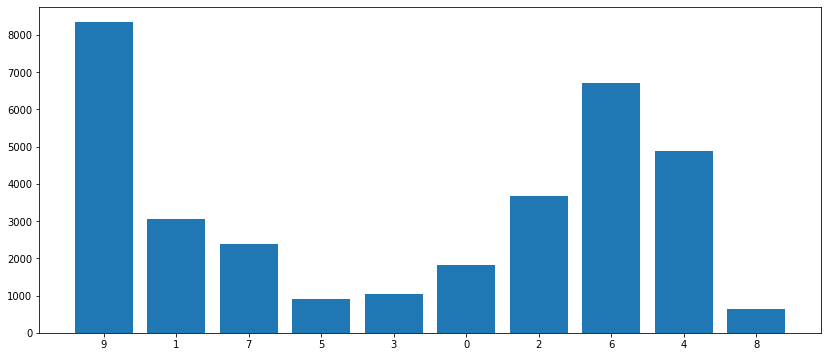

In [46]:
# plot number of tweets for each topic
plt.figure(figsize=(14,6))
plt.bar(range(len(topic_count)), list(topic_count.values()), align='center')
plt.xticks(range(len(topic_count)), list(topic_count.keys()))
plt.show()